In [172]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import integrate
from scipy import interpolate
from scipy import special
from scipy import stats
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter1d
import pandas as pd
import h5py
from matplotlib.ticker import MaxNLocator
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy import signal
import os



#Global characteristic times
#r_CR = 50km, h_CR = 14km, 1 yr relax, source moved up to 11km
TC_50_14_1_S11 = 6.928

#r_CR = 50km, h_CR = 14km, 1 yr relax, source moved up to 15 km
TC_50_14_1_S15 = 9.473

#r_CR=50km, h_CR=14km, 0.1 yr relax
TC_50_14_01 = 3.111

#r_CR = 50km, h_CR = 14 km, 1 yr relax
TC_50_14_1 = 14.099

#r_CR=50km, h_CR=14km, 5 yr relax
TC_50_14_5 = 38.118

#r_CR=50km, h_CR=14km, 10yr relax
TC_50_14_10 =  67.576

#r_CR=50km, h_CR=19km, 1yr relax
TC_50_19_1 = 32.889

#r_CR=50km, h_CR=19km, 5yr relax
TC_50_19_5 = 61.828

#r_CR=50km, h_CR=19km, 10 yr relax
TC_50_19_10 = 98.785

#r_CR=50km, h_CR=5km, 1 yr relax
TC_50_5_1 = 4.968

#r_CR=50km h_CR=5km, 5 yr relax
TC_50_5_5 = 13.892

#r_CR=50km h_CR=5km, 10 yr relax
TC_50_5_10 = 25.85

#r_CR=50km, h_CR=10km, 1 yr relax
TC_50_10_1 = 7.860

#r_CR=50km, h_CR=10km, 5 yr relax
TC_50_10_5 = 22.772

#r_CR=50km, h_CR=10km, 10 yr relax
TC_50_10_10 = 41.574

#r_CR=35km, h_CR=14km, 1 yr relax
TC_35_14_1 = 13.75443

#r_CR=35km, h_CR=14km, 5 yr relax
TC_35_14_5 = 38.597648

#r_CR=35km, h_CR=15km, 10 yr relax
TC_35_14_10 = 68.158

#r_CR=65km, h_CR=14km, 1 yr relax
TC_65_14_1 = 14.46413

#r_CR=65km, h_CR=14km, 5 yr realx
TC_65_14_5 = 38.839133

#r_CR=65km, h_CR=14km, 10 yr relax
TC_65_14_10 = 67.09811

#r_CR=100km, h_CR=14km, 1 yr relax
TC_100_14_1 = 14.357606

#r_CR=100km, h_CR=14km, 5 yr relax
TC_100_14_5 = 36.250149

#r_CR=100km, h_CR=14km, 10 yr relax
TC_100_14_10 = 66.325911

 #dictionary to be updated with the name of the file and the 'model name' given
file_names = {"ViscoelasticSandwich/10km": "ViscoelasticSandwich",
                "ViscoelasticSandwich/15km": "ViscoelasticSandwich", 
                  "OneLayerViscoelastic": "OneLayerViscoelastic",
                  "ViscoelasticLayer": "ViscoelasticLayer",
                  "SMB/NoCyl": "SMB_noCyl",
                  "SMB/Chamber_Bottom": "SMB_chamber_bot_50km",
                  "SMB/Chamber_Bottom/CreepTest/35km": "SMB_chamber_bot_35km",
                  "SMB/Chamber_Bottom/Cyl10km/35km": "SMB_chamber_bot_35km",
                  "SMB/Chamber_Bottom/Cyl10km/50km": "SMB_chamber_bot_50km",
                  "SMB/Chamber_Bottom/500Kpa": "SMB_chamber_bot_50km",
                  "SMB/Chamber_Bottom/500Kpa/15kmChamber": "SMB_chamber_bot_50km",
                  "SMB/Chamber_Bottom/ThickUpperLayer": "SMB_chamber_bot_50km_thickUpperLayer",
                  "SMB/Chamber_Bottom/CreepTest": "SMB_chamber_bot_50km",
                  "SMB/Chamber_Bottom/15KmChamber": "SMB_chamber_bot_50km",
                  "SMB/Chamber_Bottom/CylTall/35km": "SMB_chamber_bot_35km",
                  "ViscoelasticCylinder/35km": "ViscoelasticCylinder",
                  "ViscoelasticCylinder/50km": "ViscoelasticCylinder",
                  "ViscoelasticCylinderSlice/35km": "ViscoelasticCylinderSlice",
                  "ViscoelasticCylinderSliceTall/20km": "ViscoelasticCylinderSliceTaller",
                  "ViscoelasticCylinderSliceTall/14km": "ViscoelasticCylinderSliceTall",
                  "ViscoelasticCylinderSlice/50km": "ViscoelasticCylinderSlice",
                  "TimeDependentPressure/10yrSawtooth/ViscoelasticLayer": "ViscoelasticLayer",
                  "TimeDependentPressure/10yrSawtooth/ViscoelasticCylinder/35km": "ViscoelasticCylinder",
                  "TimeDependentPressure/10yrSawtooth/ViscoelasticSandwich": "ViscoelasticSandwich", 
                  "TimeDependentPressure/10yrSawtooth/ViscoelasticCylinderSlice/35km": "ViscoelasticCylinderSliceTD",
                  "TimeDependentPressure/10yrSawtooth/ViscoelasticCylinderSlice/50km": "ViscoelasticCylinderSliceTD",
                  "TimeDependentPressure/10yrSawtooth/SMB/NoCyl": "SMB_noCyl",
                  "TimeDependentPressure/10yrSawtooth/SMB/Chamber_Bottom": "SMB_chamber_bot",
                  "TimeDependentPressure/10yrSawtooth/SMB/Chamber_Bottom/50km": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/10yrSawtooth/SMB/Chamber_Bottom/50km/250Kpa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/10yrSawtooth/SMB/Chamber_Bottom/50km/500Kpa/15kmChamber": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/10yrSawtooth/SMB/Chamber_Top": "SMB_chamber_top",
                  "TimeDependentPressure/10yrSawtooth/SMB/Chamber_Top/50km": "SMB_chamber_top_50km",
                  "TimeDependentPressure/InSAR_Depres1": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/InSAR_Depres2": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/InSAR_Depres3": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/InSAR_Depres4": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres1": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres1/500KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres2/500KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres3/500KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres4/500KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres4/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres5/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres6/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres7/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres8/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres9/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres10/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres11/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres11/250KPa/long_spinup": "SMB_chamber_bot_50km",      
                  "TimeDependentPressure/GPS_Pres11/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres11/1MPa/course_mesh": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres11/1MPa/course_mesh1km": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres11/1MPa/long_spinup": "SMB_chamber_bot_50km",      
                  "TimeDependentPressure/GPS_Pres12/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres13/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres14/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres15/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres16/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres17/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres18/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres19/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres20/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres20/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres20/5MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres21/5MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres22/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres23/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres23/1MPa/long_spinup": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres24/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres25/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres26/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres27/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres28/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres29/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres30/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres31/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres32/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres33/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres34/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres35/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres36/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres37/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres38/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres39/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres40/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres41/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres42/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres42/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres44/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres45/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres46/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres47/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres47/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres48/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres48/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres49/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres49/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres50/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres50/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres51/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres51/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres52/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres52/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres53/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres53/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres54/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres55/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres55/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres56/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres57/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres58/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres58/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres59/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres59/5MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres60/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres61/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres62/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres63/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres64/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres64/250KPa": "SMB_chamber_bot_50km",    
                  "TimeDependentPressure/GPS_Pres65/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres67/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres67/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres68/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres68/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres69/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres69/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres70/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres70/5MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres70/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres72/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres72/5MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres73/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres74/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres75/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres77/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres78/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres79/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres80/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres81/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres81/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres82/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres82/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres83/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres83/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres84/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres85/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres85/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres86/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres86/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres87/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres87/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres88/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres88/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres89/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres90/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres91/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres92/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres93/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres94/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres95/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres96/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres97/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres97/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres98/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres98/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres99/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres99/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres100/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres100/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres101/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres102/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres103/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres104/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres105/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres105/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres106/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres106/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres107/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres107/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres109/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres109/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres110/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres110/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres111/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/GPS_Pres111/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/Sawtooth_Pres1/2_5MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/Sawtooth_Pres2/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/Sawtooth_Pres3/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/Sawtooth_Pres4/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/Sawtooth_Pres4/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/Sawtooth_Pres4/5MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/Sawtooth_Pres4/2MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/Sawtooth_Pres5/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/Sawtooth_Pres5/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/Sawtooth_Pres6/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/Sawtooth_Pres6/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/Sawtooth_Pres7/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/Sawtooth_Pres7/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/Sawtooth_Pres8/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/Sawtooth_Pres8/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/Sawtooth_Pres9/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/Sawtooth_Pres10/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/Sawtooth_Pres10/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/Sawtooth_Pres11/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/Sawtooth_Pres11/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/Sawtooth_Pres12/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/Sawtooth_Pres12/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/Sawtooth_Pres12/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/Sawtooth_Pres13/250KPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/Sawtooth_Pres13/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/Sawtooth_Pres14/250KPa": "SMB_chamber_bot_50km",    
                  "TimeDependentPressure/Sawtooth_Pres14/1MPa": "SMB_chamber_bot_50km",    
                  "TimeDependentPressure/Sawtooth_Pres15/250KPa": "SMB_chamber_bot_50km",    
                  "TimeDependentPressure/Sawtooth_Pres15/1MPa": "SMB_chamber_bot_50km",    
                  "TimeDependentPressure/Sawtooth_Pres16/250KPa": "SMB_chamber_bot_50km",    
                  "TimeDependentPressure/Sawtooth_Pres16/1MPa": "SMB_chamber_bot_50km",    
                  "TimeDependentPressure/Sawtooth_Pres18/2MPa": "SMB_chamber_bot_50km",    
                  "TimeDependentPressure/Sawtooth_Pres18/1_5MPa": "SMB_chamber_bot_50km",    
                  "TimeDependentPressure/Sawtooth_Pres19/2MPa": "SMB_chamber_bot_50km",    
                  "TimeDependentPressure/Sawtooth_Pres20/1MPa": "SMB_chamber_bot_50km",    
                  "TimeDependentPressure/Single_Pres1/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/Single_Pres2/1MPa": "SMB_chamber_bot_50km",
                  "TimeDependentPressure/Test_dt/1MPa": "SMB_chamber_bot_50km"}


def read_data(model_name, relax_time, time_step, total_time=100):
    line_width = 5e3 #The width of the line (a mesh with infinite points would need 0 width)
    
    #construct path string
    path = "../"+str(model_name)+"/Analysis/"+str(total_time)+"yrs_relax="+str(relax_time)+"_"+str(time_step)+".csv"
    
    model_output_df = pd.read_csv(path)
    
    #select rows from the dataframe where y is less then the specified width
    x_line = model_output_df.loc[(model_output_df['Points_1'] < line_width) & (model_output_df['Points_1'] > 0)]
    
    x = np.asarray(x_line['Points_0'])
    disp_x = np.asarray(x_line['displacement_0'])
    disp_y = np.asarray(x_line['displacement_1'])
    disp_z = np.asarray(x_line['displacement_2'])
    vel_x = np.asarray(x_line['velocity_0'])
    vel_y = np.asarray(x_line['velocity_1'])
    vel_z = np.asarray(x_line['velocity_2'])
    
    return (x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z)

def average_lists(x, vals, dx):
    new_list = []
    new_list.append(vals[0])
    for i in range(1, len(x)-1):
        tot = vals[i]
        elm = 1
        j = i-1
        while j >= 0 and abs(x[i]-x[j]) <= dx:
            tot += vals[j]
            elm += 1
            j-=1
        
        j = i+1
        while j < len(x) and abs(x[j]-x[i]) <= dx:
            tot += vals[j]
            elm += 1
            j+=1
        new_list.append(tot/elm)
    return np.asarray(new_list)


def read_h5(model_name, relax_time, time_step, total_time=100, dx=None, theta=None, x_off=0, y_off=0, runtime=100):
    
         
    line_width = 10e3 #The width of the line (a mesh with infinite points would need 0 width)
    mesh_width = 150e3 #width of mesh from 0 to edge
    
    #get the file path
    if relax_time == 0.1:
        path = "../"+str(model_name)+"/output/" + file_names[model_name] + "-groundsurf-" + str(runtime)+"_01_yr_relax.h5"
    else:
        path = "../"+str(model_name)+"/output/" + file_names[model_name] + "-groundsurf-" + str(runtime)+"_"+str(relax_time)+"_yr_relax.h5" 
    
    #prepare lists for getting data from hdf5 files
    with h5py.File(path, "r") as f:
            
        #print(f.keys())
        #Get the HDF5 groups
        group_geometry = f['geometry']
        group_vert_fields = f['vertex_fields']
        
        points = group_geometry['vertices'] #shape: point_num, xyz
        displacements = group_vert_fields['displacement'] #shape: timestep, point_num, xyz
        velocities = group_vert_fields['velocity'] #shape: timestep, point_num, xyz
       
        #allow a theta for an arbitrary line on the model
        #theta is in degrees!
#         if theta == None:
#             x_line_indices = np.where((points[:,1] > 0) & (points[:,1] < line_width)) #get indices for the xline
#         else:
#             x_line_indices = np.where((points[:,1] - points[:,0]*np.tan(theta) > 0) & (points[:,1] - points[:,0]*np.tan(theta) < line_width))
                
        #get data from the hdf5 file with the indices
        x = points[:][:,0]
        y = points[:][:,1]
        
        disp_x = displacements[time_step][:][:,0]
        disp_y = displacements[time_step][:][:,1]
        disp_z = displacements[time_step][:][:,2]
        
        vel_x = velocities[time_step][:][:,0]
        vel_y = velocities[time_step][:][:,1]
        vel_z = velocities[time_step][:][:,2]
        
        #interpolate data 
        #get points to interpolate
        x_i = np.linspace(-mesh_width, mesh_width, 11615)
        if theta == None:
            y_i = np.zeros(len(x_i))
        else:
            x_i_temp = x_i
            x_i = np.cos(theta)*x_i_temp 
            y_i = np.sin(theta)*x_i_temp 
            
        x_i += x_off
        y_i += y_off
            
        # print("x_i:", x_i)
        # print("y_i:", y_i)
        
        #interpolate
#         print(np.asarray([x,y]).T.shape)
#         print(np.asarray([x_i, y_i]).T.shape)
       # print(len(x))
        disp_x_interp = interpolate.griddata(np.asarray([x, y]).T, np.asarray(disp_x), np.asarray([x_i, y_i]).T, method='cubic')
        disp_y_interp = interpolate.griddata(np.asarray([x, y]).T, np.asarray(disp_y), np.asarray([x_i, y_i]).T, method='cubic')
        disp_z_interp = interpolate.griddata(np.asarray([x, y]).T, np.asarray(disp_z), np.asarray([x_i, y_i]).T, method='cubic')
        
        vel_x_interp = interpolate.griddata(np.asarray([x, y]).T, np.asarray(vel_x), np.asarray([x_i, y_i]).T, method='cubic')
        vel_y_interp = interpolate.griddata(np.asarray([x, y]).T, np.asarray(vel_y), np.asarray([x_i, y_i]).T, method='cubic')
        vel_z_interp = interpolate.griddata(np.asarray([x, y]).T, np.asarray(vel_z), np.asarray([x_i, y_i]).T, method='cubic')
    
    if dx != None:
        return (x_i, average_lists(x_i, disp_x_interp, dx), average_lists(x_i, disp_y_interp, dx), average_lists(x_i, disp_z_interp, dx), 
                average_lists(x_i, vel_x_interp, dx), average_lists(x_i, vel_y_interp, dx), average_lists(x_i, vel_z_interp, dx))
    else:
        return (x_i, disp_x_interp, disp_y_interp, disp_z_interp, vel_x_interp, vel_y_interp, vel_z_interp)

    
    
#read h5 for top of chamber
def read_chamber_h5(model_name, relax_time, time_step, total_time=100, dx=None, theta=None, runtime=100):
    
    source_rad=24e3 #radius of the source shortened by 5 km    
    #get the file path
    if relax_time == 0.1:
        path = "../"+str(model_name)+"/output/" + file_names[model_name] + "-chamber_top-" + str(runtime)+"_01_yr_relax.h5"
    else:
         path = "../"+str(model_name)+"/output/" + file_names[model_name] + "-chamber_top-" + str(runtime)+"_"+str(relax_time)+"_yr_relax.h5" 
            
    with h5py.File(path, "r") as f:
            
        #print(f.keys())
        #Get the HDF5 groups
        group_geometry = f['geometry']
        group_vert_fields = f['vertex_fields']
        
        points = group_geometry['vertices'] #shape: point_num, xyz
        displacements = group_vert_fields['displacement'] #shape: timestep, point_num, xyz
        velocities = group_vert_fields['velocity'] #shape: timestep, point_num, xyz
    
        x = points[:][:,0]
        y = points[:][:,1]
        z = points[:][:,2]
        
        
        disp_x = displacements[time_step][:][:,0]
        disp_y = displacements[time_step][:][:,1]
        disp_z = displacements[time_step][:][:,2]
        
        vel_x = velocities[time_step][:][:,0]
        vel_y = velocities[time_step][:][:,1]
        vel_z = velocities[time_step][:][:,2]
        
        x_i = np.linspace(-source_rad, source_rad, 11615)
        if theta == None:
            y_i = np.zeros(len(x_i))
        else:
            x_i = np.cos(theta)*x_i
            y_i = np.sin(theta)*x_i
        
        disp_x_interp = interpolate.griddata(np.asarray([x, y]).T, np.asarray(disp_x), np.asarray([x_i, y_i]).T, method='cubic')
        disp_y_interp = interpolate.griddata(np.asarray([x, y]).T, np.asarray(disp_y), np.asarray([x_i, y_i]).T, method='cubic')
        disp_z_interp = interpolate.griddata(np.asarray([x, y]).T, np.asarray(disp_z), np.asarray([x_i, y_i]).T, method='cubic')
        
        vel_x_interp = interpolate.griddata(np.asarray([x, y]).T, np.asarray(vel_x), np.asarray([x_i, y_i]).T, method='cubic')
        vel_y_interp = interpolate.griddata(np.asarray([x, y]).T, np.asarray(vel_y), np.asarray([x_i, y_i]).T, method='cubic')
        vel_z_interp = interpolate.griddata(np.asarray([x, y]).T, np.asarray(vel_z), np.asarray([x_i, y_i]).T, method='cubic')
    
    
        return (x_i, disp_x_interp, disp_y_interp, disp_z_interp, vel_x_interp, vel_y_interp, vel_z_interp)
        
        #for now just get max disp and vel
        
#         disp = np.sqrt(disp_x**2+disp_y**2+disp_z**2)
#         vel = np.sqrt(vel_x**2++vel_y**2+vel_z**2)
        
#         return (max(disp), max(vel)*3.154e+10)
    

#function to sort x and disp data for plotting
def sort_x_disp(x, disp):
    xs, ys = zip(*sorted(zip(x, disp)))

    return (np.asarray(xs), np.asarray(ys))

#save data to a csv
def save_csv(column_list, column_names, path):
    f = open(path, "w")
    for i in range(len(column_names)):
        if i == len(column_names)-1:
            f.write(column_names[i]+"\n")
        else:
            f.write(column_names[i]+",")
    for i in range(len(column_list[0])):
        for j in range(len(column_list)):
            if i >= len(column_list[j]):
                if j == len(column_list)-1:
                    f.write("\n")
            else:
                if j == len(column_list)-1:
                    f.write(str(column_list[j][i])+"\n")
                else:
                    f.write(str(column_list[j][i])+",")

#a function to convert times in years
#to timesteps for the h5 file. 
#times: a time in years
#dt: can be a float or a tuple of floats. 
#if its a tuple: dt[0] = spinup dt dt[1] = other dt
#spinup: the spinup time of the run
def get_timesteps(time, dt, spinup=500):
    if type(dt) == list:
        if time <= spinup:
            return int(time/dt[0])
        else:
            return int(spinup/dt[0])+int((time-spinup)/dt[1])
    else:
        return int(time/dt)
        
    


# A class to hold all run information
class Run:
    def __init__(self, run_name, P0, delta_P, T, t_c, t_r, t_som, run_time, spinup_time, output_dt,som_mag=None, cycles=2, t_som_list=None, nested=False, sawtooth=False, inverse_st=False):
        self.run_name = run_name #runs can share the same name if their t_r is different (these runs are stored in the same folder)
        self.P0 = P0 #In Pa! refered to as Delta P in most of my notes, Delta P is actuall P0/2
        self.delta_P = delta_P #in Pa
        self.T = T #in years
        self.t_c = t_c #in years
        self.t_r = t_r #in years
        self.t_som = t_som
        self.run_time = run_time #in years
        self.spinup_time = spinup_time #in years
        self.output_dt = output_dt #in years
        if self.t_som == 0:
            self.som_mag = 0.0
        else:
            self.som_mag = som_mag
        self.cycles = cycles #number of periodic cycles
        self.t_som_list = t_som_list
        self.nested = nested
        self.sawtooth = sawtooth
        self.inverse_st = inverse_st
        
        

GPS_Pres4 = Run("TimeDependentPressure/GPS_Pres4/250KPa", 250e3, 125e3, 5, TC_50_14_1, 1, 0.1, 260, 150, 0.1, som_mag=[0.06009209, 0.06592563], cycles=2, t_som_list=[0.10000000000002274, 0.10000000000002274])
GPS_Pres5 = Run("TimeDependentPressure/GPS_Pres5/250KPa", 250e3, 125e3, 10, TC_50_14_1, 1, 0.5, 270, 150, 0.1, som_mag=[0.01163105, 0.01350694], t_som_list=[0.5, 0.5])
GPS_Pres6 = Run("TimeDependentPressure/GPS_Pres6/250KPa", 250e3, 125e3, 5, TC_50_14_10, 10, 0, 410, 200, 0.1, som_mag=0.0)
GPS_Pres7 = Run("TimeDependentPressure/GPS_Pres7/250KPa", 250e3, 125e3, 20, TC_50_14_1, 1, 1.7, 290, 150, 0.1, som_mag=[0.04174552, 0.05556135], t_som_list=[1.6999999999999886, 1.6999999999999886])
GPS_Pres8 = Run("TimeDependentPressure/GPS_Pres8/250KPa", 250e3, 125e3, 20, TC_50_14_10, 10, 0.6, 440, 200, 0.1, som_mag=[0, 1.10834046], t_som_list=[0.0, 0.5999999999999943])
GPS_Pres9 = Run("TimeDependentPressure/GPS_Pres9/250KPa", 250e3, 125e3, 5, TC_50_19_1, 1, 0.4, 260, 150, 0.1)
GPS_Pres11 = Run("TimeDependentPressure/GPS_Pres11/250KPa", 250e3, 125e3, 500, TC_50_14_1, 1, 37, 1250, 150, 0.1, som_mag=[1.78868874, 2.95725602], t_som_list=[30.0, 39.0])
GPS_Pres11_run2 = Run("TimeDependentPressure/GPS_Pres11/1MPa", 1e6, 500e3, 500, TC_50_14_1, 1, 29, 1250, 150, 0.1) #used for intro sombrero plots in candidacy
GPS_Pres11_run3 = Run("TimeDependentPressure/GPS_Pres11/1MPa", 1e6, 500e3, 500, TC_50_14_10, 10, 0, 1250, 150, 0.1)
GPS_Pres11_run4 = Run("TimeDependentPressure/GPS_Pres11/1MPa/long_spinup", 1e6, 500e3, 500, TC_50_14_1, 1, 36, 1600, 500, 0.1, som_mag=[8.21285484, 2.30351716e+01], t_som_list=[34.0,40.0])
GPS_Pres11_run5 = Run("TimeDependentPressure/GPS_Pres11/1MPa/long_spinup", 1e6, 500e3, 500, TC_50_14_10, 10, 0, 1600, 500, 0.1, som_mag=0.0)
GPS_Pres11_run6 = Run("TimeDependentPressure/GPS_Pres11/250KPa/long_spinup", 250e3, 125e3, 500, TC_50_14_10, 10, 0, 1600, 500, 0.1, som_mag=0.0)
GPS_Pres11_run7 = Run("TimeDependentPressure/GPS_Pres11/1MPa/long_spinup", 1e6, 500e3, 500, TC_50_14_5, 5, 0, 1600, 500, 0.1)
GPS_Pres11_run8 = Run("TimeDependentPressure/GPS_Pres11/1MPa/course_mesh", 1e6, 500e3, 500, 11.000, 1, 34, 1600, 500, 0.1)
GPS_Pres11_run9 = Run("TimeDependentPressure/GPS_Pres11/1MPa/course_mesh1km", 1e6, 500e3, 500, 12.686, 1, 38, 1600, 500, 0.1)
GPS_Pres12 = Run("TimeDependentPressure/GPS_Pres12/250KPa", 250e3, 125e3, 15, TC_50_14_1, 1, 1.2, 280, 150, 0.1, som_mag=[0.29479297, 0.36196189], t_som_list=[1.200000000000017, 1.1000000000000227])
GPS_Pres13 = Run("TimeDependentPressure/GPS_Pres13/250KPa", 250e3, 125e3, 30, TC_50_14_1, 1, 2.5, 310, 150, 0.1, som_mag=[0.30000000000001137,0.30000000000001137], t_som_list=[2.5, 2.5])
GPS_Pres14 = Run("TimeDependentPressure/GPS_Pres14/250KPa", 250e3, 125e3, 15, TC_50_14_10, 10, 0.3, 330, 200, 0.1, som_mag=[0.3385968172349677], t_som_list=[0.30000000000001137, 0.30000000000001137])
GPS_Pres15 = Run("TimeDependentPressure/GPS_Pres15/250KPa", 250e3, 125e3, 30, TC_50_14_10, 10, 1.3, 360, 200, 0.1, som_mag=[0.16961624, 0.18284102], t_som_list=[1.0999999999999943, 1.0999999999999943])
GPS_Pres17 = Run("TimeDependentPressure/GPS_Pres17/250KPa", 250e3, 125e3, 25, TC_50_14_10, 10, 0.9, 350, 200, 0.1, som_mag=[0.24860408, 0.28959762], t_som_list=[0.9000000000000057, 0.9000000000000057])
GPS_Pres18 = Run("TimeDependentPressure/GPS_Pres18/250KPa", 250e3, 125e3, 35, TC_50_14_10, 10, 1.7, 370, 200, 0.1, som_mag=[0.09367392, 0.12369039], t_som_list=[1.5, 1.2999999999999545])
GPS_Pres19 = Run("TimeDependentPressure/GPS_Pres19/250KPa", 250e3, 125e3, 100, TC_50_14_1, 1, 0.0, 450, 150, 0.1, som_mag=[0, 0.20668505], t_som_list=[0, 2.0])
GPS_Pres19_run2 = Run("TimeDependentPressure/GPS_Pres19/250KPa", 250e3, 125e3, 100, TC_50_14_10, 10, 4.6, 800, 500, 0.1, som_mag=[0.19172294, 0.496342225], t_som_list=[4.600000000000023,4.300000000000068])
GPS_Pres20 = Run("TimeDependentPressure/GPS_Pres20/250KPa", 250e3, 125e3, 2000, TC_50_14_1, 1, 44, 4250, 150, 1)  
GPS_Pres20_run2 = Run("TimeDependentPressure/GPS_Pres20/1MPa", 1e6, 500e3, 2000, TC_50_14_1, 1, 40, 4250, 150, 1) 
GPS_Pres20_run3 = Run("TimeDependentPressure/GPS_Pres20/5MPa", 5e6, 2.5e6, 2000, TC_50_14_1, 1, 38, 4250, 150, 1) 
GPS_Pres21 = Run("TimeDependentPressure/GPS_Pres21/5MPa", 5e6, 2.5e6, 5000, TC_50_14_1, 1, 47, 10250, 150, 1)
GPS_Pres23 = Run("TimeDependentPressure/GPS_Pres23/1MPa", 1e6, 500e3, 500, TC_50_19_1, 1, 53, 1250, 150, 0.1)
GPS_Pres23_run2 = Run("TimeDependentPressure/GPS_Pres23/1MPa", 1e6, 500e3, 500, TC_50_19_10, 10, 160, 1250, 150, 0.1)
GPS_Pres23_run3 = Run("TimeDependentPressure/GPS_Pres23/1MPa/long_spinup", 1e6, 500e3, 500, TC_50_19_10, 10, 99, 1800, 700, 0.1)
GPS_Pres23_run4 = Run("TimeDependentPressure/GPS_Pres23/1MPa/long_spinup", 1e6, 500e3, 500, TC_50_19_5, 5, 62, 1600, 500, 0.1)
GPS_Pres24 = Run("TimeDependentPressure/GPS_Pres24/1MPa", 1e6, 500e3, 1000, TC_50_14_1, 1, 42, 2600, 500, 0.1, som_mag=[4.60952762e+01, 2.41701443e+01], t_som_list=[42.0, 46.0])
GPS_Pres25 = Run("TimeDependentPressure/GPS_Pres25/1MPa", 1e6, 500e3, 250, TC_50_14_1, 1, 25, 1100, 500, 0.1, som_mag=[25.0, 29.0], t_som_list=[25.0, 29.0])
GPS_Pres26 = Run("TimeDependentPressure/GPS_Pres26/1MPa", 1e6, 250e3, 500, TC_50_14_1, 1, 33, 1600, 500, 0.1, som_mag=[4.17453706, 2.11972427], t_som_list=[33.0, 35.0])
GPS_Pres27 = Run("TimeDependentPressure/GPS_Pres27/1MPa", 1e6, 500e3, 500, TC_50_10_1, 1, 22, 1600, 500, 0.1)
GPS_Pres27_run2 = Run("TimeDependentPressure/GPS_Pres27/1MPa", 1e6, 500e3, 500, TC_50_10_10, 10, 0, 1600, 500, 0.1)
GPS_Pres27_run3 = Run("TimeDependentPressure/GPS_Pres27/1MPa", 1e6, 500e3, 500, TC_50_10_5, 5, 9, 1600, 500, 0.1)
GPS_Pres28 = Run("TimeDependentPressure/GPS_Pres28/1MPa", 1e6, 500e3, 500, TC_50_5_1, 1, 8, 1600, 500, 0.1)
GPS_Pres28_run2 = Run("TimeDependentPressure/GPS_Pres28/1MPa", 1e6, 500e3, 500, TC_50_5_10, 10, 0, 1600, 500, 0.1)
GPS_Pres28_run3 = Run("TimeDependentPressure/GPS_Pres28/1MPa", 1e6, 500e3, 500, TC_50_5_5, 5, 5, 1600, 500, 0.1)
GPS_Pres29 = Run("TimeDependentPressure/GPS_Pres29/1MPa", 1e6, 500e3, 500, TC_50_14_1_S11, 1, 58, 1600, 500, 0.1)
GPS_Pres30 = Run("TimeDependentPressure/GPS_Pres30/1MPa", 1e6, 500e3, 500, TC_50_14_1_S15, 1, 53, 1600, 500, 0.1)
GPS_Pres31 = Run("TimeDependentPressure/GPS_Pres31/250KPa", 250e3, 125e3, 125, TC_50_14_1, 1, 11, 850, 500, 0.1, som_mag=[0.51122985, 1.2197813 ], t_som_list=[11.0, 14.0])
GPS_Pres31_run2 = Run("TimeDependentPressure/GPS_Pres31/250KPa", 250e3, 125e3, 125, TC_50_14_10, 10, 6, 850, 500, 0.1, som_mag=[0.78608288, 0.48171324], t_som_list=[6.600000000000023, 6.100000000000023])
GPS_Pres32 = Run("TimeDependentPressure/GPS_Pres32/250KPa", 250e3, 125e3, 250, TC_50_14_1, 1, 26, 1100, 500, 0.1)
GPS_Pres32_run2 = Run("TimeDependentPressure/GPS_Pres32/250KPa", 250e3, 125e3, 250, TC_50_14_10, 10, 11, 1100, 500, 0.1, som_mag=[6.53194335e-02, 1.22559649e-02], t_som_list=[4.0,7.0])
GPS_Pres33 = Run("TimeDependentPressure/GPS_Pres33/1MPa", 1e6, 500e3, 1000, TC_50_14_10, 10, 0, 2600, 500, 0.1, som_mag=0.0)
GPS_Pres34 = Run("TimeDependentPressure/GPS_Pres34/1MPa", 1e6, 500e3, 100, TC_50_14_1, 1, 8, 800, 500, 0.1, som_mag=[0.57264555, 5.97980376], t_som_list=[8.899999999999977,8.800000000000068])
GPS_Pres34_run2 = Run("TimeDependentPressure/GPS_Pres34/1MPa", 1e6, 500e3, 100, TC_50_14_10, 10, 4, 800, 500, 0.1, som_mag=[0.42529053, 6.06652272], t_som_list=[4.899999999999977, 4.699999999999932])
GPS_Pres35 = Run("TimeDependentPressure/GPS_Pres35/1MPa", 1e6, 500e3, 350, TC_50_14_10, 10, 0, 1300, 500, 0.1, som_mag=0)
GPS_Pres36 = Run("TimeDependentPressure/GPS_Pres36/250KPa", 250e3, 125e3, 1250, TC_50_14_1, 1, 46, 3100, 500, 0.1, som_mag=[1.73687344, 5.85509968], t_som_list=[42.0,49.0])
GPS_Pres36_run2 = Run("TimeDependentPressure/GPS_Pres36/250KPa", 250e3, 125e3, 1250, TC_50_14_10, 10, 0, 3100, 500, 0.1, som_mag=[0.0, 2.66020066], t_som_list=[0, 36.0])
GPS_Pres37 = Run("TimeDependentPressure/GPS_Pres37/1MPa", 1e6, 500e3, 50, TC_50_14_1, 1, 4, 700, 500, 0.1, som_mag=[0.41374221, 0.061987], t_som_list=[4.1, 3.67])
GPS_Pres37_run2 = Run("TimeDependentPressure/GPS_Pres37/1MPa", 1e6, 500e3, 50, TC_50_14_10, 10, 1.6, 700, 500, 0.1, som_mag=[0.86401986, 2.51435264], t_som_list=[1.6,1.6])
GPS_Pres38 = Run("TimeDependentPressure/GPS_Pres38/1MPa", 1e6, 500e3, 5000, TC_50_14_1, 1, 54, 10600, 500, 0.1, som_mag=[4.22843340e+02, 5.27272977e+00], t_som_list=[54.0, 44.0])
GPS_Pres39 = Run("TimeDependentPressure/GPS_Pres39/250KPa", 250e3, 125e3, 1660, TC_50_14_1, 1, 53, 3920, 500, 0.1, som_mag=[40.84833713486046, 8.10908102], t_som_list=[49.0, 41.0])
GPS_Pres40 = Run("TimeDependentPressure/GPS_Pres40/1MPa", 1e6, 500e3, 420, TC_50_14_10, 10, 0, 1440, 500, 0.1, som_mag=0.0)
GPS_Pres41 = Run("TimeDependentPressure/GPS_Pres41/1MPa", 1e6, 500e3, 200, TC_50_14_10, 10, 8, 1000, 500, 0.1, som_mag=[0.31208442753358756, 0.43058728], t_som_list=[9.4, 8.2])
GPS_Pres42 = Run("TimeDependentPressure/GPS_Pres42/250KPa", 250e3, 125e3, 100, 3.0046, 0.1, 4.986, 500, 200, 0.0199, som_mag=[11.72713844, 0.78658891], t_som_list=[4.596899999999977, 5.193899999999985])
GPS_Pres42_run3 = Run("TimeDependentPressure/GPS_Pres42/1MPa", 1e6, 500e3, 100, 3.0051, 0.1, 5.0, 500, 200, 0.0199, som_mag=[4.68536061, 0.63525925], t_som_list=[4.994900000000001, 4.99490000000003])
GPS_Pres44 = Run("TimeDependentPressure/GPS_Pres44/1MPa", 1e6, 500e3, 500, TC_35_14_1, 1, 5, 1600, 500, 0.1)
GPS_Pres44_run2 = Run("TimeDependentPressure/GPS_Pres44/1MPa", 1e6, 500e3, 500, TC_35_14_10, 10, 3, 1600, 500, 0.1)
GPS_Pres44_run3 = Run("TimeDependentPressure/GPS_Pres44/1MPa", 1e6, 500e3, 500, TC_35_14_5, 5, 20, 1600, 500, 0.1)
GPS_Pres45 = Run("TimeDependentPressure/GPS_Pres45/1MPa", 1e6, 500e3, 500, TC_65_14_1, 1, 38, 1600, 500, 0.1)
GPS_Pres45_run2 = Run("TimeDependentPressure/GPS_Pres45/1MPa", 1e6, 500e3, 500, TC_65_14_10, 10, 0, 1600, 500, 0.1)
GPS_Pres45_run3 = Run("TimeDependentPressure/GPS_Pres45/1MPa", 1e6, 500e3, 500, TC_65_14_5, 10, 0, 1600, 500, 0.1)
GPS_Pres46 = Run("TimeDependentPressure/GPS_Pres46/1MPa", 1e6, 500e3, 500, TC_100_14_1, 1, 39, 1600, 500, 0.1)
GPS_Pres46_run2 = Run("TimeDependentPressure/GPS_Pres46/1MPa", 1e6, 500e3, 500, TC_100_14_10, 10, 0, 1600, 500, 0.1)
GPS_Pres46_run3 = Run("TimeDependentPressure/GPS_Pres46/1MPa", 1e6, 500e3, 500, TC_100_14_5, 5, 0, 1600, 500, 0.1)
GPS_Pres47 = Run("TimeDependentPressure/GPS_Pres47/250KPa", 250e3, 125e3, 250, 3.0046, 0.1, 4.9, 800, 200, 0.0199, som_mag=[1.57965754, 7.11348435], t_som_list=[4.895399999999995,  5.492400000000089])
GPS_Pres47_run2 = Run("TimeDependentPressure/GPS_Pres47/1MPa", 1e6, 500e3, 250, 3.0051, 0.1, 5.5, 800, 200, 0.0199, som_mag=[0.69395178, 1.08314833], t_som_list=[5.591899999999953, 5.691400000000044])
GPS_Pres48 = Run("TimeDependentPressure/GPS_Pres48/250KPa", 250e3, 125e3, 500, 3.0046, 0.1, 5.2, 1300, 200, 0.0199, som_mag=[1.71361269, 2.24794458], t_som_list=[5.790900000000022, 5.3928999999999405])
GPS_Pres48_run2 = Run("TimeDependentPressure/GPS_Pres48/1MPa", 1e6, 500e3, 500, 3.0051, 0.1, 6.6, 1300, 200, 0.0199, som_mag=[7.78073543, 0.5855899 ], t_som_list=[5.29340000000002, 5.313300000000027])
GPS_Pres49 = Run("TimeDependentPressure/GPS_Pres49/250KPa", 250e3, 125e3, 15, 3.0046, 0.1, 1.8, 330, 200, 0.0199, som_mag=[0.04564913, 0.07001753], t_som_list=[1.4925000000000068, 2.0098999999999876])
GPS_Pres49_run2 = Run("TimeDependentPressure/GPS_Pres49/1MPa", 1e6, 500e3, 15, 3.0051, 0.1, 1.8, 330, 200, 0.0199, som_mag=[0.04374206, 0.06710195], t_som_list=[1.7909999999999968, 2.0098999999999876])
GPS_Pres50 = Run("TimeDependentPressure/GPS_Pres50/250KPa", 250e3, 125e3, 5, 3.0046, 0.1, 0.3, 310, 200, 0.0199, som_mag=[0.07378532815393686], t_som_list=[0.29849999999999, 0.39799999999999613])
GPS_Pres50_run2 = Run("TimeDependentPressure/GPS_Pres50/1MPa", 1e6, 500e3, 5, 3.0051, 0.1, 0.3, 310, 200, 0.0199, som_mag=[0.07093952004712983], t_som_list=[0.29849999999999, 0.39799999999999613])
GPS_Pres51 = Run("TimeDependentPressure/GPS_Pres51/250KPa", 250e3, 125e3, 1000, 3.0046, 0.1, 8.4, 2300, 200, 0.0199, som_mag=[0.6193649,  0.62278904], t_som_list=[6.18889999999999, 6.407799999999952])
GPS_Pres51_run2 = Run("TimeDependentPressure/GPS_Pres51/1MPa", 1e6, 500e3, 1000, 3.0051, 0.1, 5.8, 2300, 200, 0.0199, som_mag=[0.5064617,0.56808208], t_som_list=[5.810800000000029, 5.989900000000034])
GPS_Pres52 = Run("TimeDependentPressure/GPS_Pres52/250KPa", 250e3, 125e3, 5000, 12.683, 1, 63, 10600, 500, 0.1,som_mag=[9.885, 8.7563], t_som_list=[63, 58])
GPS_Pres52_run2 = Run("TimeDependentPressure/GPS_Pres52/1MPa", 1e6, 500e3, 5000, 12.681, 1, 60, 10600, 500, 0.1,som_mag=[26.245030806244625, 22.29], t_som_list=[60, 58])
GPS_Pres53 = Run("TimeDependentPressure/GPS_Pres53/250KPa", 250e3, 125e3, 200, 12.683, 1, 22, 1400, 500, 0.1,som_mag=1.070754, cycles=4, t_som_list=[22,26,25,26])
GPS_Pres53_run2 = Run("TimeDependentPressure/GPS_Pres53/1MPa", 1e6, 500e3, 200, 12.682, 1, 22, 1400, 500, 0.1,som_mag=0.747, cycles=4, t_som_list=[22,25,26,27])
GPS_Pres55 = Run("TimeDependentPressure/GPS_Pres55/250KPa", 250e3, 125e3, 500, 12.683, 1, 39, 2600, 500, 0.1,som_mag=2.2644, cycles=4, t_som_list=[39,48,48,47])
GPS_Pres55_run2 = Run("TimeDependentPressure/GPS_Pres55/1MPa", 1e6, 500e3, 500, 12.682, 1, 40, 2600, 500, 0.1,som_mag=7.744, cycles=4, t_som_list=[40,44,44,44])
GPS_Pres56 = Run("TimeDependentPressure/GPS_Pres56/1MPa", 1e6, 100e3, 1000, 12.682, 1, 45, 2600, 500, 0.1,som_mag=16.296, cycles=2, t_som_list=[45, 54])
GPS_Pres57 = Run("TimeDependentPressure/GPS_Pres57/1MPa", 1e6, 250e3, 1000, 12.682, 1, 45, 2600, 500, 0.1,som_mag=7.631, cycles=2, t_som_list=[45, 51])
GPS_Pres58 = Run("TimeDependentPressure/GPS_Pres58/250KPa", 250e3, 125e3, 5000, 13.783, 1, 59, 10600, 500, 0.1,som_mag=[12.751, 7.438], cycles=2, t_som_list=[59, 52])
GPS_Pres58_run2 = Run("TimeDependentPressure/GPS_Pres58/1MPa", 1e6, 500e3, 5000, 13.790, 1, 59, 10600, 500, 0.1,som_mag=[8.709, 6.2004], cycles=2, t_som_list=[59, 58])
GPS_Pres59 = Run("TimeDependentPressure/GPS_Pres60/1MPa", 1e6, 500e3, 200, 12.682, 1, 22, 1000, 500, 0.1,som_mag=[0.747, 11.6828], cycles=2, t_som_list=[22,25])
GPS_Pres64 = Run("TimeDependentPressure/GPS_Pres64/1MPa", 1e6, 500e3, 200, 3.1779, 1, 98, 1000, 500, 0.1,som_mag=[1.4737, 2.18], cycles=2, t_som_list=[98, 94])
GPS_Pres64_run2 = Run("TimeDependentPressure/GPS_Pres64/250KPa", 250e3, 125e3, 200, 3.1782, 1, 97, 1000, 500, 0.1,som_mag=[4.5, 1.349], cycles=2, t_som_list=[97, 94])
GPS_Pres67 = Run("TimeDependentPressure/GPS_Pres67/1MPa", 1e6, 500e3, 200, 1.8066, 1, 24, 1000, 500, 0.1,som_mag=[9.674, 21.213], cycles=2, t_som_list=[24, 22])
GPS_Pres67_run2 = Run("TimeDependentPressure/GPS_Pres67/250KPa", 250e3, 125e3, 200, 1.7797, 1, 25, 1000, 500, 0.1,som_mag=[54.14, 16.268], cycles=2, t_som_list=[25, 23])
GPS_Pres69 = Run("TimeDependentPressure/GPS_Pres69/1MPa", 1e6, 125e3, 200, 3.1779, 39, 113, 1000, 500, 0.1,som_mag=[33.0278, 6.29676], cycles=2, t_som_list=[113, 106], nested=True)
GPS_Pres70 = Run("TimeDependentPressure/GPS_Pres70/1MPa", 1e6, 500e3, 200, 1.2799, 60, 25, 1000, 500, 0.1,som_mag=[96.23, 13.433], cycles=2, t_som_list=[25, 18], nested=True)
GPS_Pres70_run2 = Run("TimeDependentPressure/GPS_Pres70/250KPa", 250e3, 125e3, 200, 1.3177, 1, 23, 1000, 500, 0.1,som_mag=[4.04, 17.694], cycles=2, t_som_list=[23, 17])
GPS_Pres70_run3 = Run("TimeDependentPressure/GPS_Pres70/5MPa", 5e6, 2.5e6, 200, 1.2163, 1, 31, 1000, 500, 0.1,som_mag=[120.257, 71.4606], cycles=2, t_som_list=[31, 16])
GPS_Pres72 = Run("TimeDependentPressure/GPS_Pres72/1MPa", 1e6, 500e3, 200, 3.2114, 39, 63, 1000, 500, 0.1,som_mag=[93.253, 84.282], cycles=2, t_som_list=[63, 58], nested=True)
GPS_Pres72_run2 = Run("TimeDependentPressure/GPS_Pres72/5MPa", 5e6, 2.5e3, 200, 3.3013, 1, 62, 1000, 500, 0.1,som_mag=[39.0146, 36.4529], cycles=2, t_som_list=[62, 57])
GPS_Pres75 = Run("TimeDependentPressure/GPS_Pres75/1MPa", 1e6, 125e3, 200, 13.1772, 1, 0, 1000, 500, 0.1,som_mag=[0,0], cycles=2, t_som_list=[0,0])
GPS_Pres77 = Run("TimeDependentPressure/GPS_Pres77/250KPa", 250e3, 125e3, 200, 6.545, 1, 65, 1000, 500, 0.1,som_mag=[14.036, 3.943], cycles=2, t_som_list=[65, 64])
GPS_Pres78 = Run("TimeDependentPressure/GPS_Pres78/1MPa", 1e6, 125e3, 200, 229.26, 39, 35, 1000, 500, 0.1,som_mag=[7.7379, 2.963], cycles=2, t_som_list=[35, 15])
GPS_Pres79 = Run("TimeDependentPressure/GPS_Pres79/1MPa", 1e6, 500e3, 200, 357.14, 60, 11, 1000, 500, 0.1,som_mag=[3.7031, 3.239], cycles=2, t_som_list=[11, 10])
GPS_Pres80 = Run("TimeDependentPressure/GPS_Pres80/1MPa", 1e6, 500e3, 200, 229.343, 39, 12, 1000, 500, 0.1,som_mag=[1.01, 3.399], cycles=2, t_som_list=[12, 10])
GPS_Pres81 = Run("TimeDependentPressure/GPS_Pres81/250KPa", 250e3, 125e3, 500, 12.686, 1, 38, 1600, 500, 0.1,som_mag=[10.4568, 6.434], cycles=2, t_som_list=[38, 42], nested=False)
GPS_Pres81_run2 = Run("TimeDependentPressure/GPS_Pres81/1MPa", 1e6, 500e3, 500, 12.686, 1, 38, 1600, 500, 0.1,som_mag=[10.604, 6.44], cycles=2, t_som_list=[38, 42], nested=False)
GPS_Pres82 = Run("TimeDependentPressure/GPS_Pres82/250KPa", 250e3, 125e3, 500, 13.791, 1, 37, 1600, 500, 0.1,som_mag=[2.629, 4.8775], cycles=2, t_som_list=[36, 42], nested=False)
GPS_Pres82_run2 = Run("TimeDependentPressure/GPS_Pres82/1MPa", 1e6, 500e3, 500, 13.791, 1, 37, 1600, 500, 0.1,som_mag=[2.652, 5.02], cycles=2, t_som_list=[36, 42], nested=False)
GPS_Pres83 = Run("TimeDependentPressure/GPS_Pres83/250KPa",250e3, 125e3, 500, 13.196, 1, 20, 1600, 500, 0.1,som_mag=[9.318, 2.00], cycles=2, t_som_list=[20, 22], nested=False)
GPS_Pres83_run2 = Run("TimeDependentPressure/GPS_Pres83/1MPa",1e6, 500e3, 500, 13.196, 1, 20, 1600, 500, 0.1,som_mag=[9.029, 2.008], cycles=2, t_som_list=[20, 22], nested=False)
GPS_Pres84 = Run("TimeDependentPressure/GPS_Pres84/1MPa", 1e6, 500e3, 200, 7.17, 1, 0, 1000, 500, 0.1,som_mag=[0,0], cycles=2, t_som_list=[0,0], nested=True)
GPS_Pres85 = Run("TimeDependentPressure/GPS_Pres85/250KPa", 250e3, 125e3, 500, 3.17, 1, 267, 1600, 500, 0.1,som_mag=[9.77, 8.55], cycles=2, t_som_list=[267, 248], nested=True)
GPS_Pres85_run2 = Run("TimeDependentPressure/GPS_Pres85/1MPa", 1e6, 500e3, 500, 3.17, 1, 266, 1600, 500, 0.1,som_mag=[16.11, 11.46], cycles=2, t_som_list=[266, 249], nested=True)
GPS_Pres86 = Run("TimeDependentPressure/GPS_Pres86/250KPa", 250e3, 125e3, 750, 3.17, 1, 416, 2100, 500, 0.1,som_mag=[5.21, 24.18], cycles=2, t_som_list=[416, 358], nested=True)
GPS_Pres86_run2 = Run("TimeDependentPressure/GPS_Pres86/1MPa", 1e6, 500e3, 750, 3.17, 1, 416, 2100, 500, 0.1,som_mag=[23.34, 4.88], cycles=2, t_som_list=[416, 358], nested=True)
GPS_Pres87 = Run("TimeDependentPressure/GPS_Pres87/250KPa", 250e3, 125e3, 1000, 3.17, 1, 536, 2600, 500, 0.1,som_mag=[16.66, 49.15], cycles=2, t_som_list=[536], nested=True)
GPS_Pres87_run2 = Run("TimeDependentPressure/GPS_Pres87/1MPa", 1e6, 500e3, 1000, 3.17, 1, 537, 2600, 500, 0.1,som_mag=[358.56, 32.75], cycles=2, t_som_list=[537], nested=True)
GPS_Pres88 = Run("TimeDependentPressure/GPS_Pres88/250KPa", 250e3, 125e3, 500, 11.72, 1, 2, 1600, 500, 0.1,som_mag=[1.66, 1.65], cycles=2, t_som_list=[2,3], nested=False)
GPS_Pres88_run2 = Run("TimeDependentPressure/GPS_Pres88/1MPa", 1e6, 500e3, 500, 11.72, 1, 2, 1600, 500, 0.1,som_mag=[1.53, 1.61], cycles=2, t_som_list=[2,3], nested=False)
GPS_Pres89 = Run("TimeDependentPressure/GPS_Pres89/1MPa", 1e6, 500e3, 200, 1, 1, 16, 1000, 500, 0.1,som_mag=[17.97, 13.77], cycles=2, t_som_list=[16,16], nested=False)
GPS_Pres90 = Run("TimeDependentPressure/GPS_Pres90/1MPa", 1e6, 500e3, 200, 1, 1, 20, 1000, 500, 0.1,som_mag=[15.88, 29.66], cycles=2, t_som_list=[20,21], nested=False)
GPS_Pres91 = Run("TimeDependentPressure/GPS_Pres91/1MPa", 1e6, 500e3, 200, 1, 1, 12, 1000, 500, 0.1,som_mag=[7.05, 65.66], cycles=2, t_som_list=[12,13], nested=False)
GPS_Pres92 = Run("TimeDependentPressure/GPS_Pres92/250KPa", 250e3, 125e3, 500, 61.72, 10, 0, 1600, 500, [1.5, 0.1],som_mag=[0,0], cycles=2, t_som_list=[0,0], nested=False)
GPS_Pres93 = Run("TimeDependentPressure/GPS_Pres93/1MPa", 1e6, 500e3, 200, 1, 1, 16, 1000, 500, 0.1,som_mag=[11.97, 7.28], cycles=2, t_som_list=[16,16], nested=False)
GPS_Pres94 = Run("TimeDependentPressure/GPS_Pres94/1MPa", 1e6, 500e3, 200, 1, 1, 17, 1000, 500, 0.1,som_mag=[8.6, 21.14], cycles=2, t_som_list=[17,18], nested=False)
GPS_Pres95 = Run("TimeDependentPressure/GPS_Pres95/1MPa", 1e6, 500e3, 200, 1, 1, 26, 1000, 500, 0.1,som_mag=[76.89, 32.97], cycles=2, t_som_list=[26,26], nested=False)
GPS_Pres96 = Run("TimeDependentPressure/GPS_Pres96/1MPa", 1e6, 500e3, 200, 1, 1, 16, 1000, 500, 0.1,som_mag=[3.82, 4.48], cycles=2, t_som_list=[16,16], nested=True)
GPS_Pres97 = Run("TimeDependentPressure/GPS_Pres97/250KPa", 250e3, 125e3, 100, 1.83, 10, 4, 1300, 1000, [1.5, 0.1],som_mag=[0.96, 8.16], cycles=2, t_som_list=[4,4], nested=False)
GPS_Pres97_run2 = Run("TimeDependentPressure/GPS_Pres97/1MPa", 1e6, 500e3, 100, 1.83, 10, 4, 1300, 1000, [1.5, 0.1],som_mag=[0.87, 9.87], cycles=2, t_som_list=[4,4], nested=False)
GPS_Pres98 = Run("TimeDependentPressure/GPS_Pres98/250KPa", 250e3, 125e3, 200, 1.83, 10, 12, 1500, 1000, [1.5, 0.1],som_mag=[5.45, 0.55], cycles=2, t_som_list=[12,11], nested=False)
GPS_Pres98_run2 = Run("TimeDependentPressure/GPS_Pres98/1MPa", 1e6, 500e3, 200, 1.83, 10, 12, 1500, 1000, [1.5, 0.1],som_mag=[11.96, 0.55], cycles=2, t_som_list=[12,11], nested=False)
GPS_Pres99 = Run("TimeDependentPressure/GPS_Pres99/250KPa", 250e3, 125e3, 500, 1.83, 10, 0, 2100, 1000, [1.5, 0.1],som_mag=[0, 0], cycles=2, t_som_list=[0, 0], nested=False)
GPS_Pres99_run2 = Run("TimeDependentPressure/GPS_Pres99/1MPa", 1e6, 500e3, 500, 1.83, 10, 0, 2100, 1000, [1.5, 0.1],som_mag=[0, 0], cycles=2, t_som_list=[0, 0], nested=False)
GPS_Pres100 = Run("TimeDependentPressure/GPS_Pres100/250KPa", 250e3, 125e3, 1000, 1.83, 10, 0, 3100, 1000, [1.5, 0.1],som_mag=[0,0], cycles=2, t_som_list=[0,0], nested=False)
GPS_Pres100_run2 = Run("TimeDependentPressure/GPS_Pres100/1MPa", 1e6, 500e3, 1000, 1.83, 10, 0, 3100, 1000, [1.5, 0.1],som_mag=[0,0], cycles=2, t_som_list=[0,0], nested=False)
GPS_Pres101 = Run("TimeDependentPressure/GPS_Pres101/1MPa", 1e6, 250e3, 200, 1.83, 10, 0, 1500, 1000, [1.5, 0.1],som_mag=[0, 2.31], cycles=2, t_som_list=[0, 2], nested=False)
GPS_Pres102 = Run("TimeDependentPressure/GPS_Pres102/1MPa", 1e6, 500e3, 200, 1, 1, 18, 1000, 500, 0.1,som_mag=[8.33, 5.21], cycles=2, t_som_list=[18, 17], nested=False)
GPS_Pres103 = Run("TimeDependentPressure/GPS_Pres103/1MPa", 1e6, 500e3, 200, 12.69, 1, 22, 1000, 500, 0.1,som_mag=[0.77, 9.49], cycles=2, t_som_list=[22,26], nested=False)
GPS_Pres104 = Run("TimeDependentPressure/GPS_Pres104/1MPa", 1e6, 500e3, 200, 5024.71, 1, 0, 1000, 500, 0.1,som_mag=[0,0], cycles=2, t_som_list=[0,0], nested=False)
GPS_Pres105 = Run("TimeDependentPressure/GPS_Pres105/250KPa", 250e3, 125e3, 100, 1, 1, 22, 800, 500, 0.1,som_mag=[126.96, 15.74], cycles=2, t_som_list=[22,22], nested=False, sawtooth=False, inverse_st=False)
GPS_Pres105_run2 = Run("TimeDependentPressure/GPS_Pres105/1MPa", 1e6, 500e3, 100, 1, 1, 22, 800, 500, 0.1,som_mag=[135.1, 15.2], cycles=2, t_som_list=[22,22], nested=False, sawtooth=False, inverse_st=False)
GPS_Pres106 = Run("TimeDependentPressure/GPS_Pres106/250KPa", 250e3, 125e3, 200, 1, 1, 26, 1000, 500, 0.1,som_mag=[52.68, 31.74], cycles=2, t_som_list=[26,26], nested=False, sawtooth=False, inverse_st=False)
GPS_Pres106_run2 = Run("TimeDependentPressure/GPS_Pres106/1MPa", 1e6, 500e3, 200, 1, 1, 26, 1000, 500, 0.1,som_mag=[76.9, 32.97], cycles=2, t_som_list=[26,26], nested=False, sawtooth=False, inverse_st=False)
GPS_Pres107 = Run("TimeDependentPressure/GPS_Pres107/250KPa", 250e3, 125e3, 500, 1, 1, 16, 1600, 500, 0.1,som_mag=[19.27, 14.12], cycles=2, t_som_list=[16, 20], nested=False, sawtooth=False, inverse_st=False)
GPS_Pres107_run2 = Run("TimeDependentPressure/GPS_Pres107/1MPa", 1e6, 500e3, 500, 1, 1, 16, 1600, 500, 0.1,som_mag=[15.2, 30.1], cycles=2, t_som_list=[16, 20], nested=False, sawtooth=False, inverse_st=False)
GPS_Pres109 = Run("TimeDependentPressure/GPS_Pres109/1MPa", 1e6, 500e3, 15, 1, 1, 5, 630, 500, 0.1,som_mag=[0.72, 0.71], cycles=2, t_som_list=[5, 4], nested=False, sawtooth=False, inverse_st=False)
GPS_Pres109_run2 = Run("TimeDependentPressure/GPS_Pres109/250KPa", 250e3, 125e3, 15, 1, 1, 5, 630, 500, 0.1,som_mag=[0.72, 0.71], cycles=2, t_som_list=[5, 4], nested=False, sawtooth=False, inverse_st=False)
GPS_Pres110 = Run("TimeDependentPressure/GPS_Pres110/250KPa", 250e3, 125e3,75, 3.17, 1, 36, 750, 500, 0.1,som_mag=[0.52, 0.65], cycles=2, t_som_list=[36, 35], nested=True, sawtooth=False, inverse_st=False)
GPS_Pres110_run2 = Run("TimeDependentPressure/GPS_Pres110/1MPa", 1e6, 500e3,75, 3.17, 1, 36, 750, 500, 0.1,som_mag=[0.52, 0.64], cycles=2, t_som_list=[36, 35], nested=True, sawtooth=False, inverse_st=False)
GPS_Pres111 = Run("TimeDependentPressure/GPS_Pres111/250KPa", 250e3, 125e3, 35, 1, 1, 11, 670, 500, 0.1,som_mag=[10.37, 5.01], cycles=2, t_som_list=[11,11], nested=False, sawtooth=False, inverse_st=False)
GPS_Pres111_run2 = Run("TimeDependentPressure/GPS_Pres111/1MPa", 1e6, 500e3, 35, 1, 1, 11, 670, 500, 0.1,som_mag=[10.27, 5.01], cycles=2, t_som_list=[11,11], nested=False, sawtooth=False, inverse_st=False)

Sawtooth_Pres1 = Run("TimeDependentPressure/Sawtooth_Pres1/2_5MPa", 2.5e6, 0.1e6, 200, 3.005, 0.1, 3.3, 700, 200, 0.0199, som_mag=[0.70151731], t_som_list=[3.1043999999999983], sawtooth=True)
Sawtooth_Pres2 = Run("TimeDependentPressure/Sawtooth_Pres2/1MPa", 1e6, 250e3, 200, 12.682, 1, 12, 1400, 500, 0.1, som_mag=0, cycles=4, t_som_list=[0, 12,17,19], sawtooth=True)
Sawtooth_Pres3 = Run("TimeDependentPressure/Sawtooth_Pres3/1MPa", 1e6, 250e3, 200, 3.1779, 1, 108, 1000, 500, 0.1,som_mag=[6.0974, 3.1045], cycles=2, t_som_list=[108, 75], sawtooth=True)
Sawtooth_Pres4 = Run("TimeDependentPressure/Sawtooth_Pres4/1MPa", 1e6, 250e3, 200, 3.2114, 1, 51, 1000, 500, 0.1,som_mag=[14.728, 1.0916], cycles=2, t_som_list=[51, 45], sawtooth=True)
Sawtooth_Pres4_run2 = Run("TimeDependentPressure/Sawtooth_Pres4/5MPa", 5e6, 1.25e6, 200, 3.3013, 1, 51, 1000, 500, 0.1,som_mag=[8.954, 1.1987], cycles=2, t_som_list=[51, 45], sawtooth=True)
Sawtooth_Pres4_run3 = Run("TimeDependentPressure/Sawtooth_Pres4/2MPa", 2e6, 500e3, 200, 3.277, 1, 51, 1000, 500, 0.1,som_mag=[11.1986, 1.6687], cycles=2, t_som_list=[51, 45], sawtooth=True)
Sawtooth_Pres5 = Run("TimeDependentPressure/Sawtooth_Pres5/250KPa", 250e3, 62.5e3, 100, 12.69, 1, 0, 800, 500, 0.1,som_mag=[0,0], cycles=2, t_som_list=[0,0], nested=False, sawtooth=True)
Sawtooth_Pres5_run2 = Run("TimeDependentPressure/Sawtooth_Pres5/1MPa", 1e6, 250e3, 100, 12.69, 1, 0, 800, 500, 0.1,som_mag=[0,0], cycles=2, t_som_list=[0,0], nested=False, sawtooth=True)
Sawtooth_Pres6 = Run("TimeDependentPressure/Sawtooth_Pres6/250KPa", 250e3, 62.5e3, 200, 12.69, 1, 0, 1000, 500, 0.1,som_mag=[0,0.22], cycles=2, t_som_list=[0,9], nested=False, sawtooth=True)
Sawtooth_Pres6_run2 = Run("TimeDependentPressure/Sawtooth_Pres6/1MPa", 1e6, 250e3, 200, 12.69, 1, 0, 1000, 500, 0.1,som_mag=[0,0.25], cycles=2, t_som_list=[0,9], nested=False, sawtooth=True)
Sawtooth_Pres7 = Run("TimeDependentPressure/Sawtooth_Pres7/250KPa", 250e3, 62.5e3, 500, 12.69, 1, 0, 1600, 500, 0.1,som_mag=[0, 5.21], cycles=2, t_som_list=[0, 24], nested=False, sawtooth=True)
Sawtooth_Pres7_run2 = Run("TimeDependentPressure/Sawtooth_Pres7/1MPa", 1e6, 250e3, 500, 12.69, 1, 0, 1600, 500, 0.1,som_mag=[0, 5.99], cycles=2, t_som_list=[0, 24], nested=False, sawtooth=True)
Sawtooth_Pres8 = Run("TimeDependentPressure/Sawtooth_Pres8/250KPa", 250e3, 62.5e3, 1000, 12.69, 1, 0, 2600, 500, 0.1,som_mag=[0, 1.09], cycles=2, t_som_list=[0, 23], nested=False, sawtooth=True)
Sawtooth_Pres8_run2 = Run("TimeDependentPressure/Sawtooth_Pres8/1MPa", 1e6, 250e3, 1000, 12.69, 1, 0, 2600, 500, 0.1,som_mag=[0, 1.13], cycles=2, t_som_list=[0, 24], nested=False, sawtooth=True)
Sawtooth_Pres9 = Run("TimeDependentPressure/Sawtooth_Pres9/250KPa", 250e3, 62.5e3, 2000, 12.69, 1, 0, 4600, 500, 0.1,som_mag=[0, 0.57], cycles=2, t_som_list=[0, 18], nested=False, sawtooth=True)
Sawtooth_Pres10 = Run("TimeDependentPressure/Sawtooth_Pres10/250KPa", 250e3, 62.5e3, 100, 12.69, 1, 0, 800, 500, 0.1,som_mag=[0, 0], cycles=2, t_som_list=[0, 0], inverse_st=True)
Sawtooth_Pres10_run2 = Run("TimeDependentPressure/Sawtooth_Pres10/1MPa", 1e6, 250e3, 100, 12.69, 1, 0, 800, 500, 0.1,som_mag=[0, 0], cycles=2, t_som_list=[0, 0], inverse_st=True)
Sawtooth_Pres11 = Run("TimeDependentPressure/Sawtooth_Pres11/250KPa", 250e3, 62.5e3, 200, 12.69, 1, 0, 1000, 500, 0.1,som_mag=[0, 4.33], cycles=2, t_som_list=[0, 27], inverse_st=True)
Sawtooth_Pres11_run2 = Run("TimeDependentPressure/Sawtooth_Pres11/1MPa", 1e6, 250e3, 200, 12.69, 1, 0, 1000, 500, 0.1,som_mag=[0, 5.5], cycles=2, t_som_list=[0, 27], inverse_st=True)
Sawtooth_Pres12 = Run("TimeDependentPressure/Sawtooth_Pres12/250KPa", 250e3, 62.5e3, 500, 12.69, 1, 0, 1600, 500, 0.1,som_mag=[0, 6.70], cycles=2, t_som_list=[0, 56], inverse_st=True)
Sawtooth_Pres12_run2 = Run("TimeDependentPressure/Sawtooth_Pres12/1MPa", 1e6, 250e3, 500, 12.69, 1, 0, 1600, 500, 0.1,som_mag=[0, 7.19], cycles=2, t_som_list=[0, 55], inverse_st=True)
Sawtooth_Pres13 = Run("TimeDependentPressure/Sawtooth_Pres13/250KPa", 250e3, 62.5e3, 1000, 12.69, 1, 0, 2600, 500, 0.1,som_mag=[0, 55.31], cycles=2, t_som_list=[0, 64], inverse_st=True)
Sawtooth_Pres13_run2 = Run("TimeDependentPressure/Sawtooth_Pres13/1MPa", 1e6, 250e3, 1000, 12.69, 1, 0, 2600, 500, 0.1,som_mag=[0, 436.73], cycles=2, t_som_list=[0, 61], inverse_st=True)
Sawtooth_Pres14 = Run("TimeDependentPressure/Sawtooth_Pres14/250KPa", 250e3, 62.5e3, 100, 3.17, 1, 75, 800, 500, 0.1,som_mag=[0.18, 0.18], cycles=2, t_som_list=[75, 70], nested=True, inverse_st=True)
Sawtooth_Pres14_run2 = Run("TimeDependentPressure/Sawtooth_Pres14/1MPa", 1e6, 250e3, 100, 3.17, 1, 75, 800, 500, 0.1,som_mag=[0.18, 0.18], cycles=2, t_som_list=[75, 70], nested=True, inverse_st=True)
Sawtooth_Pres15 = Run("TimeDependentPressure/Sawtooth_Pres15/250KPa", 250e3, 62.5e3, 200, 3.17, 1, 151, 1000, 500, 0.1,som_mag=[1.67, 0.25], cycles=2, t_som_list=[151, 143], nested=True, inverse_st=True)
Sawtooth_Pres15_run2 = Run("TimeDependentPressure/Sawtooth_Pres15/1MPa", 1e6, 250e3, 200, 3.17, 1, 151, 1000, 500, 0.1,som_mag=[1.22, 0.24], cycles=2, t_som_list=[151, 142], nested=True, inverse_st=True)
Sawtooth_Pres16 = Run("TimeDependentPressure/Sawtooth_Pres16/250KPa", 250e3, 62.5e3, 500, 3.17, 1, 379, 1600, 500, 0.1,som_mag=[38.83, 0.79], cycles=2, t_som_list=[379, 371], nested=True, inverse_st=True)
Sawtooth_Pres16_run2 = Run("TimeDependentPressure/Sawtooth_Pres16/1MPa", 1e6, 250e3, 500, 3.17, 1, 379, 1600, 500, 0.1,som_mag=[39.99, 0.79], cycles=2, t_som_list=[379, 371], nested=True, inverse_st=True)
Sawtooth_Pres18 = Run("TimeDependentPressure/Sawtooth_Pres18/2MPa", 2e6, 500e3, 200, 7.60, 1, 148, 1000, 500, 0.1,som_mag=[0.2, 0.2], cycles=2, t_som_list=[148, 117], nested=True, inverse_st=True)
Sawtooth_Pres18_run2 = Run("TimeDependentPressure/Sawtooth_Pres18/1_5MPa", 1.5e6, 375e3, 200, 7.60, 1, 148, 1000, 500, 0.1,som_mag=[0.21, 0.14], cycles=2, t_som_list=[148, 117], nested=True, inverse_st=True)
Sawtooth_Pres20 = Run("TimeDependentPressure/Sawtooth_Pres20/1MPa", 1e6, 250e3, 200, 1, 1, 61, 1000, 500, 0.1,som_mag=[80.19, 28.66], cycles=2, t_som_list=[61, 49], nested=False, inverse_st=True)
Test_dt = Run("TimeDependentPressure/Test_dt/1MPa", 1e6, 500e3, 500, TC_50_5_1, 1, 9, 1600, 500, 1.0)


In [173]:
#plot surface displacements over time for a given model
def surface_vert_disp_time(model_name, time_steps, relax_time, dt, plot_title_name=None, check_sub=False, theta=None, save=False):
    
    lw = 4
    ms = 75
    label_fontsize=15
    axes_fontsize=15
    title_fontsize=20
    legend_fontsize=15
    
    #set up plot for uz
    plt.grid()
    plt.xlabel('Distance from center (km)', fontsize=label_fontsize)
    plt.ylabel('Normalized Displacement', fontsize=label_fontsize)
    plt.xticks(fontsize=axes_fontsize)
    plt.yticks(fontsize=axes_fontsize)
    # if plot_title_name == None:
    #     plt.title("Vertical Surface Displacements for "+ model_name + r",  $\tau$="+str(relax_time))
    # else:
    #     plt.title("Vertical Surface Displacements for "+ plot_title_name + r",  $\tau$="+str(relax_time))
    
    #plt.title(r"$\tau$="+str(relax_time))
    

    #We can either normalize by the maximum displacement over all time steps(better for showing the full displacement)
    #or the max displacement in the current time step (better for comparing subsidence)
    norm_max = 1
    norm_curr = 1
    for t in time_steps:
        x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_name, relax_time, t, theta=theta) #get data
        
        if max(disp_z) > norm_max:
            norm_max = max(disp_z)
    
    min_disp = 10000000
    min_disp_sub_norm = 0
    #iterate through time steps
    for t in time_steps:
        x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_name, relax_time, t, theta=theta) #get data
        
        
        #sort x and disp z
        x, disp_z = sort_x_disp(x, disp_z)
        norm_curr = max(disp_z)
        if min(disp_z) < min_disp:
            min_disp = min(disp_z)
            min_disp_sub_norm = norm_curr
        
        if check_sub:
            plt.plot(x/1e3, disp_z/norm_curr, label="time="+str(t), linewidth=lw)
        else:
            plt.plot(x/1e3, disp_z/norm_max, label="time="+str(t), linewidth=lw)
            
        #plt.scatter(x/1e3, disp_z/norm)
        
        
    if check_sub:
        plt.ylim([-0.4, 0.2])
        
    plt.legend(fontsize=legend_fontsize, bbox_to_anchor=(1.05, 1.0), loc='upper left')
    if save:
        file_name = "/home/grantblock/Research/SMBPylith/Figures/SurfaceDisp_"
        if plot_title_name == None:
            file_name += model_name.replace("/", "_") + "_relax=" + str(relax_time)+".png"
            #plt.savefig("../Figures/SurfaceDisp_"+ model_name + "_relax="+str(relax_time))
        else:
            file_name += plot_title_name.replace(" ", "_") +"_relax="+str(relax_time)+".png"
            #plt.savefig("../Figures/SurfaceDisp_"+ plot_title_name +"_relax="+str(relax_time))
        if check_sub:
            file_name += "check_sub.png"
        plt.savefig(file_name, bbox_inches='tight')
    if check_sub:
        if min_disp < 0:
            print("Absolute Subsidence:", str(min_disp))
            print("Normalized Subsidence:", str(min_disp/min_disp_sub_norm))
        else:
            print("No subsidence observed")
    plt.show()

    
def surface_vert_vel_time(model_name, time_steps, relax_time, dt, dx=None, plot_title_name=None, spinup=500, check_sub=False, runtime=100, theta=None, save=False):
    
    lw = 4
    ms = 75
    label_fontsize=15
    axes_fontsize=15
    title_fontsize=20
    legend_fontsize=15
    
    #set up plot for uz
    plt.grid()
    plt.xlabel('Distance from center [km]', fontsize=label_fontsize)
    if check_sub:
        plt.ylabel('Normalized Velocity', fontsize=label_fontsize)
    else:
        plt.ylabel('Velocity [mm/yr]', fontsize=label_fontsize)
    plt.xticks(fontsize=axes_fontsize)
    plt.yticks(fontsize=axes_fontsize)
#     if plot_title_name == None:
#         #plt.title("Vertical Surface Velocities for "+ model_name + r",  $\tau$="+str(relax_time))
#     else:
#         #plt.title("Vertical Surface Velocities for "+ plot_title_name + r",  $\tau$="+str(relax_time))
    

    #We can either normalize by the maximum velocity over all time steps(better for showing the full velocity)
    #or the max velocity in the current time step (better for comparing subsidence)
    
    #angles = [np.pi/4, 3*np.pi/4, np.pi, 5*np.pi/5]
    angles = [np.pi/4, 3*np.pi/4, np.pi, 5*np.pi/4, 7*np.pi/4]
    
    
    norm_max = 1e-30
    norm_curr = 1e-30
    for t in time_steps:
        vel_z_list = []
        x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_name, relax_time, get_timesteps(t, dt, spinup), dx=dx, runtime=runtime, theta=None) #get data
        x0 = x
        vel_z_list.append(vel_z)
        for a in angles:
            x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_name, relax_time, get_timesteps(t, dt, spinup), dx=dx, runtime=runtime, theta=a) #get data
            vel_z_list.append(vel_z)
        vel_z_avg = np.mean(np.asarray(vel_z_list), axis=0)
        
        
        if max(abs(vel_z)) > norm_max:
            norm_max = max(vel_z_avg)
    
    min_vel = 100000000
    min_vel_sub_norm = 0
    #iterate through time steps
    for t in time_steps:
        vel_z_list = []
        x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_name, relax_time, get_timesteps(t, dt, spinup), runtime=runtime, theta=theta) #get data
        x0 = x
        vel_z_list.append(vel_z)
        for a in angles:
            x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_name, relax_time, get_timesteps(t, dt, spinup), dx=dx, runtime=runtime, theta=a) #get data
            vel_z_list.append(vel_z)
        vel_z_avg = np.mean(np.asarray(vel_z_list), axis=0)
        
        
        #sort x and disp z
        x0, vel_z_avg = sort_x_disp(x0, vel_z_avg)
        norm_curr = max(abs(vel_z_avg))

        if min(vel_z_avg) < min_vel:
            min_vel = min(vel_z_avg)
            min_vel_sub_norm = norm_curr
            
            # print(min_vel, min_vel_sub_norm)
        
        if check_sub:
            plt.plot(x0/1e3, vel_z_avg/norm_curr, label="time="+str(t), linewidth=lw)
        else:
            #plt.plot(x/1e3, vel_z/norm_max, label="time="+str(t), linewidth=lw)
            plt.plot(x/1e3, vel_z_avg*3.154e+10, label="time="+str(t), linewidth=lw)
            
                    
        
    if check_sub:
        plt.ylim([-0.6, 0.5])
        
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=legend_fontsize)
    if save:
        file_name = "/home/grantblock/Research/SMBPylith/Figures/SurfaceVel_"
        if plot_title_name == None:
            file_name += model_name.replace("/", "_") + "_relax=" + str(relax_time)
            #plt.savefig("../Figures/SurfaceDisp_"+ model_name + "_relax="+str(relax_time))
        else:
            file_name += plot_title_name.replace(" ", "_") +"_relax="+str(relax_time)
            #plt.savefig("../Figures/SurfaceDisp_"+ plot_title_name +"_relax="+str(relax_time))
        if check_sub:
            file_name += "check_sub"
        plt.savefig(file_name + ".png", bbox_inches="tight")
    if check_sub:
        if min_vel < 0:
            print("Absolute Subsidence:", str(min_vel*3.154e+10), "mm/yr")
            print("Normalized Subsidence:", str(min_vel/min_vel_sub_norm))
        else:
            print("No subsidence observed")
    
    if plot_title_name != None:
        plt.title(plot_title_name, fontsize=label_fontsize)
    plt.show()
    
    
#plot ratio of subsidence area to uplift area over the time steps
def area_ratio(model_name, time_steps, relax_time, dt, runtime, spinup=500, theta=0.0, dx=None, plot_title=None, save=False):
    lw = 4
    ms = 100
    label_fontsize=25
    axes_fontsize=20
    title_fontsize=20
    legend_fontsize=25
    
    area_ratio = [] #list to hold subsidence/uplift area over time
    
    angles = [np.pi/4, 3*np.pi/4, np.pi, 5*np.pi/5]
        
    #iterate over time
    for t in time_steps:
        
        #average over angles
        vel_z_list = []
        x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_name, relax_time, get_timesteps(t, dt, spinup), dx=dx, theta=theta, runtime=runtime) #get data
        vel_z_list.append(vel_z)
        x0 = x
        
        for a in angles:
            x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_name, relax_time, get_timesteps(t, dt, spinup), dx=dx, theta=a, runtime=runtime) #get data
            vel_z_list.append(vel_z)
            
        vel_z_avg = np.mean(np.asarray(vel_z_list), axis=0)
        
        #sort x and disp z
        x0, vel_z_avg = sort_x_disp(x0, vel_z_avg)
        
        #get positive and negative parts to integrate over
        vel_z_avg_pos = vel_z_avg[vel_z_avg > 0]
        vel_z_avg_neg = vel_z_avg[vel_z_avg < 0]
        
        #integrate and append the area ratio
        uplift_area = np.trapz(vel_z_avg_pos)
        sub_area = abs(np.trapz(vel_z_avg_neg))
        
        area_ratio.append(sub_area/uplift_area)
        
    #plot ratio over time
    plt.grid()
    plt.xlabel("Time [yrs]", fontsize=label_fontsize)
    plt.ylabel("Subsidence Area/Uplift Area", fontsize=label_fontsize)
    plt.xticks(fontsize=axes_fontsize)
    plt.yticks(fontsize=axes_fontsize)
    if plot_title != None:
        plt.title(plot_title, fontsize=title_fontsize)
    
    plt.scatter(time_steps, area_ratio, s=ms, color="black")
    
    if save:
        file_name = "/home/grantblock/Research/SMBPylith/Figures/AreaRatio_"
        if plot_title == None:
            file_name += model_name.replace("/", "_")
        else:
            file_name += plot_title.replace(" ", "_")
        
        plt.savefig(file_name + ".png", bbox_inches="tight")
    plt.show()
    
            
    
    
            
    
    

def surface_vert_vel_time_multiplot(model_name_list, time_steps, relax_time_list, dt_list, runtime_list, subplot_dims, plot_title_name=None, check_sub=False, theta=None, save=False):
    lw = 4
    ms = 75
    label_fontsize=25
    axes_fontsize=20
    title_fontsize=20
    legend_fontsize=25
    
    #set up plot
    #subplot dimensions should equal number of models being passed in times relax times
    fig, ax = plt.subplots(subplot_dims[0], subplot_dims[1], sharex=True, sharey=False, figsize=(15,15))
    fig.text(0.5, -0.03, "Distance from Center [km]", fontsize=label_fontsize, ha='center')
    fig.text(-0.03, 0.5, "Velocity [mm/yr]", fontsize=label_fontsize, va='center', rotation='vertical')
    
    
    #iterate over time steps
    for t in time_steps:
        j = 0
        k = 0
        #iterate over models
        for i in range(len(model_name_list)):
            if j >= subplot_dims[0]:
                j = 0
                k += 1
            x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_name_list[i], relax_time_list[i], int(t*dt), runtime=runtime_list[i], theta=theta) #get data
            
            #sort x and disp z
            x, vel_z = sort_x_disp(x, vel_z)
            
            #plot in the subplot
            ax[j,k].grid(b=True) 
            if j == 0 and k == 0:
                ax[j,k].plot(x/1e3, vel_z*3.154e+10, label="time="+str(int(t*dt)), linewidth=lw)
            else:
                ax[j,k].plot(x/1e3, vel_z*3.154e+10, linewidth=lw)
                
              
            ax[j,k].set_title(model_name_list[i], fontstyle='italic')
            #ax[j,k].set_ylim([1e1, 3e3])
            ax[j,k].tick_params(axis='x', which='major', labelsize=axes_fontsize)
            ax[j,k].tick_params(axis='y', which='major', labelsize=axes_fontsize)
            
            j += 1
            
    fig.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=label_fontsize)
    
    plt.tight_layout()

    if plot_title_name != None:
        plt.title(plot_title_name)
    if save:
        file_name = "/home/grantblock/Research/SMBPylith/Figures/surface_vert_vel_time_multi.png"
        plt.savefig(file_name, bbox_inches="tight")
    plt.show()
            
            

def displacement_velocity_plots(model_name, time_steps, relax_time, dt, plot_title_name=None, theta=0.0, runtime=100, save=False, save_title = None):
    
    lw = 4
    ms = 75
    label_fontsize=20
    axes_fontsize=20
    title_fontsize=25
    tick_font = 15
    
    #collect max uz, ur, vz, vr
    uz_max = []
    ur_max = []
    vz_max = []
    vr_max = []
    
    uz_norm = 1
    ur_norm = 1
    vz_norm = 1
    vr_norm = 1
    for t in time_steps:
        x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_name, relax_time, t, theta=theta, runtime=runtime) #get data
        
        
        uz_max.append(max(disp_z))
        ur_max.append(max(disp_x))
        
        if t != 0:
            vz_max.append(vel_z[list(disp_z).index(max(disp_z))])
            vr_max.append(vel_x[list(disp_x).index(max(disp_x))])
         
        #normalize by elastic response
        uz_norm = 2.6780356428169103 #taken from Fialko solution
        ur_norm = 0.7135733506780483
        if t == 0:
            if max(vel_z) > 0:
                vz_norm = max(vel_z)
            if max(vel_x) > 0:
                vr_norm = max(vel_x)

    plt.xlabel("Time [years]", fontsize=label_fontsize)
    plt.ylabel("Maximum Displacement [m]", fontsize=label_fontsize)
    
    
#     plt.scatter(np.asarray(time_steps)*dt, np.asarray(uz_max)/uz_norm, label=r"Max $u_z$", s=ms)
#     plt.plot(np.asarray(time_steps)*dt, np.asarray(uz_max)/uz_norm, linewidth=lw)
    
#     plt.scatter(np.asarray(time_steps)*dt, np.asarray(ur_max)/ur_norm, label=r"Max $u_r$",s=ms)
#     plt.plot(np.asarray(time_steps)*dt, np.asarray(ur_max)/ur_norm, linewidth=lw)
    
    plt.scatter(np.asarray(time_steps)*dt, np.asarray(uz_max), label=r"Max $u_z$", s=ms, color="green")
    plt.plot(np.asarray(time_steps)*dt, np.asarray(uz_max), linewidth=lw, color="green")
    
    plt.scatter(np.asarray(time_steps)*dt, np.asarray(ur_max), label=r"Max $u_r$",s=ms, color="purple")
    plt.plot(np.asarray(time_steps)*dt, np.asarray(ur_max), linewidth=lw, color="purple")
    
    #plt.title(r"$\tau$="+str(relax_time), fontsize=20)
    plt.grid()
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=label_fontsize)
    plt.xticks(fontsize=tick_font)
    plt.yticks(fontsize=tick_font)
    
    
    if save:
        if save_title != None:
            file_name = "/home/grantblock/Research/SMBPylith/Figures/Disp_xz_"
            file_name += save_title + ".png"
            plt.savefig(file_name, bbox_inches="tight") 
        else:        
            file_name = "/home/grantblock/Research/SMBPylith/Figures/Disp_xz_"
            file_name += model_name.replace("/", "_") + "_relax=" + str(relax_time)+ ".png"
            plt.savefig(file_name, bbox_inches="tight")
    
    plt.show()
    
    

    time_steps_copy = list(time_steps.copy())
    if 0 in time_steps_copy:
        time_steps_copy.remove(0)
    
    plt.xlabel("Time [years]", fontsize=label_fontsize)
    plt.ylabel("Maximum Velocity [mm/yr]", fontsize=label_fontsize)
    #plt.yscale('log')
    
    
    
#     plt.scatter(time_steps_copy, np.asarray(vz_max)/vz_norm, label=r"Max $v_z$", s=ms)
#     plt.plot(time_steps_copy, np.asarray(vz_max)/vz_norm, linewidth=lw)
    
#     plt.scatter(time_steps_copy, np.asarray(vr_max)/vr_norm, label=r"Max $v_r$", s=ms)
#     plt.plot(time_steps_copy, np.asarray(vr_max)/vr_norm, linewidth=lw)
    
    plt.scatter(np.asarray(time_steps_copy)*dt, np.asarray(vz_max)*3.154e+10, label=r"Max $v_z$", s=ms, color="green")
    plt.plot(np.asarray(time_steps_copy)*dt, np.asarray(vz_max)*3.154e+10, linewidth=lw, color="green")
    
    plt.scatter(np.asarray(time_steps_copy)*dt, np.asarray(vr_max)*3.154e+10, label=r"Max $v_r$", s=ms, color="purple")
    plt.plot(np.asarray(time_steps_copy)*dt, np.asarray(vr_max)*3.154e+10, linewidth=lw, color="purple")
    
    #plt.title(r"$\tau$="+str(relax_time), fontsize=title_fontsize)
    plt.grid()
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=label_fontsize)
    plt.xticks(fontsize=tick_font)
    plt.yticks(fontsize=tick_font)
    
    if save:
        if save_title != None:
            file_name = "/home/grantblock/Research/SMBPylith/Figures/Vel_xz_"
            file_name += save_title + ".png"
            plt.savefig(file_name, bbox_inches="tight") 
        else:        
            file_name = "/home/grantblock/Research/SMBPylith/Figures/Vel_xz_"
            file_name += model_name.replace("/", "_") + "_relax=" + str(relax_time)+ ".png"
            plt.savefig(file_name, bbox_inches="tight")
    
    plt.show()
    
#given a window with a sombrero in it, plot the magnitude of the sombrero (|shoulder|/center) and return the maximum value 
def get_somb_magnitude(model_name, time_steps, relax_time, dt, shoulder, spinup=500, dx=None,plot=True, plot_title_name=None, theta=0.0, runtime=100, zoom=False, save_data=False, save_directory=None):
    ms = 75
    lw = 5
    label_fontsize=20
    axes_fontsize=20
    title_fontsize=25
    tick_font = 20
    
    #collect center and shoulder vz
    vz_center = []
    vz_shoulder = [] 
    
    first = True
    for t in time_steps:
        x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_name, relax_time, get_timesteps(t, dt, spinup), dx=dx, theta=theta, runtime=runtime) #get data
        
        if first:
            center_idx = (np.abs(x - 0.0)).argmin() #get center index
            shoulder_idx = (np.abs(x - shoulder)).argmin() #get shoulder index
            first = False
        
        vz_center.append(vel_z[center_idx])
        vz_shoulder.append(vel_z[shoulder_idx])
        
    #make a list of sombrero magnitudes
    somb_mags = []
    
    for i in range(len(vz_center)):
        if vz_center[i] > 0 and vz_shoulder[i] < 0:
            somb_mags.append(np.abs(vz_shoulder[i])/vz_center[i])
        else:
            somb_mags.append(0.0)
    #find peaks
    peaks, prop = find_peaks(somb_mags, height=1e-2)
    
    #plot the sombrero magnitude
    if plot or save_data:
        plt.xlabel("Time [years]", fontsize=label_fontsize)
        plt.ylabel(r"Sombrero Magnitude", fontsize=label_fontsize)
    
        plt.scatter(np.asarray(time_steps), np.asarray(somb_mags), s=ms)
        plt.plot(np.asarray(time_steps), np.asarray(somb_mags), linewidth=lw)
    
        if plot_title_name != None:
            plt.title(plot_title_name, fontsize=20)
        plt.grid()
        plt.xticks(fontsize=tick_font)
        plt.yticks(fontsize=tick_font)
        
    if save_data:
        directory = "/home/grantblock/Research/SMBPylith/RunData/"+save_directory
        if not os.path.exists(directory):
            os.makedirs(directory)
        #save a figure in that directory
        if zoom:
            fig_name = directory + "SombreroMag_zoom_fig_" + model_name.replace("/", "_") + "_relax=" + str(relax_time) + ".png"
        else:   
            fig_name = directory + "SombreroMag_fig_" + model_name.replace("/", "_") + "_relax=" + str(relax_time) + ".png"
        plt.savefig(fig_name, bbox_inches="tight")    
        #save the csv
        if zoom:
            csv_name = directory + "SombreroMag_zoom_csv_" + model_name.replace("/", "_") + "_relax=" + str(relax_time) + ".csv"
        else:
            csv_name = directory + "SombreroMag_csv_" + model_name.replace("/", "_") + "_relax=" + str(relax_time) + ".csv"
            
        column_names = ["Time Steps [yrs]", "Sombrero Magnitude"]
        column_list = [np.asarray(time_steps), np.asarray(somb_mags)]
        save_csv(column_list, column_names, csv_name)
        supp_name = directory + "SombMags_supplimentary" + model_name.replace("/", "_") + "_relax=" + str(relax_time) + ".txt"
       
    if plot or save_data:
        plt.show()
    return prop['peak_heights']
            
        
        
    
#Plot velocity vs. time at the center of the profile, as well as at a set "shoulder point" which is where the sombrero
#deformation is taking place
def compare_center_shoulder(model_name, time_steps, relax_time, dt, shoulder, dx=None, plot_title_name=None, theta=0.0, runtime=100, T=None, cycles=2, sawtooth=False, T_inc_percent=0.25,T_dec_percent=0.75, equil_time=500, final_time=None, check_somb=False, dashed=False, save=False, verbose=True, save_data=False, save_directory=None):
    
    ms = 75
    lw = 5
    label_fontsize=20
    axes_fontsize=20
    title_fontsize=25
    tick_font = 15
    
    #collect center and shoulder vz, vr
    vz_center = []
    vz_shoulder = []
    vr_center = []
    vr_shoulder = []
    
    somb_durations = []
    current_somb = False
   
    first = True
    for t in time_steps:
        x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_name, relax_time, get_timesteps(t, dt, equil_time), dx=dx, theta=theta, runtime=runtime) #get data
        
        if first:
            center_idx = (np.abs(x - 0.0)).argmin() #get center index
            shoulder_idx = (np.abs(x - shoulder)).argmin() #get shoulder index
            first = False
        
        vz_center.append(vel_z[center_idx])
        vz_shoulder.append(vel_z[shoulder_idx])
        vr_center.append(vel_x[center_idx])
        vr_shoulder.append(vel_x[shoulder_idx])
        
        if check_somb:
            if (vel_z[center_idx] > 0) and (vel_z[shoulder_idx] < 0):
                if not current_somb:
                    t0 = t
                    current_somb = True
                if verbose:
                    print("Sombrero at ", t)
                somb_time = t
            else:
                if current_somb:
                    current_somb = False
                    somb_durations.append(somb_time-t0)
                
    if check_somb:
        if len(somb_durations) == 0:
            print("Sombrero Durations = 0")
        else:
            print("Sombrero Durations = ", somb_durations)
    
    # remove the 0 time step if nessesary
    time_steps_copy = list(time_steps.copy())
    if 0 in time_steps_copy:
        time_steps_copy.remove(0)
        
    #Make vz plot
    if T != None:
        if type(dt) == list:
            dt = dt[1]
        A = 1 #amplitude of sinusoid
        total_time = runtime
        final_time = total_time-(equil_time + cycles*T)
        
        times = np.arange(0.0, total_time+2*dt, dt) #times should end 1 dt after total simulation time for pylith to be happy
        
        if sawtooth:
            spinup_time=equil_time

            times = np.arange(0.0, total_time+2*dt, dt) #times should end 1 dt after total simulation time for pylith to be happy

            pressures = []

            completed_cycles = 0
            T_inc = T_inc_percent*T
            T_dec = T_dec_percent*T
            for t in times:
                m_inc = A/T_inc
                m_dec = -A/T_dec
                if (t > spinup_time + completed_cycles*T) and (t <= spinup_time + completed_cycles*T + T_inc) and (completed_cycles < cycles):
                    pressures.append(1.0+m_inc*(t-(spinup_time + completed_cycles*T)))
                elif (t >= spinup_time + completed_cycles*T + T_inc) and (t < spinup_time + (1+completed_cycles)*T) and (completed_cycles < cycles):
                    pressures.append(1.0+A+m_dec*(t-(spinup_time + completed_cycles*T + T_inc)))
                else:
                    pressures.append(1.0)
    
                if t > 0 and t == spinup_time + (completed_cycles+1)*T:
                    completed_cycles+=1

        else:
            sine = -A*np.sin((2*np.pi/T)*(times-equil_time)) + 1

            pressures = np.ones(len(times))

            sine_times = np.where((times > equil_time) & (times <= equil_time + cycles*T))
            pressures[sine_times] = sine[sine_times]
        
        fig, ax1 = plt.subplots()
        
        color='tab:blue'
        ax1.set_xlabel("Time [years]", fontsize=label_fontsize)
        ax1.set_ylabel("Normalized Velocity", fontsize=label_fontsize, color=color)
        #ax1.set_ylim([-35, 35])
        #ax1.scatter(np.asarray(time_steps_copy)*dt, np.asarray(vz_center)/np.max(np.abs(vz_center)), label=r"Center $v_z$", s=ms)
        ax1.plot(np.asarray(time_steps_copy), np.asarray(vz_center)/np.max(np.abs(vz_center)), linewidth=lw, label=r"Center $v_z$")
        
        #ax1.scatter(np.asarray(time_steps_copy)*dt, np.asarray(vz_shoulder)/np.max(np.abs(vz_shoulder)), label=r"Shoulder $v_z$", s=ms)
        if dashed:
            ax1.plot(np.asarray(time_steps_copy), np.asarray(vz_shoulder)/np.max(np.abs(vz_shoulder)), linewidth=lw, label=r"Shoulder $v_z$", linestyle="dashed")
        else:
            ax1.plot(np.asarray(time_steps_copy), np.asarray(vz_shoulder)/np.max(np.abs(vz_shoulder)), linewidth=lw, label=r"Shoulder $v_z$")
        
        ax1.tick_params(axis='y', labelcolor=color, labelsize=tick_font)
        ax1.tick_params(axis='x', labelsize=tick_font)
        
        ax1.grid()

        
        ax2 = ax1.twinx()
        color='black'
        ax2.set_ylabel("Pressure Function Amplitude", fontsize=label_fontsize)
        ax2.set_xlim([min(np.asarray(time_steps_copy)), max(np.asarray(time_steps_copy))])
        ax2.plot(times, np.asarray(pressures)-1, linewidth=lw, color=color, linestyle='dashed', label="Pressure Function")
        ax2.tick_params(axis='y', labelcolor=color, labelsize=axes_fontsize)
        fig.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=tick_font)

        fig.tight_layout()
        #plt.grid()
        if save:
            file_name = "/home/grantblock/Research/SMBPylith/Figures/center_shoulder_vz_"
            file_name += model_name.replace("/", "_") + "_relax=" + str(relax_time) + ".png"
            plt.savefig(file_name, bbox_inches="tight")
            
        if save_data:
            #create a run directory if it doesn't exist
            directory = "/home/grantblock/Research/SMBPylith/RunData/"+save_directory
            if not os.path.exists(directory):
                os.makedirs(directory)
            #save a figure in that directory
            fig_name = directory + "CenterShoulder_full_fig_" + model_name.replace("/", "_") + "_relax=" + str(relax_time) + ".png"
            plt.savefig(fig_name, bbox_inches="tight")    
            #save the csv
            pressures_arr = np.asarray(pressures)
            pressures_cut = pressures_arr[time_steps_copy] - 1.0
            csv_name = directory + "CenterShoulder_full_csv_" + model_name.replace("/", "_") + "_relax=" + str(relax_time) + ".csv"
            column_names = ["Time Steps [yrs]", "Normalized Center V_z", "Normalized Shoulder V_z", "Normalized Pressure Function"]
            column_list = [np.asarray(time_steps_copy)*dt, np.asarray(vz_center)/np.abs(np.max(vz_center)), np.asarray(vz_shoulder)/np.abs(np.max(vz_shoulder)), pressures_cut]
            save_csv(column_list, column_names, csv_name)
            
            
        # if plot_title_name != None:
        #     plt.title(plot_title_name + r", $v_z$", fontsize=20)
        # else:
        #     plt.title(r"$\tau$="+str(relax_time), fontsize=20)
        plt.show()
        
        #make vr plots
        fig, ax1 = plt.subplots()
        
        color='tab:blue'
        ax1.set_xlabel("Time [years]", fontsize=label_fontsize)
        ax1.set_ylabel("Normalized Velocity", fontsize=label_fontsize, color=color)
        #ax1.set_ylim([-2, 2])
        #ax1.scatter(np.asarray(time_steps_copy)*dt, np.asarray(vr_center)/np.abs(np.max(vr_center)), label=r"Center $v_r$", s=ms, color="blue")
        ax1.plot(np.asarray(time_steps_copy), np.asarray(vr_center)/np.abs(np.max(vr_center)), linewidth=lw, label=r"Center $v_r$")
        
        #ax1.scatter(np.asarray(time_steps_copy)*dt, np.asarray(vr_shoulder)/np.abs(np.max(vr_shoulder)), label=r"Shoulder $v_r$", s=ms, color="orange") 
        ax1.plot(np.asarray(time_steps_copy), np.asarray(vr_shoulder)/np.abs(np.max(vr_shoulder)), linewidth=lw, label=r"Shoulder $v_r$")
        
        ax1.tick_params(axis='y', labelcolor=color)
        ax1.grid()
        
        ax2 = ax1.twinx()
        color='black'
        ax2.set_ylabel("Pressure Function Amplitude", fontsize=label_fontsize)
        ax2.set_xlim([min(np.asarray(time_steps_copy)), max(np.asarray(time_steps_copy))])
        ax2.plot(times, pressures, linewidth=lw, color=color, linestyle="dashed", label="Pressure Function")
        ax2.tick_params(axis='y', labelcolor=color)
        
        fig.tight_layout()
        fig.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=tick_font)
        #plt.grid()
        if save:
            file_name = "/home/grantblock/Research/SMBPylith/Figures/center_shoulder_vr_"
            file_name += model_name.replace("/", "_") + "_relax=" + str(relax_time) + ".png"
            plt.savefig(file_name, bbox_inches="tight")
            
        if save_data:
            #create a run directory if it doesn't exist
            directory = "/home/grantblock/Research/SMBPylith/RunData/"+save_directory
            if not os.path.exists(directory):
                os.makedirs(directory)
            #save a figure in that directory
            fig_name = directory + "CenterShoulder_full_vr_fig_" + model_name.replace("/", "_") + "_relax=" + str(relax_time) + ".png"
            plt.savefig(fig_name, bbox_inches="tight")    
            #save the csv
            pressures_arr = np.asarray(pressures)
            pressures_cut = pressures_arr[time_steps_copy] - 1.0
            csv_name = directory + "CenterShoulder_full_vr_csv_" + model_name.replace("/", "_") + "_relax=" + str(relax_time) + ".csv"
            column_names = ["Time Steps [yrs]", "Normalized Center V_r", "Normalized Shoulder V_r", "Normalized Pressure Function"]
            column_list = [np.asarray(time_steps_copy)*dt, np.asarray(vr_center)/np.abs(np.max(vr_center)), np.asarray(vr_shoulder)/np.abs(np.max(vr_shoulder)), pressures_cut]
            save_csv(column_list, column_names, csv_name)
        plt.show()

        

    else:
        plt.xlabel("Time [years]", fontsize=label_fontsize)
        plt.ylabel("Velocity [mm/yr]", fontsize=label_fontsize)
    
        plt.scatter(np.asarray(time_steps_copy), np.asarray(vz_center)*3.154e+10, label=r"Center $v_z$", s=ms)
        plt.plot(np.asarray(time_steps_copy), np.asarray(vz_center)*3.154e+10, linewidth=lw)
    
        plt.scatter(np.asarray(time_steps_copy), np.asarray(vz_shoulder)*3.154e+10, label=r"Shoulder $v_z$", s=ms)
        plt.plot(np.asarray(time_steps_copy), np.asarray(vz_shoulder)*3.154e+10, linewidth=lw)
    
        if plot_title_name != None:
            plt.title(plot_title_name + r", $v_z$", fontsize=20)
        # else:
        #     plt.title(r"$\tau$="+str(relax_time), fontsize=20)
        plt.grid()
        plt.legend(fontsize=15)
        plt.xticks(fontsize=tick_font)
        plt.yticks(fontsize=tick_font)
    
        if save:
            file_name = "/home/grantblock/Research/SMBPylith/Figures/center_shoulder_vz_"
            file_name += model_name.replace("/", "_") + "_relax=" + str(relax_time) + ".png"
            plt.savefig(file_name, bbox_inches="tight")
            
        if save_data:
            #create a run directory if it doesn't exist
            directory = "/home/grantblock/Research/SMBPylith/RunData/"+save_directory
            if not os.path.exists(directory):
                os.makedirs(directory)
            #save a figure in that directory
            fig_name = directory + "CenterShoulder_zoom_fig_" + model_name.replace("/", "_") + "_relax=" + str(relax_time) + ".png"
            plt.savefig(fig_name, bbox_inches="tight")    
            #save the csv
            csv_name = directory + "CenterShoulder_zoom_csv_" + model_name.replace("/", "_") + "_relax=" + str(relax_time) + ".csv"
            column_names = ["Time Steps [yrs]", "Center V_z [mm/yr]", "Shoulder V_z [mm/yr]"]
            column_list = [np.asarray(time_steps_copy), np.asarray(vz_center)*3.154e+10, np.asarray(vz_shoulder)*3.154e+10]
            save_csv(column_list, column_names, csv_name)
            
    
        plt.show()
        
        #make vr plot
        plt.xlabel("Time [years]", fontsize=label_fontsize)
        plt.ylabel("Velocity [mm/yr]", fontsize=label_fontsize)
    
        plt.scatter(np.asarray(time_steps_copy), np.asarray(vr_center)*3.154e+10, label=r"Center $v_r$", s=ms)
        plt.plot(np.asarray(time_steps_copy), np.asarray(vr_center)*3.154e+10, linewidth=lw)
    
        plt.scatter(np.asarray(time_steps_copy), np.asarray(vr_shoulder)*3.154e+10, label=r"Shoulder $v_r$", s=ms)
        plt.plot(np.asarray(time_steps_copy), np.asarray(vr_shoulder)*3.154e+10, linewidth=lw)
    
        if plot_title_name != None:
            plt.title(plot_title_name + r", $v_r$", fontsize=20)

        plt.grid()
        plt.legend(fontsize=15)
        plt.xticks(fontsize=tick_font)
        plt.yticks(fontsize=tick_font)
    
        if save:
            file_name = "/home/grantblock/Research/SMBPylith/Figures/center_shoulder_vr_"
            file_name += model_name.replace("/", "_") + "_relax=" + str(relax_time) + ".png"
            plt.savefig(file_name, bbox_inches="tight")
    
        if save_data:
            #create a run directory if it doesn't exist
            directory = "/home/grantblock/Research/SMBPylith/RunData/"+save_directory
            if not os.path.exists(directory):
                os.makedirs(directory)
            #save a figure in that directory
            fig_name = directory + "CenterShoulder_zoom_vr_fig_" + model_name.replace("/", "_") + "_relax=" + str(relax_time) + ".png"
            plt.savefig(fig_name, bbox_inches="tight")    
            #save the csv
            csv_name = directory + "CenterShoulder_zoom_vr_csv_" + model_name.replace("/", "_") + "_relax=" + str(relax_time) + ".csv"
            column_names = ["Time Steps [yrs]", "Center V_r [mm/yr]", "Shoulder V_r [mm/yr]"]
            column_list = [np.asarray(time_steps_copy), np.asarray(vr_center)*3.154e+10, np.asarray(vr_shoulder)*3.154e+10]
            save_csv(column_list, column_names, csv_name)
        plt.show()
        
#Fit exponential decay to periodic velocity curves and find delta V
def get_delta_V(model_name, time_steps, relax_time, dt, shoulder, periodic_window_bounds, period, spinup=500, dx=None, plot=False, plot_title_name=None, theta=0.0, runtime=100, exp=False, save=False, output=True, save_data=False, save_directory=None):
    ms = 75
    lw = 5
    label_fontsize=20
    axes_fontsize=20
    title_fontsize=25
    tick_fontsize = 15
    
    #collect center and shoulder vz, vr
    vz_center = []
    vz_shoulder = []
    
    for t in time_steps:
        x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_name, relax_time, get_timesteps(t, dt, spinup), dx=dx, theta=theta, runtime=runtime) #get data
        
        center_idx = (np.abs(x - 0.0)).argmin() #get center index
        shoulder_idx = (np.abs(x - shoulder)).argmin() #get shoulder index      
        vz_center.append(vel_z[center_idx])
        vz_shoulder.append(vel_z[shoulder_idx])
 
    # remove the 0 time step if nessesary
    vz_center_init = vz_center[0]
    vz_shoulder_init = vz_shoulder[0]
    time_steps_copy = list(time_steps.copy())
    if 0 in time_steps_copy:
        time_steps_copy.remove(0)
    
    #remove periodic parts from velocity function to fit exponential curve
    #periodic_window_idx = np.where((np.asarray(time_steps)*dt >= periodic_window_bounds[0]) & (np.asarray(time_steps)*dt <= periodic_window_bounds[1]))
    periodic_window_idx = (np.asarray(time_steps) >= periodic_window_bounds[0]) & (np.asarray(time_steps) <= periodic_window_bounds[1])
    
    non_periodic_timesteps = np.asarray(time_steps)[~periodic_window_idx]
    non_periodic_center = np.asarray(vz_center)[~periodic_window_idx]
    non_periodic_shoulder = np.asarray(vz_shoulder)[~periodic_window_idx]
    
    exp_scale=10000
    
    #fit exponential function
    def exp_func(x, a, b, c):
        return a * np.exp(-b * x) + c
        
    def quad_log_func(x, a, b, c):
        return a + b*np.log(x) + c*np.log(x)**2
    
    def taylor_series_exp_func(x, a, b, c):
        n=1000
        tot = 0
        
        for i in range(n):
            tot += ((-b)**i/math.factorial(i))*x**i
        
        return a*tot + c
    if exp:
        func = exp_func
        func_name = "Exponential Fit"
    else:
        func = quad_log_func
        func_name = "Quad Log Fit"
    center_popt, center_pcov = curve_fit(func, non_periodic_timesteps, non_periodic_center*3.154e+10, p0=[1., 1., vz_center[len(vz_center)-1]])
    shoulder_popt, shoulder_pcov = curve_fit(func, non_periodic_timesteps, non_periodic_shoulder*3.154e+10, p0=[1., 1., vz_shoulder[len(vz_shoulder)-1]])
    
    #print(center_popt)
    #print(shoulder_popt)
    
    #print(np.sqrt(np.diag(center_pcov)))
    #print(np.sqrt(np.diag(shoulder_pcov)))
    
    #get fit errors
    model_predictions = func(non_periodic_timesteps, *center_popt)
    abs_error = model_predictions - np.asarray(non_periodic_center)*3.154e+10
    SE = np.square(abs_error) # squared errors
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    
    center_RMSE=RMSE
    r_squared = 1.0 - (np.var(abs_error) / np.var(np.asarray(non_periodic_center)*3.154e+10))
    center_r_squared=r_squared
    if output:
        print("Center RMSE:", str(RMSE), "Center R Square:", str(r_squared))
    
    model_predictions = func(non_periodic_timesteps, *shoulder_popt)
    abs_error = model_predictions - np.asarray(non_periodic_shoulder)*3.154e+10
    SE = np.square(abs_error) # squared errors
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    r_squared = 1.0 - (np.var(abs_error) / np.var(np.asarray(non_periodic_center)*3.154e+10))
    if output:
        print("Shoulder RMSE:", str(RMSE), "Shoulder R Square:", str(r_squared))
    
    
    #FIND DELTA_V
    
    #find for center
    #get residual
    res = np.asarray(vz_center)*3.154e+10 - func(time_steps, *center_popt)
    
    
    #get time of the max of the "wiggles". We exclude the first non-periodic part in case that is higher than the wiggles
    post_init_relax_idx = np.asarray(time_steps) > periodic_window_bounds[0] #get array after initial relaxation
    init_relax_idx = np.asarray(time_steps) < periodic_window_bounds[0] #get array during
    
    #sort res from greatest to least    
    sorted_res = sorted(res[post_init_relax_idx],reverse=True)
    sorted_idx = [list(res).index(i) for i in sorted_res]
    
    max_vz1_idx = sorted_idx[0]
    max_vz2_idx = np.inf #just so we get an error if its not assigned
    for i in sorted_idx:
        if (time_steps[i] - time_steps[max_vz1_idx] > period/1.5 or time_steps[max_vz1_idx] - time_steps[i] > period/1.5) and res[i] > 0:
            max_vz2_idx = i
            break
        
    
    max_time1_center = time_steps[max_vz1_idx]
    max_vz1_center = vz_center[max_vz1_idx]*3.154e+10

    max_time2_center = time_steps[max_vz2_idx]
    max_vz2_center = vz_center[max_vz2_idx]*3.154e+10

    if output:
        print("Center Max Vz's 1 and 2:", str(max_vz1_center), str(max_vz2_center))

    fit_at_max1_center = func(max_time1_center, *center_popt) #find the value of the fit at the time the wiggle is at a max, then subtract to get delta v
    fit_at_max2_center = func(max_time2_center, *center_popt)
    
    
    delta_v_center = ((max_vz1_center - fit_at_max1_center) + (max_vz2_center - fit_at_max2_center))/2 #delta v is the average between the two peaks
    if output:
        print("Center Delta_V:", str(delta_v_center), "mm/yr")
    
    #get v_in
    
    v_in_center = np.asarray(vz_center)[init_relax_idx][len(np.asarray(vz_center)[init_relax_idx])-1]*3.154e+10 #first "wiggle" velocity
    
    if output:
        print("Center v_in", str(v_in_center), "mm/yr")
    
    #for shoulder
    #get residual
    res = np.asarray(vz_shoulder)*3.154e+10 - func(time_steps, *shoulder_popt)
  
     #sort res from greatest to least
    sorted_res = sorted(res[post_init_relax_idx],reverse=True)
    sorted_idx = [list(res).index(i) for i in sorted_res]
        
    max_vz1_idx = sorted_idx[0]
    max_vz2_idx = np.inf #just so we get an error if its not assigned
    for i in sorted_idx:
        if (time_steps[i] - time_steps[max_vz1_idx] > period/1.5 or time_steps[max_vz1_idx] - time_steps[i] > period/1.5) and res[i] > 0:
            max_vz2_idx = i 
            break
        
                        
    max_time1_shoulder = time_steps[max_vz1_idx]
    max_vz1_shoulder = vz_shoulder[max_vz1_idx]*3.154e+10
    
    max_time2_shoulder = time_steps[max_vz2_idx]
    max_vz2_shoulder = vz_shoulder[max_vz2_idx]*3.154e+10
    
    if output:
        print("Shoulder Max Vz's 1 and 2:", str(max_vz1_shoulder), str(max_vz2_shoulder))
        
    fit_at_max1_shoulder = func(max_time1_shoulder, *shoulder_popt) #find the value of the fit at the time the wiggle is at a max, then subtract to get delta v
    fit_at_max2_shoulder = func(max_time2_shoulder, *shoulder_popt)
    
    
    delta_v_shoulder = ((max_vz1_shoulder - fit_at_max1_shoulder) + (max_vz2_shoulder - fit_at_max2_shoulder))/2 #delta v is the average between the two peaks
    if output:
        print("Shoulder Delta_V:", str(delta_v_shoulder), "mm/yr")
    
    #get v_in
    
    v_in_shoulder = np.asarray(vz_shoulder)[init_relax_idx][len(np.asarray(vz_shoulder)[init_relax_idx])-1]*3.154e+10 #first "wiggle" velocity
    
    if output:
        print("Shoulder v_in", str(v_in_shoulder), "mm/yr")
          
          
    
    if plot and not save_data:
        #center plot
        plt.scatter(np.asarray(time_steps), np.asarray(vz_center)*3.154e+10, s=ms, color="blue", label=r"Center $v_z$")
        plt.plot(np.asarray(time_steps), func(time_steps, *center_popt), color="orange", label=func_name, linewidth=lw)
        plt.scatter(np.asarray(non_periodic_timesteps), non_periodic_center*3.154e+10, s=ms, color="red", label=r"Non-Periodic Center $v_z$")
        plt.plot(np.asarray([max_time1_center, max_time1_center]), [fit_at_max1_center, max_vz1_center], linewidth=3, color='black', label=r"$\Delta v_z$")
        plt.plot(np.asarray([max_time2_center, max_time2_center]), [fit_at_max2_center, max_vz2_center], linewidth=3, color='black')
        

        plt.grid()
        plt.xlabel("Time [years]", fontsize=label_fontsize)
        plt.ylabel("Velocity [mm/yr]", fontsize=label_fontsize)
        plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=label_fontsize)
        plt.xticks(fontsize=tick_fontsize)
        plt.yticks(fontsize=tick_fontsize)
        plt.title("Center", fontsize=title_fontsize)
        plt.show()
        
        #shoulder plot
        plt.scatter(np.asarray(time_steps), np.asarray(vz_shoulder)*3.154e+10, s=ms, color="blue", label=r"Shoulder $v_z$")
        plt.plot(np.asarray(time_steps), func(time_steps, *shoulder_popt), color="orange", label=func_name, linewidth=lw)
        plt.scatter(np.asarray(non_periodic_timesteps), non_periodic_shoulder*3.154e+10, s=ms, color="red", label=r"Non-Periodic Shoulder $v_z$")
        plt.plot(np.asarray([max_time1_shoulder, max_time1_shoulder]), [fit_at_max1_shoulder, max_vz1_shoulder], linewidth=3, color='black', label=r"$\Delta v_z$")
        plt.plot(np.asarray([max_time2_shoulder, max_time2_shoulder]), [fit_at_max2_shoulder, max_vz2_shoulder], linewidth=3, color='black')
        

        plt.grid()
        plt.xlabel("Time [years]", fontsize=label_fontsize)
        plt.ylabel("Velocity [mm/yr]", fontsize=label_fontsize)
        plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=label_fontsize)
        plt.xticks(fontsize=tick_fontsize)
        plt.yticks(fontsize=tick_fontsize)
        plt.title("Shoulder", fontsize=title_fontsize)
        plt.show()
        
    if save_data:
         #Need to make a plot first   
        plt.scatter(np.asarray(time_steps), np.asarray(vz_center)*3.154e+10, s=ms, color="blue", label=r"Center $v_z$")
        plt.plot(np.asarray(time_steps), func(time_steps, *center_popt), color="orange", label=func_name, linewidth=lw)
        plt.scatter(np.asarray(non_periodic_timesteps), non_periodic_center*3.154e+10, s=ms, color="red", label=r"Non-Periodic Center $v_z$")
        plt.plot(np.asarray([max_time1_center, max_time1_center]), [fit_at_max1_center, max_vz1_center], linewidth=3, color='black', label=r"$\Delta v_z$")
        plt.plot(np.asarray([max_time2_center, max_time2_center]), [fit_at_max2_center, max_vz2_center], linewidth=3, color='black')
        

        plt.grid()
        plt.xlabel("Time [years]", fontsize=label_fontsize)
        plt.ylabel("Velocity [mm/yr]", fontsize=label_fontsize)
        plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=label_fontsize)
        plt.xticks(fontsize=tick_fontsize)
        plt.yticks(fontsize=tick_fontsize)
        
        #create a run directory if it doesn't exist
        directory = "/home/grantblock/Research/SMBPylith/RunData/"+save_directory
        if not os.path.exists(directory):
            os.makedirs(directory)
        #save a figure in that directory
        fig_name = directory + "DeltaV_fig_" + model_name.replace("/", "_") + "_relax=" + str(relax_time) + ".png"
        plt.savefig(fig_name, bbox_inches="tight")
        plt.show()
        #save the csv
        csv_name = directory + "DeltaV_csv_" + model_name.replace("/", "_") + "_relax=" + str(relax_time) + ".csv"
        column_names = ["Time Steps [yrs]", "Center V_z [mm/yr]", func_name + " [mm/yr]", "Non Periodic Time Steps [yrs]", "Non Periodic Center V_z [mm/yr]"]
        column_list = [np.asarray(time_steps_copy), np.asarray(vz_center)*3.154e+10, func(time_steps, *center_popt), np.asarray(non_periodic_timesteps), np.asarray(non_periodic_center)*3.154e+10]
        save_csv(column_list, column_names, csv_name)
        #write another file with extra data
        supp_name = directory + "DeltaV_supplimentary" + model_name.replace("/", "_") + "_relax=" + str(relax_time) + ".txt"
        f = open(supp_name, "a")
        f.write("Center Delta V = "+str(delta_v_center)+" mm/yr\n")
        f.write("Center Delta V 1 time = " + str(max_time1_center*dt)+" yr\n")
        f.write("Center Delta V 2 time = " + str(max_time2_center*dt)+" yr\n")
        f.write("Fit RMSE = " + str(center_RMSE)+"\n")
        f.write("Fit r^2 = " + str(center_r_squared)+"\n")
        f.close()
        

        
    return (delta_v_center, v_in_center, delta_v_shoulder, v_in_shoulder, vz_center_init*3.154e+10, vz_shoulder_init*3.154e+10)
    
    
    
    
#Make a normalized plot of the single pres runs with the pressure function used
def compare_center_shoulder_singlepres_norm(model_name, time_steps, relax_time, dt, shoulder, tau_p, depres=True, plot_title_name=None, theta=0.0, runtime=100, save=False):
    ms = 75
    lw = 5
    label_fontsize=20
    axes_fontsize=20
    title_fontsize=25
    tick_font = 20
    
    #collect center and shoulder vz, vr
    vz_center = []
    vz_shoulder = []
    vr_center = []
    vr_shoulder = []
    
    for t in time_steps:
        x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_name, relax_time, t, theta=theta, runtime=runtime) #get data
        
        center_idx = (np.abs(x - 0.0)).argmin() #get center index
        shoulder_idx = (np.abs(x - shoulder)).argmin() #get shoulder index
        
        vz_center.append(vel_z[center_idx])
        vz_shoulder.append(vel_z[shoulder_idx])
        vr_center.append(vel_x[center_idx])
        vr_shoulder.append(vel_x[shoulder_idx])
        
        
    # remove the 0 time step if nessesary
    time_steps_copy = list(time_steps.copy())
    if 0 in time_steps_copy:
        time_steps_copy.remove(0)
        
    #Make applied pressure curve
    dt = 0.1 #simulation dt (years)
    equil_time = 150*relax_time 
    total_time = 2*equil_time + tau_p #one equilibration time, the depressurization time (tau_p) then another equil time
    times = np.arange(0.0, total_time+2*dt, dt) #times should end 1 dt after total simulation time for pylith to be happy
    a4 = 0.389 #sigmoid param
    sigmoid_halfway = equil_time+0.5*tau_p
    
    if depres:
        sigmoid = -0.5/(1+np.exp(-a4*(times-sigmoid_halfway)))
    else:
        sigmoid = 0.5/(1+np.exp(-a4*(times-sigmoid_halfway)))
        
    pressures = np.ones(len(times))

    tau_p_times = np.where((times >= equil_time))
    final_equil_times = np.where(times > tau_p + equil_time)
    pressures[tau_p_times] += sigmoid[tau_p_times]
    
    if depres:
        pressures[final_equil_times] = 0.5
    else:
        pressures[final_equil_times] = 1.5
    
    #make plots
    
    #vz plot
    fig, ax1 = plt.subplots()
        
    color='tab:blue'
    ax1.set_xlabel("Time [years]", fontsize=label_fontsize)
    ax1.set_ylabel("Normalized Velocity", fontsize=label_fontsize, color=color)
    #ax1.set_ylim([-35, 35])
    ax1.scatter(np.asarray(time_steps_copy)*dt, np.asarray(vz_center)/np.abs(np.max(vz_center)), label=r"Center $v_z$", s=ms)
    ax1.plot(np.asarray(time_steps_copy)*dt, np.asarray(vz_center)/np.abs(np.max(vz_center)), linewidth=lw)
        
    ax1.scatter(np.asarray(time_steps_copy)*dt, np.asarray(vz_shoulder)/np.abs(np.max(vz_shoulder)), label=r"Shoulder $v_z$", s=ms) 
    ax1.plot(np.asarray(time_steps_copy)*dt, np.asarray(vz_shoulder)/np.abs(np.max(vz_shoulder)), linewidth=lw)
        
    ax1.tick_params(axis='y', labelcolor=color, labelsize=tick_font)
    ax1.tick_params(axis='x', labelsize=tick_font)
        
    ax1.grid()

        
    ax2 = ax1.twinx()
    color='black'
    ax2.set_ylabel("Pressure Function Amplitude", fontsize=label_fontsize)
    ax2.set_xlim([min(np.asarray(time_steps_copy)*dt), max(np.asarray(time_steps_copy)*dt)])
    ax2.plot(times, pressures, linewidth=lw, color=color)
    ax2.tick_params(axis='y', labelcolor=color, labelsize=axes_fontsize)
    fig.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=tick_font)

    fig.tight_layout()
    if save:
        file_name = "/home/grantblock/Research/SMBPylith/Figures/center_shoulder_pressurefunc_vz_"
        file_name += model_name.replace("/", "_") + "_relax=" + str(relax_time) + ".png"
        plt.savefig(file_name, bbox_inches="tight")
      
    if plot_title_name != None:
        plt.title(plot_title_name + r", $v_z$", fontsize=20)
    else:
        plt.title(r"$\tau$="+str(relax_time), fontsize=20)
        
    plt.show()
    
    #vr plot
    fig, ax1 = plt.subplots()
        
    color='tab:blue'
    ax1.set_xlabel("Time [years]", fontsize=15)
    ax1.set_ylabel("Normalized Velocity", fontsize=15, color=color)
    #ax1.set_ylim([-2, 2])
    ax1.scatter(np.asarray(time_steps_copy)*dt, np.asarray(vr_center)/np.abs(np.max(vr_center)), label=r"Center $v_r$", s=ms, color="blue")
    ax1.plot(np.asarray(time_steps_copy)*dt, np.asarray(vr_center)/np.abs(np.max(vr_center)), linewidth=lw, color="blue")
        
    ax1.scatter(np.asarray(time_steps_copy)*dt, np.asarray(vr_shoulder)/np.abs(np.max(vr_shoulder)), label=r"Shoulder $v_r$", s=ms, color="orange") 
    ax1.plot(np.asarray(time_steps_copy)*dt, np.asarray(vr_shoulder)/np.abs(np.max(vr_shoulder)), linewidth=lw, color="orange")
        
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid()
        
    ax2 = ax1.twinx()
    color='black'
    ax2.set_ylabel("Pressure Function Amplitude", fontsize=15)
    ax2.set_xlim([min(np.asarray(time_steps_copy)*dt), max(np.asarray(time_steps_copy)*dt)])
    ax2.plot(times, pressures, linewidth=lw, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
        
    fig.tight_layout()
    fig.legend()
    if save:
        file_name = "/home/grantblock/Research/SMBPylith/Figures/center_shoulder_pressurefunc_vr_"
        file_name += model_name.replace("/", "_") + "_relax=" + str(relax_time) + ".png"
        plt.savefig(file_name, bbox_inches="tight")
            
    if plot_title_name != None:
        plt.title(plot_title_name + r", $v_r$", fontsize=20)
    else:
        plt.title(r"$\tau$="+str(relax_time), fontsize=20)
        
    plt.show()
    
    
def displacement_velocity_plots_r(model_name, time_steps, relax_time, dt, plot_title_name=None, theta=0.0, save=False, r=0.0, plot_zero=False):
    #collect max uz, ur, vz, vr
    uz_r = []
    ur_r = []
    vz_r = []
    vr_r = []
    
    uz_zero = []
    ur_zero = []
    vz_zero = []
    vr_zero = []
    
    uz_norm = 1
    ur_norm = 1
    vz_norm = 1
    vr_norm = 1
    
    r_index = -1
    zero_index = -1
    
    for t in time_steps:
        x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_name, relax_time, t, theta=theta) #get data
        
        #get r index
        if r_index == -1:
            diff = 100000
            zero_diff = 1000000
            for i in range(0, len(x)):
                #print(r, x[i])
                if abs(x[i]-r) < diff:
                    r_index = i
                    diff = abs(x[i]-r)
                if abs(x[i] - 0.5) < zero_diff: #get first positive vertex
                    zero_index = i
                    zero_diff = abs(x[i] - 0.5)
                    
        uz_r.append(disp_z[r_index])
        ur_r.append(disp_x[r_index])
        
        uz_zero.append(disp_z[zero_index])
        ur_zero.append(disp_x[zero_index])
        
        if t != 0:
            vz_r.append(vel_z[r_index])
            vr_r.append(vel_x[r_index])
            
            vz_zero.append(vel_z[zero_index])
            vr_zero.append(vel_x[zero_index])
            
        #normalize by elastic response
        # uz_norm = 2.6780356428169103 #taken from Fialko solution
        # ur_norm = 0.7135733506780483
        # if t == 0:
        #     if max(vel_z) > 0:
        #         vz_norm = max(vel_z)
        #     if max(vel_x) > 0:
        #         vr_norm = max(vel_x)
                
    plt.xlabel("Time (years)")
    plt.ylabel("Displacement ")
    
    lw = 10
    ms = 10

    
    plt.scatter(time_steps, np.asarray(uz_r)/uz_norm, label=r"$u_z("+str(r/1e3)+"$ km)", s = ms)
    plt.plot(time_steps, np.asarray(uz_r)/uz_norm, linewidth = lw)
    
    plt.scatter(time_steps, np.asarray(ur_r)/ur_norm, label=r"$u_r("+str(r/1e3)+"$ km)", s = ms)
    plt.plot(time_steps, np.asarray(ur_r)/ur_norm, linewidth = lw)
    
    if plot_zero:
        plt.scatter(time_steps, np.asarray(uz_zero)/uz_norm, marker="*", label=r"$u_z("+str(0)+"$ km)")
        plt.plot(time_steps, np.asarray(uz_zero)/uz_norm)
    
        plt.scatter(time_steps, np.asarray(ur_zero)/ur_norm, marker="*", label=r"$u_r("+str(0)+"$ km)")
        plt.plot(time_steps, np.asarray(ur_zero)/ur_norm)
        
    
    plt.title(r"$\tau$="+str(relax_time))
    plt.grid()
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=label_fontsize)
    
    if save:
        file_name = "/home/grantblock/Research/SMBPylith/Figures/Disp_xz_"
        file_name += model_name.replace("/", "_") + "_relax=" + str(relax_time)+ ".png"
        plt.savefig(file_name, bbox_inches="tight")
    
    plt.show()
    
    

    time_steps_copy = time_steps.copy()
    time_steps_copy.remove(0)
    
    plt.xlabel("Time (years)")
    plt.ylabel("Velocity (m/s)")
    #plt.yscale('log')
    
    plt.scatter(time_steps_copy, np.asarray(vz_r)/vz_norm, label=r"$v_z("+str(r/1e3)+"$ km)", s = ms)
    plt.plot(time_steps_copy, np.asarray(vz_r)/vz_norm, linewidth=lw)
    
    plt.scatter(time_steps_copy, np.asarray(vr_r)/vr_norm, label=r"$v_r("+str(r/1e3)+"$ km)", s=ms)
    plt.plot(time_steps_copy, np.asarray(vr_r)/vr_norm, linewidth=lw)
    
    if plot_zero:
        plt.scatter(time_steps_copy, np.asarray(vz_zero)/vz_norm, marker="*", label=r"$v_z("+str(0)+"$ km)")
        plt.plot(time_steps_copy, np.asarray(vz_zero)/vz_norm)
    
        plt.scatter(time_steps_copy, np.asarray(vr_zero)/vr_norm, marker="*", label=r"$v_r("+str(0)+"$ km)")
        plt.plot(time_steps_copy, np.asarray(vr_zero)/vr_norm)
        
    
    plt.title(r"$\tau$="+str(relax_time), fontsize = 20)
    plt.grid()
    plt.legend()
    
    if save:
        file_name = "/home/grantblock/Research/SMBPylith/Figures/Vel_xz_"
        file_name += model_name.replace("/", "_") + "_relax=" + str(relax_time) + ".png"
        plt.savefig(file_name, bbox_inches="tight")
    
    plt.show()
        

#fit lines to the first and last 5 points in the log plots of the velocities of the max displacements to
#find characteristic relaxation times
def find_characteristic_times(model_name, time_steps, relax_time, dt, dx=None, plot_title_name=None, theta=0.0, runtime=100, spinup=500, lower_bounds=False, save=False, save_data=False, save_directory=None):
    lw = 4
    ms = 75
    label_fontsize=15
    axes_fontsize=15
    title_fontsize=20
    
    #collect max vz's
    uz_max = []
    vz_max = []
    
    for t in time_steps:
        x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_name, relax_time, get_timesteps(t, dt, spinup), dx=dx, theta=theta, runtime=runtime) #get data
        
        uz_max.append(max(disp_z))
        if t != 0:
            vz_max.append(vel_z[list(disp_z).index(max(disp_z))])
            
    time_steps_copy = time_steps.copy()
    if 0 in time_steps_copy:
        time_steps_copy.remove(0)
    
    time_steps_copy = np.asarray(time_steps_copy)
    
    #get log of vel data in mm/yr
    vz_max_log = np.log(np.asarray(vz_max)*3.154e+10) 
    
    #fit characteristic times
    p1 = np.polyfit(time_steps_copy[0:5], vz_max_log[0:5], 1)
    p2 = np.polyfit(time_steps_copy[-5:], vz_max_log[-5:], 1)
    
    fit1 = np.exp(p1[0]*time_steps_copy[0:5] + p1[1])
    fit1_full = np.exp(p1[0]*time_steps_copy + p1[1])
    fit2 = np.exp(p2[0]*time_steps_copy[-5:] + p2[1])
                          
    print("Fit paramter 1:",str(p1[0]), "Characteristic Time 1:", str(1/np.abs(p1[0])))
    print("Fit paramter 2:",str(p2[0]), "Characteristic Time 2:", str(1/np.abs(p2[0])))
                          
    #plot data and fits
    
    plt.grid()
    plt.xlabel("Time [years]", fontsize=label_fontsize)
    plt.ylabel(r" $v_z$(x=0, y=0) [mm/yr]", fontsize=label_fontsize)
    plt.yscale("log")
    plt.xticks(fontsize=axes_fontsize)
    plt.yticks(fontsize=axes_fontsize)
    
    #plt.ylim([1e1, 1e4])
    if lower_bounds:
        plt.ylim([1e0, 1e1])
    
    plt.scatter(time_steps_copy, np.asarray(vz_max)*3.154e+10, label="data", s=ms)
    plt.plot(time_steps_copy, np.asarray(fit1_full), label="fit", color='orange', linewidth=lw, linestyle="dashed")
    #plt.plot(time_steps_copy[-5:]*dt, np.asarray(fit2), color='orange', linewidth=lw)
    if plot_title_name != None:
        plt.title(plot_title_name, fontsize=title_fontsize)
    #else:
        #plt.title(r"$\tau$ = " + str(relax_time), fontsize=title_fontsize)
    #plt.legend()
    
    if save:
        file_name = "/home/grantblock/Research/SMBPylith/Figures/find_char_time"
        file_name += model_name.replace("/", "_") + "_relax=" + str(relax_time) + ".png"
        plt.savefig(file_name, bbox_inches="tight")
        
    if save_data:
        #create a run directory if it doesn't exist
        directory = "/home/grantblock/Research/SMBPylith/RunData/"+save_directory
        if not os.path.exists(directory):
            os.makedirs(directory)
        #save a figure in that directory
        fig_name = directory + "CharTimes_fig_" + model_name.replace("/", "_") + "_relax=" + str(relax_time) + ".png"
        plt.savefig(fig_name, bbox_inches="tight")    
        #save the csv
        csv_name = directory + "CharTimes_csv_" + model_name.replace("/", "_") + "_relax=" + str(relax_time) + ".csv"
        column_names = ["Time Steps [yrs]", "V_z(0) [mm/yr]", "V_z fit [mm/yr]"]
        column_list = [time_steps_copy, np.asarray(vz_max)*3.154e+10, np.asarray(fit1_full)]
        save_csv(column_list, column_names, csv_name)
        
        
    plt.show()
    return 1.0/np.abs(p1[0])
    
def find_characteristic_times_multiplot(model_name_list, time_steps, relax_time_list, dt_list, runtime_list, subplot_dims,plot_title_name=None, theta=0.0, save=False):
    lw = 4
    ms = 75
    label_fontsize=25
    axes_fontsize=25
    title_fontsize=20
    
    #subplot dimensions should equal number of models being passed in times relax times
    fig, ax = plt.subplots(subplot_dims[0], subplot_dims[1], sharex=True, sharey=True, figsize=(15,7))
    plt.yscale("log")
    #plt.tick_params(axis='both', which='major', labelsize=axes_fontsize)
    fig.text(0.5, -0.03, "Time [years]", fontsize=label_fontsize, ha='center')
    fig.text(-0.03, 0.5, "Velocity [mm/yr]", fontsize=label_fontsize, va='center', rotation='vertical')
    
    #iterate through the subplots
    j = 0
    k = 0
    for rt in relax_time_list:

        if k >= subplot_dims[1]:
            k = 0
        for i in range(len(model_name_list)):
            if j >= subplot_dims[0]:
                j = 0
        
            vz_max = []
            #iterate through time steps for a model
            for t in time_steps:
                x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_name_list[i], rt, t, theta=theta, runtime=runtime_list[i]) #get data
                if t != 0:
                    vz_max.append(vel_z[list(disp_z).index(max(disp_z))])
        
            time_steps_copy = time_steps.copy()
            if 0 in time_steps_copy:
                time_steps_copy.remove(0)
            #get log of vel data in mm/yr
            vz_max_log = np.log(np.asarray(vz_max)*3.154e+10) 
    
            #fit characteristic times
            p1 = np.polyfit(time_steps_copy[0:5], vz_max_log[0:5], 1)
            p2 = np.polyfit(time_steps_copy[-5:], vz_max_log[-5:], 1)
    
            fit1 = np.exp(p1[0]*np.asarray(time_steps_copy[0:5]) + p1[1])
            fit2 = np.exp(p2[0]*np.asarray(time_steps_copy[-5:]) + p2[1])
        
            print("For Model", model_name_list[i], "with relax time", str(rt))
            print("Fit paramter 1:",str(p1[0]), "Characteristic Time 1:", str(1/np.abs(p1[0])))
            print("Fit paramter 2:",str(p2[0]), "Characteristic Time 2:", str(1/np.abs(p2[0])))
        
            #plot
            ax[j,k].grid()
            ax[j,k].set_yscale("log")
            if j == 0 and k == 0:
                ax[j,k].scatter(time_steps_copy, np.asarray(vz_max)*3.154e+10, label="data", s=ms)
                ax[j,k].plot(time_steps_copy[0:5], np.asarray(fit1), label="fit", color='orange', linewidth=lw)
            else:
                ax[j,k].scatter(time_steps_copy, np.asarray(vz_max)*3.154e+10, s=ms)
                ax[j,k].plot(time_steps_copy[0:5], np.asarray(fit1), color='orange', linewidth=lw)
                
            ax[j,k].plot(time_steps_copy[-5:], np.asarray(fit2), color='orange', linewidth=lw)
            #ax[j,k].set_title(model_name_list[i], fontstyle='italic')
            ax[j,k].set_ylim([1e1, 3e3])
            ax[j,k].tick_params(axis='x', which='major', labelsize=axes_fontsize)
            ax[j,k].tick_params(axis='y', which='major', labelsize=axes_fontsize)
            # if k == 0:
            #     ax[j,k].tick_params(axis='x', which='major', labelsize=axes_fontsize)
            # if j == 3:
            #     ax[j,k].tick_params(axis='y', which='major', labelsize=axes_fontsize)

        
        
            #iterate plotting indices
            j += 1
        k += 1
    
    # plt.xlabel("Time (years)", fontsize=label_fontsize)
    # plt.ylabel("Velocity (mm/yr)", fontsize=label_fontsize)
    # plt.xticks(fontsize=axes_fontsize)
    # plt.yticks(fontsize=axes_fontsize)

    fig.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=label_fontsize)
    
    plt.tight_layout()

    if plot_title_name != None:
        plt.title(plot_title_name)
    if save:
        file_name = "/home/grantblock/Research/SMBPylith/Figures/find_char_time_multi.png"
        plt.savefig(file_name, bbox_inches="tight")
    plt.show()

def sub_over_time(model_name, time_steps, relax_time, dt, plot_title_name=None, theta=0.0, save=False):
    lw = 4
    ms = 75
    label_fontsize=15
    axes_fontsize=15
    title_fontsize=20
    
    rad_positions = []
    time_steps_sub = []
    
    for t in time_steps:
        x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_name, relax_time, t, theta=theta) #get data
        
        if min(disp_z >= 0 ):
            continue
        
        #remove data where x < 0
        x, disp_z = zip(*((x, disp_z) for x, disp_z in zip(x, disp_z) if x >= 0.0))
        
        #find x position of max subsidence
        rad_positions.append(x[list(disp_z).index(min(disp_z))])
        time_steps_sub.append(t)
    
    plt.grid()
    plt.xlabel("Time (years)", fontsize=label_fontsize)
    plt.ylabel("Radial distance from the center (km)", fontsize=label_fontsize)
    plt.xticks(fontsize=axes_fontsize)
    plt.yticks(fontsize=axes_fontsize)
    
    # if plot_title_name == None:
    #     plt.title("Subsidence position over time for "+ model_name + r",  $\tau$="+str(relax_time))
    # else:
    #     plt.title("Subsidence position over time for "+ plot_title_name + r",  $\tau$="+str(relax_time))
    
    #plt.title(r"$\tau$="+str(relax_time))

    plt.plot(time_steps_sub, np.asarray(rad_positions)/1e3, linewidth=lw)
    plt.scatter(time_steps_sub, np.asarray(rad_positions)/1e3, s=ms)

    
    if save:
        file_name = "/home/grantblock/Research/SMBPylith/Figures/SubOverTime_"
        file_name += model_name.replace("/", "_") + "_relax=" + str(relax_time) + ".png"
        plt.savefig(file_name, bbox_inches="tight")
    
    
    plt.show()
    
#compare widths of velocity profiles for different models
def compare_widths(model_list, relax_time_list, runtime_list, dt_list, time_steps, spinup_list, color_list=None, key_list=None, title=None, norm_r=False, norm_vel=None, save=False, save_name=None, chamber=False):
    #get profiles for each model at the time step we want to comare at
    lw = 4
    ms = 75
    label_fontsize=15
    axes_fontsize=15
    title_fontsize=20
    legend_fontsize=15
    
    #list of angles to take profiles with (excluding 0 rad)
    angles = [np.pi/4, 3*np.pi/4, np.pi, 5*np.pi/5]
    
    if norm_r:
        plt.xlabel("$r/r_{Source}$", fontsize=label_fontsize)
    else:
        plt.xlabel("Distance from Center [km]", fontsize=label_fontsize)
    
    if norm_vel != None:
        plt.ylabel("Normalized Vertical Velocity", fontsize=label_fontsize)
    else:   
        plt.ylabel("Vertical Velocity [mm/yr]", fontsize=label_fontsize)
   
    plt.xticks(fontsize=axes_fontsize)
    plt.yticks(fontsize=axes_fontsize)
    
    
    if title != None:
        plt.title(title, fontsize=title_fontsize)
    plt.grid()
    
    x0_list = []
    vz_list = []
    
    for i in range(len(model_list)):
        vel_z_list = []
        if chamber:
            x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_chamber_h5(model_list[i], relax_time_list[i], get_timesteps(time_steps[i], dt_list[i], spinup_list[i]), runtime=runtime_list[i], theta=None) #get data
        else:   
            x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_list[i], relax_time_list[i], get_timesteps(time_steps[i], dt_list[i], spinup_list[i]), runtime=runtime_list[i], theta=None) #get data
        vel_z_list.append(vel_z)
        x_0=x
        for theta in angles:
            if chamber:
                x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_chamber_h5(model_list[i], relax_time_list[i], get_timesteps(time_steps[i], dt_list[i], spinup_list[i]), runtime=runtime_list[i], theta=theta) #get data
            else:   
                x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_list[i], relax_time_list[i], get_timesteps(time_steps[i], dt_list[i], spinup_list[i]), runtime=runtime_list[i], theta=theta)
            vel_z_list.append(vel_z)
        
        vel_z_avg = np.mean(np.asarray(vel_z_list), axis=0)
        x0_list.append(x_0)
        vz_list.append(vel_z_avg)
        
    for i in range(len(model_list)):
        x_0 = x0_list[i]
        vel_z_avg = vz_list[i]
        
        if norm_vel != None:
            norm = max(vz_list[norm_vel])*3.154e+10
        else:
            norm = 1
        if key_list !=None:
            label = key_list[i]
        else:
            label = model_list[i]
        if color_list != None:
            if norm_r:
                plt.plot(np.asarray(x_0)/25e3, (np.asarray(vel_z_avg)*3.154e+10)/norm, label=label, linewidth=lw, color=color_list[i])
            else:
                plt.plot(np.asarray(x_0)/1e3, (np.asarray(vel_z_avg)*3.154e+10)/norm, label=label, linewidth=lw, color=color_list[i])
        else:
            if norm_r:
                plt.plot(np.asarray(x_0)/25e3, (np.asarray(vel_z_avg)*3.154e+10)/norm, label=label, linewidth=lw)
            else:
                plt.plot(np.asarray(x_0)/1e3, (np.asarray(vel_z_avg)*3.154e+10)/norm, label=label, linewidth=lw)
    

    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=legend_fontsize)
    
    if save:
        if save_name != None:
            file_name = "/home/grantblock/Research/SMBPylith/Figures/CompareWidths_"
            file_name += save_name + ".png"
            plt.savefig(file_name, bbox_inches="tight")
        else:
            file_name = "/home/grantblock/Research/SMBPylith/Figures/CompareWidths.png"
            plt.savefig(file_name, bbox_inches="tight")
    plt.show()
        
        

def compare_disp_widths(model_list, relax_time_list, runtime_list, dt_list, time_steps, color_list=None, title=None, norm_r=False, save=False, save_name=None, chamber=False):
    #get profiles for each model at the time step we want to comare at
    lw = 4
    ms = 75
    label_fontsize=15
    axes_fontsize=15
    title_fontsize=20
    legend_fontsize=15
    
    #list of angles to take profiles with (excluding 0 rad)
    angles = [np.pi/4, 3*np.pi/4, np.pi, 5*np.pi/5]
    
    
    plt.xlabel("Distance from Center [km]", fontsize=label_fontsize)
    plt.ylabel("Vertical Displacement [m]", fontsize=label_fontsize)
    plt.xticks(fontsize=axes_fontsize)
    plt.yticks(fontsize=axes_fontsize)
    
    
    if title != None:
        plt.title(title, fontsize=title_fontsize)
    plt.grid()
    
    for i in range(len(model_list)):
        disp_z_list = []
        if chamber:
            x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_chamber_h5(model_list[i], relax_time_list[i], int(time_steps[i]/dt_list[i]), runtime=runtime_list[i], theta=None) #get data
        else:   
            x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_list[i], relax_time_list[i], int(time_steps[i]/dt_list[i]), runtime=runtime_list[i], theta=None) #get data
        disp_z_list.append(disp_z)
        x_0=x
        for theta in angles:
            if chamber:
                x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_chamber_h5(model_list[i], relax_time_list[i], int(time_steps[i]/dt_list[i]), runtime=runtime_list[i], theta=None) #get data
            else:   
                x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_list[i], relax_time_list[i], int(time_steps[i]/dt_list[i]), runtime=runtime_list[i], theta=None)
            disp_z_list.append(disp_z)
        
        disp_z_avg = np.mean(np.asarray(disp_z_list), axis=0)
        if color_list != None:
            if norm_r:
                plt.plot(np.asarray(x_0)/25e3, np.asarray(disp_z_avg), label=model_list[i], linewidth=lw, color=color_list[i]) #normalize by source rad
                
            else:
                plt.plot(np.asarray(x_0)/1e3, np.asarray(disp_z_avg), label=model_list[i], linewidth=lw, color=color_list[i])
        else:
            if norm_r:
                plt.plot(np.asarray(x_0)/25e3, np.asarray(disp_z_avg), label=model_list[i], linewidth=lw)
                
            else:
                plt.plot(np.asarray(x_0)/1e3, np.asarray(disp_z_avg), label=model_list[i], linewidth=lw)
    

    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=legend_fontsize)
    
    if save:
        if save_name != None:
            file_name = "/home/grantblock/Research/SMBPylith/Figures/CompareDispWidths_"
            file_name += save_name + ".png"
            plt.savefig(file_name, bbox_inches="tight")
        else:
            file_name = "/home/grantblock/Research/SMBPylith/Figures/CompareDispWidths.png"
            plt.savefig(file_name, bbox_inches="tight")
    plt.show()

#get profiles of z, r displacements and displacement magnitude
def displacement_profiles(model_name, relax_time, runtime, dt, time_step, title=None, save=False, save_name=None, chamber=False):
    
    #set up plot
    lw = 4
    ms = 75
    label_fontsize=15
    axes_fontsize=15
    title_fontsize=20
    legend_fontsize=15
    
    #list of angles to take profiles with (excluding 0 rad)
    angles = [np.pi/4, 3*np.pi/4, np.pi, 5*np.pi/5]
    
    
    plt.xlabel("Distance from Center [km]", fontsize=label_fontsize)
    plt.ylabel("Displacement [m]", fontsize=label_fontsize)
    plt.xticks(fontsize=axes_fontsize)
    plt.yticks(fontsize=axes_fontsize)
    
    
    if title != None:
        plt.title(title, fontsize=title_fontsize)
    plt.grid()
    
    disp_x_list = []
    disp_y_list = []
    disp_z_list = []
    
    #get data at theta=0
    if chamber:
        x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_chamber_h5(model_name, relax_time, int(time_step/dt), runtime=runtime, theta=None) 
    else:   
        x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_name, relax_time, int(time_step/dt), runtime=runtime, theta=None) 
    x_0=x
    disp_x_list.append(disp_x)
    disp_y_list.append(disp_y)
    disp_z_list.append(disp_z)
    
    #iterate through angles to get average profiles
    for theta in angles:
        if chamber:
            x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_chamber_h5(model_name, relax_time, int(time_step/dt), runtime=runtime, theta=theta) 
        else:   
            x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_name, relax_time, int(time_step/dt), runtime=runtime, theta=theta) 
        disp_x_list.append(disp_x)
        disp_y_list.append(disp_y)
        disp_z_list.append(disp_z)
    
    disp_x_avg = np.mean(np.asarray(disp_x_list), axis=0)
    disp_y_avg = np.mean(np.asarray(disp_y_list), axis=0)
    disp_z_avg = np.mean(np.asarray(disp_z_list), axis=0)
    
    disp_mag = np.sqrt(disp_x_avg**2+disp_y_avg**2+disp_z_avg**2)
    disp_r = np.sqrt(disp_x_avg**2+disp_y_avg**2)
    
    #plot
    plt.plot(np.asarray(x_0)/1e3, disp_z_avg, label=r"$u_z$", linewidth=lw)
    plt.plot(np.asarray(x_0)/1e3, disp_r, label=r"$u_r$", linewidth=lw)
    plt.plot(np.asarray(x_0)/1e3, disp_mag, label=r"$u$ magnitude", linewidth=lw)
    
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=legend_fontsize)
    
    if save:
        if save_name != None:
            file_name = "/home/grantblock/Research/SMBPylith/Figures/DispProfiles_"
            file_name += save_name + ".png"
            plt.savefig(file_name, bbox_inches="tight")
        else:
            file_name = "/home/grantblock/Research/SMBPylith/Figures/DispProfiles.png"
            plt.savefig(file_name, bbox_inches="tight")
    plt.show()
    
    
    
    
    
def sub_magnitude_time(model_name, time_steps, relax_time, dt, plot_title_name=None, theta=0.0, save=False):
    lw = 4
    ms = 75
    label_fontsize=15
    axes_fontsize=15
    title_fontsize=20
    
    sub_magnitude = []
    time_step_sub = []
    norm = []
    

    for t in time_steps:
        x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_name, relax_time, t, theta=theta) #get data 
        
        if min(disp_z >= 0): 
            continue
        #get max subsidence
        sub_magnitude.append(min(disp_z))
        time_step_sub.append(t)
        norm.append(max(disp_z))
        
    #plot
    plt.grid()
    plt.xlabel("Time (years)", fontsize=label_fontsize)
    plt.ylabel("% Max Displacement", fontsize=label_fontsize)
    plt.xticks(fontsize=axes_fontsize)
    plt.yticks(fontsize=axes_fontsize)
    
    # if plot_title_name == None:
    #     plt.title("Subsidence magnitude over time for "+ model_name + r",  $\tau$="+str(relax_time))
    # else:
    #     plt.title("Subsidence magnitude over time for "+ plot_title_name + r",  $\tau$="+str(relax_time))
    #plt.title(r"$\tau$="+str(relax_time))
    
    plt.plot(time_step_sub, -100*np.asarray(sub_magnitude)/np.asarray(norm), linewidth=lw)
    plt.scatter(time_step_sub, -100*np.asarray(sub_magnitude)/np.asarray(norm), s=ms)
    
    if save:
        file_name = "/home/grantblock/Research/SMBPylith/Figures/SubMagnitude_"
        file_name += model_name.replace("/", "_") + "_relax=" + str(relax_time) + ".png"
        plt.savefig(file_name, bbox_inches="tight")
        
    plt.show()
        
    
#given initial velocities, line of sight vectors and their corrdinates,
#project the velocities into the line of sight direction
def project_velocities(filename, model_name, relax_time, time_steps, runtime=100, origin=(0,0), cutoff=None, x_dir=False, y_dir=False, adjust_angle=0, x_off=0, y_off=0):
    #process xyz file in chunks (its too big to do otherwise)
    colnames=['long', 'lat', 'elev', 'look_x', 'look_y', 'look_z'] 
    chunksize = 10 ** 6
    deg_to_km = 93 #1 degree is approx 93 km in southern NM
    line_width = 0.025854 #in km
    
    x_los = []
    look_x = []
    look_y = []
    look_z = []
    
    
    printed = False
    with pd.read_csv(filename,names=colnames, header=None, sep=' ', chunksize=chunksize) as reader:
        for chunk in reader:
            #Initial data processing
            #print(chunk.head())
            chunk -= [origin[0], origin[1], 0, 0, 0, 0] #shift data over to origin (in degrees)
            chunk *= [deg_to_km, deg_to_km, 1, 1, 1, 1] #convert to km
            
            #extract a line through the origin
            #if x_dir:
            x_line = chunk.loc[(chunk['lat'] < line_width/2) & (chunk['lat'] > -line_width/2)]
            # elif y_dir:
            #     x_line = chunk.loc[(chunk['long'] < line_width/2) & (chunk['long'] > -line_width/2)]
            
            if not x_line.empty:
                #print(x_line['lat'].head())
                #if x_dir:
                x_los.extend(x_line['long'])
                # elif y_dir:
                #     x_los.extend(x_line['lat'])
                look_x.extend(x_line['look_x'])
                look_y.extend(x_line['look_y'])
                look_z.extend(x_line['look_z'])
     
    
    #get x_0 and x_los cuts from first time step
    x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_name, relax_time, time_steps[0], runtime=runtime) #get data
    x_0 = x
    #cut down initial domain to size of data
    if cutoff != None:
        domain_indices = np.where((x_0 >= cutoff[0]*1e3) & (x_0 <= cutoff[1]*1e3))
    else:
        domain_indices = np.where((x_0 >= min(x_los)*1e3) & (x_0 <= max(x_los)*1e3))
    
    cutoff_idx = domain_indices[0][len(domain_indices[0])-1]-len(x_los)
   # print(len(x_los),max(domain_indices[0]), domain_indices[0][: len(domain_indices[0])-cutoff_idx-1])
    domain_indices = domain_indices[0][: len(domain_indices[0])-cutoff_idx-1],#make sure we don't go out of bounds on the LOS array
    x_0 = x_0[domain_indices]
    x_los = np.asarray(x_los)[domain_indices]

    #list of angles to take profiles with 
    angles = [0, np.pi/4.0, 3.0*np.pi/4.0, np.pi, 5.0*np.pi/4.0]
    if x_dir:
        angles = [0-adjust_angle, np.pi-adjust_angle]
    elif y_dir:
        angles = [np.pi/2.-adjust_angle, 3.*np.pi/2.-adjust_angle]
        #angles = [np.pi/3., 4.*np.pi/3.]
        
    
    
    #average velocities over angles, then timesteps
    
    v_x0 = np.zeros(len(x_0))
    v_y0 = np.zeros(len(x_0))
    v_z0 = np.zeros(len(x_0))
    for t in time_steps:
        v_x0_temp = np.zeros(len(x_0))
        v_y0_temp = np.zeros(len(x_0))
        v_z0_temp = np.zeros(len(x_0))
        for theta in angles:
            x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_name, relax_time, t, runtime=runtime, theta=theta, x_off=x_off, y_off=y_off) #get data
            v_x0_temp += vel_x[domain_indices]
            v_y0_temp += vel_y[domain_indices]
            v_z0_temp += vel_z[domain_indices]
            
            #print(np.asarray(vel_z)*3.154e+10)
        v_x0 += v_x0_temp/len(angles)
        v_y0 += v_y0_temp/len(angles)
        v_z0 += v_z0_temp/len(angles)
        
    v_x0 /= len(time_steps)
    v_y0 /= len(time_steps)
    v_z0 /= len(time_steps)
    
    
    
    # uncomment these lines to see the error between synthetic data positions
    # and actual data positions
    
    # plt.xlabel("Domain (km)")
    # plt.ylabel(r"$x_{los}-x_{synth}$ (m)")
    # plt.plot(x_los, np.asarray(x_los)*1e3-np.asarray(x_0))
    # plt.show()
    
    v_proj = []

    
    #compute the projections between LOS and velocities
    for i in range(len(x_0)):
        v_0 = np.asarray([v_x0[i], v_y0[i], v_z0[i]])
        r = np.asarray([look_x[i], look_y[i], look_z[i]])
        
        #print(np.sqrt(np.dot(r, r))) #checks that r is normalized
        
        proj = np.dot(v_0, r)
        v_proj.append(proj)
    
    #shift domain over so the origin is defined to be at the max of the los velocities
    max_index = np.argmax(v_proj)
    x_0 -= x_0[max_index]
    x_los -= np.asarray(x_los)[max_index]
    
    if cutoff != None:
        cut_indices = np.where((x_los >= cutoff[0]) & (x_los <= cutoff[1]))
        x_los = x_los[cut_indices]
        v_proj = np.asarray(v_proj)[cut_indices]
        v_z0 = v_z0[cut_indices]
            
            
    #plot to compare original velocities with projected velocities
    plt.xlabel("Domain (km)")
    plt.ylabel("Velocity (mm/yr)")
    plt.plot(x_los, np.asarray(v_z0)*3.154e+10, label="original vertical velocities")
    plt.plot(x_los, np.asarray(v_proj)*3.154e+10, label="LOS vertical velocities")
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.grid()
    plt.show()
    
    
    return (x_los, v_proj)
            
#returns phase lag of center and shoulder with the pressure function
def get_pressure_pl(model_name, time_steps, relax_time, dt, shoulder, T, dx=None, theta=0.0, runtime=100, cycles=2, sawtooth=False, equil_time=None, final_time=None):
    #collect center and shoulder vz
    vz_center = []
    vz_shoulder = []
    
   
    first = True
    for t in time_steps:
        x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_name, relax_time, t, dx=dx, theta=theta, runtime=runtime) #get data
        
        if first:
            center_idx = (np.abs(x - 0.0)).argmin() #get center index
            shoulder_idx = (np.abs(x - shoulder)).argmin() #get shoulder index
            first = False
        
        vz_center.append(vel_z[center_idx])
        vz_shoulder.append(vel_z[shoulder_idx])
        
        #get the time of the second sine peak
        t_pressure = (5./4.)*T
        pressure_idx = (np.abs((t_pressure/dt) - time_steps)).argmin()
        
        #get the index of the peak in 
            
            
def center_shoulder_cross_correlation(model_name, time_steps, relax_time, dt, shoulder, dx=None, plot_title_name=None, theta=0.0, runtime=100, equil_time=500, check_somb=False, save=False, save_data=False, save_directory=None):
    ms = 75
    lw = 5
    label_fontsize=20
    axes_fontsize=20
    title_fontsize=25
    tick_font = 15
    
    #collect center and shoulder vz
    vz_center = []
    vz_shoulder = []
    
    somb_durations = []
    current_somb = False
   
    first = True
    for t in time_steps:
        x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_name, relax_time, get_timesteps(t, dt, equil_time), dx=dx, theta=theta, runtime=runtime) #get data
        
        if first:
            center_idx = (np.abs(x - 0.0)).argmin() #get center index
            shoulder_idx = (np.abs(x - shoulder)).argmin() #get shoulder index
            first = False
        
        vz_center.append(vel_z[center_idx])
        vz_shoulder.append(vel_z[shoulder_idx])
        
    #get cross correlation
    corr = signal.correlate(vz_shoulder, vz_center)
    lags = signal.correlation_lags(len(vz_center), len(vz_shoulder))
    corr /= np.max(corr)
    
    
    # plt.plot(time_steps, corr, linewidth=lw)
    # plt.grid()
    # plt.xlabel("Time [yrs]", fontsize=label_fontsize)
    # plt.ylabel("Normalized Correlation", fontsize=label_fontsize)
    # plt.show()
    
    plt.plot(lags, corr, linewidth=lw)
    plt.grid()
    plt.xlabel("Lag", fontsize=label_fontsize)
    plt.ylabel("Normalized Correlation", fontsize=label_fontsize)
    plt.show()
    
    
          
def get_nondim(delta_P, T, t_c, t_relax, P0, mu=40e9):
    
    #convert years to seconds
    T *= 3.154e7
    t_c *= 3.154e7
    t_relax *= 3.154e7
    #return ((delta_P*t_c**2)/(T*t_relax*mu))
    return ((4*delta_P*t_relax)/(T*P0))    

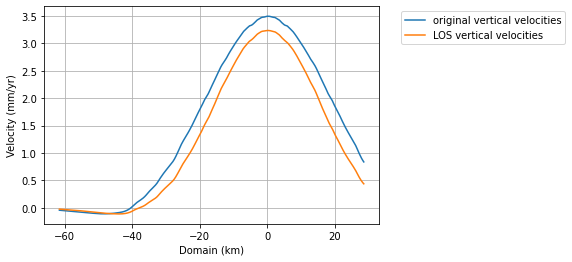

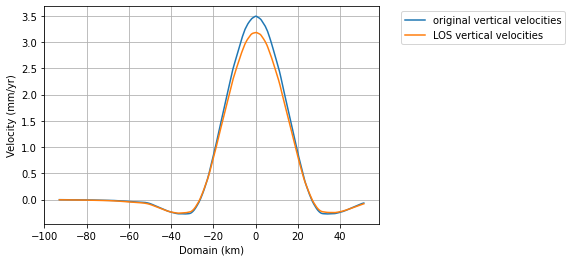

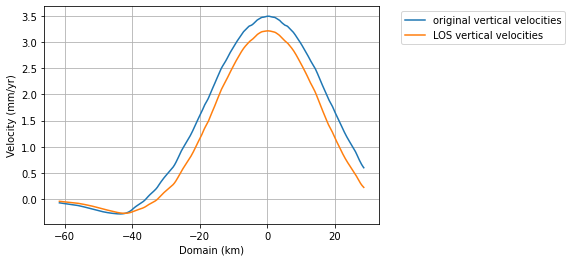

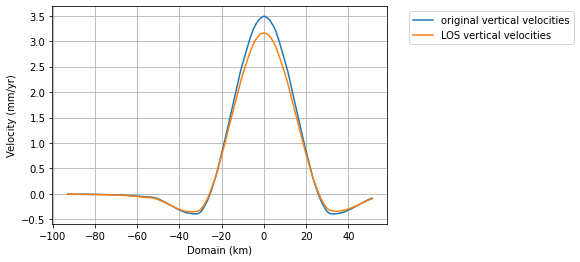

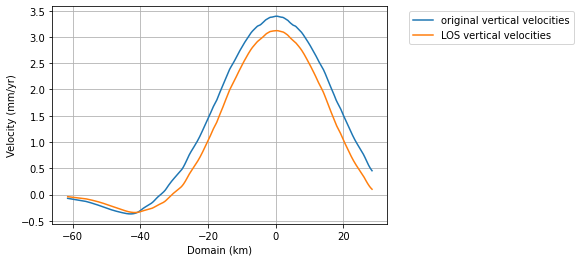

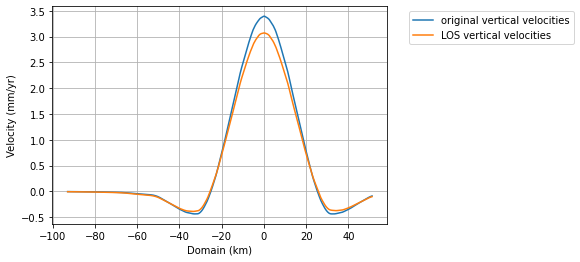

In [176]:
dt = 0.1
#dt = 1
time_steps = time_steps = np.asarray([690, 700])/dt
relax_time=1
runtime=270
#model_name="TimeDependentPressure/10yrSawtooth/SMB/NoCyl"
#model_name="SMB/Chamber_Bottom"
#model_name="SMB/Chamber_Bottom/500Kpa"
#model_name="SMB/Chamber_Bottom/500Kpa/15kmChamber"

#model_name="TimeDependentPressure/10yrSawtooth/SMB/Chamber_Bottom"
#model_name="TimeDependentPressure/10yrSawtooth/SMB/Chamber_Bottom/50km/250Kpa"
#model_name = "TimeDependentPressure/10yrSawtooth/SMB/Chamber_Bottom/50km/500Kpa/15kmChamber"
#model_name= "TimeDependentPressure/InSAR_Depres1"
#model_name= "TimeDependentPressure/InSAR_Depres2"
#model_name= "TimeDependentPressure/InSAR_Depres3"
#model_name= "TimeDependentPressure/InSAR_Depres4"
#model_name= "TimeDependentPressure/GPS_Pres1/500KPa"
#model_name= "TimeDependentPressure/GPS_Pres2/500KPa" 
#model_name= "TimeDependentPressure/GPS_Pres3/500KPa"
#model_name= "TimeDependentPressure/GPS_Pres4/500KPa" #Got Sombrero here
#model_name= "TimeDependentPressure/GPS_Pres4/250KPa"
#model_name= "TimeDependentPressure/GPS_Pres5/250KPa"
#model_name= "TimeDependentPressure/GPS_Pres6/250KPa"
#model_name= "TimeDependentPressure/GPS_Pres7/250KPa"
#model_name= "TimeDependentPressure/GPS_Pres8/250KPa"
#model_name= "TimeDependentPressure/GPS_Pres9/250KPa"
#model_name= "TimeDependentPressure/GPS_Pres10/250KPa"
#model_name= "TimeDependentPressure/GPS_Pres11/250KPa"
#model_name= "TimeDependentPressure/GPS_Pres12/250KPa"
#model_name= "TimeDependentPressure/GPS_Pres13/250KPa"
#model_name= "TimeDependentPressure/GPS_Pres14/250KPa"
#model_name= "TimeDependentPressure/GPS_Pres15/250KPa"
#model_name= "TimeDependentPressure/GPS_Pres16/250KPa"
#model_name= "TimeDependentPressure/GPS_Pres17/250KPa"
#model_name= "TimeDependentPressure/GPS_Pres18/250KPa"
#model_name= "TimeDependentPressure/GPS_Pres19/250KPa"
# dt = 1
# runtime=4250
# time_steps = np.asarray([690, 700])/dt
# model_name= "TimeDependentPressure/GPS_Pres20/250KPa"

# dt = 0.1
# runtime=1250
# time_steps = np.asarray([310, 330])/dt
# model_name= "TimeDependentPressure/GPS_Pres11/1MPa"

# dt = 1
# runtime=4250
# time_steps = np.asarray([690, 700])/dt
# model_name= "TimeDependentPressure/GPS_Pres20/1MPa"

# dt = 1
# runtime=4250
# time_steps = np.asarray([690, 700])/dt
# model_name= "TimeDependentPressure/GPS_Pres20/5MPa"


filename = "../ext_SMB/049_0107_ext_look_vec.xyz"
origin = (-107.00, 34.25) #origin of SMB in decimal degrees

#x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_h5(model_name, relax_time, time_step, runtime=runtime) #get data


#time_steps = np.asarray([774, 848])/dt
#time_steps = np.arange(800, 820, 1)/dt

#x_cut = 46.5  #in km
x_cut = (-61.75, 28.5)
#y_cut = 69.75 #in km
y_cut = (-93, 51.15)
#This is a test!
#y_cut = (-90, 50) 

#Best Fit model so far!
# current_model = GPS_Pres64
# dt = current_model.output_dt
# #time_steps_list = [np.arange(775, 858, 10)/dt, np.arange(800, 858, 10)/dt, np.arange(825, 858, 10)/dt]
# time_steps_list = [np.arange(760, 781, 1)/dt, np.arange(800, 821, 1)/dt, np.arange(780, 830, 10)/dt]


# current_model = GPS_Pres70_run3
# dt = current_model.output_dt
# time_steps_list = [np.arange(769, 785, 1)/dt, np.arange(775, 785, 1)/dt, np.arange(780, 785, 1)/dt]

# current_model = GPS_Pres72
# dt = current_model.output_dt
# #time_steps_list = [np.arange(767, 825, 10)/dt, np.arange(790, 825, 10)/dt, np.arange(810, 825, 1)/dt]
# time_steps_list = [np.arange(560, 570, 1)/dt]

# current_model = GPS_Pres69
# dt = current_model.output_dt
#time_steps_list = [np.arange(755, 861, 10)/dt, np.arange(800, 861, 10)/dt, np.arange(820, 861, 10)/dt, np.arange(850, 861, 1)/dt]
#time_steps_list = [np.arange(760, 780, 1)/dt]

# current_model = Sawtooth_Pres3
# dt = current_model.output_dt
# time_steps_list = [np.arange(701, 776, 10)/dt, np.arange(720, 776, 10)/dt, np.arange(740, 752,1)/dt, np.arange(740, 776, 1)/dt]
# #time_steps_list = [np.arange(790, 830, 1)/dt, np.arange(800, 820, 1)/dt]

# current_model = Sawtooth_Pres4
# dt = current_model.output_dt
# time_steps_list = [np.arange(705, 750, 10)/dt, np.arange(715, 750, 10)/dt, np.arange(730, 750,1)/dt]
# time_steps_list = [np.arange(520, 530, 1)/dt]

# current_model = Sawtooth_Pres4_run2
# dt = current_model.output_dt
# time_steps_list = [np.arange(705, 750, 10)/dt, np.arange(715, 750, 10)/dt, np.arange(730, 750,1)/dt]
# time_steps_list = [np.arange(545, 550, 1)/dt]

# current_model = Sawtooth_Pres4_run3
# dt = current_model.output_dt
# time_steps_list = [np.arange(705, 750, 10)/dt, np.arange(715, 750, 10)/dt, np.arange(730, 750,1)/dt]
# time_steps_list = [np.arange(715, 725, 1)/dt]

# current_model = GPS_Pres75
# dt = current_model.output_dt
#time_steps_list = [np.arange(705, 750, 10)/dt, np.arange(715, 750, 10)/dt, np.arange(730, 750,1)/dt]
# time_steps_list = [np.arange(770, 790, 5)/dt]

# current_model = GPS_Pres77
# dt = current_model.output_dt
# time_steps_list = [np.arange(780, 840, 10)/dt, np.arange(800, 820, 1)/dt, np.arange(790, 810,1)/dt]
#time_steps_list = [np.arange(770, 790, 5)/dt]


# current_model = Sawtooth_Pres15_run2
# dt = current_model.output_dt
# time_steps_list = [np.arange(715, 750, 5)/dt, np.arange(750, 780, 5)/dt, np.arange(780, 810,5)/dt, np.arange(810, 830,5)/dt]
# time_steps_list = [np.arange(710, 720, 5)/dt]

current_model = Sawtooth_Pres18_run2
somb_start = 733
dt = current_model.output_dt
time_steps_list = [np.arange(750, 785, 5)/dt, np.arange(780, 815, 5)/dt, np.arange(800, 835,5)/dt]


x_los_list = []
y_los_list = []
v_proj_x_list = []
v_proj_y_list = []

for time_steps in time_steps_list:
    x_los, v_proj_x = project_velocities(filename, current_model.run_name, current_model.t_r, np.rint(time_steps).astype(int), runtime=current_model.run_time, origin=origin, cutoff=x_cut, x_dir=True, adjust_angle=0.461, x_off=-9.12e3, y_off=5.07e3)
    y_los, v_proj_y = project_velocities(filename, current_model.run_name, current_model.t_r, np.rint(time_steps).astype(int), runtime=current_model.run_time, origin=origin, cutoff=y_cut, y_dir=True, adjust_angle=0.461, x_off=-9.12e3, y_off=5.07e3)
    
    x_los_list.append(x_los)
    y_los_list.append(y_los)
    v_proj_x_list.append(v_proj_x)
    v_proj_y_list.append(v_proj_y)

: Title: 
: Command: 
: Remark: 
: Pixel node registration used [Geographic grid]
: Grid file format: nf = GMT netCDF format (32-bit float), CF-1.7
: x_min: 252.238888889 x_max: 253.511111111 x_inc: 0.000555555555459 (2 sec) name: x n_columns: 2290
: y_min: 33.2041666667 y_max: 34.8541666667 y_inc: 0.000416666666667 name: y n_rows: 3960
: v_min: -6.14178180695 v_max: 6.22003555298 name: z
: scale_factor: 1 add_offset: 0
: format: classic



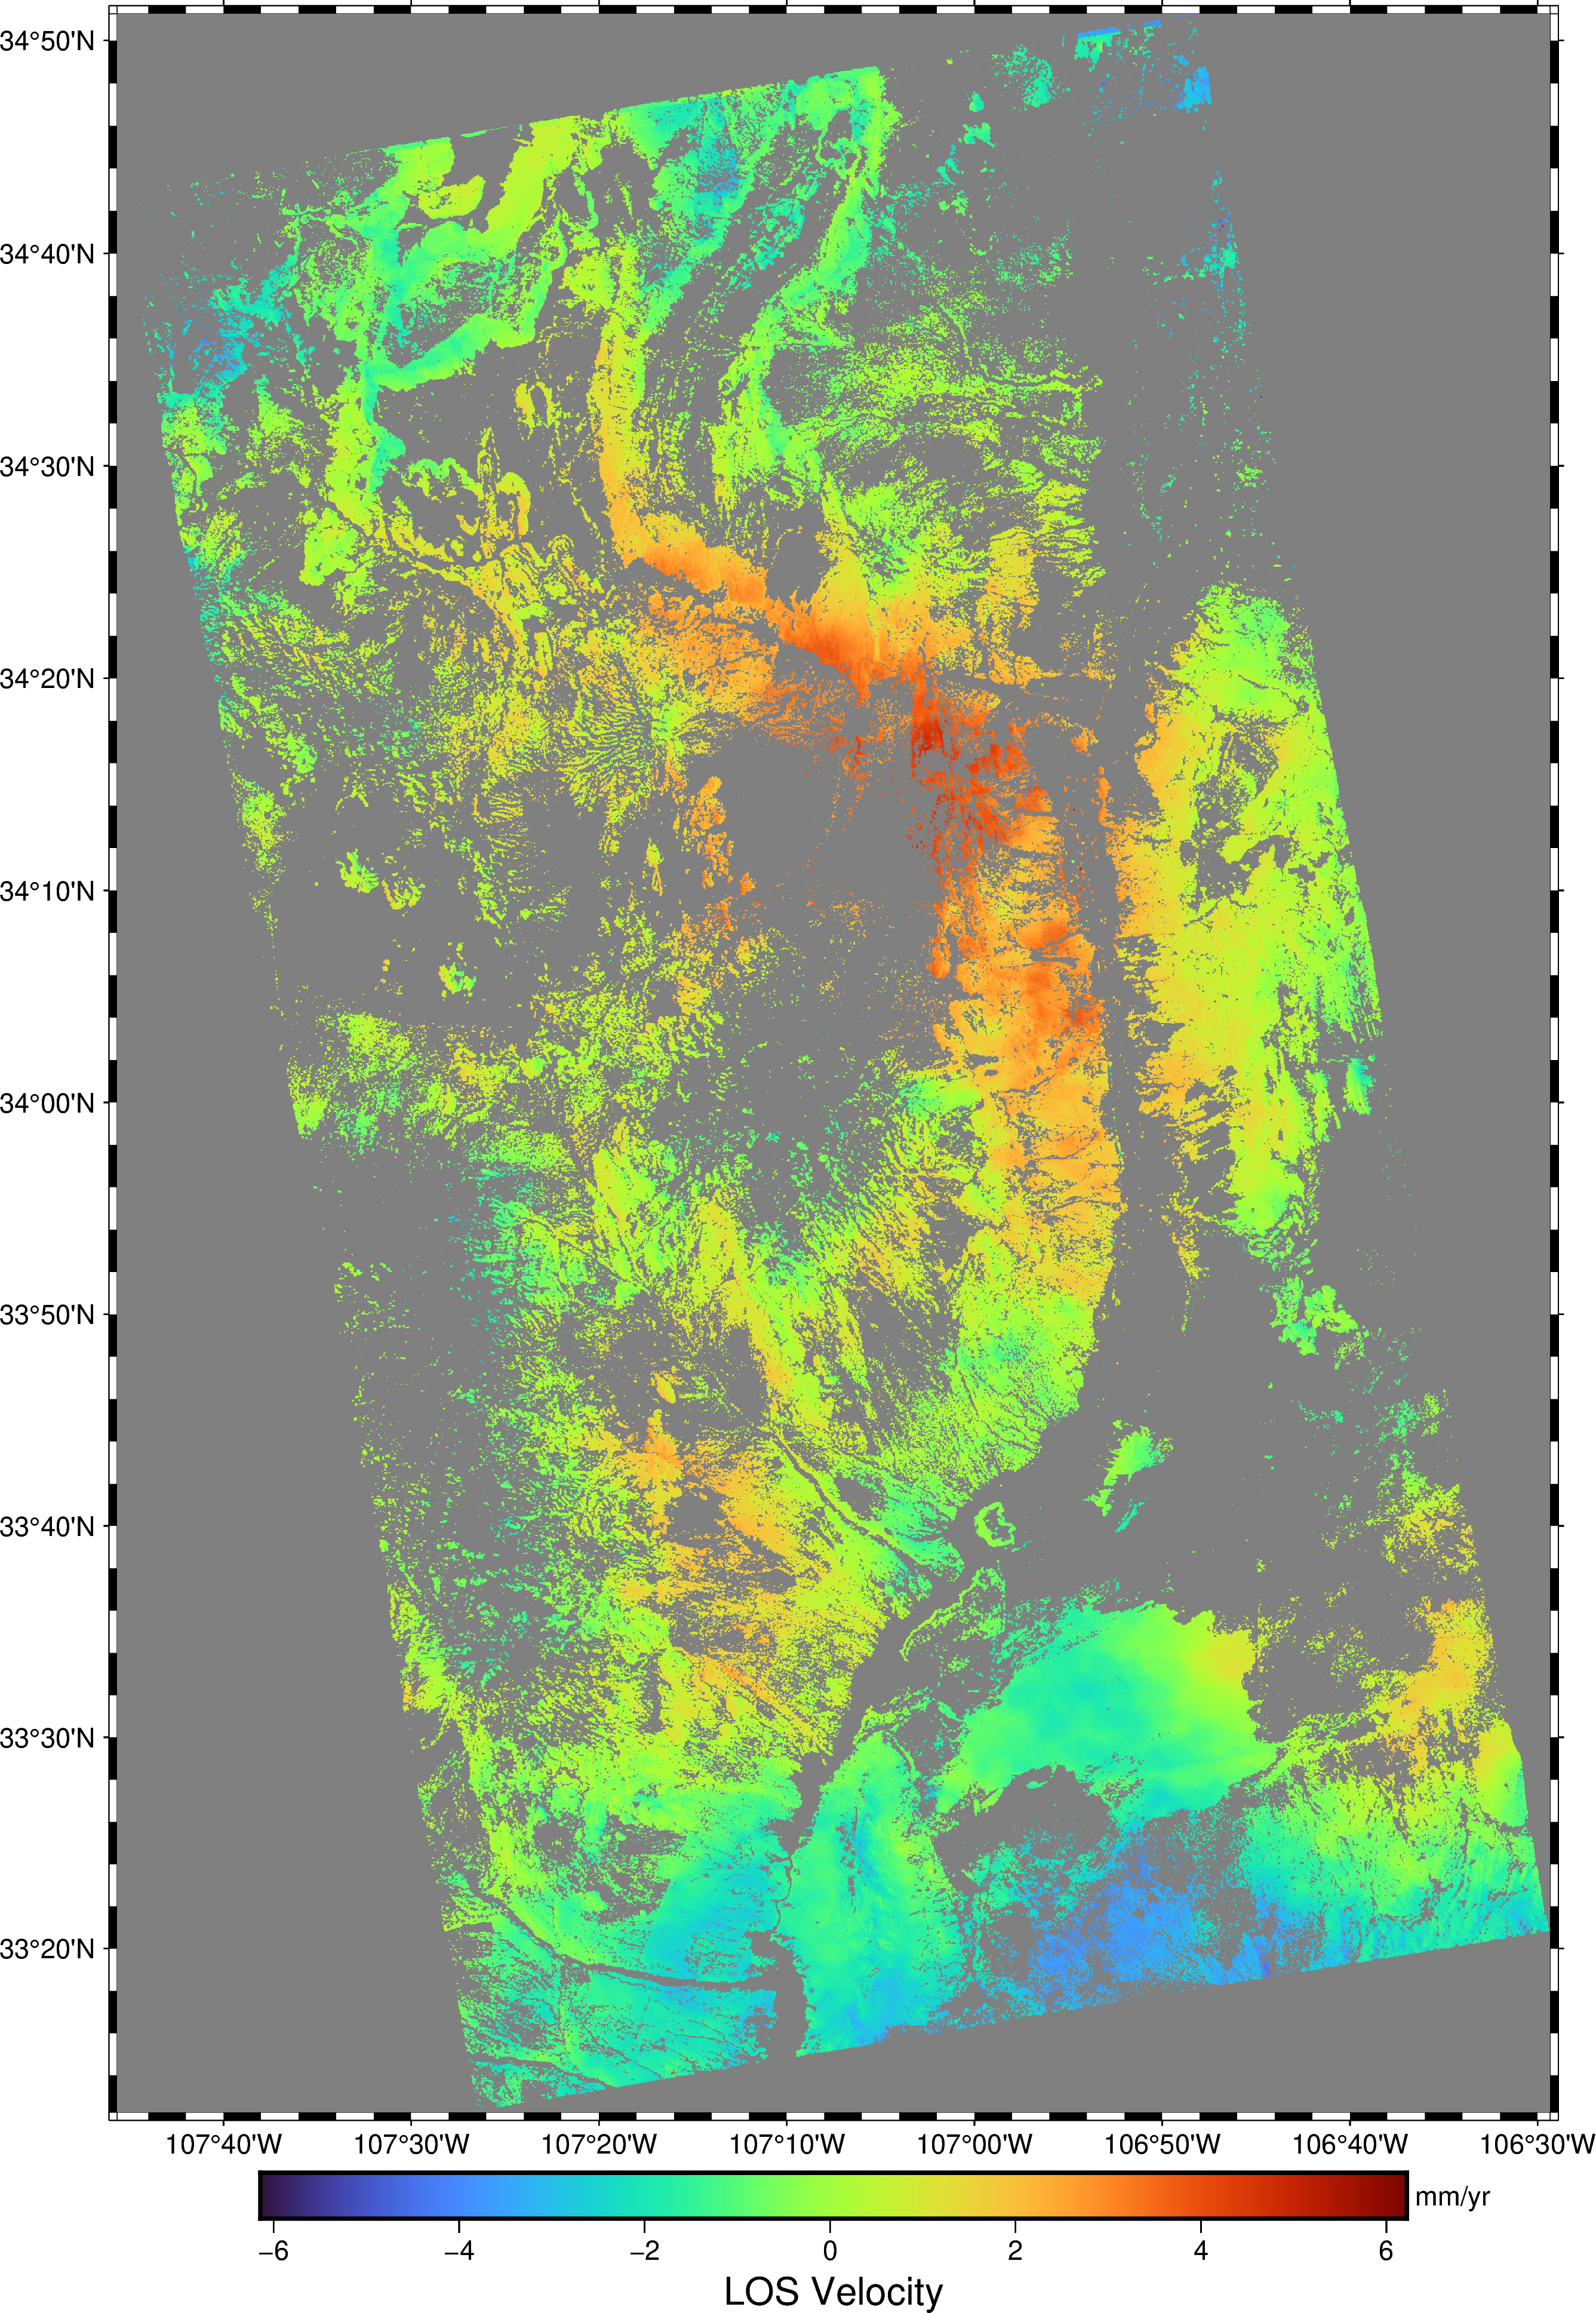

252.33861100000001 253.306388


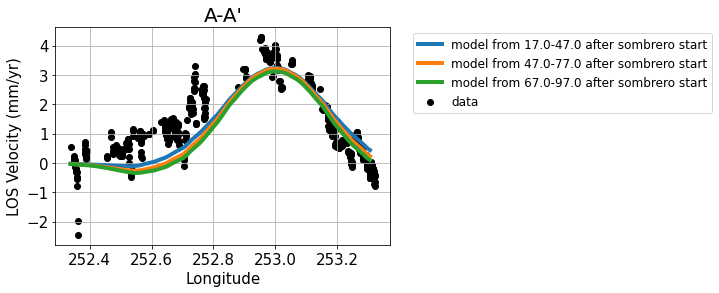

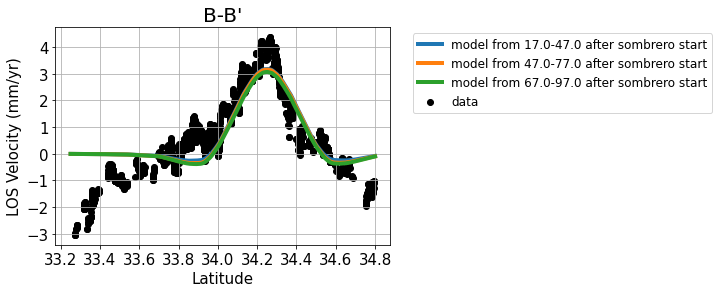

In [177]:
import pygmt

# points = pygmt.datasets.load_ocean_ridge_points()
# print(points)
grid=pygmt.load_dataarray("../ext_SMB/fr_trend_mean_los_all_ll.grd")
print(pygmt.grdinfo(grid))
# print(grid.head())

x1 = np.arange(252.238888889, 253.511111111, 0.000555555555459)
y1 = np.ones(len(x1))*34.25

y2 = np.arange(33.2041666667, 34.8541666667, 0.000416666666667)
x2 = np.ones(len(y2))*-107.0

d1 = {"longitude": x1, "latitude": y1}
points1 = pd.DataFrame(data=d1)
track1 = pygmt.grdtrack(points=points1, grid=grid, newcolname="z")

d2 = {"longitude": x2, "latitude": y2}
points2 = pd.DataFrame(data=d2)
track2 = pygmt.grdtrack(points=points2, grid=grid, newcolname="z")

#print(np.where(np.isnan(track1.z) == False))


fig=pygmt.Figure()
fig.basemap(region=[252.238888889, 253.511111111, 33.2041666667, 34.8541666667], frame=True, projection="Cyl_stere/150/-20/8i")
fig.grdimage(grid=grid)    
fig.colorbar(frame=["a", "x+lLOS Velocity", "y+lmm/yr"])

fig.show()

#shift returned x_los back to degrees and adjust the origin:
deg_to_km = 93 #1 degree is approx 93 km in southern NM
x_los_long = np.asarray(x_los.copy())/deg_to_km
x_los_long += (origin[0] + 360)

x_los_lat = np.asarray(y_los.copy())/deg_to_km
x_los_lat += (origin[1])

print(min(x_los_long), max(x_los_long))
#print(v_proj[2])
plt.title("A-A'", fontsize=20)
plt.xlabel("Longitude", fontsize=15)
plt.ylabel("LOS Velocity (mm/yr)", fontsize=15)
plt.scatter(track1.longitude, track1.z, label="data", color="black")

for i in range(len(time_steps_list)):
    x_los_long = np.asarray(x_los_list[i].copy())/deg_to_km
    x_los_long += (origin[0] + 360)
    plt.plot(x_los_long, np.asarray(v_proj_x_list[i])*3.154e+10, label="model from "+str(dt*time_steps_list[i][0]-somb_start) + "-"+str(dt*time_steps_list[i][len(time_steps_list[i])-1]-somb_start)+" after sombrero start", lw=4)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=12)
plt.grid()
plt.savefig("/home/grantblock/Research/SMBPylith/Figures/InSAR_Fit_long.png", bbox_inches="tight")
plt.show()

#output LOS velocities to file
out_file = open("AA'_LOS.txt", "a")
out_file.write("t,x_los_long,los_vel\n")
for i in range(len(time_steps_list)):
    t = time_steps_list[i][0]
    x_los_long = np.asarray(x_los_list[i].copy())/deg_to_km
    x_los_long += (origin[0] + 360)
    v_proj = np.asarray(v_proj_x_list[i])*3.154e+10
    for j in range(len(x_los_long)):
        out_file.write(str(t)+","+str(x_los_long[j])+","+str(v_proj[j])+"\n")
out_file.close()


plt.title("B-B'", fontsize=20)
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("LOS Velocity (mm/yr)", fontsize=15)
plt.scatter(track2.latitude, track2.z, label="data", color="black")
for i in range(len(time_steps_list)):
    x_los_lat = np.asarray(y_los_list[i].copy())/deg_to_km
    x_los_lat += (origin[1])
    plt.plot(x_los_lat, np.asarray(v_proj_y_list[i])*3.154e+10, label="model from "+str(dt*time_steps_list[i][0]-somb_start) + "-"+str(dt*time_steps_list[i][len(time_steps_list[i])-1]-somb_start)+" after sombrero start", lw=4)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)    
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=12)
plt.grid()
plt.savefig("/home/grantblock/Research/SMBPylith/Figures/InSAR_Fit_lat.png", bbox_inches="tight")

plt.show()

#output LOS velocities to file
out_file = open("BB'_LOS.txt", "a")
out_file.write("t,x_los_lat,los_vel\n")
for i in range(len(time_steps_list)):
    t = time_steps_list[i][0]
    x_los_lat = np.asarray(y_los_list[i].copy())/deg_to_km
    x_los_lat += (origin[1])
    v_proj = np.asarray(v_proj_y_list[i])*3.154e+10
    for j in range(len(x_los_lat)):
        out_file.write(str(t)+","+str(x_los_lat[j])+","+str(v_proj[j])+"\n")
out_file.close()

L =  400
velocity 1 = 3.0203472007284606 mm/yr
velocity 2 = 1.9046985207922247 mm/yr
Line Break at 2012.7378773445905 +/- 9.105219608313132e-06


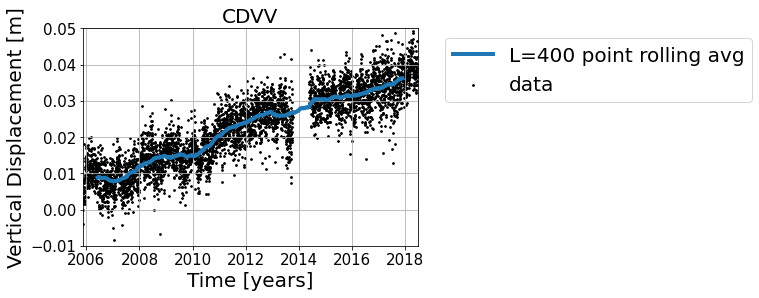

L =  400
velocity 1 = 1.6140692706611122 mm/yr
velocity 2 = 1.5130879895054896 mm/yr
Line Break at 2009.2205110506413 +/- 3.116452609814222e-05


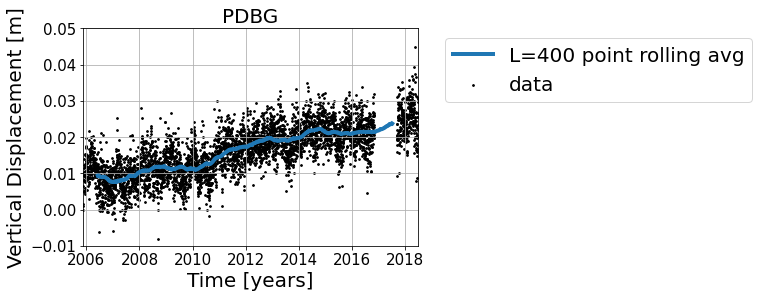

L =  400
velocity 1 = 1.3282172567353099 mm/yr
velocity 2 = -0.5993160494517403 mm/yr
Line Break at 2012.905272068673 +/- 9.803154039255939e-06


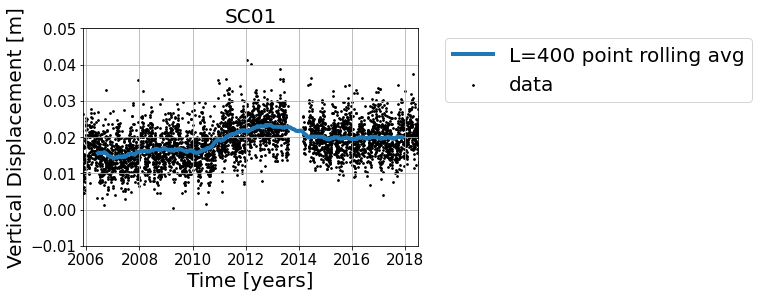

In [200]:
#Fit GPS Time series
from scipy.optimize import curve_fit
import pwlf
from scipy import stats

def read_ts(file):
    #dE, dN, dU are displacements with respect to first epoch location
    #Se, Su, Su are sigmas
    #R** are the covariances
    #rest are time fields

    pos_ts = np.genfromtxt( file, dtype=None, encoding=None,
              names=['dec_year',
                  'dE', 'dN', 'dU',
                  'Se', 'Sn', 'Su',
                  'Ren','Reu','Rnu',
                  'sec_past_J2000',
                  'yyyy', 'mm', 'dd',
                  'hh', 'min', 'sec', 'soln'])
    return pos_ts
def fit(x, a, b, c, d):
    return a + b*x + c*np.sin(x*(2*np.pi))  + d*np.cos(x*(2*np.pi))

def piecewise_fit(x, x0, a1, b1, c1, d1, a2, b2, c2, d2):
    y = np.piecewise(x, [x < x0],
                    [lambda x: a1+b1*x+c1*np.sin(x*(2*np.pi)) + d1*np.cos(x*(2*np.pi)),
                     lambda x: a2+b2*x+c2*np.sin(x*(2*np.pi)) + d2*np.cos(x*(2*np.pi))])
    
    return y

def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])


# def piecewise_fit(x, x0, a1, b1, c1, d1, a2, b2, c2, d2):
#     if x < x0:
#         return a1 + b1*x + c1*np.sin(x*(2*np.pi)) + d1*np.cos(x*(2*np.pi))
#     else:
#         return a2 + b2*x + c2*np.sin(x*(2*np.pi)) + d2*np.cos(x*(2*np.pi))

# pos_ts = read_ts(file)

# time = pos_ts['dec_year']

# test = np.arange(0, 10, 0.01)
# plt.plot(test, piecewise_fit(test, 5, 0, 0, 0, 0, 0, 2, 0, 0))
# plt.show()

    
def fit_data(file, title, component='dU', piecewise=False):
    
    lw = 4
    ms = 75
    label_fontsize=15
    axes_fontsize=15
    title_fontsize=20
    legend_fontsize=20
    
    pos_ts = read_ts(file)

    time = pos_ts['dec_year']

    signal = pos_ts[component]
    
    #cut Data that goes before 2005.87917807
    #cut data that goes after 2018.46823428
    if piecewise and time[0] < 2005.87917807:
        cut_idx = ((time >= 2005.87917807) & (time <= 2018.46823428))
    
        time_cut = time[cut_idx]
        signal_cut = signal[cut_idx]
        fit_idx = (time >= 2005.87917807) & (time <= 2014)
        
    
    
    if piecewise:
        if time[0] < 2005.87917807:
            PWLF = pwlf.PiecewiseLinFit(time[fit_idx], signal[fit_idx])
            res = PWLF.fit_guess([2008]) 
        else:    
            PWLF = pwlf.PiecewiseLinFit(time, signal)
            res = PWLF.fit_guess([2008])
        #print(res)
        slopes = PWLF.calc_slopes()
        se = PWLF.standard_errors()
        # print(slopes)
        # print(se)
        print("velocity 1 =", str(slopes[0]*1000), "mm/yr")
        print("velocity 2 =", str(slopes[1]*1000), "mm/yr")
        print("Line Break at", str(res[1]), "+/-", str(se[1]))
#         popt, pcov = curve_fit(piecewise_linear, time.astype(float), signal.astype(float))
#         perr = np.sqrt(np.diag(pcov))
        
#         print("velocity 1=", str(popt[2]*1000), "+/-", str(perr[2]*1000), "mm/yr")
#         print("velocity 2=", str(popt[3]*1000), "+/-", str(perr[3]*1000), "mm/yr")
#         print("velocity change at", str(popt[0]))
        
    else:
        popt, pcov = curve_fit(fit, time, signal)
        perr = np.sqrt(np.diag(pcov))
        print("velocity=", str(popt[1]*1000), "+/-", str(perr[1]*1000), "mm/yr")

    
    if piecewise:
        if time[0] < 2005.87917807:
            plt.scatter(time, signal, s=3, color="blue", label="data")
            plt.plot(time[cut_idx], PWLF.predict(time[cut_idx]), color="orange", linestyle='dashed', label="Single Hinge Piecewise Partial Fit", linewidth=lw)
            plt.xlim([2005.87917807, 2018.46823428])
            plt.ylim([-0.01, 0.05])
        else:    
            plt.scatter(time, signal, s=3, color="blue", label="data")
            plt.plot(time, PWLF.predict(time), color="orange", label="Single Hinge Piecewise Fit", linewidth=lw)
        plt.xlabel("Time [years]", fontsize=label_fontsize)
        plt.ylabel("Displacement [m]", fontsize=label_fontsize)
        plt.title(title, fontsize=title_fontsize)
        plt.legend(fontsize=legend_fontsize)
        plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=legend_fontsize)
        plt.xticks(fontsize=axes_fontsize)
        plt.yticks(fontsize=axes_fontsize)
        plt.xlim([2005.87917807, 2018.46823428])
        plt.ylim([-0.01, 0.05])
        plt.grid()
        plt.savefig(title+"_fit.png", bbox_inches="tight")
        plt.show()
    else:
        plt.scatter(time, signal, s=4, color="black", label="data")
        plt.plot(time, fit(time, *popt), label="Fit", linewidth=lw)
        plt.xlabel("Time [years]", fontsize=label_fontsize)
        plt.ylabel("Displacement [m]", fontsize=label_fontsize)
        plt.title(title, fontsize=title_fontsize)
        plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=legend_fontsize)
        plt.grid()
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        
        plt.savefig("/home/grantblock/Research/SMBPylith/Figures/"+title+"_fit.png", bbox_inches="tight")
        plt.show()
        
        return popt[1]*1000

        
def rolling_average(x, y, L):
    
    avg = []
    x_centers = []
    i = 0
    
    while i < len(y) - L + 1:
        window = y[i: i+L]
        
        window_avg = sum(window)/L
        
        avg.append(window_avg)
        
        x_center = (x[i]+x[i+L-1])/2
        
        x_centers.append(x_center)
        
        i+=1
        
    return (np.asarray(x_centers), np.asarray(avg))
    
        
#fit data that's been averaged in multiple sized bins L given by a list L_list
def fit_avg_data(file, L_list, title):
    
    lw = 4
    ms = 75
    label_fontsize=20
    axes_fontsize=15
    title_fontsize=20
    legend_fontsize=20
    
    pos_ts = read_ts(file)

    time = pos_ts['dec_year']

    signal = pos_ts['dU']    
    #cut Data that goes before 2005.87917807
    #cut data that goes after 2018.46823428
    cut_idx = ((time >= 2005.87917807) & (time <= 2018.46823428))
    
    time_cut = time[cut_idx]
    signal_cut = signal[cut_idx]
    
    #average data for given bin sizes and get piecewise fit, then plot
    for i in range(len(L_list)):
        L = L_list[i]
        num_bins = int(len(time_cut)/L)
        #to mean, cut all times starting right before the gap
        #mean_idx = (time_cut >= 2005.87917807) & (signal_cut <= 2013.5)
        
#         mean_stat = stats.binned_statistic(time_cut, signal_cut, statistic='mean', bins=num_bins)
        
#         bin_width = (mean_stat.bin_edges[1] - mean_stat.bin_edges[0])
#         bin_centers = mean_stat.bin_edges[1:] - bin_width/2
        
        # curr_signal = mean_stat.statistic
        # curr_time = bin_centers
        
        curr_time, curr_signal = rolling_average(time_cut, signal_cut, L)
        
        #remove NaN's
        NaN_idx = np.argwhere(np.isnan(curr_signal))
        filtered_signal = np.delete(curr_signal, NaN_idx)
        filtered_time = np.delete(curr_time, NaN_idx)
        
        
        #to fit, cut all times starting right before the gap
        #fit_idx = (curr_time >= 2005.87917807) & (curr_signal <= 2013.5)
        
        PWLF = pwlf.PiecewiseLinFit(filtered_time, filtered_signal)
        res = PWLF.fit_guess([2008]) 
        
        slopes = PWLF.calc_slopes()
        se = PWLF.standard_errors()
        print("L = ", str(L))
        print("velocity 1 =", str(slopes[0]*1000), "mm/yr")
        print("velocity 2 =", str(slopes[1]*1000), "mm/yr")
        print("Line Break at", str(res[1]), "+/-", str(se[1]))
        
        #plot
        if i == 0:
            plt.scatter(time, signal, s=3, color="black", label="data")
        plt.plot(curr_time, curr_signal, label="L="+str(L)+" point rolling avg", linewidth=lw)
    
    plt.xlabel("Time [years]", fontsize=label_fontsize)
    plt.ylabel("Vertical Displacement [m]", fontsize=label_fontsize)
    plt.title(title, fontsize=title_fontsize)
    plt.legend(fontsize=legend_fontsize)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=legend_fontsize)
    plt.xticks(fontsize=axes_fontsize)
    plt.yticks(fontsize=axes_fontsize)
    plt.xlim([2005.87917807, 2018.46823428])
    plt.ylim([-0.01, 0.05])
    plt.grid()
    plt.savefig("/home/grantblock/Research/SMBPylith/Figures/"+title+"_avg_fit.png", bbox_inches="tight")
    plt.show()
        
        
        
        
    
    
    
    
    
# file="../TimeSeries/CDVV_igs14.series"    
# fit_data(file, "CDVV", piecewise=True)

# file="../TimeSeries/PDBG_igs14.series"    
# fit_data(file, "PDBG", piecewise=True)

# file="../TimeSeries/SC01_igs14.series"    
# fit_data(file, "SC01", piecewise=True)

# file="../TimeSeries/SHR1_igs14.series"    
# fit_data(file, "SHR1", piecewise=True)

L_List = [50, 100, 200]
L_List = [200, 300, 400]
L_List = [400]
file="../TimeSeries/CDVV_igs14.series"    
fit_avg_data(file, L_List, "CDVV")

file="../TimeSeries/PDBG_igs14.series"    
fit_avg_data(file, L_List, "PDBG")

file="../TimeSeries/SC01_igs14.series"    
fit_avg_data(file, L_List, "SC01")



velocity= -13.383597014193192 +/- 0.006818251837197095 mm/yr


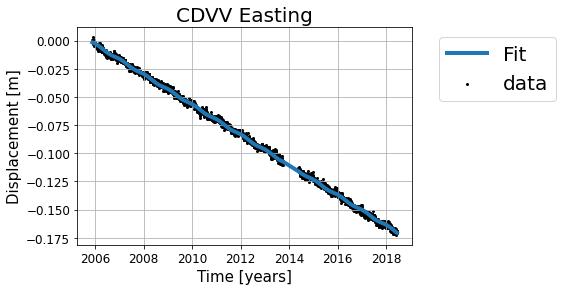

velocity= -6.193313425032392 +/- 0.005800678658078505 mm/yr


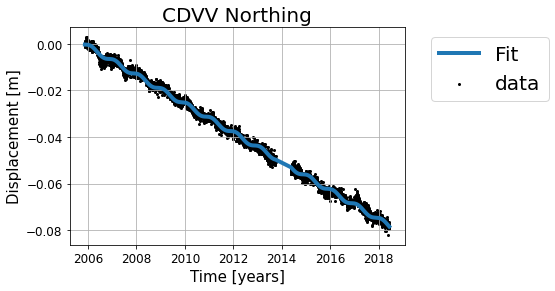

velocity= 2.5058018592404583 +/- 0.019121349717128207 mm/yr


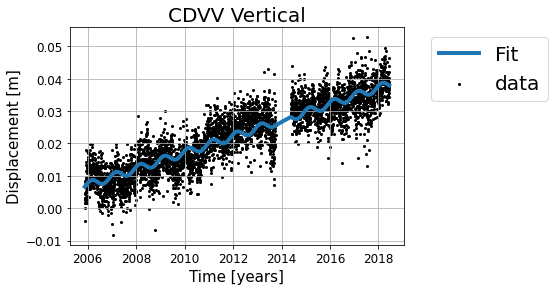

velocity= -12.194423692220282 +/- 0.00678691797533655 mm/yr


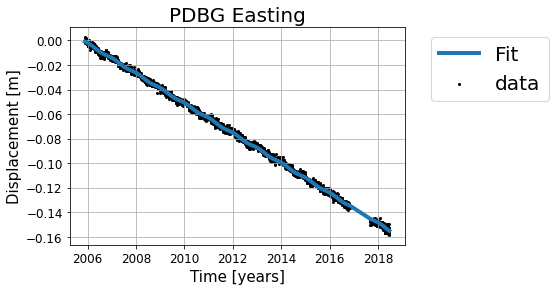

velocity= -6.500613988638841 +/- 0.006056286878207532 mm/yr


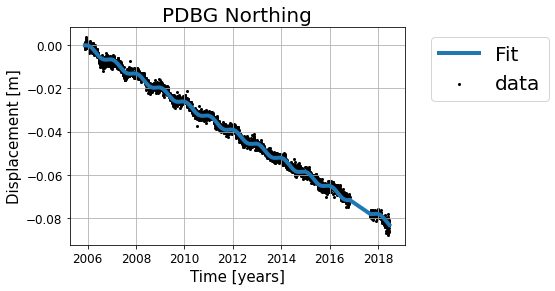

velocity= 1.4586205600680588 +/- 0.019721484598386903 mm/yr


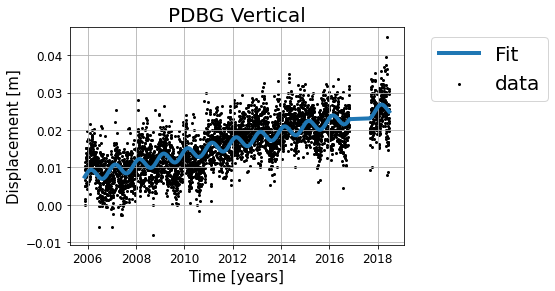

velocity= -13.08071634480238 +/- 0.005931494733942274 mm/yr


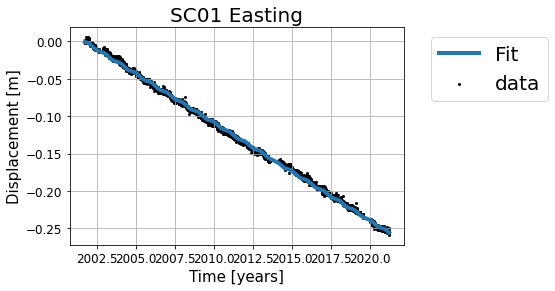

velocity= -6.533704895555358 +/- 0.0054803674374524726 mm/yr


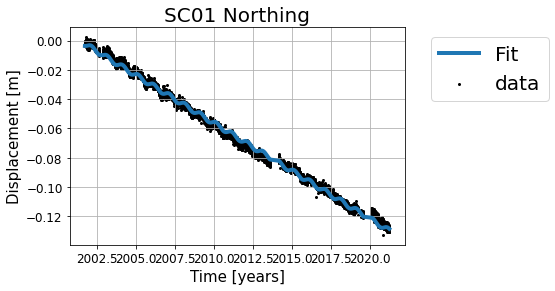

velocity= 0.4011324315756305 +/- 0.012251880006292452 mm/yr


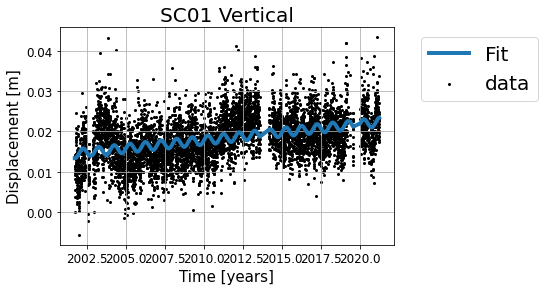

PDBG is moving 1.1891733219729108 mm/yr east from CDVV
PDBG is moving -0.3073005636064492 mm/yr north from CDVV
SC01 is moving 0.30288066939081304 mm/yr east from CDVV
SC01 is moving -0.3403914705229658 mm/yr north from CDVV

CDVV is moving -1.1891733219729108 mm/yr east from PDBG
CDVV is moving 0.3073005636064492 mm/yr north from PDBG
SC01 is moving -0.8862926525820978 mm/yr east from PDBG
SC01 is moving -0.033090906916516616 mm/yr north from PDBG

CDVV is moving -0.30288066939081304 mm/yr east from SC01
CDVV is moving 0.3403914705229658 mm/yr north from SC01
PDBG is moving 0.8862926525820978 mm/yr east from SC01
PDBG is moving 0.033090906916516616 mm/yr north from SC01


In [201]:
# look at horizontal motions between the stations
CDVV_east = fit_data("../TimeSeries/CDVV_igs14.series", "CDVV Easting", component="dE")
CDVV_north = fit_data("../TimeSeries/CDVV_igs14.series", "CDVV Northing", component="dN")
fit_data("../TimeSeries/CDVV_igs14.series", "CDVV Vertical", component="dU")

PDBG_east = fit_data("../TimeSeries/PDBG_igs14.series", "PDBG Easting", component="dE")
PDBG_north = fit_data("../TimeSeries/PDBG_igs14.series", "PDBG Northing", component="dN")
fit_data("../TimeSeries/PDBG_igs14.series", "PDBG Vertical", component="dU")

SC01_east = fit_data("../TimeSeries/SC01_igs14.series", "SC01 Easting", component="dE")
SC01_north = fit_data("../TimeSeries/SC01_igs14.series", "SC01 Northing", component="dN")
fit_data("../TimeSeries/SC01_igs14.series", "SC01 Vertical", component="dU")

#find motions relative to CDVV
print("PDBG is moving", str(PDBG_east-CDVV_east), "mm/yr east from CDVV")
print("PDBG is moving", str(PDBG_north-CDVV_north), "mm/yr north from CDVV")

print("SC01 is moving", str(SC01_east-CDVV_east), "mm/yr east from CDVV")
print("SC01 is moving", str(SC01_north-CDVV_north), "mm/yr north from CDVV")

print("")

#find motions relative to PDBG
print("CDVV is moving", str(CDVV_east-PDBG_east), "mm/yr east from PDBG")
print("CDVV is moving", str(CDVV_north-PDBG_north), "mm/yr north from PDBG")

print("SC01 is moving", str(SC01_east-PDBG_east), "mm/yr east from PDBG")
print("SC01 is moving", str(SC01_north-PDBG_north), "mm/yr north from PDBG")

print("")

#find motions relative to SC01
print("CDVV is moving", str(CDVV_east-SC01_east), "mm/yr east from SC01")
print("CDVV is moving", str(CDVV_north-SC01_north), "mm/yr north from SC01")

print("PDBG is moving", str(PDBG_east-SC01_east), "mm/yr east from SC01")
print("PDBG is moving", str(PDBG_north-SC01_north), "mm/yr north from SC01")



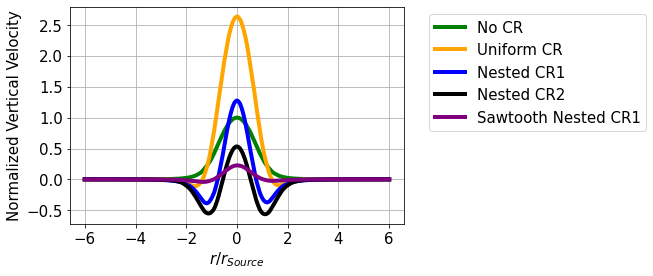

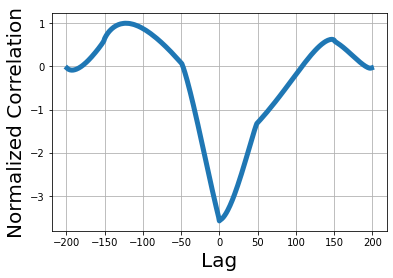

Fit paramter 1: -0.25806005275537947 Characteristic Time 1: 3.8750670215041807
Fit paramter 2: nan Characteristic Time 2: nan


/tmp/ipykernel_3664/2683859220.py:1343: RuntimeWarning: invalid value encountered in log
  vz_max_log = np.log(np.asarray(vz_max)*3.154e+10)


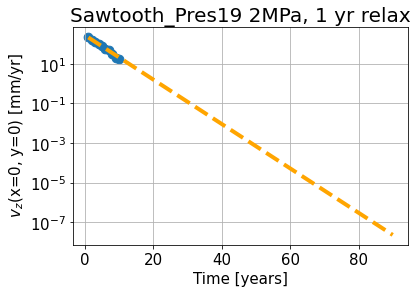

Sombrero at  503
Sombrero at  504
Sombrero at  505
Sombrero at  506
Sombrero at  507
Sombrero at  508
Sombrero at  509
Sombrero at  510
Sombrero at  511
Sombrero at  512
Sombrero at  513
Sombrero at  514
Sombrero at  515
Sombrero at  516
Sombrero at  517
Sombrero at  518
Sombrero at  519
Sombrero at  520
Sombrero at  521
Sombrero at  522
Sombrero at  523
Sombrero at  524
Sombrero at  525
Sombrero at  526
Sombrero at  527
Sombrero at  528
Sombrero at  529
Sombrero at  530
Sombrero at  531
Sombrero at  532
Sombrero at  533
Sombrero at  534
Sombrero at  535
Sombrero at  536
Sombrero at  537
Sombrero at  538
Sombrero at  539
Sombrero at  540
Sombrero at  541
Sombrero at  542
Sombrero at  543
Sombrero at  544
Sombrero at  545
Sombrero at  546
Sombrero at  547
Sombrero at  548
Sombrero at  549
Sombrero at  550
Sombrero at  551
Sombrero at  552
Sombrero at  553
Sombrero at  554
Sombrero at  555
Sombrero at  556
Sombrero at  557
Sombrero at  558
Sombrero at  559
Sombrero at  560
Sombrero at  5

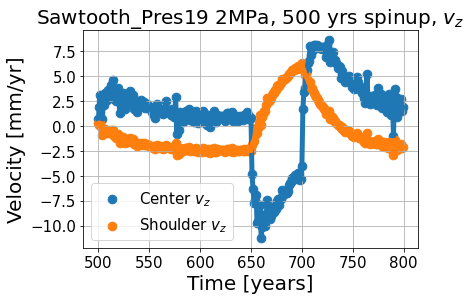

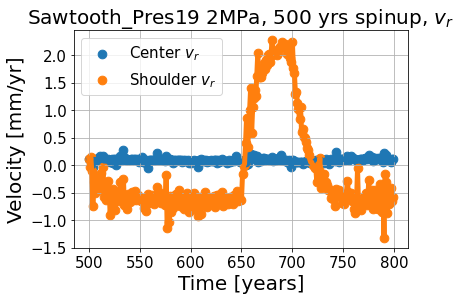

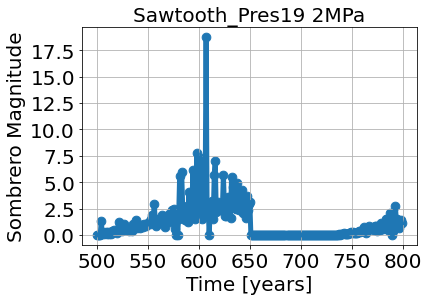

[ 1.33722737  0.32117574  0.26445698  0.24876263  0.21191292  0.38660259
  0.4940673   1.25575775  0.49182829  1.0038743   0.69010862  0.61319627
  1.05844541  1.37115417  0.94914892  0.95975766  1.06369264  1.20811235
  1.90724358  2.97875932  1.44153548  1.51219401  1.91008385  2.01312708
  2.44063237  2.03852669  5.57580592  5.98129079  2.47214299  4.04866261
  2.97131556  6.16072266  7.78884926  2.38931019  7.26447911  3.15998303
 18.74732467  2.81037344  3.19116498  7.03306907  3.09972263  2.86210907
  5.7063078   3.60903437  5.46329976  4.87652903  4.22456376  2.89811326
  3.68322615  3.08395488  0.05127825  0.08143951  0.14567355  0.12296746
  0.24923763  0.29973355  0.32444911  0.40176058  0.76904051  0.68370619
  0.82323634  0.65237328  0.86684658  0.82303902  1.13865795  1.52012121
  2.12090033  2.7009458   1.48388601  1.4407794 ]


In [175]:
#compare widths

dt=1.0
model_list = ["ViscoelasticCylinderSlice/35km", "ViscoelasticCylinderSlice/50km", "ViscoelasticSandwich/10km"]
relax_time_list = [1,1,1]
runtime_list = [100,100,100]
dt_list=[1, 1, 1]
time_steps = [43, 90, 55]
color_list = ["blue","black","green"]
#compare_widths(model_list, relax_time_list, runtime_list, dt_list, time_steps, color_list=color_list, title=r"$t/\tau_{c2} = 0.93$", save=True, save_name="SimpleModelWidths")

model_list = ["SMB/Chamber_Bottom/CreepTest", "SMB/Chamber_Bottom/ThickUpperLayer", "SMB/Chamber_Bottom/15KmChamber", "TimeDependentPressure/GPS_Pres22/1MPa"]
relax_time_list = [1,1,1,1]
runtime_list = [100, 100, 100, 1250]
dt_list = [0.1, 0.1, 0.1, 1]
time_steps = [90, 91, 94, 33]
color_list = ["blue","black","green", "red"]
#compare_widths(model_list, relax_time_list, runtime_list, dt_list, time_steps, color_list=color_list, title=r"$t/\tau_{c2} = 0.41$", save=True, save_name="LayeredModelWidths")

model_list = [GPS_Pres52.run_name, GPS_Pres58.run_name]
relax_time_list = [GPS_Pres52.t_r, GPS_Pres58.t_r]
runtime_list = [GPS_Pres52.run_time, GPS_Pres58.run_time]
dt_list = [0.1, 0.1]
#time_steps = [6857, 6854] 20 yrs after sombrero
#time_steps = [6847, 6844] 10 yrs after sombrero
time_steps = [6867, 6864]


color_list=["blue", "orange"]
#compare_widths(model_list, relax_time_list, runtime_list, dt_list, time_steps, color_list=color_list, title="P0=250KPa, 30 yrs into 2nd sombrero", save=False)

model_list = [GPS_Pres52_run2.run_name, GPS_Pres58_run2.run_name]
relax_time_list = [GPS_Pres52.t_r, GPS_Pres58.t_r]
runtime_list = [GPS_Pres52.run_time, GPS_Pres58.run_time]
dt_list = [0.1, 0.1]
time_steps = [6860, 6860]
color_list=["blue", "orange"]
#compare_widths(model_list, relax_time_list, runtime_list, dt_list, time_steps, color_list=color_list, title="P0=1MPa, 30 yrs into 2nd sombrero", save=False)

model_list = [GPS_Pres81.run_name, GPS_Pres82.run_name, GPS_Pres83.run_name, GPS_Pres88.run_name]
relax_time_list = [GPS_Pres81.t_r, GPS_Pres82.t_r, GPS_Pres83.t_r, GPS_Pres88.t_r]
runtime_list = [GPS_Pres81.run_time, GPS_Pres82.run_time, GPS_Pres83.run_time, GPS_Pres88.run_time]
dt_list = [0.1, 0.1, 0.1, 0.1]
color_list = ["blue", "orange", "green", "indigo"]
key_list = [r"$r_{CR}=50$km, $r_{source}=25$km", r"$r_{CR}=100$km, $r_{source}=25$km", r"$r_{CR}=50$km, $r_{source}=30$km", r"$r_{CR}=100$km, $r_{source}=50$km"]
#time_steps = [1173, 1174, 1173] #10 yrs into somb
time_steps = [1163, 1164, 1163, 1160] #peak somb mags
#compare_widths(model_list, relax_time_list, runtime_list, dt_list, time_steps, color_list=color_list, key_list=key_list, title="T=500, P0=250 kPa, At Max 2nd Sombrero Magnitude", save=False)

model_list = [GPS_Pres81_run2.run_name, GPS_Pres82_run2.run_name, GPS_Pres83_run2.run_name, GPS_Pres88_run2.run_name]
relax_time_list = [GPS_Pres81_run2.t_r, GPS_Pres82_run2.t_r, GPS_Pres83_run2.t_r, GPS_Pres88_run2.t_r]
runtime_list = [GPS_Pres81_run2.run_time, GPS_Pres82_run2.run_time, GPS_Pres83_run2.run_time, GPS_Pres88_run2.run_time]
dt_list = [0.1, 0.1, 0.1, 0.1]
color_list = ["blue", "orange", "green", "indigo"]
key_list = [r"$r_{CR}=50$km, $r_{source}=25$km", r"$r_{CR}=100$km, $r_{source}=25$km", r"$r_{CR}=50$km, $r_{source}=30$km", r"$r_{CR}=100$km, $r_{source}=50$km"]
#time_steps = [1173, 1174, 1173] 10 yrs into somb
time_steps = [1163,1164,1163, 1160]  #peak somb mags
#compare_widths(model_list, relax_time_list, runtime_list, dt_list, time_steps, color_list=color_list, key_list=key_list, title="T=500, P0=1 MPa, At Max 2nd Sombrero Magnitude", save=False)

model_list = [GPS_Pres64.run_name, GPS_Pres103.run_name, GPS_Pres104.run_name, Sawtooth_Pres15_run2.run_name, GPS_Pres95.run_name]
relax_time_list = [GPS_Pres64.t_r, GPS_Pres103.t_r, GPS_Pres104.t_r, Sawtooth_Pres15_run2.t_r, GPS_Pres95.t_r]
runtime_list = [GPS_Pres64.run_time, GPS_Pres103.run_time, GPS_Pres104.run_time, Sawtooth_Pres15_run2.run_time, GPS_Pres95.run_time]
dt_list = [GPS_Pres64.output_dt, GPS_Pres103.output_dt, GPS_Pres104.output_dt, Sawtooth_Pres15_run2.output_dt, GPS_Pres95.output_dt]
time_steps = [811, 783, 800, 779, 777] #max sombrero
spinup_list = [GPS_Pres64.spinup_time, GPS_Pres103.spinup_time, GPS_Pres104.spinup_time, Sawtooth_Pres15_run2.spinup_time, GPS_Pres95.spinup_time]
color_list = ["blue", "orange", "green", "purple", "black"]
key_list = ["Nested CR1", "Uniform CR", "No CR", "Sawtooth Nested CR", "Nested CR2"]
#compare_widths(model_list, relax_time_list, runtime_list, dt_list, time_steps, spinup_list, color_list=color_list, key_list=key_list, norm_r=True, norm_vel=2, save=True)

model_list = [GPS_Pres104.run_name,GPS_Pres103.run_name,GPS_Pres64.run_name,GPS_Pres95.run_name,  Sawtooth_Pres15_run2.run_name]
relax_time_list = [GPS_Pres104.t_r,GPS_Pres103.t_r, GPS_Pres64.t_r, GPS_Pres95.t_r,  Sawtooth_Pres15_run2.t_r]
runtime_list = [GPS_Pres104.run_time,GPS_Pres103.run_time,GPS_Pres64.run_time,GPS_Pres95.run_time, Sawtooth_Pres15_run2.run_time]
dt_list = [GPS_Pres104.output_dt, GPS_Pres103.output_dt, GPS_Pres64.output_dt, GPS_Pres95.output_dt, Sawtooth_Pres15_run2.output_dt]
time_steps = [800,783, 811, 777, 779] #max sombrero
spinup_list = [GPS_Pres104.spinup_time,GPS_Pres64.spinup_time, GPS_Pres95.spinup_time, GPS_Pres103.spinup_time,  Sawtooth_Pres15_run2.spinup_time]
color_list = ["green","orange","blue", "black", "purple"]
key_list = ["No CR", "Uniform CR","Nested CR1", "Nested CR2", "Sawtooth Nested CR1"]
compare_widths(model_list, relax_time_list, runtime_list, dt_list, time_steps, spinup_list, color_list=color_list, key_list=key_list, norm_r=True, norm_vel=0, save=True)

time_steps = np.arange(700,900,1)
center_shoulder_cross_correlation(Sawtooth_Pres15_run2.run_name, time_steps, Sawtooth_Pres15_run2.t_r, Sawtooth_Pres15_run2.output_dt, 40e3, runtime=Sawtooth_Pres15_run2.run_time, equil_time=Sawtooth_Pres15_run2.spinup_time)

time_steps = [766, 770, 780, 790, 800, 810, 820, 830, 840, 850, 858]
# area_ratio(GPS_Pres64.run_name, time_steps, 1, GPS_Pres64.output_dt, GPS_Pres64.run_time, GPS_Pres64.spinup_time, plot_title="Nested CR", save=True)
# surface_vert_vel_time(GPS_Pres64.run_name, time_steps, 1, GPS_Pres64.output_dt, plot_title_name="Nested CR", check_sub=False, runtime=1000, save=True)

time_steps = [772, 775, 780, 785, 790, 796]
# area_ratio(GPS_Pres103.run_name, time_steps, 1, GPS_Pres103.output_dt, GPS_Pres103.run_time, GPS_Pres103.spinup_time, plot_title="Uniform CR", save=True)
# surface_vert_vel_time(GPS_Pres103.run_name, time_steps, 1, GPS_Pres103.output_dt, plot_title_name="Uniform CR", check_sub=False, runtime=1000, save=True)

time_steps = [720, 730, 750, 780, 800, 820, 840]
#surface_vert_vel_time(Sawtooth_Pres15_run2.run_name, time_steps, 1, Sawtooth_Pres15_run2.output_dt, plot_title_name="Sawtooth_Pres15 Run2", check_sub=False, runtime=1000, save=True)


model_list = ["TimeDependentPressure/GPS_Pres59/1MPa"]
relax_time_list = [1]
runtime_list = [1000]
time_steps = [2]
dt_list = [0.1]
color_list = ["blue"]
#compare_widths(model_list, relax_time_list, runtime_list, dt_list, time_steps, color_list=color_list, save=False)

model_list = ["TimeDependentPressure/GPS_Pres62/1MPa"]
relax_time_list = [1]
runtime_list = [1000]
time_steps = [50]
dt_list = [0.1]
color_list = ["blue"]
#compare_disp_widths(model_list, relax_time_list, runtime_list, dt_list, time_steps, color_list=color_list, title="GPS_Pres62", save=False, chamber=True)

model_list = ["TimeDependentPressure/GPS_Pres69/1MPa"]
relax_time_list = [1]
runtime_list = [1000]
time_steps = [50]
dt_list = [0.1]
color_list = ["blue"]
#compare_disp_widths(model_list, relax_time_list, runtime_list, dt_list, time_steps, color_list=color_list, title="GPS_Pres62", save=False, chamber=True)


# displacement_profiles("TimeDependentPressure/GPS_Pres64/1MPa", 1, 1000, 0.1, 500, title="GPS_Pres64 Chamber at t=500", save=False, save_name=None, chamber=True)
# displacement_profiles("TimeDependentPressure/GPS_Pres64/1MPa", 1, 1000, 0.1, 500, title="GPS_Pres64 at t=500", save=False, save_name=None, chamber=False)

# displacement_profiles("TimeDependentPressure/GPS_Pres65/1MPa", 1, 1000, 0.1, 500, title="GPS_Pres65 Chamber at t=500", save=False, save_name=None, chamber=True)
# displacement_profiles("TimeDependentPressure/GPS_Pres65/1MPa", 1, 1000, 0.1, 500, title="GPS_Pres65 at t=500", save=False, save_name=None, chamber=False)

dt=0.1
time_steps = np.asarray([780, 800, 820])/dt
# surface_vert_vel_time("TimeDependentPressure/GPS_Pres64/1MPa", np.rint(time_steps).astype(int), 1, dt, plot_title_name="GPS_Pres64 Vel", check_sub=False, runtime=1000, save=False)
# surface_vert_vel_time("TimeDependentPressure/GPS_Pres65/1MPa", np.rint(time_steps).astype(int), 1, dt, plot_title_name="GPS_Pres65 Vel", check_sub=False, runtime=1000, save=False)
#surface_vert_vel_time("TimeDependentPressure/GPS_Pres64/1MPa", np.rint(time_steps).astype(int), 1, dt, plot_title_name=None, check_sub=False, runtime=1000, save=True)


#t_r=5
model_list = [GPS_Pres11_run7.run_name, GPS_Pres27_run3.run_name, GPS_Pres28_run3.run_name]
relax_time_list = [GPS_Pres11_run7.t_r, GPS_Pres27_run3.t_r, GPS_Pres28_run3.t_r]
runtime_list = [GPS_Pres11_run7.run_time, GPS_Pres27_run3.run_time, GPS_Pres28_run3.run_time]
time_steps = [685, 663, 647]
#compare_widths(model_list, relax_time_list, runtime_list, dt_list, time_steps, color_list=color_list, title=r"T/10 yrs After Start of Sombrero, $t_r=5$ yr", save=False, save_name="LayeredModelWidths")

# model_list = ["ViscoelasticCylinderSlice/35km", "ViscoelasticCylinderSliceTall/14km", "ViscoelasticCylinderSliceTall/20km", "ViscoelasticCylinder/35km"]
# relax_time_list = [1,1,1,1]
# runtime_list = [100, 100, 100, 100]
# dt_list = [1,1,1,1]
# time_steps = [6, 5, 6, 95]
# compare_widths(model_list, relax_time_list, runtime_list, dt_list, time_steps, title=r"Compare Simple Model Heights $t/\tau_{c2} = 0.12$", save=False)


time_steps = [20, 30, 50, 70, 90]
#surface_vert_disp_time("OneLayerViscoelastic", time_steps, 1, dt, check_sub=True, theta=None, save=False)
# surface_vert_disp_time("ViscoelasticLayer", time_steps, 10, dt, check_sub=True, theta=None, save=False)
# surface_vert_disp_time("ViscoelasticSandwich/10km", time_steps, 10, dt, check_sub=True, theta=None)
# surface_vert_disp_time("ViscoelasticSandwich/15km", time_steps, 10, dt, check_sub=True, save=False)
#surface_vert_disp_time("ViscoelasticCylinder/35km", time_steps, 10, dt, check_sub=True)
# surface_vert_disp_time("ViscoelasticCylinder/50km", time_steps, 10, dt, check_sub=True, save=False)
# surface_vert_disp_time("ViscoelasticCylinderSlice/35km", time_steps, 10, dt, check_sub=True)
# surface_vert_disp_time("ViscoelasticCylinderSlice/50km", time_steps, 10, dt, check_sub=True, save=False)
#surface_vert_disp_time("SMB/NoCyl", time_steps, 10, dt, plot_title_name="Layered Heterogeneous Model", check_sub=False, save=False)




time_steps = [1, 5, 10, 50, 90]

#surface_vert_disp_time("TimeDependentPressure/10yrSawtooth/ViscoelasticLayer", time_steps, 10, dt, plot_title_name="Time dept. Visc. Layer", check_sub=True, save=False)
#surface_vert_disp_time("TimeDependentPressure/10yrSawtooth/ViscoelasticCylinder/35km", time_steps, 1, dt, plot_title_name="Time dept. Visc. Cylinder", check_sub=True, save=True)
#surface_vert_disp_time("TimeDependentPressure/10yrSawtooth/ViscoelasticSandwich", time_steps, 1, dt, plot_title_name="Time dept. Visc. Sand.", check_sub=False, save=True)
#surface_vert_disp_time("ViscoelasticCylinderSlice/35km", time_steps, 10, dt, plot_title_name="Time dept. Visc. Cyl. Slice, 35km", check_sub=True, save=False)
#surface_vert_disp_time("TimeDependentPressure/10yrSawtooth/ViscoelasticCylinderSlice/50km", time_steps, 1, dt, plot_title_name="Time dept. Visc. Cyl. Slice, 50km", check_sub=False, save=True)
#surface_vert_disp_time("TimeDependentPressure/10yrSawtooth/SMB/NoCyl", time_steps, 1, dt, plot_title_name="Time dept. SMB No Cyl", check_sub=False, save=True)
#surface_vert_disp_time("TimeDependentPressure/10yrSawtooth/SMB/Chamber_Bottom/50km", time_steps, 1, dt, plot_title_name="Time dept. SMB Cyl Bottom", check_sub=True, save=False)
#surface_vert_disp_time("TimeDependentPressure/10yrSawtooth/SMB/Chamber_Top/50km", time_steps, 1, dt, plot_title_name="Time dept. SMB Cyl Top", check_sub=True, save=False)

#surface_vert_disp_time("TimeDependentPressure/10yrSawtooth/SMB/Chamber_Top", time_steps, 1, dt, plot_title_name="Time dept. SMB Cyl Top", check_sub=True, save=False)
#surface_vert_disp_time("SMB/Chamber_Bottom", time_steps, 1, dt, plot_title_name="Time dept. SMB Cyl Bot", check_sub=False, save=False)


time_steps = [1, 2, 3, 4, 5, 6]
#surface_vert_vel_time("ViscoelasticCylinder/35km", time_steps, 1, dt, plot_title_name="Time dept. Visc. Cylinder", check_sub=True, save=True)
#surface_vert_vel_time("ViscoelasticCylinderSlice/50km", time_steps, 1, dt, plot_title_name="Time dept. Visc. Cyl. Slice, 50km", check_sub=True, save=True)
#surface_vert_vel_time("SMB/NoCyl", time_steps, 1, dt, plot_title_name="SMB No Cyl", check_sub=True, save=False)
#surface_vert_vel_time("TimeDependentPressure/10yrSawtooth/SMB/Chamber_Top", time_steps, 1, dt, plot_title_name="Time dept. SMB Chamber Top", check_sub=True, save=False)
# surface_vert_vel_time("TimeDependentPressure/10yrSawtooth/SMB/Chamber_Top/50km", time_steps, 1, dt, plot_title_name="Time dept. SMB Chamber Bot", check_sub=False, save=False)
# surface_vert_vel_time("TimeDependentPressure/10yrSawtooth/SMB/Chamber_Bottom/50km", time_steps, 10, dt, plot_title_name="Time dept. SMB Chamber Bot", check_sub=False, save=False)

# time_steps = [1, 2, 3, 4]
# #surface_vert_vel_time("SMB/Chamber_Bottom/500Kpa", time_steps, 1, dt, plot_title_name="Time dept. SMB Chamber Bot", check_sub=True, runtime=200, save=False)

# time_steps = [150,151,152,153,154]
# surface_vert_vel_time("TimeDependentPressure/InSAR_Depres3", time_steps, 1, dt, plot_title_name="InSAR Depres 3", check_sub=False, runtime=400, save=False)

# time_steps = [181, 182, 183]
# surface_vert_vel_time("TimeDependentPressure/GPS_Pres1/500KPa", time_steps, 1, dt, plot_title_name="GPS Pres 1", check_sub=False, runtime=340, save=False)

# time_steps = [14, 15, 16, 17, 18, 19]
# surface_vert_vel_time("TimeDependentPressure/InSAR_Depres4", time_steps, 0.1, dt, plot_title_name="InSAR Depres 4", check_sub=False, runtime=50, save=False)

# time_steps = [2900,2902, 2905]
# surface_vert_vel_time("TimeDependentPressure/InSAR_Depres2", time_steps, 20, dt, plot_title_name="InSAR Depres 2", check_sub=False, runtime=6000, save=False)


# time_steps = [160,161,162,163,164]
# surface_vert_vel_time("TimeDependentPressure/GPS_Pres3/500KPa", time_steps, 1, dt, plot_title_name="GPS Pres 3", check_sub=False, runtime=322, save=False)

# dt = 0.5
# time_steps = np.asarray([144, 145, 146])/dt
# surface_vert_vel_time("TimeDependentPressure/GPS_Pres4/500KPa", np.rint(time_steps).astype(int), 1, dt, plot_title_name="GPS Pres 4 500 KPa", check_sub=False, runtime=260, save=False)

# dt = 0.1
# time_steps = np.asarray([153.9, 154.0, 154.1])/dt
# surface_vert_vel_time("TimeDependentPressure/GPS_Pres4/250KPa", np.rint(time_steps).astype(int), 1, dt, plot_title_name="GPS Pres 4 250 KPa", check_sub=False, runtime=260, save=False)

# time_steps = np.asarray([158.6])/dt
# time_steps = np.asarray([158.0, 158.1,158.2,158.3,158.4,158.5])/dt
# surface_vert_vel_time("TimeDependentPressure/GPS_Pres5/250KPa", np.rint(time_steps).astype(int), 1, dt, plot_title_name="GPS Pres 5 250 KPa", check_sub=False, runtime=270, save=False)


# time_steps = np.asarray([203.7, 203.8, 203.9, 204])/dt
# surface_vert_vel_time("TimeDependentPressure/GPS_Pres6/250KPa", np.rint(time_steps).astype(int), 10, dt, plot_title_name="GPS Pres 6 250 KPa", check_sub=False, runtime=410, save=False)


# time_steps = np.asarray([166.2,166.5,167,167.2,167.5])/dt
# surface_vert_vel_time("TimeDependentPressure/GPS_Pres7/250KPa", np.rint(time_steps).astype(int), 1, dt, plot_title_name="GPS Pres 7 250 KPa", check_sub=False, runtime=290, save=False)


# time_steps = np.asarray([215.3, 215.4, 215.5, 215.6])/dt
# surface_vert_vel_time("TimeDependentPressure/GPS_Pres8/250KPa", np.rint(time_steps).astype(int), 10, dt, plot_title_name="GPS Pres 8 250 KPa", check_sub=False, runtime=440, save=False)

# time_steps = np.asarray([153.9, 154, 154.1, 154.2, 154.3, 154.4, 154.5])/dt
# surface_vert_vel_time("TimeDependentPressure/GPS_Pres9/250KPa", np.rint(time_steps).astype(int), 1, dt, plot_title_name="GPS Pres 9 250 KPa", check_sub=False, runtime=260, save=False)


# time_steps = np.asarray([161.9, 162.4, 162.7, 163.2])/dt
# surface_vert_vel_time("TimeDependentPressure/GPS_Pres12/250KPa", np.rint(time_steps).astype(int), 1, dt, plot_title_name="GPS Pres 12 250 KPa", check_sub=False, runtime=280, save=False)

# time_steps = np.asarray([174, 175, 176])/dt
# surface_vert_vel_time("TimeDependentPressure/GPS_Pres13/250KPa", np.rint(time_steps).astype(int), 1, dt, plot_title_name="GPS Pres 13 250 KPa", check_sub=False, runtime=310, save=False)


dt = 0.1
time_steps = np.asarray([820, 830, 840])/dt
#surface_vert_vel_time("TimeDependentPressure/GPS_Pres11/1MPa", np.rint(time_steps).astype(int), 1, dt, check_sub=False, runtime=1250, save=True)

time_steps = np.asarray([530, 532, 534])/dt
#surface_vert_vel_time("TimeDependentPressure/GPS_Pres42/250KPa", np.rint(time_steps).astype(int), 0.1, dt, plot_title_name="T=500, P=250 KPa", check_sub=False, runtime=800, save=True)

# dt = 0.1
# time_steps = np.asarray([211.5, 211.6, 211.8])/dt
# surface_vert_vel_time("TimeDependentPressure/GPS_Pres14/250KPa", np.rint(time_steps).astype(int), 10, dt, plot_title_name="GPS Pres 14 250 KPa", check_sub=False, runtime=330, save=False)

# time_steps = np.asarray([223.4, 223.8, 224.4])/dt
# surface_vert_vel_time("TimeDependentPressure/GPS_Pres15/250KPa", np.rint(time_steps).astype(int), 10, dt, plot_title_name="GPS Pres 15 250 KPa", check_sub=False, runtime=360, save=False)


# time_steps = np.asarray([219.2, 219.6, 220])/dt
# surface_vert_vel_time("TimeDependentPressure/GPS_Pres17/250KPa", np.rint(time_steps).astype(int), 10, dt, plot_title_name="GPS Pres 17 250 KPa", check_sub=False, runtime=350, save=False)


# time_steps = np.asarray([227.4, 228, 228.4])/dt
# surface_vert_vel_time("TimeDependentPressure/GPS_Pres18/250KPa", np.rint(time_steps).astype(int), 10, dt, plot_title_name="GPS Pres 18 250 KPa", check_sub=False, runtime=370, save=False)

# time_steps = np.asarray([287.7, 288, 288.5])/dt
# surface_vert_vel_time("TimeDependentPressure/GPS_Pres19/250KPa", np.rint(time_steps).astype(int), 1, dt, plot_title_name="GPS Pres 19 250 KPa", check_sub=False, runtime=450, save=False)

# dt = 1
# time_steps = [4, 5, 6]
# surface_vert_vel_time("TimeDependentPressure/10yrSawtooth/ViscoelasticCylinderSlice/50km", time_steps, 1, dt, plot_title_name="Viscoelastic Cyl Slice 50 km", check_sub=False, runtime=100, save=False)


# '''
# Models to use for sombrero geometry comparison
# "TimeDependentPressure/10yrSawtooth/ViscoelasticCylinder/35km": "ViscoelasticCylinder",
# "TimeDependentPressure/10yrSawtooth/ViscoelasticSandwich": "ViscoelasticSandwich", 
# "TimeDependentPressure/10yrSawtooth/ViscoelasticCylinderSlice/35km": "ViscoelasticCylinderSliceTD",
# "TimeDependentPressure/10yrSawtooth/ViscoelasticCylinderSlice/50km": "ViscoelasticCylinderSliceTD",
# "TimeDependentPressure/10yrSawtooth/SMB/NoCyl": "SMB_noCyl",
# "TimeDependentPressure/10yrSawtooth/SMB/Chamber_Bottom": "SMB_chamber_bot",
# "TimeDependentPressure/10yrSawtooth/SMB/Chamber_Bottom/50km": "SMB_chamber_bot_50km",
# "TimeDependentPressure/10yrSawtooth/SMB/Chamber_Bottom/50km/250Kpa": "SMB_chamber_bot_50km",
# '''
# model_name_list = ["TimeDependentPressure/10yrSawtooth/ViscoelasticCylinderSlice/35km", "TimeDependentPressure/10yrSawtooth/ViscoelasticCylinderSlice/50km", "TimeDependentPressure/10yrSawtooth/ViscoelasticCylinder/35km", "TimeDependentPressure/10yrSawtooth/SMB/Chamber_Bottom/50km"]
# time_steps = [4, 5, 6]
# relax_time_list = [1, 1, 1, 1]
# dt_list = [1,1,1,1]
# runtime_list = [100,100,100,100]
# subplot_dims = (2, 2)
#surface_vert_vel_time_multiplot(model_name_list, time_steps, relax_time_list, dt_list, runtime_list, subplot_dims, plot_title_name=None, save=False)


#sub_over_time("TimeDependentPressure/10yrSawtooth/ViscoelasticSandwich", time_steps, 1, dt, plot_title_name="Time dept. Visc. Sandwich", save=True)
# sub_over_time("TimeDependentPressure/10yrSawtooth/ViscoelasticSandwich", time_steps, 10, dt, plot_title_name="Time dept. Visc. Sandwich", save=True)

# sub_over_time("TimeDependentPressure/10yrSawtooth/ViscoelasticCylinderSlice/50km", time_steps, 1, dt, plot_title_name="Time dept. Visc. Cyl Slice", save=True)
# sub_over_time("TimeDependentPressure/10yrSawtooth/ViscoelasticCylinderSlice/50km", time_steps, 10, dt, plot_title_name="Time dept. Visc. Cyl Slice", save=True)

#sub_over_time("TimeDependentPressure/10yrSawtooth/SMB/NoCyl", time_steps, 1, dt, plot_title_name="Time dept. Heterogeneous Domain", save=True)
# sub_over_time("TimeDependentPressure/10yrSawtooth/SMB/NoCyl", time_steps, 10, dt, plot_title_name="Time dept. Heterogeneous Domain", save=True)

#sub_magnitude_time("TimeDependentPressure/10yrSawtooth/ViscoelasticSandwich", time_steps, 1, dt, plot_title_name="Time dept. Visc. Sandwich", save=True)
# sub_magnitude_time("TimeDependentPressure/10yrSawtooth/ViscoelasticSandwich", time_steps, 10, dt, plot_title_name="Time dept. Visc. Sandwich", save=True)

#sub_magnitude_time("ViscoelasticCylinderSlice/50km", time_steps, 1, dt, plot_title_name="Time dept. Visc. Cyl Slice", save=True)
#sub_magnitude_time("ViscoelasticCylinderSlice/50km", time_steps, 10, dt, plot_title_name="Time dept. Visc. Cyl Slice", save=True)

#sub_magnitude_time("TimeDependentPressure/10yrSawtooth/SMB/NoCyl", time_steps, 1, dt, plot_title_name="Time dept. Heterogeneous Domain", save=True)
# sub_magnitude_time("TimeDependentPressure/10yrSawtooth/SMB/NoCyl", time_steps, 10, dt, plot_title_name="Time dept. Heterogeneous Domain", save=True)


dt = 1
time_steps = [ 2, 3,4 ,5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90]





# find_characteristic_times("ViscoelasticCylinderSlice/35km", time_steps, 10, dt, save=True)
# find_characteristic_times("ViscoelasticCylinderSliceTall/14km", time_steps, 10, dt, save=True)
# find_characteristic_times("ViscoelasticCylinderSliceTall/20km", time_steps, 10, dt, save=True)
# find_characteristic_times("ViscoelasticCylinder/35km", time_steps, 10, dt, save=True)

# find_characteristic_times("SMB/Chamber_Bottom/CreepTest/35km", time_steps, 1, dt, plot_title_name=r"Standard Model, $h_{CR}=14,r_{CR}=35$", save=False)
# find_characteristic_times("SMB/Chamber_Bottom/Cyl10km/35km", time_steps, 1, dt, plot_title_name=r"Standard Model, $h_{CR}=10,r_{CR}=35$", save=False)
# find_characteristic_times("SMB/Chamber_Bottom/Cyl10km/50km", time_steps, 1, dt, plot_title_name=r"Standard Model, $h_{CR}=10,r_{CR}=50$", save=False)
#find_characteristic_times("SMB/Chamber_Bottom/CylTall/35km", time_steps, 1, dt, plot_title_name=r"Standard Model, $h_{CR}=19,r_{CR}=35$", save=False)



dt = 1
time_steps = [0, 1, 2, 3,4 ,5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90]
#displacement_velocity_plots("ViscoelasticSandwich/10km", time_steps, 1, dt)
#displacement_velocity_plots("ViscoelasticSandwich/15km", time_steps, 1, dt)
#displacement_velocity_plots("ViscoelasticCylinder/35km", time_steps, 1, dt)
# displacement_velocity_plots("ViscoelasticCylinder/50km", time_steps, 1, dt)
#displacement_velocity_plots("ViscoelasticCylinderSlice/35km", time_steps, 1, dt, save=True)
#displacement_velocity_plots("ViscoelasticCylinderSlice/35km", time_steps, 10, dt, save=True)
#displacement_velocity_plots("SMB/Chamber_Bottom", time_steps, 1, dt, save=False)


dt = 0.1
time_steps = np.asarray([1, 2, 3,4 ,5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90])/dt
# find_characteristic_times("TimeDependentPressure/GPS_Pres14/250KPa", time_steps, 10, dt, runtime=330, plot_title_name="GPS_Pres14 250 KPa", save=False)

# find_characteristic_times("TimeDependentPressure/GPS_Pres11/250KPa", time_steps, 1, dt, runtime=1250, plot_title_name="GPS_Pres11 250 KPa", save=False)
# find_characteristic_times("TimeDependentPressure/GPS_Pres11/1MPa", time_steps, 1, dt, runtime=1250, plot_title_name="GPS_Pres11 1 MPa", save=False)

# find_characteristic_times(GPS_Pres9.run_name, time_steps, GPS_Pres9.t_r, GPS_Pres9.output_dt, runtime=GPS_Pres9.run_time, plot_title_name="GPS_Pres9 250 KPa", save=False)
# find_characteristic_times(GPS_Pres23.run_name, time_steps, GPS_Pres23.t_r, GPS_Pres23.output_dt, runtime=GPS_Pres23.run_time, plot_title_name="GPS_Pres23 1 MPa", save=False)


#find_characteristic_times("TimeDependentPressure/GPS_Pres86/250KPa", np.rint(time_steps).astype(int), 1, dt, runtime=2100, plot_title_name="GPS_Pres86 250KPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres86/1MPa", np.rint(time_steps).astype(int), 1, dt, runtime=2100, plot_title_name="GPS_Pres86 1MPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres87/250KPa", np.rint(time_steps).astype(int), 1, dt, runtime=2600, plot_title_name="GPS_Pres87 250KPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres87/1MPa", np.rint(time_steps).astype(int), 1, dt, runtime=2600, plot_title_name="GPS_Pres87 1MPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres88/250KPa", np.rint(time_steps).astype(int), 1, dt, runtime=1600, plot_title_name="GPS_Pres88 250KPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres88/1MPa", np.rint(time_steps).astype(int), 1, dt, runtime=1600, plot_title_name="GPS_Pres88 1MPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres89/1MPa", np.rint(time_steps).astype(int), 1, dt, runtime=1000, plot_title_name="GPS_Pres89 1MPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres90/1MPa", np.rint(time_steps).astype(int), 1, dt, runtime=1000, plot_title_name="GPS_Pres90 1MPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres91/1MPa", np.rint(time_steps).astype(int), 1, dt, runtime=1000, plot_title_name="GPS_Pres91 1MPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres102/1MPa", time_steps, 1, dt, runtime=1000, plot_title_name="GPS_Pres102 1MPa, 1 yr relax", save=False)
time_steps = np.asarray([1, 2, 3,4 ,5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90])
#find_characteristic_times("TimeDependentPressure/GPS_Pres103/1MPa", time_steps, 1, dt, runtime=1000, plot_title_name="GPS_Pres103 1MPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres104/1MPa", time_steps, 1, dt, runtime=1000, plot_title_name="GPS_Pres104 1MPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/Sawtooth_Pres5/250KPa", time_steps, 1, dt, runtime=800, plot_title_name="Sawtooth_Pres5 250KPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/Sawtooth_Pres5/1MPa", time_steps, 1, dt, runtime=800, plot_title_name="Sawtooth_Pres5 1MPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/Sawtooth_Pres6/250KPa", time_steps, 1, dt, runtime=1000, plot_title_name="Sawtooth_Pres6 250KPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/Sawtooth_Pres6/1MPa", time_steps, 1, dt, runtime=1000, plot_title_name="Sawtooth_Pres6 1MPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/Sawtooth_Pres7/250KPa", time_steps, 1, dt, runtime=1600, plot_title_name="Sawtooth_Pres7 250KPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/Sawtooth_Pres7/1MPa", time_steps, 1, dt, runtime=1600, plot_title_name="Sawtooth_Pres7 1MPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/Sawtooth_Pres8/250KPa", time_steps, 1, dt, runtime=2600, plot_title_name="Sawtooth_Pres8 250KPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/Sawtooth_Pres8/1MPa", time_steps, 1, dt, runtime=2600, plot_title_name="Sawtooth_Pres8 1MPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/Sawtooth_Pres9/250KPa", time_steps, 1, dt, runtime=4600, plot_title_name="Sawtooth_Pres9 250KPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/Sawtooth_Pres10/250KPa", time_steps, 1, dt, runtime=800, plot_title_name="Sawtooth_Pres10 250KPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/Sawtooth_Pres10/1MPa", time_steps, 1, dt, runtime=800, plot_title_name="Sawtooth_Pres10 1MPa, 1 yr relax", save=False)
# find_characteristic_times("TimeDependentPressure/Sawtooth_Pres11/250KPa", time_steps, 1, dt, runtime=1000, plot_title_name="Sawtooth_Pres11 250KPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/Sawtooth_Pres11/1MPa", time_steps, 1, dt, runtime=1000, plot_title_name="Sawtooth_Pres11 1MPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/Sawtooth_Pres12/250KPa", time_steps, 1, dt, runtime=1600, plot_title_name="Sawtooth_Pres12 250KPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/Sawtooth_Pres12/1MPa", time_steps, 1, dt, runtime=1600, plot_title_name="Sawtooth_Pres12 1MPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/Sawtooth_Pres13/250KPa", time_steps, 1, dt, runtime=2600, plot_title_name="Sawtooth_Pres13 250KPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/Sawtooth_Pres13/1MPa", time_steps, 1, dt, runtime=2600, plot_title_name="Sawtooth_Pres13 1MPa, 1 yr relax", save=False)
# find_characteristic_times("TimeDependentPressure/Sawtooth_Pres14/250KPa", time_steps, 1, dt, runtime=800, plot_title_name="Sawtooth_Pres14 250KPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/Sawtooth_Pres14/1MPa", time_steps, 1, dt, runtime=800, plot_title_name="Sawtooth_Pres14 1MPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/Sawtooth_Pres15/250KPa", time_steps, 1, dt, runtime=1000, plot_title_name="Sawtooth_Pres15 250KPa, 1 yr relax", save=False)
# find_characteristic_times("TimeDependentPressure/Sawtooth_Pres15/1MPa", time_steps, 1, dt, runtime=1000, plot_title_name="Sawtooth_Pres15 1MPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/Sawtooth_Pres16/250KPa", time_steps, 1, dt, runtime=1600, plot_title_name="Sawtooth_Pres16 250KPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/Sawtooth_Pres16/1MPa", time_steps, 1, dt, runtime=1600, plot_title_name="Sawtooth_Pres16 1MPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres105/250KPa", time_steps, 1, dt, runtime=800, plot_title_name="GPS_Pres105 250kPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres105/1MPa", time_steps, 1, dt, runtime=800, plot_title_name="GPS_Pres105 1MPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres106/250KPa", time_steps, 1, dt, runtime=1000, plot_title_name="GPS_Pres106 250kPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres106/1MPa", time_steps, 1, dt, runtime=1000, plot_title_name="GPS_Pres106 1MPaS, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres107/250KPa", time_steps, 1, dt, runtime=1600, plot_title_name="GPS_Pres107 250kPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres107/1MPa", time_steps, 1, dt, runtime=1600, plot_title_name="GPS_Pres107 1MPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/Sawtooth_Pres18/2MPa", time_steps, 1, dt, runtime=1000, plot_title_name="Sawtooth_Pres18 2MPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/Sawtooth_Pres18/1_5MPa", time_steps, 1, dt, runtime=1000, plot_title_name="Sawtooth_Pres18 1.5MPa, 1 yr relax", save=False)
# find_characteristic_times("TimeDependentPressure/GPS_Pres109/1MPa", time_steps, 1, dt, runtime=630, plot_title_name="GPS_Pres109 1MPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres109/250KPa", time_steps, 1, dt, runtime=630, plot_title_name="GPS_Pres109 250KPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres110/250KPa", time_steps, 1, dt, runtime=750, plot_title_name="GPS_Pres110 250KPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres110/1MPa", time_steps, 1, dt, runtime=750, plot_title_name="GPS_Pres110 1MPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/Sawtooth_Pres20/1MPa", time_steps, 1, dt, runtime=1000, plot_title_name="Sawtooth_Pres20 2MPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres111/250KPa", time_steps, 1, dt, runtime=670, plot_title_name="GPS_Pres111 250KPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres111/1MPa", time_steps, 1, dt, runtime=670, plot_title_name="GPS_Pres111 1MPa, 1 yr relax", save=False)
find_characteristic_times("TimeDependentPressure/Sawtooth_Pres19/2MPa", time_steps, 1, dt, runtime=1000, plot_title_name="Sawtooth_Pres19 2MPa, 1 yr relax", save=False)



# dt = 1.5
time_steps = np.asarray([1, 2, 3,4 ,5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90])
# find_characteristic_times("TimeDependentPressure/GPS_Pres92/250KPa", np.rint(time_steps).astype(int), 10, dt, runtime=1600, plot_title_name="GPS_Pres92 250KPa, 10 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres93/1MPa", time_steps, 1, dt, runtime=1000, plot_title_name="GPS_Pres93 1MPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres94/1MPa", time_steps, 1, dt, runtime=1000, plot_title_name="GPS_Pres94 1MPa, 1 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres95/1MPa", time_steps, 1, dt, runtime=1000, plot_title_name="GPS_Pres95 1MPa, 1 yr relax", save=False)
dt = [1.5, 0.1]
#find_characteristic_times("TimeDependentPressure/GPS_Pres97/250KPa", time_steps, 10, dt, runtime=1300, plot_title_name="GPS_Pres97 250Kpa, 10 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres97/1MPa", time_steps, 10, dt, runtime=1300, plot_title_name="GPS_Pres97 1MPa, 10 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres98/250KPa", time_steps, 10, dt, runtime=1500, plot_title_name="GPS_Pres98 250Kpa, 10 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres98/1MPa", time_steps, 10, dt, runtime=1500, plot_title_name="GPS_Pres98 1MPa, 10 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres99/250KPa", time_steps, 10, dt, runtime=2100, plot_title_name="GPS_Pres99 250KPa, 10 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres99/1MPa", time_steps, 10, dt, runtime=2100, plot_title_name="GPS_Pres99 1MPa, 10 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres100/250KPa", time_steps, 10, dt, runtime=3100, plot_title_name="GPS_Pres100 250KPa, 10 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres100/1MPa", time_steps, 10, dt, runtime=3100, plot_title_name="GPS_Pres100 1MPa, 10 yr relax", save=False)
#find_characteristic_times("TimeDependentPressure/GPS_Pres101/1MPa", time_steps, 10, dt, runtime=1500, plot_title_name="GPS_Pres101 1MPa, 10 yr relax", save=False)


#sensativity analysis
#find_characteristic_times(GPS_Pres11_run4.run_name, np.rint(time_steps).astype(int), GPS_Pres11_run4.t_r, GPS_Pres11_run4.output_dt, dx=0.25e3, runtime=GPS_Pres11_run4.run_time, plot_title_name="GPS_Pres11_run4 1MPa, 1 yr relax, 0.25km min mesh size", save=False)
# find_characteristic_times("TimeDependentPressure/GPS_Pres11/1MPa/course_mesh", np.rint(time_steps).astype(int), 1, dt, runtime=1600, plot_title_name="GPS_Pres11 1 MPa, 1 yr relax, 2km min mesh size", save=False)
# find_characteristic_times("TimeDependentPressure/GPS_Pres11/1MPa/course_mesh1km", np.rint(time_steps).astype(int), 1, dt, runtime=1600, plot_title_name="GPS_Pres11 1 MPa, 1 yr relax, 1km min mesh size", save=False)


dt = 1.0
time_steps = np.asarray([1, 2, 3,4 ,5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90])/dt
#find_characteristic_times("TimeDependentPressure/Test_dt/1MPa", np.rint(time_steps).astype(int), 1, dt, runtime=1600, plot_title_name="Test_dt 1 MPa, 1 yr relax", save=False)



# find_characteristic_times("TimeDependentPressure/GPS_Pres8/250KPa", time_steps, 10, dt, runtime=440, plot_title_name="GPS_Pres8", lower_bounds=True, save=False)
# find_characteristic_times("TimeDependentPressure/GPS_Pres9/250KPa", time_steps, 1, dt, runtime=260, plot_title_name="GPS_Pres9", save=False)
# find_characteristic_times("TimeDependentPressure/GPS_Pres10/250KPa", time_steps, 1, dt, runtime=260, plot_title_name="GPS_Pres10", save=False)

# find_characteristic_times("SMB/Chamber_Bottom/CreepTest", time_steps, 1, dt, runtime=100, plot_title_name="Standard Mesh", save=False)
# find_characteristic_times("SMB/Chamber_Bottom/ThickUpperLayer", time_steps, 1, dt, runtime=100, plot_title_name="Thick Upper Layer", save=False)
# find_characteristic_times("SMB/Chamber_Bottom/15KmChamber", time_steps, 1, dt, runtime=100, plot_title_name="15 Km rad. Chamber", save=False)


time_steps = [0, 1, 2, 3,4 , 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 110, 120, 130, 140, 150, 160, 170, 180, 190]

# displacement_velocity_plots("SMB/Chamber_Bottom/500Kpa", time_steps, 1, dt, runtime=200, save=False)
# displacement_velocity_plots("SMB/Chamber_Bottom/500Kpa", time_steps, 10, dt, runtime=200, save=False)
# displacement_velocity_plots("SMB/Chamber_Bottom/500Kpa/15kmChamber", time_steps, 1, dt, runtime=200, save=False)
# displacement_velocity_plots("SMB/Chamber_Bottom/500Kpa/15kmChamber", time_steps, 10, dt, runtime=200, save=False)
# time_steps = [0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90]
# displacement_velocity_plots("TimeDependentPressure/10yrSawtooth/SMB/Chamber_Bottom/50km/500Kpa/15kmChamber", time_steps, 1, dt, runtime=100, save=False)

time_steps = [0, 10,30, 50, 60, 80, 100, 120, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 280, 300, 330, 370]
#displacement_velocity_plots("TimeDependentPressure/InSAR_Depres1", time_steps, 1, dt, runtime=400, save=False)

time_steps = [0,2000,2100,2200,2300,2400,2500,2600,2700,2800,2900,2950,2990,2995, 2999,3000,3001]
#displacement_velocity_plots("TimeDependentPressure/InSAR_Depres2", time_steps, 20, dt, runtime=6000, save=False)

# dt = 1.0
# time_steps = [0, 10,30, 50, 60, 80, 100, 120, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 280]
# displacement_velocity_plots("TimeDependentPressure/InSAR_Depres3", time_steps, 1, dt, runtime=400, save=False)

# time_steps = [0, 10,30, 50, 60, 80, 100, 120, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 280, 300, 318]
# displacement_velocity_plots("TimeDependentPressure/GPS_Pres1", time_steps, 1, dt, runtime=340, save=False)
# displacement_velocity_plots("TimeDependentPressure/GPS_Pres1/500KPa", time_steps, 1, dt, runtime=340, save=False)

# time_steps = [0, 10,30, 50, 60, 80, 100, 120, 150, 151, 153, 155, 160, 165, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 280, 300]
# displacement_velocity_plots("TimeDependentPressure/GPS_Pres2/500KPa", time_steps, 1, dt, runtime=322, save=False)

# time_steps = [0, 10,30, 50, 60, 80, 100, 120, 150, 155, 160, 165, 169, 170, 171, 180, 190, 200, 210, 220, 230, 240, 250, 260, 280, 300]
# displacement_velocity_plots("TimeDependentPressure/GPS_Pres3/500KPa", time_steps, 1, dt, runtime=322, save=False)

# time_steps = [0, 1, 2, 3,4 , 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 110, 120, 130, 140, 150, 160, 170, 180, 190]
# displacement_velocity_plots("TimeDependentPressure/GPS_Pres8/250KPa", time_steps, 10, dt, runtime=440, save=False)

# # time_steps = [0, 10,30, 50, 60, 80, 100, 120, 150, 155, 160, 165, 169, 170, 171, 180, 190, 200, 210, 220, 230, 240, 250, 260]*2
# # displacement_velocity_plots("TimeDependentPressure/GPS_Pres4/500KPa", time_steps, 1, dt/2, runtime=260, save=False)

dt = 0.1
time_steps = np.arange(130, 1200, 10)/dt
time_steps = np.arange(250, 400, 5)/dt
#displacement_velocity_plots("TimeDependentPressure/GPS_Pres11/1MPa", np.rint(time_steps).astype(int), 1, dt, runtime=1250, save=False, save_title="GPS_Pres11_zoom")


#displacement_velocity_plots("TimeDependentPressure/GPS_Pres11/1MPa", np.rint(time_steps).astype(int), 10, dt, runtime=1250, save=False)


dt = 1
time_steps = np.arange(150, 4000, 10)/dt
time_steps = np.arange(600, 900, 5)/dt
#displacement_velocity_plots("TimeDependentPressure/GPS_Pres20/1MPa", np.rint(time_steps).astype(int), 1, dt, runtime=4250, save=True, save_title="GPS_Pres20_zoom")

dt = 0.0199
time_steps = np.arange(1, 600, 1)/dt
#displacement_velocity_plots("TimeDependentPressure/Sawtooth_Pres1/2_5MPa", np.rint(time_steps).astype(int), 0.1, dt, runtime=700, save=False)

# dt = 0.1
# time_steps = np.asarray([0, 10, 50, 100, 125, 140, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 180, 190, 200, 220])/dt
# time_steps = np.asarray([150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170])/dt
# displacement_velocity_plots("TimeDependentPressure/GPS_Pres4/250KPa", np.rint(time_steps).astype(int), 1, dt, runtime=260, save=False)


# time_steps = np.asarray([153.9, 154, 154.1, 154.2])/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres4/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS Pres 4", theta=0.0, runtime=260, check_somb=True, save=False)

# dt = 0.1
# time_steps = np.arange(150, 180, 1)/dt
# time_steps = np.asarray([157.9,158.0,158.1,158.2,158.3,158.4,158.5,158.6,158.7])/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres5/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS Pres 5", theta=0.0, runtime=270, check_somb=True, save=False)

# # time_steps = np.asarray([200, 201, 202, 203, 205, 205, 206, 207, 208, 209, 210])/dt
# # time_steps = np.asarray([203.1,203.2,203.3,203.4,203.5,203.5,203.7,203.8,203.9,204,204.1])/dt
# # compare_center_shoulder("TimeDependentPressure/GPS_Pres6/250KPa", np.rint(time_steps).astype(int), 10, dt, 40e3, plot_title_name="GPS Pres 6", theta=0.0, runtime=410, check_somb=True, save=False)

# dt = 0.1
# time_steps = np.asarray([150, 151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,175,180,185,190])/dt
# time_steps = np.asarray([165.5,165.6,165.7,165.8,165.8,166,166.1,166.2,166.3,166.4,166.5,166.6,166.7,166.8,166.9,167,167.1,167.2,167.3,167.4,167.5,167.6,167.7,167.8,167.9,168])/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres7/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS Pres 7", theta=0.0, runtime=290, check_somb=True, save=False)

# time_steps = np.arange(200, 250, 1)/dt
# time_steps = np.asarray([214.9, 215, 215.1, 215.2, 215.3, 215.4, 215.5, 215.6, 215.7, 215.8, 215.9, 216, 216.1, 216.2])/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres8/250KPa", np.rint(time_steps).astype(int), 10, dt, 40e3, plot_title_name="GPS Pres 8", theta=0.0, runtime=440, check_somb=True, save=False)

# time_steps = np.arange(150, 170, 1)/dt
# time_steps = np.asarray([153.9, 154, 154.1, 154.2, 154.3, 154.4, 154.5, 154.6, 154.7])/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres9/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS Pres 9", theta=0.0, runtime=260, check_somb=True, save=False)

# time_steps = np.arange(150, 170, 1)/dt
# time_steps = np.asarray([153.9, 154, 154.1, 154.2, 154.3, 154.4, 154.5, 154.6, 154.7])/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres10/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS Pres 10", theta=0.0, runtime=260, check_somb=True, save=False)

# time_steps = np.arange(150, 190, 1)/dt
# time_steps = np.arange(161.7, 163.5, 0.1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres12/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS Pres 12", theta=0.0, runtime=280, check_somb=True, save=False)

time_steps = np.arange(130, 220, 1)/dt
#time_steps = np.arange(173.5, 177.4, 0.1)/dt
#compare_center_shoulder("TimeDependentPressure/GPS_Pres13/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS Pres 13", theta=0.0, T=30, runtime=310, check_somb=True, save=False)

# dt = 0.1
# time_steps = np.arange(130, 1200, 10)/dt
# time_steps = np.arange(300, 350, 1)/dt
# #time_steps = np.arange(50, 1200)/dt
time_steps = np.arange(1, 4000, 10)/dt

#compare_center_shoulder("TimeDependentPressure/GPS_Pres20/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS Pres 20 250 KPa", theta=0.0, runtime=GPS_Pres20.run_time, check_somb=True, save=False)



dt=0.1
time_steps = np.arange(1, 900, 1)/dt
#compare_center_shoulder("TimeDependentPressure/GPS_Pres60/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres60 1 yr Relax, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres60/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres60 1 yr relax", theta=0.0, runtime=1000, save_data=False, save_directory=None))

dt=0.1
time_steps = np.arange(0.1, 500, 1)/dt
#compare_center_shoulder("TimeDependentPressure/GPS_Pres64/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres64 250KPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=False, save=False)
# time_steps = np.arange(500, 900, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres64/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres64 250KPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres64/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres64 250KPa", theta=0.0, runtime=1000, save_data=False, save_directory=None))


dt=0.1
# time_steps = np.arange(0.1, 500, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres67/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres67 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=False, save=False)
# time_steps = np.arange(500, 900, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres67/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres67 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres67/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres67 1MPa", theta=0.0, runtime=1000, save_data=False, save_directory=None))


dt=0.1
# time_steps = np.arange(0.1, 500, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres67/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres67 250KPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=False, save=False)
# time_steps = np.arange(500, 900, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres67/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres67 250KPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres67/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres67 250KPa", theta=0.0, runtime=1000, save_data=False, save_directory=None))

dt=0.1
# time_steps = np.arange(0.1, 500, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres68/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres68 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=False, save=False)
# time_steps = np.arange(500, 900, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres68/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres68 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres68/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres68 1MPa", theta=0.0, runtime=1000, save_data=False, save_directory=None))

dt=0.1
# time_steps = np.arange(0.1, 500, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres68/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres68 250KPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=False, save=False)
# time_steps = np.arange(500, 900, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres68/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres68 250KPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres68/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres68 250KPa", theta=0.0, runtime=1000, save_data=False, save_directory=None))

dt=0.1
# time_steps = np.arange(0.1, 500, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres69/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres69 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=False, save=False)
# time_steps = np.arange(500, 900, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres69/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres69 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres69/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres69 1MPa", theta=0.0, runtime=1000, save_data=False, save_directory=None))

dt=0.1
# time_steps = np.arange(0.1, 500, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres70/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres70 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=False, save=False)
# time_steps = np.arange(500, 900, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres70/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres70 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres70/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres70 1MPa", theta=0.0, runtime=1000, save_data=False, save_directory=None))

dt=0.1
# time_steps = np.arange(0.1, 500, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres70/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres70 250KPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=False, save=False)
# time_steps = np.arange(500, 900, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres70/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres70 250KPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres70/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres70 250KPa", theta=0.0, runtime=1000, save_data=False, save_directory=None))

dt=0.1
# time_steps = np.arange(0.1, 500, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres70/5MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres70 5MPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=False, save=False)
# time_steps = np.arange(500, 900, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres70/5MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres70 5MPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres70/5MPa", np.rint(time_steps).astype(int), 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres70 5MPa", theta=0.0, runtime=1000, save_data=False, save_directory=None))


# dt=0.1
# time_steps = np.arange(500, 1500, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres81/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres81 250KPa, 500 yrs spinup", theta=0.0, runtime=1600, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres81/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres81 250KPa", theta=0.0, runtime=1600, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 1500, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres81/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres81 1MPa, 500 yrs spinup", theta=0.0, runtime=1600, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres81/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres81 1MPa", theta=0.0, runtime=1600, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 1500, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres82/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres82 250KPa, 500 yrs spinup", theta=0.0, runtime=1600, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres82/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres82 250KPa", theta=0.0, runtime=1600, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 1500, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres82/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres82 1MPa, 500 yrs spinup", theta=0.0, runtime=1600, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres82/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres82 1MPa", theta=0.0, runtime=1600, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 1500, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres83/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres83 250KPa, 500 yrs spinup", theta=0.0, runtime=1600, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres83/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres83 250KPa", theta=0.0, runtime=1600, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 1500, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres83/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres83 1MPa, 500 yrs spinup", theta=0.0, runtime=1600, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres83/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres83 1MPa", theta=0.0, runtime=1600, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(0.1, 500, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres84/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres84 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=False, save=False)
# time_steps = np.arange(500, 900, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres84/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres84 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres84/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres84 1MPa", theta=0.0, runtime=1000, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 1500, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres85/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres85 250KPa, 500 yrs spinup", theta=0.0, runtime=1600, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres85/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres85 250KPa", theta=0.0, runtime=1600, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 1500, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres85/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres85 1MPa, 500 yrs spinup", theta=0.0, runtime=1600, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres85/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres85 1MPa", theta=0.0, runtime=1600, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 2000, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres86/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres86 250KPa, 500 yrs spinup", theta=0.0, runtime=2100, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres86/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres86 250KPa", theta=0.0, runtime=2100, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 2000, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres86/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres86 1MPa, 500 yrs spinup", theta=0.0, runtime=2100, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres86/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres86 1MPa", theta=0.0, runtime=2100, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 2230, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres87/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres87 250KPa, 500 yrs spinup", theta=0.0, runtime=2600, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres87/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres87 250KPa", theta=0.0, runtime=2600, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 1980, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres87/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres87 1MPa, 500 yrs spinup", theta=0.0, runtime=2600, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres87/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres87 1MPa", theta=0.0, runtime=2600, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 1500, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres88/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres88 250KPa, 500 yrs spinup", theta=0.0, runtime=1600, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres88/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres88 250KPa", theta=0.0, runtime=1600, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 1500, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres88/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres88 1MPa, 500 yrs spinup", theta=0.0, runtime=1600, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres88/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres88 1MPa", theta=0.0, runtime=1600, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(0.1, 500, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres89/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres89 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=False, save=False)
# time_steps = np.arange(500, 900, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres89/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres89 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres89/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres89 1MPa", theta=0.0, runtime=1000, save_data=False, save_directory=None))


# dt=0.1
# time_steps = np.arange(0.1, 500, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres90/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres90 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=False, save=False)
# time_steps = np.arange(500, 900, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres90/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres90 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres90/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres90 1MPa", theta=0.0, runtime=1000, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(0.1, 500, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres91/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres91 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=False, save=False)
# time_steps = np.arange(500, 900, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres91/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres91 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres91/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres91 1MPa", theta=0.0, runtime=1000, save_data=False, save_directory=None))

# dt=1.5
# time_steps = np.arange(1.0, 500, dt)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres92/250KPa", np.rint(time_steps).astype(int), 10, dt, 40e3, plot_title_name="GPS_Pres92 250KPa, 500 yrs spinup", theta=0.0, runtime=1600, check_somb=False, save=False)
# dt=0.1
# time_steps = np.arange(500/1.5, 500/1.5+1000/dt, 1/dt)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres92/250KPa", np.rint(time_steps).astype(int), 10, dt, 40e3, plot_title_name="GPS_Pres92 250KPa, 500 yrs spinup", theta=0.0, runtime=1600, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres92/250KPa", np.rint(time_steps).astype(int), 10, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres92 250KPa", theta=0.0, runtime=1600, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(0.1, 500, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres93/1MPa", time_steps, 1, dt, 40e3, plot_title_name="GPS_Pres93 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=False, save=False)
# time_steps = np.arange(500, 900, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres93/1MPa", time_steps, 1, dt, 40e3, plot_title_name="GPS_Pres93 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres93/1MPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres90 1MPa", theta=0.0, runtime=1000, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(0.1, 500, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres94/1MPa", time_steps, 1, dt, 40e3, plot_title_name="GPS_Pres94 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=False, save=False)
# time_steps = np.arange(500, 900, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres94/1MPa", time_steps, 1, dt, 40e3, plot_title_name="GPS_Pres94 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres94/1MPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres94 1MPa", theta=0.0, runtime=1000, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(0.1, 500, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres95/1MPa", time_steps, 1, dt, 40e3, plot_title_name="GPS_Pres95 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=False, save=False)
# time_steps = np.arange(500, 900, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres95/1MPa", time_steps, 1, dt, 40e3, plot_title_name="GPS_Pres95 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres95/1MPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres95 1MPa", theta=0.0, runtime=1000, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(0.1, 500, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres96/1MPa", time_steps, 1, dt, 40e3, plot_title_name="GPS_Pres96 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=False, save=False)
# time_steps = np.arange(500, 900, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres96/1MPa", time_steps, 1, dt, 40e3, plot_title_name="GPS_Pres96 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres96/1MPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres96 1MPa", theta=0.0, runtime=1000, save_data=False, save_directory=None))

# dt=[1.5, 0.1]
# time_steps = np.arange(1000, 1200, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres97/250KPa", time_steps, 10, dt, 40e3, plot_title_name="GPS_Pres97 250KPa, 1000 yrs spinup", theta=0.0, runtime=1300, equil_time=1000, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres97/250KPa", time_steps, 10, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres97 250KPa", theta=0.0, runtime=1300, spinup=1000, save_data=False, save_directory=None))

# dt=[1.5, 0.1]
# time_steps = np.arange(1000, 1200, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres97/1MPa", time_steps, 10, dt, 40e3, plot_title_name="GPS_Pres97 1MPa, 1000 yrs spinup", theta=0.0, runtime=1300, equil_time=1000, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres97/1MPa", time_steps, 10, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres97 1MPa", theta=0.0, runtime=1300, spinup=1000, save_data=False, save_directory=None))

# dt=[1.5, 0.1]
# time_steps = np.arange(1000, 1400, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres98/250KPa", time_steps, 10, dt, 40e3, plot_title_name="GPS_Pres98 250KPa, 1000 yrs spinup", theta=0.0, runtime=1500, equil_time=1000, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres98/250KPa", time_steps, 10, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres98 250KPa", theta=0.0, runtime=1500, spinup=1000, save_data=False, save_directory=None))

# dt=[1.5, 0.1]
# time_steps = np.arange(1000, 1400, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres98/1MPa", time_steps, 10, dt, 40e3, plot_title_name="GPS_Pres98 1MPa, 1000 yrs spinup", theta=0.0, runtime=1500, equil_time=1000, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres98/1MPa", time_steps, 10, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres98 250KPa", theta=0.0, runtime=1500, spinup=1000, save_data=False, save_directory=None))

# dt=[1.5, 0.1]
# time_steps = np.arange(1000, 2000, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres99/250KPa", time_steps, 10, dt, 40e3, plot_title_name="GPS_Pres99 250KPa, 1000 yrs spinup", theta=0.0, runtime=2100, equil_time=1000, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres99/250KPa", time_steps, 10, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres99 250KPa", theta=0.0, runtime=2100, spinup=1000, save_data=False, save_directory=None))

# dt=[1.5, 0.1]
# time_steps = np.arange(1000, 2000, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres99/1MPa", time_steps, 10, dt, 40e3, plot_title_name="GPS_Pres99 1MPa, 1000 yrs spinup", theta=0.0, runtime=2100, equil_time=1000, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres99/1MPa", time_steps, 10, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres99 1MPa", theta=0.0, runtime=2100, spinup=1000, save_data=False, save_directory=None))

# dt=[1.5, 0.1]
# time_steps = np.arange(1000, 3000, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres100/250KPa", time_steps, 10, dt, 40e3, plot_title_name="GPS_Pres100 250KPa, 1000 yrs spinup", theta=0.0, runtime=3100, equil_time=1000, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres100/250KPa", time_steps, 10, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres100 250KPa", theta=0.0, runtime=3100, spinup=1000, save_data=False, save_directory=None))

# dt=[1.5, 0.1]
# time_steps = np.arange(1000, 3000, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres100/1MPa", time_steps, 10, dt, 40e3, plot_title_name="GPS_Pres100 1MPa, 1000 yrs spinup", theta=0.0, runtime=3100, equil_time=1000, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres100/1MPa", time_steps, 10, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres100 1MPa", theta=0.0, runtime=3100, spinup=1000, save_data=False, save_directory=None))

# dt=[1.5, 0.1]
# time_steps = np.arange(1000, 1400, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres101/1MPa", time_steps, 10, dt, 40e3, plot_title_name="GPS_Pres101 1MPa, 1000 yrs spinup", theta=0.0, runtime=1500, equil_time=1000, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres101/1MPa", time_steps, 10, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres101 1MPa", theta=0.0, runtime=1500, spinup=1000, save_data=False, save_directory=None))


# dt=0.1
# time_steps = np.arange(500, 900, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres102/1MPa", time_steps, 1, dt, 40e3, plot_title_name="GPS_Pres102 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres102/1MPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres102 1MPa", theta=0.0, runtime=1000, spinup=500, save_data=False, save_directory=None))

dt=0.1
# time_steps = np.arange(500, 900, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres103/1MPa", time_steps, 1, dt, 40e3, plot_title_name="GPS_Pres103 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres103/1MPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres103 1MPa", theta=0.0, runtime=1000, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 900, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres104/1MPa", time_steps, 1, dt, 40e3, plot_title_name="GPS_Pres104 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres104/1MPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres104 1MPa", theta=0.0, runtime=1000, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 700, 1)
# compare_center_shoulder("TimeDependentPressure/Sawtooth_Pres5/250KPa", time_steps, 1, dt, 40e3, plot_title_name="Sawtooth_Pres5 250KPa, 500 yrs spinup", theta=0.0, runtime=800, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/Sawtooth_Pres5/250KPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="Sawtooth_Pres5 250KPa", theta=0.0, runtime=800, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 700, 1)
# compare_center_shoulder("TimeDependentPressure/Sawtooth_Pres5/1MPa", time_steps, 1, dt, 40e3, plot_title_name="Sawtooth_Pres5 1MPa, 500 yrs spinup", theta=0.0, runtime=800, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/Sawtooth_Pres5/1MPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="Sawtooth_Pres5 1MPa", theta=0.0, runtime=800, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 900, 1)
# compare_center_shoulder("TimeDependentPressure/Sawtooth_Pres6/250KPa", time_steps, 1, dt, 40e3, plot_title_name="Sawtooth_Pres6 250KPa, 500 yrs spinup", theta=0.0, runtime=1000, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/Sawtooth_Pres6/250KPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="Sawtooth_Pres6 250KPa", theta=0.0, runtime=1000, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 900, 1)
# compare_center_shoulder("TimeDependentPressure/Sawtooth_Pres6/1MPa", time_steps, 1, dt, 40e3, plot_title_name="Sawtooth_Pres6 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/Sawtooth_Pres6/1MPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="Sawtooth_Pres6 1MPa", theta=0.0, runtime=1000, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 1500, 1)
# compare_center_shoulder("TimeDependentPressure/Sawtooth_Pres7/250KPa", time_steps, 1, dt, 40e3, plot_title_name="Sawtooth_Pres7 250KPa, 500 yrs spinup", theta=0.0, runtime=1600, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/Sawtooth_Pres7/250KPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="Sawtooth_Pres7 250KPa", theta=0.0, runtime=1600, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 1500, 1)
# compare_center_shoulder("TimeDependentPressure/Sawtooth_Pres7/1MPa", time_steps, 1, dt, 40e3, plot_title_name="Sawtooth_Pres7 1MPa, 500 yrs spinup", theta=0.0, runtime=1600, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/Sawtooth_Pres7/1MPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="Sawtooth_Pres7 1MPa", theta=0.0, runtime=1600, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 2500, 1)
# compare_center_shoulder("TimeDependentPressure/Sawtooth_Pres8/250KPa", time_steps, 1, dt, 40e3, plot_title_name="Sawtooth_Pres8 250KPa, 500 yrs spinup", theta=0.0, runtime=2600, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/Sawtooth_Pres8/250KPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="Sawtooth_Pres8 250KPa", theta=0.0, runtime=2600, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 2500, 1)
# compare_center_shoulder("TimeDependentPressure/Sawtooth_Pres8/1MPa", time_steps, 1, dt, 40e3, plot_title_name="Sawtooth_Pres8 1MPa, 500 yrs spinup", theta=0.0, runtime=2600, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/Sawtooth_Pres8/1MPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="Sawtooth_Pres8 1MPa", theta=0.0, runtime=2600, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 4500, 1)
# compare_center_shoulder("TimeDependentPressure/Sawtooth_Pres9/250KPa", time_steps, 1, dt, 40e3, plot_title_name="Sawtooth_Pres9 250KPa, 500 yrs spinup", theta=0.0, runtime=4600, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/Sawtooth_Pres9/250KPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="Sawtooth_Pres9 250KPa", theta=0.0, runtime=4600, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 700, 1)
# compare_center_shoulder("TimeDependentPressure/Sawtooth_Pres10/250KPa", time_steps, 1, dt, 40e3, plot_title_name="Sawtooth_Pres10 250KPa, 500 yrs spinup", theta=0.0, runtime=800, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/Sawtooth_Pres10/250KPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="Sawtooth_Pres10 250KPa", theta=0.0, runtime=800, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 700, 1)
# compare_center_shoulder("TimeDependentPressure/Sawtooth_Pres10/1MPa", time_steps, 1, dt, 40e3, plot_title_name="Sawtooth_Pres10 1MPa, 500 yrs spinup", theta=0.0, runtime=800, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/Sawtooth_Pres10/1MPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="Sawtooth_Pres10 1MPa", theta=0.0, runtime=800, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 900, 1)
# compare_center_shoulder("TimeDependentPressure/Sawtooth_Pres11/250KPa", time_steps, 1, dt, 40e3, plot_title_name="Sawtooth_Pres11 250KPa, 500 yrs spinup", theta=0.0, runtime=1000, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/Sawtooth_Pres11/250KPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="Sawtooth_Pres11 250KPa", theta=0.0, runtime=1000, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 900, 1)
# compare_center_shoulder("TimeDependentPressure/Sawtooth_Pres11/1MPa", time_steps, 1, dt, 40e3, plot_title_name="Sawtooth_Pres11 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/Sawtooth_Pres11/1MPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="Sawtooth_Pres11 1MPa", theta=0.0, runtime=1000, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 1500, 1)
# compare_center_shoulder("TimeDependentPressure/Sawtooth_Pres12/250KPa", time_steps, 1, dt, 40e3, plot_title_name="Sawtooth_Pres12 250KPa, 500 yrs spinup", theta=0.0, runtime=1600, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/Sawtooth_Pres12/250KPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="Sawtooth_Pres12 250KPa", theta=0.0, runtime=1600, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 1500, 1)
# compare_center_shoulder("TimeDependentPressure/Sawtooth_Pres12/1MPa", time_steps, 1, dt, 40e3, plot_title_name="Sawtooth_Pres12 1MPa, 500 yrs spinup", theta=0.0, runtime=1600, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/Sawtooth_Pres12/1MPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="Sawtooth_Pres12 1MPa", theta=0.0, runtime=1600, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 2500, 1)
# compare_center_shoulder("TimeDependentPressure/Sawtooth_Pres13/250KPa", time_steps, 1, dt, 40e3, plot_title_name="Sawtooth_Pres13 250KPa, 500 yrs spinup", theta=0.0, runtime=2600, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/Sawtooth_Pres13/250KPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="Sawtooth_Pres13 250KPa", theta=0.0, runtime=2600, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 2500, 1)
# compare_center_shoulder("TimeDependentPressure/Sawtooth_Pres13/1MPa", time_steps, 1, dt, 40e3, plot_title_name="Sawtooth_Pres13 1MPa, 500 yrs spinup", theta=0.0, runtime=2600, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/Sawtooth_Pres13/1MPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="Sawtooth_Pres13 1MPa", theta=0.0, runtime=2600, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 700, 1)
# compare_center_shoulder("TimeDependentPressure/Sawtooth_Pres14/250KPa", time_steps, 1, dt, 40e3, plot_title_name="Sawtooth_Pres14 250KPa, 500 yrs spinup", theta=0.0, runtime=800, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/Sawtooth_Pres14/250KPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="Sawtooth_Pres14 250KPa", theta=0.0, runtime=800, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 700, 1)
# compare_center_shoulder("TimeDependentPressure/Sawtooth_Pres14/1MPa", time_steps, 1, dt, 40e3, plot_title_name="Sawtooth_Pres14 1MPa, 500 yrs spinup", theta=0.0, runtime=800, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/Sawtooth_Pres14/1MPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="Sawtooth_Pres14 1MPa", theta=0.0, runtime=800, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 900, 1)
# compare_center_shoulder("TimeDependentPressure/Sawtooth_Pres15/250KPa", time_steps, 1, dt, 40e3, plot_title_name="Sawtooth_Pres15 250KPa, 500 yrs spinup", theta=0.0, runtime=1000, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/Sawtooth_Pres15/250KPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="Sawtooth_Pres15 250KPa", theta=0.0, runtime=1000, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 900, 1)
# compare_center_shoulder("TimeDependentPressure/Sawtooth_Pres15/1MPa", time_steps, 1, dt, 40e3, plot_title_name="Sawtooth_Pres15 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/Sawtooth_Pres15/1MPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="Sawtooth_Pres15 1MPa", theta=0.0, runtime=1000, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 1500, 1)
# compare_center_shoulder("TimeDependentPressure/Sawtooth_Pres16/250KPa", time_steps, 1, dt, 40e3, plot_title_name="Sawtooth_Pres16 250KPa, 500 yrs spinup", theta=0.0, runtime=1600, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/Sawtooth_Pres16/250KPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="Sawtooth_Pres16 250KPa", theta=0.0, runtime=1600, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 1500, 1)
# compare_center_shoulder("TimeDependentPressure/Sawtooth_Pres16/1MPa", time_steps, 1, dt, 40e3, plot_title_name="Sawtooth_Pres16 1MPa, 500 yrs spinup", theta=0.0, runtime=1600, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/Sawtooth_Pres16/1MPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="Sawtooth_Pres16 1MPa", theta=0.0, runtime=1600, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 700, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres105/250KPa", time_steps, 1, dt, 40e3, plot_title_name="GPS_Pres105 250KPa, 500 yrs spinup", theta=0.0, runtime=800, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres105/250KPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres105 250KPa", theta=0.0, runtime=800, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 700, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres105/1MPa", time_steps, 1, dt, 40e3, plot_title_name="GPS_Pres105 1MPa, 500 yrs spinup", theta=0.0, runtime=800, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres105/1MPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres105 1MPa", theta=0.0, runtime=800, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 900, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres106/250KPa", time_steps, 1, dt, 40e3, plot_title_name="GPS_Pres106 250KPa, 500 yrs spinup", theta=0.0, runtime=1000, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres106/250KPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres106 250KPa", theta=0.0, runtime=1000, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 900, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres106/1MPa", time_steps, 1, dt, 40e3, plot_title_name="GPS_Pres106 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres106/1MPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres106 1MPa", theta=0.0, runtime=1000, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 1500, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres107/250KPa", time_steps, 1, dt, 40e3, plot_title_name="GPS_Pres107 250KPa, 500 yrs spinup", theta=0.0, runtime=1600, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres107/250KPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres107 250KPa", theta=0.0, runtime=1600, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 1500, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres107/1MPa", time_steps, 1, dt, 40e3, plot_title_name="GPS_Pres107 1MPa, 500 yrs spinup", theta=0.0, runtime=1600, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres107/1MPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres107 1MPa", theta=0.0, runtime=1600, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 900, 1)
# compare_center_shoulder("TimeDependentPressure/Sawtooth_Pres18/2MPa", time_steps, 1, dt, 40e3, plot_title_name="Sawtooth_Pres18 2MPa, 500 yrs spinup", theta=0.0, runtime=1000, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/Sawtooth_Pres18/2MPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="Sawtooth_Pres18 2MPa", theta=0.0, runtime=1000, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 900, 1)
# compare_center_shoulder("TimeDependentPressure/Sawtooth_Pres18/1_5MPa", time_steps, 1, dt, 40e3, plot_title_name="Sawtooth_Pres18 1.5MPa, 500 yrs spinup", theta=0.0, runtime=1000, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/Sawtooth_Pres18/1_5MPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="Sawtooth_Pres18 1.5MPa", theta=0.0, runtime=1000, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 530, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres109/1MPa", time_steps, 1, dt, 40e3, plot_title_name="GPS_Pres109 1MPa, 500 yrs spinup", theta=0.0, runtime=630, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres109/1MPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres109 1MPa", theta=0.0, runtime=630, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 530, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres109/250KPa", time_steps, 1, dt, 40e3, plot_title_name="GPS_Pres109 250KPa, 500 yrs spinup", theta=0.0, runtime=630, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres109/250KPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres109 250KPa", theta=0.0, runtime=630, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 650, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres110/250KPa", time_steps, 1, dt, 40e3, plot_title_name="GPS_Pres110 250KPa, 500 yrs spinup", theta=0.0, runtime=750, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres110/250KPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres110 250KPa", theta=0.0, runtime=750, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 650, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres110/1MPa", time_steps, 1, dt, 40e3, plot_title_name="GPS_Pres110 1MPa, 500 yrs spinup", theta=0.0, runtime=750, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres110/1MPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres110 1MPa", theta=0.0, runtime=750, spinup=500, save_data=False, save_directory=None))


# dt=0.1
# time_steps = np.arange(500, 900, 1)
# compare_center_shoulder("TimeDependentPressure/Sawtooth_Pres20/1MPa", time_steps, 1, dt, 40e3, plot_title_name="Sawtooth_Pres20 1MPa, 500 yrs spinup", theta=0.0, runtime=1000, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/Sawtooth_Pres20/1MPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="Sawtooth_Pres20 1MPa", theta=0.0, runtime=1000, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 570, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres111/250KPa", time_steps, 1, dt, 40e3, plot_title_name="GPS_Pres111 250KPa, 500 yrs spinup", theta=0.0, runtime=670, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres111/250KPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres111 250KPa", theta=0.0, runtime=670, spinup=500, save_data=False, save_directory=None))

# dt=0.1
# time_steps = np.arange(500, 570, 1)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres111/1MPa", time_steps, 1, dt, 40e3, plot_title_name="GPS_Pres111 1MPa, 500 yrs spinup", theta=0.0, runtime=670, equil_time=500, check_somb=True, save=False)
# print(get_somb_magnitude("TimeDependentPressure/GPS_Pres111/1MPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres111 1MPa", theta=0.0, runtime=670, spinup=500, save_data=False, save_directory=None))

dt=0.1
time_steps = np.arange(500, 800, 1)
compare_center_shoulder("TimeDependentPressure/Sawtooth_Pres19/2MPa", time_steps, 1, dt, 40e3, plot_title_name="Sawtooth_Pres19 2MPa, 500 yrs spinup", theta=0.0, runtime=1000, equil_time=500, check_somb=True, save=False)
print(get_somb_magnitude("TimeDependentPressure/Sawtooth_Pres19/2MPa", time_steps, 1, dt, 40e3 ,plot=True, plot_title_name="Sawtooth_Pres19 2MPa", theta=0.0, runtime=1000, spinup=500, save_data=False, save_directory=None))


#time_step = 1.0/dt
#print("Max disp(m)/vel(mm/yr) at ", str(time_step*dt), "yrs :", str(read_chamber_h5("TimeDependentPressure/GPS_Pres61/1MPa", 1, int(time_step), total_time=1000, dx=None, theta=None, runtime=1000)))
#x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_chamber_h5("TimeDependentPressure/GPS_Pres61/1MPa", 1, int(time_step), runtime=1000)
#print(vel_x)

dt=0.1
time_steps = np.arange(500, 1000, 1)/dt
#compare_center_shoulder("TimeDependentPressure/GPS_Pres44/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres44 1 yr Relax, 500 yrs spinup", theta=0.0, runtime=1600, check_somb=True, save=False)

dt=0.1
time_steps = np.arange(500, 1000, 1)/dt
#compare_center_shoulder("TimeDependentPressure/GPS_Pres45/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres45 1 yr Relax, 500 yrs spinup", theta=0.0, runtime=1600, check_somb=True, save=False)

dt=0.1
time_steps = np.arange(500, 1000, 1)/dt
#compare_center_shoulder("TimeDependentPressure/GPS_Pres46/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS_Pres46 1 yr Relax, 500 yrs spinup", theta=0.0, runtime=1600, check_somb=True, save=False)

dt=0.1
time_steps = np.arange(500, 1000, 1)/dt
#compare_center_shoulder("TimeDependentPressure/GPS_Pres44/1MPa", np.rint(time_steps).astype(int), 10, dt, 40e3, plot_title_name="GPS_Pres44 10 yr Relax, 500 yrs spinup", theta=0.0, runtime=1600, check_somb=True, save=False)

dt=0.1
time_steps = np.arange(500, 1000, 1)/dt
#compare_center_shoulder("TimeDependentPressure/GPS_Pres45/1MPa", np.rint(time_steps).astype(int), 10, dt, 40e3, plot_title_name="GPS_Pres44 10 yr Relax, 500 yrs spinup", theta=0.0, runtime=1600, check_somb=True, save=False)

dt=0.1
time_steps = np.arange(500, 1000, 1)/dt
#compare_center_shoulder("TimeDependentPressure/GPS_Pres46/1MPa", np.rint(time_steps).astype(int), 10, dt, 40e3, plot_title_name="GPS_Pres46 10 yr Relax, 500 yrs spinup", theta=0.0, runtime=1600, check_somb=True, save=False)

dt=0.1
time_steps = np.arange(500, 1000, 1)/dt
#compare_center_shoulder("TimeDependentPressure/GPS_Pres44/1MPa", np.rint(time_steps).astype(int), 5, dt, 40e3, plot_title_name="GPS_Pres44 5 yr Relax, 500 yrs spinup", theta=0.0, runtime=1600, check_somb=True, save=False)

dt=0.1
time_steps = np.arange(500, 1000, 1)/dt
#compare_center_shoulder("TimeDependentPressure/GPS_Pres45/1MPa", np.rint(time_steps).astype(int), 5, dt, 40e3, plot_title_name="GPS_Pres45 5 yr Relax, 500 yrs spinup", theta=0.0, runtime=1600, check_somb=True, save=False)

dt=0.1
time_steps = np.arange(500, 1000, 1)/dt
#compare_center_shoulder("TimeDependentPressure/GPS_Pres46/1MPa", np.rint(time_steps).astype(int), 5, dt, 40e3, plot_title_name="GPS_Pres46 5 yr Relax, 500 yrs spinup", theta=0.0, runtime=1600, check_somb=True, save=False)

dt=0.1
time_steps = np.arange(580, 590, 0.1)/dt
#compare_center_shoulder("TimeDependentPressure/GPS_Pres19/250KPa", np.rint(time_steps).astype(int), 10, dt, 40e3, plot_title_name="GPS_Pres19 10 yr Relax, 500 yrs spinup", theta=0.0, runtime=800, check_somb=True, save=False)

#sensativity analysis
dt=GPS_Pres11_run4.output_dt
time_steps = np.arange(500, 1500, 10)/dt
time_steps = np.arange(1169, 1191, 1)/dt
#compare_center_shoulder(GPS_Pres11_run4.run_name, np.rint(time_steps).astype(int), GPS_Pres11_run4.t_r, dt, 40e3, plot_title_name="GPS_Pres11 1 yr Relax, 0.25 km min mesh size", theta=0.0, runtime=GPS_Pres11_run4.run_time, check_somb=True, save=False)
#get_somb_magnitude(GPS_Pres11_run4.run_name, np.rint(time_steps).astype(int), GPS_Pres11_run4.t_r, dt, 40e3 ,plot=True, plot_title_name="GPS_Pres11 1 yr relax", theta=0.0, runtime=GPS_Pres11_run4.run_time, save_data=False, save_directory=None)

time_steps = np.arange(650, 690, 1)/dt
#compare_center_shoulder("TimeDependentPressure/GPS_Pres11/1MPa/course_mesh", np.rint(time_steps).astype(int), GPS_Pres11_run4.t_r, dt, 40e3, plot_title_name="GPS_Pres11 1 yr Relax, 2 km min mesh size", theta=0.0, runtime=GPS_Pres11_run4.run_time, check_somb=True, save=False)

time_steps = np.arange(650, 700, 1)/dt
#compare_center_shoulder("TimeDependentPressure/GPS_Pres11/1MPa/course_mesh1km", np.rint(time_steps).astype(int), GPS_Pres11_run4.t_r, dt, 40e3, plot_title_name="GPS_Pres11 1 yr Relax, 1 km min mesh size", theta=0.0, runtime=GPS_Pres11_run4.run_time, check_somb=True, save=False)

dt = 0.0199
time_steps = np.arange(150, 650, 1)/dt
#compare_center_shoulder("TimeDependentPressure/Sawtooth_Pres1/2_5MPa", np.rint(time_steps).astype(int), 0.1, dt, 40e3, T=200,sawtooth=True, plot_title_name="Sawtooth_Pres1 t_r = 0.1, P0=2.5 MPa", theta=0.0, runtime=700, equil_time=Sawtooth_Pres1.spinup_time, check_somb=False, save=False)

# time_steps = np.arange(130, 1200, 10)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres23/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS Pres 23, 1 yr Relax", theta=0.0, runtime=1250, check_somb=True, save=False)
# time_steps = np.arange(850, 920, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres23/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS Pres 23, 1 yr Relax", theta=0.0, runtime=1250, check_somb=True, save=False)


# time_steps = np.arange(1, 1200, 10)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres23/1MPa", np.rint(time_steps).astype(int), 10, dt, 40e3, plot_title_name="GPS Pres 23, 10 yr Relax", theta=0.0, runtime=1250, check_somb=True, save=False)
# time_steps = np.arange(100, 290, 10)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres23/1MPa", np.rint(time_steps).astype(int), 10, dt, 40e3, plot_title_name="GPS Pres 23, 10 yr Relax", theta=0.0, runtime=1250, check_somb=True, save=False)


# dt=0.1
# #time_steps = np.arange(50, 400, 10)/dt
# time_steps = np.arange(180, 250, 0.1)/dt
# compare_center_shoulder("TimeDependentPressure/Single_Pres1/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="Single Pres1", theta=0.0, runtime=425, check_somb=True, save=False)
# compare_center_shoulder("TimeDependentPressure/Single_Pres2/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="Single Pres2", theta=0.0, runtime=425, check_somb=True, save=False)

# compare_center_shoulder_singlepres_norm("TimeDependentPressure/Single_Pres1/1MPa", np.rint(time_steps).astype(int), 1, dt, 50e3, 125, depres=True, plot_title_name="Single_Pres1", theta=0.0, runtime=425, save=False)
# compare_center_shoulder_singlepres_norm("TimeDependentPressure/Single_Pres2/1MPa", np.rint(time_steps).astype(int), 1, dt, 50e3, 125, depres=False, plot_title_name="Single_Pres2", theta=0.0, runtime=425, save=False)

current_run = GPS_Pres58_run2
dt = current_run.output_dt
time_steps = np.arange(1, current_run.run_time, 10)/dt
periodic_window_bounds = (current_run.spinup_time, current_run.T*current_run.cycles+current_run.spinup_time)
#get_delta_V(current_run.run_name, np.rint(time_steps).astype(int), current_run.t_r, dt, 40e3, periodic_window_bounds, current_run.T, plot=True, exp=True, theta=0.0, runtime=current_run.run_time, save=False)

current_run = GPS_Pres11_run4
dt = current_run.output_dt
time_steps = np.arange(1, current_run.run_time, 10)/dt
periodic_window_bounds = (current_run.spinup_time, current_run.T*2+current_run.spinup_time)
#get_delta_V("TimeDependentPressure/GPS_Pres11/1MPa/course_mesh", np.rint(time_steps).astype(int), current_run.t_r, dt, 40e3, periodic_window_bounds, current_run.T, plot=True, plot_title_name="Min mesh size: 2 km", theta=0.0, runtime=current_run.run_time, save=False)

current_run = GPS_Pres11_run4
dt = current_run.output_dt
time_steps = np.arange(1, current_run.run_time, 10)/dt
periodic_window_bounds = (current_run.spinup_time, current_run.T*2+current_run.spinup_time)
#get_delta_V("TimeDependentPressure/GPS_Pres11/1MPa/course_mesh1km", np.rint(time_steps).astype(int), current_run.t_r, dt, 40e3, periodic_window_bounds, current_run.T, plot=True, plot_title_name="Min mesh size: 1 km", theta=0.0, runtime=current_run.run_time, save=False)

# dt = 0.1
# time_steps = np.arange(200, 240, 1)/dt
# time_steps = np.arange(211, 212, 0.1)/dt

# compare_center_shoulder("TimeDependentPressure/GPS_Pres14/250KPa", np.rint(time_steps).astype(int), 10, dt, 40e3, plot_title_name="GPS Pres 14", theta=0.0, runtime=330, check_somb=True, save=False)

# time_steps = np.arange(200, 280, 1)/dt
# time_steps = np.arange(223, 224.8, 0.1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres15/250KPa", np.rint(time_steps).astype(int), 10, dt, 40e3, plot_title_name="GPS Pres 15", theta=0.0, runtime=360, check_somb=True, save=False)


# time_steps = np.arange(150, 180, 1)/dt
# time_steps = np.arange(156, 158, 0.1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres16/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS Pres 16", theta=0.0, runtime=270, check_somb=True, save=False)

# time_steps = np.arange(200, 270, 1)/dt
# time_steps = np.arange(218.8, 220.5, 0.1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres17/250KPa", np.rint(time_steps).astype(int), 10, dt, 40e3, plot_title_name="GPS Pres 17", theta=0.0, runtime=350, check_somb=True, save=False)

# time_steps = np.arange(200, 280, 1)/dt
# time_steps = np.arange(227.0, 229.0, 0.1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres18/250KPa", np.rint(time_steps).astype(int), 10, dt, 40e3, plot_title_name="GPS Pres 18", theta=0.0, runtime=370, check_somb=True, save=False)

# time_steps = np.arange(150, 360, 1)/dt
# #time_steps = np.arange(286, 293, 0.1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres19/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS Pres 19", theta=0.0, runtime=450, T=100, check_somb=True, save=False)


# dt=1
# time_steps = np.arange(680, 740, 1)/dt
# compare_center_shoulder("TimeDependentPressure/GPS_Pres20/250KPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS Pres 20 250 KPa", theta=0.0, runtime=4250,check_somb=True, save=False)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres20/1MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS Pres 20 1MPa", theta=0.0, runtime=4250,check_somb=True, save=False)
# compare_center_shoulder("TimeDependentPressure/GPS_Pres20/5MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS Pres 20 5MPa", theta=0.0, runtime=4250,check_somb=True, save=False)

dt=1
time_steps = np.arange(6090, 6150, 1)/dt
#compare_center_shoulder("TimeDependentPressure/GPS_Pres21/5MPa", np.rint(time_steps).astype(int), 1, dt, 40e3, plot_title_name="GPS Pres 21 5MPa", theta=0.0, runtime=10250,check_somb=True, save=False)


run_list = [Sawtooth_Pres1]

run_names = ["Sawtooth_Pres1"]

# for i in range(len(run_list)):
#     current_run = run_list[i]
#     print(run_names[i])
#     dt=current_run.output_dt
#     if current_run.t_som > 10 or current_run.t_som == 0:
#         time_steps = np.arange(current_run.spinup_time, current_run.run_time-100, 1)/dt
#     else:
#         time_steps = np.arange(current_run.spinup_time, current_run.run_time-100, 0.1)/dt
        
#     compare_center_shoulder(current_run.run_name, np.rint(time_steps).astype(int), current_run.t_r, dt, 40e3, plot_title_name=run_names[i], theta=0.0, runtime=current_run.run_time, verbose=False, check_somb=True, save=False)
#     time_steps = np.arange(current_run.spinup_time, current_run.run_time-50, 1)/dt
#     print(get_somb_magnitude(current_run.run_name, np.rint(time_steps).astype(int), current_run.t_r, dt, 40e3 ,plot=True, plot_title_name=run_names[i], theta=0.0, runtime=current_run.run_time, save_data=False, save_directory=None))




#displacement_velocity_plots("ViscoelasticCylinderSlice/35km", time_steps, 10, dt, save=True)
#displacement_velocity_plots("SMB/NoCyl", time_steps, 1, 1)
# displacement_velocity_plots("TimeDependentPressure/10yrSawtooth/ViscoelasticSandwich", time_steps, 1, dt, plot_title_name="Time dept. Vifasc. Sand.", save=True)
# displacement_velocity_plots("TimeDependentPressure/10yrSawtooth/ViscoelasticCylinderSlice/35km", time_steps, 1, dt, plot_title_name="Time dept. Visc. Cyl. Slice, 35km", save=False)
#displacement_velocity_plots("TimeDependentPressure/10yrSawtooth/ViscoelasticCylinderSlice/50km", time_steps, 1, dt, plot_title_name="Time dept. Visc. Cyl. Slice, 50km", save=True)
#displacement_velocity_plots("TimeDependentPressure/10yrSawtooth/SMB/NoCyl", time_steps, 1, dt, plot_title_name="Time dept. Heterogeneous Domain", save=False)
# displacement_velocity_plots_r("TimeDependentPressure/10yrSawtooth/SMB/NoCyl", time_steps, 1, dt, plot_title_name="Time dept. SMB NoCyl", save=False, r=50000, plot_zero=True)
# displacement_velocity_plots_r("TimeDependentPressure/10yrSawtooth/SMB/Chamber_Bottom", time_steps, 1, dt, plot_title_name="Time dept. SMB CylBottom", save=False, r=50000, plot_zero=True)
# displacement_velocity_plots_r("TimeDependentPressure/10yrSawtooth/SMB/Chamber_Top", time_steps, 1, dt, plot_title_name="Time dept. SMB CylTop", save=False, r=50000, plot_zero=True)"

GPS_Pres111_run2


/tmp/ipykernel_3664/2683859220.py:1343: RuntimeWarning: invalid value encountered in log
  vz_max_log = np.log(np.asarray(vz_max)*3.154e+10)


Fit paramter 1: nan Characteristic Time 1: nan
Fit paramter 2: -0.03503134326102695 Characteristic Time 2: 28.545865128515338


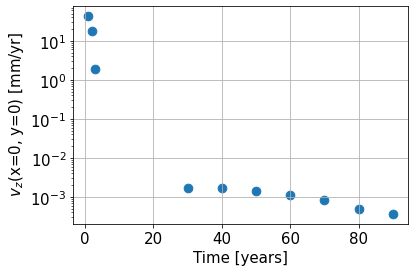

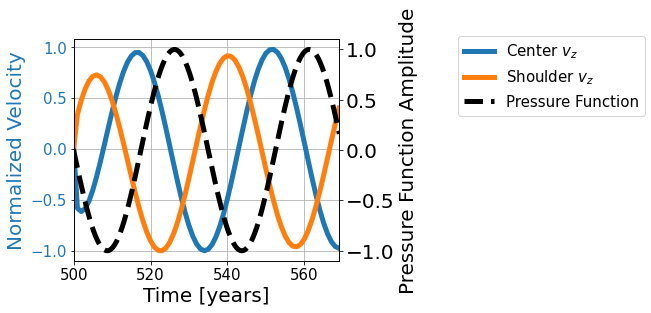

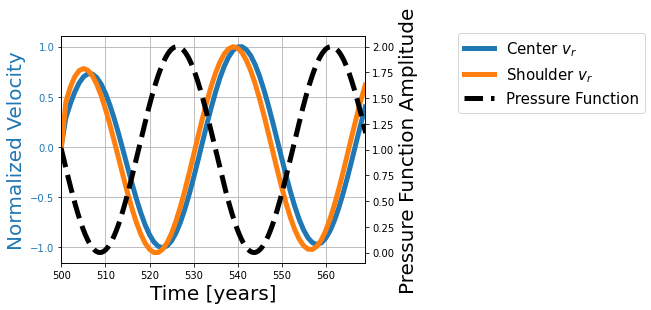

Sombrero at  500
Sombrero at  514
Sombrero at  515
Sombrero at  516
Sombrero at  517
Sombrero at  518
Sombrero at  519
Sombrero at  520
Sombrero at  521
Sombrero at  522
Sombrero at  523
Sombrero at  524
Sombrero at  525
Sombrero at  549
Sombrero at  550
Sombrero at  551
Sombrero at  552
Sombrero at  553
Sombrero at  554
Sombrero at  555
Sombrero at  556
Sombrero at  557
Sombrero at  558
Sombrero at  559
Sombrero at  560
Sombrero Durations =  [0, 11, 11]


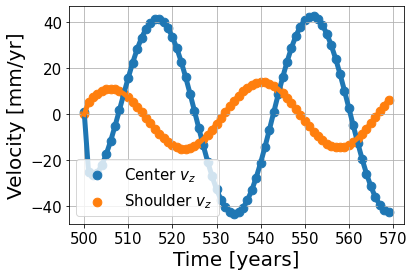

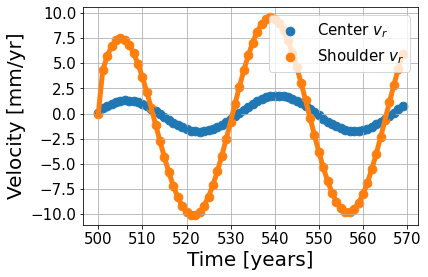

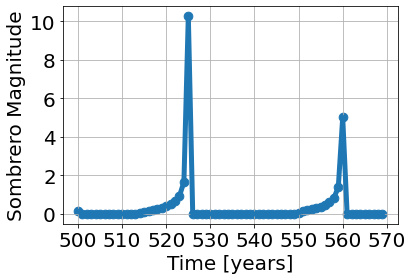

[10.26529648  5.01217226]


/tmp/ipykernel_3664/2683859220.py:834: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/home/grantblock/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Center RMSE: 5.848909139559149 Center R Square: 0.4636158984010119
Shoulder RMSE: 3.9431132380171143 Shoulder R Square: 0.764449410570236
Center Max Vz's 1 and 2: 42.26879089742381 28.55807462027934
Center Delta_V: 35.41343275882258 mm/yr
Center v_in 1.0127273982661051 mm/yr
Shoulder Max Vz's 1 and 2: 13.692268733831453 5.28381941919629
Shoulder Delta_V: 9.488044076516928 mm/yr
Shoulder v_in -0.130396234250093 mm/yr


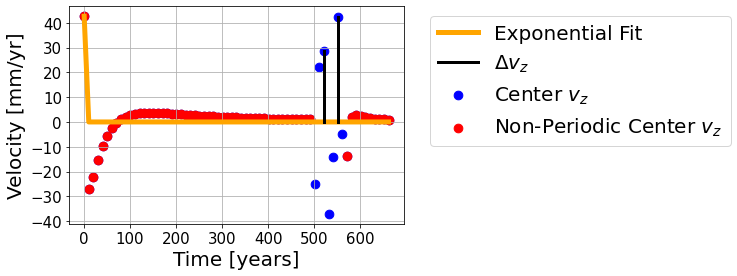

In [169]:
# Write all figures and data to a folder
dt = GPS_Pres11_run4.output_dt
time_steps = np.asarray([1, 2, 3,4 ,5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90])/dt
#find_characteristic_times(GPS_Pres11_run4.run_name, np.rint(time_steps).astype(int), GPS_Pres11_run4.t_r, GPS_Pres11_run4.output_dt, runtime=GPS_Pres11_run4.run_time, save=False, save_data=True, save_directory="GPS_Press11_run4/")

# time_steps = np.arange(GPS_Pres11_run4.spinup_time-50, GPS_Pres11_run4.T*2+GPS_Pres11_run4.spinup_time+50, 1)/dt
# compare_center_shoulder(GPS_Pres11_run4.run_name, np.rint(time_steps).astype(int), GPS_Pres11_run4.t_r, dt, 40e3, T=GPS_Pres11_run4.T, equil_time=GPS_Pres11_run4.spinup_time, theta=0.0, runtime=GPS_Pres11_run4.run_time, check_somb=False, save=False, save_data=True, save_directory="GPS_Press11_run4/")
# time_steps = np.arange(660, 700, 1)/dt
# compare_center_shoulder(GPS_Pres11_run4.run_name, np.rint(time_steps).astype(int), GPS_Pres11_run4.t_r, dt, 40e3, theta=0.0, runtime=GPS_Pres11_run4.run_time, check_somb=False, save=False, save_data=True, save_directory="GPS_Press11_run4/")

# periodic_window_bounds = (GPS_Pres11_run4.spinup_time, GPS_Pres11_run4.T*2+GPS_Pres11_run4.spinup_time)
# time_steps = np.arange(1, GPS_Pres11_run4.run_time, 10)/dt
# get_delta_V(GPS_Pres11_run4.run_name, np.rint(time_steps).astype(int), GPS_Pres11_run4.t_r, dt, 40e3, periodic_window_bounds, GPS_Pres11_run4.T, plot=False, theta=0.0, runtime=GPS_Pres11_run4.run_time, save=False, save_data=True, save_directory="GPS_Press11_run4/")

run_list = [GPS_Pres4, GPS_Pres5, GPS_Pres6, GPS_Pres7, GPS_Pres8, GPS_Pres11, GPS_Pres11_run4, GPS_Pres11_run5,GPS_Pres11_run6, GPS_Pres12, 
            GPS_Pres13, GPS_Pres14, GPS_Pres15, GPS_Pres17, GPS_Pres18, GPS_Pres19, GPS_Pres19_run2, GPS_Pres24, GPS_Pres25, GPS_Pres26, GPS_Pres31, GPS_Pres31_run2, GPS_Pres32_run2,
            GPS_Pres33, GPS_Pres34, GPS_Pres34_run2, GPS_Pres35, GPS_Pres36, GPS_Pres36_run2, GPS_Pres37, GPS_Pres37_run2, GPS_Pres38, GPS_Pres39, GPS_Pres40, GPS_Pres41, 
            Sawtooth_Pres1, GPS_Pres42, GPS_Pres47, GPS_Pres48]

run_names = ["GPS_Pres4", "GPS_Pres5", "GPS_Pres6", "GPS_Pres7", "GPS_Pres8", "GPS_Pres11", "GPS_Pres11_run4", "GPS_Pres11_run5","GPS_Pres11_run6", "GPS_Pres12", 
            "GPS_Pres13", "GPS_Pres14", "GPS_Pres15", "GPS_Pres17", "GPS_Pres18", "GPS_Pres19", "GPS_Pres19_run2", "GPS_Pres24", "GPS_Pres25", "GPS_Pres26", "GPS_Pres31", 
             "GPS_Pres31_run2", "GPS_Pres32_run2", "GPS_Pres33", "GPS_Pres34", "GPS_Pres34_run2", "GPS_Pres35", "GPS_Pres36", "GPS_Pres36_run2", "GPS_Pres37", "GPS_Pres37_run2", 
             "GPS_Pres38", "GPS_Pres39", "GPS_Pres40", "GPS_Pres41", "Sawtooth_Pres1", "GPS_Pres42", "GPS_Pres47", "GPS_Pres48"]

run_list=[GPS_Pres111_run2]
run_names = ["GPS_Pres111_run2"]

for i in range(len(run_list)):
    current_run = run_list[i]
    current_name = run_names[i]
    print(current_name)
    dt = current_run.output_dt
    
    time_steps = np.asarray([1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90])
    t_c = find_characteristic_times(current_run.run_name, time_steps, current_run.t_r, current_run.output_dt, runtime=current_run.run_time, spinup=current_run.spinup_time, save=False, 
                              save_data=True, save_directory=current_name+"/")
    
#     if current_run.run_time < 1000:
#         time_steps = np.arange(current_run.spinup_time-50, current_run.T*current_run.cycles+current_run.spinup_time+50, 1)
#     else:
#         time_steps = np.arange(current_run.spinup_time-50, current_run.T*current_run.cycles+current_run.spinup_time+50, 10)
    
    time_steps = np.arange(500, 570, 1)

    if current_run.sawtooth:
        compare_center_shoulder(current_run.run_name, np.rint(time_steps).astype(int), current_run.t_r, dt, 40e3, T=current_run.T, cycles=current_run.cycles, sawtooth=True, equil_time=current_run.spinup_time, theta=0.0, 
                            runtime=current_run.run_time, check_somb=False, save=False, save_data=True, save_directory=current_name+"/")
    elif current_run.inverse_st:
        compare_center_shoulder(current_run.run_name, np.rint(time_steps).astype(int), current_run.t_r, dt, 40e3, T=current_run.T, cycles=current_run.cycles, sawtooth=True, T_inc_percent=.75, T_dec_percent=.25, equil_time=current_run.spinup_time, theta=0.0, 
                            runtime=current_run.run_time, check_somb=False, save=False, save_data=True, save_directory=current_name+"/")
    
    else:
        #time_steps = np.arange(500/dt[0], 500/1.5+1000/dt[1], 1/dt[1])
        compare_center_shoulder(current_run.run_name, time_steps, current_run.t_r, dt, 40e3, T=current_run.T, cycles=current_run.cycles, equil_time=current_run.spinup_time, theta=0.0, 
                            runtime=current_run.run_time, check_somb=False, dashed=False, save=False, save_data=True, save_directory=current_name+"/")
        
    #for zoomed
    #time_steps = np.arange(150, 1150, 1)/dt
    #time_steps = np.arange(500/dt[0], 500/1.5+1000/dt[1], 1/dt[1])
    compare_center_shoulder(current_run.run_name, time_steps, current_run.t_r, dt, 40e3, equil_time=current_run.spinup_time, theta=0.0, 
                            runtime=current_run.run_time, check_somb=True, save=False, save_data=True, save_directory=current_name+"/")
    
    #for zoomed
    #time_steps=np.arange(current_run.spinup_time, current_run.T+current_run.spinup_time, 0.1)/dt
    somb_mag =  get_somb_magnitude(current_run.run_name, time_steps.astype(int), current_run.t_r, dt, 40e3 ,plot=True, spinup = current_run.spinup_time,theta=0.0, runtime=current_run.run_time, zoom=True, save_data=True, save_directory=current_name+"/")
    print(somb_mag)
    
    periodic_window_bounds = (current_run.spinup_time, current_run.T*current_run.cycles+current_run.spinup_time)
    #if current_run.run_time < 5000:   
    time_steps = np.arange(1, current_run.run_time, 10)
    # else:
    #      time_steps = np.arange(1, current_run.run_time, 10)/dt
    delta_v_center, v_in_center, delta_v_shoulder, v_in_shoulder, vz_center_init, vz_shoulder_init = get_delta_V(current_run.run_name, time_steps, 
                                                                                                                  current_run.t_r, dt, 40e3, periodic_window_bounds, 
                                                                                                                  current_run.T, plot=False, spinup = current_run.spinup_time, theta=0.0, runtime=current_run.run_time, 
                                                                                                                  save=False, exp=True, save_data=True, save_directory=current_name+"/")
    # #write run info file
    #run_name, P0, delta_P, T, t_c, t_r, t_som, run_time, spinup_time, output_dt)
    directory = "/home/grantblock/Research/SMBPylith/RunData/"+current_name+"/run_info.txt"
    f = open(directory, "a")
    f.write("Name: " + current_name + "\n")
    f.write("Directory: " + current_run.run_name + "\n")
    f.write("P0: " + str(current_run.P0/1e6) + " MPa\n")
    f.write("Delta P: " + str(current_run.delta_P/1e6) + " MPa\n")
    f.write("T: " + str(current_run.T) + " yrs\n")
    f.write("Delta P/T_rise: " + str(current_run.delta_P/(4*1e3*current_run.T)) + " KPa/yr\n")
    f.write("Characteristic time: " + str(t_c) + " yrs\n")
    f.write("CR Relax time: " + str(current_run.t_r) + " yrs\n")
    f.write("Sombreo Duration: yrs\n")
    f.write("Run Time: " + str(current_run.run_time) + " yrs\n")
    f.write("Spinup Time: " + str(current_run.spinup_time) + " yrs\n")
    f.write("Output dt: " + str(current_run.output_dt) + " yrs\n")
    f.write("Delta V: " + str(delta_v_center) + " mm/yr\n")
    f.write("Sombrero Magnitude: "+ str(current_run.som_mag[0]) + "\n")
    f.close()
    

In [ ]:
#Make delta v/v_in vs. (dP/dt)' plot

shoulder = 40e3 #where we set shoulder distance


#get delta_V data
run_list = [GPS_Pres4, GPS_Pres5, GPS_Pres6, GPS_Pres7, GPS_Pres8, GPS_Pres11, GPS_Pres11_run4, GPS_Pres11_run5,GPS_Pres11_run6, GPS_Pres12, 
            GPS_Pres13, GPS_Pres14, GPS_Pres15, GPS_Pres17, GPS_Pres18, GPS_Pres19, GPS_Pres19_run2, GPS_Pres24, GPS_Pres25, GPS_Pres26, GPS_Pres31, GPS_Pres31_run2, GPS_Pres32_run2,
            GPS_Pres33, GPS_Pres34, GPS_Pres34_run2, GPS_Pres35, GPS_Pres36, GPS_Pres36_run2, GPS_Pres37, GPS_Pres37_run2, GPS_Pres39, GPS_Pres40, GPS_Pres41, GPS_Pres42,
            GPS_Pres42_run3, GPS_Pres47, GPS_Pres47_run2, GPS_Pres48, GPS_Pres48_run2, GPS_Pres49, GPS_Pres49_run2, GPS_Pres50, GPS_Pres50_run2, GPS_Pres51, GPS_Pres51_run2,
            GPS_Pres52, GPS_Pres52_run2, GPS_Pres56, GPS_Pres57]

delta_v_list = []

for current_run in run_list:
    print(current_run.run_name)
    if current_run.run_time < 1000:
        time_steps = np.arange(1, current_run.run_time-10, 1)/current_run.output_dt
    else:
        time_steps = np.arange(1, current_run.run_time-10, 10)/current_run.output_dt
    if current_run.run_name == GPS_Pres33.run_name:
        time_steps = np.arange(1, current_run.run_time, 10)/current_run.output_dt
        
        
    periodic_window_bounds = (current_run.spinup_time, current_run.T*2+current_run.spinup_time)
    
    delta_v_center, v_in_center, delta_v_shoulder, v_in_shoulder, vz_center_init, vz_shoulder_init = get_delta_V(current_run.run_name, np.rint(time_steps).astype(int), 
                                                                           current_run.t_r, current_run.output_dt, shoulder, periodic_window_bounds, current_run.T,
                                                                           plot=False, plot_title_name=None, theta=0.0, runtime=current_run.run_time, save=False, output=False)
    
    delta_v_list.append((delta_v_center, v_in_center, delta_v_shoulder, v_in_shoulder, vz_center_init, vz_shoulder_init))
    
   

50
TimeDependentPressure/GPS_Pres4/250KPa 1.669009269731093 25.0
TimeDependentPressure/GPS_Pres5/250KPa 1.0273506675874848 12.5
TimeDependentPressure/GPS_Pres6/250KPa 11.971591297743846 25.0
TimeDependentPressure/GPS_Pres7/250KPa 0.7098391955352981 6.25
TimeDependentPressure/GPS_Pres8/250KPa 3.498642198521635 6.25
TimeDependentPressure/GPS_Pres11/250KPa 0.21658290451362797 0.25
TimeDependentPressure/GPS_Pres11/1MPa/long_spinup 0.2113528299994538 1.0
TimeDependentPressure/GPS_Pres11/1MPa/long_spinup 0.5390218365759121 1.0
TimeDependentPressure/GPS_Pres11/250KPa/long_spinup 0.557609857823171 0.25
TimeDependentPressure/GPS_Pres12/250KPa 0.8119230974301653 8.333333333333334
TimeDependentPressure/GPS_Pres13/250KPa 0.6247242264247949 4.166666666666667
TimeDependentPressure/GPS_Pres14/250KPa 4.667310486251551 8.333333333333334
TimeDependentPressure/GPS_Pres15/250KPa 2.413508366341143 4.166666666666667
TimeDependentPressure/GPS_Pres17/250KPa 2.8565054799771907 5.0
TimeDependentPressure/GPS_Pre

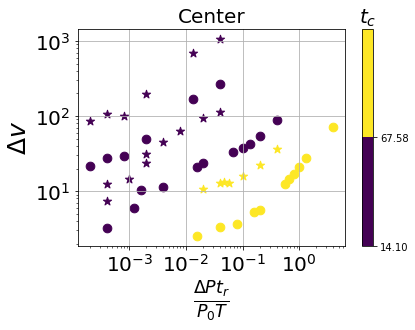

TimeDependentPressure/GPS_Pres4/250KPa 7.357746897337947 25.0
TimeDependentPressure/GPS_Pres5/250KPa 4.3834667841818735 12.5
TimeDependentPressure/GPS_Pres6/250KPa 47.52402985909391 25.0
TimeDependentPressure/GPS_Pres7/250KPa 2.1458029749271907 6.25
TimeDependentPressure/GPS_Pres8/250KPa 14.182502691157566 6.25
TimeDependentPressure/GPS_Pres11/250KPa 0.915207313319226 0.25
TimeDependentPressure/GPS_Pres11/1MPa/long_spinup 1.2029056393097035 1.0
TimeDependentPressure/GPS_Pres11/1MPa/long_spinup 0.27471234239340625 1.0
TimeDependentPressure/GPS_Pres11/250KPa/long_spinup 0.5835420965365272 0.25
TimeDependentPressure/GPS_Pres12/250KPa 2.916384129101445 8.333333333333334
TimeDependentPressure/GPS_Pres13/250KPa 1.2609470676505934 4.166666666666667
TimeDependentPressure/GPS_Pres14/250KPa 18.62433627399474 8.333333333333334
TimeDependentPressure/GPS_Pres15/250KPa 9.70001953038259 4.166666666666667
TimeDependentPressure/GPS_Pres17/250KPa 11.392469364943286 5.0
TimeDependentPressure/GPS_Pres18/2

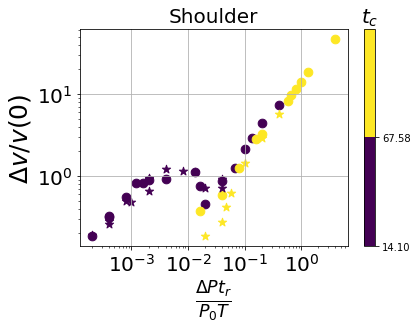

TimeDependentPressure/GPS_Pres4/250KPa 1.669009269731093 0.1 14.099 250000.0
TimeDependentPressure/GPS_Pres5/250KPa 1.0273506675874848 0.5 14.099 250000.0
TimeDependentPressure/GPS_Pres6/250KPa 11.971591297743846 0 67.576 250000.0
TimeDependentPressure/GPS_Pres7/250KPa 0.7098391955352981 1.7 14.099 250000.0
TimeDependentPressure/GPS_Pres8/250KPa 3.498642198521635 0.6 67.576 250000.0
TimeDependentPressure/GPS_Pres11/250KPa 0.21658290451362797 37 14.099 250000.0
TimeDependentPressure/GPS_Pres11/1MPa/long_spinup 0.2113528299994538 36 14.099 1000000.0
TimeDependentPressure/GPS_Pres11/1MPa/long_spinup 0.5390218365759121 0 67.576 1000000.0
TimeDependentPressure/GPS_Pres11/250KPa/long_spinup 0.557609857823171 0 67.576 250000.0
TimeDependentPressure/GPS_Pres12/250KPa 0.8119230974301653 1.2 14.099 250000.0
TimeDependentPressure/GPS_Pres13/250KPa 0.6247242264247949 2.5 14.099 250000.0
TimeDependentPressure/GPS_Pres14/250KPa 4.667310486251551 0.3 67.576 250000.0
TimeDependentPressure/GPS_Pres15/2

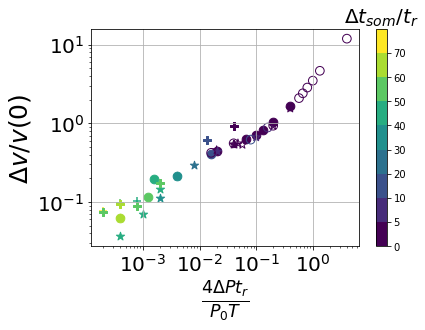

TimeDependentPressure/GPS_Pres4/250KPa 1.669009269731093 0.1 14.099 250000.0
TimeDependentPressure/GPS_Pres5/250KPa 1.0273506675874848 0.5 14.099 250000.0
TimeDependentPressure/GPS_Pres6/250KPa 11.971591297743846 0 67.576 250000.0
TimeDependentPressure/GPS_Pres7/250KPa 0.7098391955352981 1.7 14.099 250000.0
TimeDependentPressure/GPS_Pres8/250KPa 3.498642198521635 0.6 67.576 250000.0
TimeDependentPressure/GPS_Pres11/250KPa 0.21658290451362797 37 14.099 250000.0
TimeDependentPressure/GPS_Pres11/1MPa/long_spinup 0.2113528299994538 36 14.099 1000000.0
TimeDependentPressure/GPS_Pres11/1MPa/long_spinup 0.5390218365759121 0 67.576 1000000.0
TimeDependentPressure/GPS_Pres11/250KPa/long_spinup 0.557609857823171 0 67.576 250000.0
TimeDependentPressure/GPS_Pres12/250KPa 0.8119230974301653 1.2 14.099 250000.0
TimeDependentPressure/GPS_Pres13/250KPa 0.6247242264247949 2.5 14.099 250000.0
TimeDependentPressure/GPS_Pres14/250KPa 4.667310486251551 0.3 67.576 250000.0
TimeDependentPressure/GPS_Pres15/2

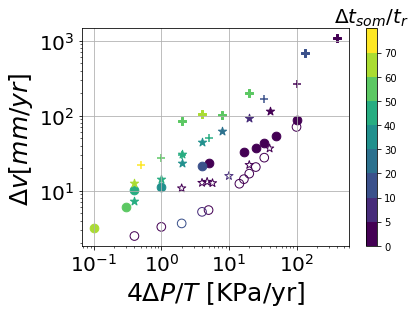

In [199]:


#Make plots from data generated above

#set up center plot
lw = 4
ms = 75
label_fontsize=25
axes_fontsize=25
title_fontsize=20

plt.grid()
plt.ylabel(r"$\Delta v $", fontsize=label_fontsize)
plt.xlabel(r"$\frac{\Delta P t_r}{ P_0 T }$", fontsize=label_fontsize)
#plt.xlabel(r"$\Delta P/T$ [KPa/yr]", fontsize=label_fontsize)
plt.title("Center", fontsize=title_fontsize)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

cmap = plt.cm.viridis  # define the colormap
 # extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
# bounds = np.asarray([0, 1e-4, 1e-3, 1e-2, 1e-1, 1])
bounds = np.asarray([TC_50_14_1, TC_50_14_10])
norm = matplotlib.colors.BoundaryNorm(np.append(bounds, 10000), cmap.N)

print(len(run_list))

for i in range(len(run_list)):
    
    (delta_v_center, v_in_center, delta_v_shoulder, v_in_shoulder, vz_center_init, vz_shoulder_init) = delta_v_list[i]
    current_run = run_list[i] 
    
    if current_run.P0 == 1e6:
        plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), delta_v_center, c=current_run.t_c, cmap=cmap, norm=norm , s=ms, marker="*")
    else:    
        plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), delta_v_center, c=current_run.t_c, cmap=cmap, norm=norm , s=ms)
    print(current_run.run_name, str(delta_v_center/vz_center_init), str(current_run.delta_P/(current_run.T*1e3)))


        
#plt.axhline(y=1, linewidth=3, linestyle = 'dashed')
cbar = plt.colorbar(ticks=bounds)
cbar.ax.set_title(r'$t_c$', fontsize=20)
plt.show()

#Repeat the same for the shoulder plot
plt.grid()
plt.ylabel(r"$\Delta v/v(0)$ ", fontsize=label_fontsize)
#plt.xlabel(r"$\Delta P/T$ [KPa/yr]", fontsize=label_fontsize)
plt.xlabel(r"$\frac{\Delta P t_r}{ P_0 T }$", fontsize=label_fontsize)
plt.title("Shoulder", fontsize=title_fontsize)
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

for i in range(len(run_list)):
    
    (delta_v_center, v_in_center, delta_v_shoulder, v_in_shoulder, vz_center_init, vz_shoulder_init) = delta_v_list[i]
    current_run = run_list[i] 
    
    if current_run.P0 == 1e6:
        plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), delta_v_shoulder/vz_shoulder_init, c=current_run.t_c, cmap=cmap, norm=norm , s=ms, marker="*")
    else:    
        plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), delta_v_shoulder/vz_shoulder_init, c=current_run.t_c, cmap=cmap, norm=norm , s=ms)
    print(current_run.run_name, str(delta_v_shoulder/vz_shoulder_init), str(current_run.delta_P/(current_run.T*1e3)))

        
#plt.axhline(y=1, linewidth=3, linestyle = 'dashed')
cbar = plt.colorbar(ticks=bounds)
cbar.ax.set_title(r'$t_c$', fontsize=20)
plt.show()

#Make phase diagram
bounds = np.asarray([0, 5, 10, 20, 30, 40, 50, 60, 70])
norm = matplotlib.colors.BoundaryNorm(np.append(bounds, 10000), cmap.N)

plt.grid()
plt.ylabel(r"$\Delta v/v(0)$ ", fontsize=label_fontsize)
#plt.xlabel(r"$\Delta P/T$ [KPa/yr]", fontsize=label_fontsize)
plt.xlabel(r"$\frac{4\Delta P t_r}{ P_0 T }$", fontsize=label_fontsize)
#plt.title("Phase diagram", fontsize=title_fontsize)
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#write to file
out_file = open("DeltaV.txt", "a")
out_file.write("P_0,Delta_P,t_r,P_rate,non_dim_P_rate,delta_v, non_dim_delta_v\n")

for i in range(len(run_list)):
    (delta_v_center, v_in_center, delta_v_shoulder, v_in_shoulder, vz_center_init, vz_shoulder_init) = delta_v_list[i]
    current_run = run_list[i] 
    print(current_run.run_name, str(delta_v_center/vz_center_init), str(current_run.t_som), str(current_run.t_c), str(current_run.P0))
    out_file.write(str(current_run.P0)+","+str(current_run.delta_P)+","+str(current_run.t_r)+","+str((4*current_run.delta_P/(current_run.T*1e3)))+","
                   +str(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0))+","+str(delta_v_center)+","+str(delta_v_center/vz_center_init)+"\n")
    
    if current_run.t_r == 1:
        if current_run.P0 == 250e3:
            plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), delta_v_center/vz_center_init , c=current_run.t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms)
            
        elif current_run.P0 == 1e6:
            plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), delta_v_center/vz_center_init, c=current_run.t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms, marker="*") 
            
    elif current_run.t_r == 10:
        if current_run.P0 == 250e3:
            g = plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), delta_v_center/vz_center_init , c=current_run.t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms)
            g.set_edgecolors(g.to_rgba(current_run.t_som))
            g.set_facecolors("none")
        elif current_run.P0 == 1e6:
            g = plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), delta_v_center/vz_center_init , c=current_run.t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms, marker="*")
            g.set_edgecolors(g.to_rgba(current_run.t_som))
            g.set_facecolors("none")
            
    elif current_run.t_r == 0.1:
        if current_run.P0 == 250e3:
            if e:
                plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), delta_v_center/vz_center_init , c=current_run.t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms, marker="+", label=r"$P_0$=250 KPa, $t_r$=0.1 yr")
                e = False
            else:
                plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), delta_v_center/vz_center_init , c=current_run.t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms, marker="+")
                 
        elif current_run.P0 == 1e6:
            if f:
                plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), delta_v_center/vz_center_init , c=current_run.t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms, marker="P", label=r"$P_0$=1 MPa, $t_r$=0.1 yr")
                f = False
            else:
                plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), delta_v_center/vz_center_init , c=current_run.t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms, marker="P")
                     
        
cbar = plt.colorbar(ticks=bounds)
cbar.ax.set_title(r'$\Delta t_{som}/t_r$', fontsize=20)
file_name = "/home/grantblock/Research/SMBPylith/Figures/PhaseDiagram_dimensionless.png"
plt.savefig(file_name, bbox_inches="tight")    
plt.show()
out_file.close()

#make dimensional version
plt.grid()
plt.ylabel(r"$\Delta v [mm/yr]$ ", fontsize=label_fontsize)
#plt.xlabel(r"$\Delta P/T$ [KPa/yr]", fontsize=label_fontsize)
plt.xlabel(r"$4\Delta P/T$ [KPa/yr]", fontsize=label_fontsize)
#plt.title("Phase diagram", fontsize=title_fontsize)
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

for i in range(len(run_list)):
    (delta_v_center, v_in_center, delta_v_shoulder, v_in_shoulder, vz_center_init, vz_shoulder_init) = delta_v_list[i]
    current_run = run_list[i] 
    print(current_run.run_name, str(delta_v_center/vz_center_init), str(current_run.t_som), str(current_run.t_c), str(current_run.P0))
    
    if current_run.t_r == 1:
        if current_run.P0 == 250e3:
            plt.scatter((4*current_run.delta_P/(current_run.T*1e3)), delta_v_center , c=current_run.t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms)
            
        elif current_run.P0 == 1e6:
            plt.scatter((4*current_run.delta_P/(current_run.T*1e3)), delta_v_center, c=current_run.t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms, marker="*") 
            
    elif current_run.t_r == 10:
        if current_run.P0 == 250e3:
            g = plt.scatter((4*current_run.delta_P/(current_run.T*1e3)), delta_v_center , c=current_run.t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms)
            g.set_edgecolors(g.to_rgba(current_run.t_som))
            g.set_facecolors("none")
        elif current_run.P0 == 1e6:
            g = plt.scatter((4*current_run.delta_P/(current_run.T*1e3)), delta_v_center , c=current_run.t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms, marker="*")
            g.set_edgecolors(g.to_rgba(current_run.t_som))
            g.set_facecolors("none")
            
    elif current_run.t_r == 0.1:
        if current_run.P0 == 250e3:
            if e:
                plt.scatter((4*current_run.delta_P/(current_run.T*1e3)), delta_v_center, c=current_run.t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms, marker="+", label=r"$P_0$=250 KPa, $t_r$=0.1 yr")
                e = False
            else:
                plt.scatter((4*current_run.delta_P/(current_run.T*1e3)), delta_v_center, c=current_run.t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms, marker="+")
                 
        elif current_run.P0 == 1e6:
            if f:
                plt.scatter((4*current_run.delta_P/(current_run.T*1e3)), delta_v_center, c=current_run.t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms, marker="P", label=r"$P_0$=1 MPa, $t_r$=0.1 yr")
                f = False
            else:
                plt.scatter((4*current_run.delta_P/(current_run.T*1e3)), delta_v_center, c=current_run.t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms, marker="P")
                     
        
cbar = plt.colorbar(ticks=bounds)
cbar.ax.set_title(r'$\Delta t_{som}/t_r$', fontsize=20)
file_name = "/home/grantblock/Research/SMBPylith/Figures/PhaseDiagram.png"
plt.savefig(file_name, bbox_inches="tight")    
plt.show()


ValueError: x and y must be the same size

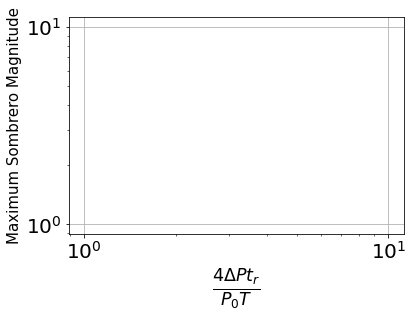

In [112]:
#make same plot as above but for sombrero magnitude vs. pressrue rate
run_list = [GPS_Pres4, GPS_Pres5, GPS_Pres6, GPS_Pres7, GPS_Pres8, GPS_Pres11, GPS_Pres11_run4, GPS_Pres11_run5,GPS_Pres11_run6, GPS_Pres12, 
            GPS_Pres13, GPS_Pres14, GPS_Pres15, GPS_Pres17, GPS_Pres18, GPS_Pres19, GPS_Pres19_run2, GPS_Pres24, GPS_Pres25, GPS_Pres26, GPS_Pres31, GPS_Pres31_run2, GPS_Pres32_run2,
            GPS_Pres33, GPS_Pres34, GPS_Pres34_run2, GPS_Pres35, GPS_Pres36, GPS_Pres36_run2, GPS_Pres37, GPS_Pres37_run2, GPS_Pres39, GPS_Pres40, GPS_Pres41, GPS_Pres42,
            GPS_Pres42_run3, GPS_Pres47, GPS_Pres47_run2, GPS_Pres48, GPS_Pres48_run2, GPS_Pres49, GPS_Pres49_run2, GPS_Pres50, GPS_Pres50_run2, GPS_Pres51, GPS_Pres51_run2,
            GPS_Pres52, GPS_Pres52_run2, GPS_Pres56, GPS_Pres57]

#make plot
lw = 4
ms = 75
label_fontsize=25
axes_fontsize=25
title_fontsize=20

cmap = plt.cm.viridis  # define the colormap
 # extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

bounds = np.asarray([0, 5, 10, 20, 30, 40, 50, 60, 70])
norm = matplotlib.colors.BoundaryNorm(np.append(bounds, 10000), cmap.N)

plt.grid()
plt.ylabel(r"Maximum Sombrero Magnitude", fontsize=15)
plt.xlabel(r"$\frac{4\Delta P t_r}{ P_0 T }$", fontsize=label_fontsize)
#plt.title("Phase diagram", fontsize=title_fontsize)
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

a = True
b = True
c = True
d = True
e = True
f = True

for i in range(len(run_list)):
    current_run = run_list[i]
    if current_run.t_r == 1:
        if current_run.P0 == 250e3:
            plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), current_run.som_mag, c=current_run.t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms)
            
        elif current_run.P0 == 1e6:
            plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), current_run.som_mag, c=current_run.t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms, marker="*") 
            
    elif current_run.t_r == 10:
        if current_run.P0 == 250e3:
            g = plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), current_run.som_mag, c=current_run.t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms)
            g.set_edgecolors(g.to_rgba(current_run.t_som))
            g.set_facecolors("none")
        elif current_run.P0 == 1e6:
            g = plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), current_run.som_mag, c=current_run.t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms, marker="*")
            g.set_edgecolors(g.to_rgba(current_run.t_som))
            g.set_facecolors("none")
            
    elif current_run.t_r == 0.1:
        if current_run.P0 == 250e3:
            if e:
                plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), current_run.som_mag, c=current_run.t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms, marker="+", label=r"$P_0$=250 KPa, $t_r$=0.1 yr")
                e = False
            else:
                plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), current_run.som_mag, c=current_run.t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms, marker="+")
                 
        elif current_run.P0 == 1e6:
            if f:
                plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), current_run.som_mag, c=current_run.t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms, marker="P", label=r"$P_0$=1 MPa, $t_r$=0.1 yr")
                f = False
            else:
                plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), current_run.som_mag, c=current_run.t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms, marker="P")
                
        
        
cbar = plt.colorbar(ticks=bounds)
cbar.ax.set_title(r'$\Delta t_{som}/t_r$', fontsize=20)
file_name = "/home/grantblock/Research/SMBPylith/Figures/PhaseDiagram_SomMag.png"
plt.savefig(file_name, bbox_inches="tight")    
plt.show()

TimeDependentPressure/GPS_Pres56/1MPa 1000000.0 100000.0 1
TimeDependentPressure/GPS_Pres57/1MPa 1000000.0 250000.0 1
TimeDependentPressure/GPS_Pres101/1MPa 1000000.0 250000.0 10


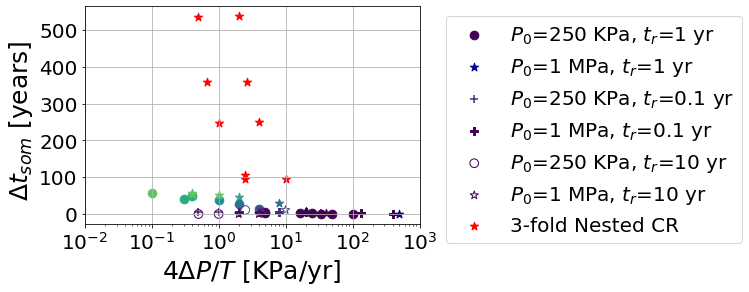

38.7136


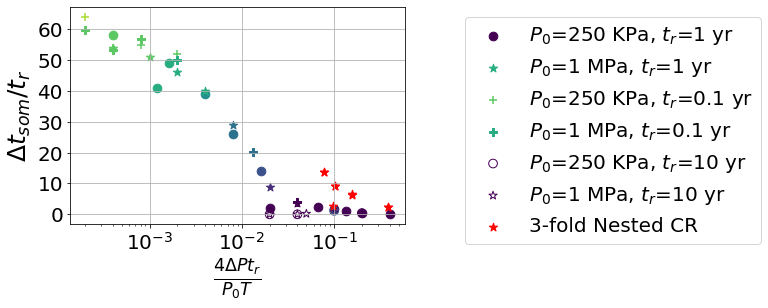

In [181]:
#Plot sombrero durations vs. Pressure Rate (new way)
#set up plot
lw = 4
ms = 75
label_fontsize=25
axes_fontsize=25
title_fontsize=20

plt.grid()
plt.ylabel(r"$\Delta t_{som}$ [years]  ", fontsize=label_fontsize)
plt.xlabel(r"$4\Delta P/T$ [KPa/yr]", fontsize=label_fontsize)
plt.xscale('log')
# plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

cmap = plt.cm.viridis  # define the colormap
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

bounds = np.asarray([0, 5, 10, 20, 30, 40, 50, 60, 70])
norm = matplotlib.colors.BoundaryNorm(np.append(bounds, 10000), cmap.N)

run_list_durations = [GPS_Pres4, GPS_Pres5, GPS_Pres6, GPS_Pres7, GPS_Pres8, GPS_Pres11, GPS_Pres11_run4, GPS_Pres11_run5, GPS_Pres11_run6, GPS_Pres12, 
                      GPS_Pres13, GPS_Pres14, GPS_Pres15, GPS_Pres17, GPS_Pres18, GPS_Pres19, GPS_Pres19_run2, GPS_Pres24, GPS_Pres25, GPS_Pres31, GPS_Pres31_run2, GPS_Pres32, GPS_Pres32_run2,
                      GPS_Pres33, GPS_Pres34, GPS_Pres34_run2, GPS_Pres35, GPS_Pres36, GPS_Pres36_run2, GPS_Pres37, GPS_Pres37_run2, GPS_Pres39, GPS_Pres40, GPS_Pres41,
                      GPS_Pres42,GPS_Pres42_run3, GPS_Pres47, GPS_Pres47_run2, GPS_Pres48, GPS_Pres48_run2, GPS_Pres49, GPS_Pres49_run2, GPS_Pres50, GPS_Pres50_run2, GPS_Pres51,
                      GPS_Pres51_run2, GPS_Pres52, GPS_Pres52_run2, GPS_Pres56, GPS_Pres57, GPS_Pres97, GPS_Pres97_run2, GPS_Pres98, GPS_Pres98_run2, GPS_Pres99, GPS_Pres99_run2,
                      GPS_Pres100, GPS_Pres100_run2, GPS_Pres101]
a = True
b = True
c = True
d = True
e = True
f = True

plt.xlim([0.01, 1000])

#write this stuff out to a file
out_file = open("SombDurations_unif.txt", "a")
out_file.write("P_0,Delta_P,t_r,P_rate,non_dim_P_rate,t_som,non_dim_t_som,spinup\n")

for current_run in run_list_durations:
    if current_run.t_som_list != None and len(current_run.t_som_list) >= 2:
        t_som = current_run.t_som_list[1]
    else:
        t_som = current_run.t_som
    phase_lag = (360*t_som)/current_run.T

    #write to file
    out_file.write(str(current_run.P0)+","+str(current_run.delta_P)+","+str(current_run.t_r)+","+str((4*current_run.delta_P/(current_run.T*1e3)))+","
                   +str(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0))+","+str(t_som)+","+str(t_som/current_run.t_r)+
                   ","+str(current_run.spinup_time)+"\n")
    if current_run.t_r == 1:
        if current_run.P0 == 250e3:
            if a:
                plt.scatter((4*current_run.delta_P/(current_run.T*1e3)), t_som, c=t_som, cmap=cmap, norm=norm, s=ms, label=r"$P_0$=250 KPa, $t_r$=1 yr")
                a = False
            else:
                plt.scatter((4*current_run.delta_P/(current_run.T*1e3)), t_som, c=t_som, cmap=cmap, norm=norm, s=ms)
        
        elif current_run.P0 == 1e6:
            if b:
                #plt.scatter((current_run.delta_P/(current_run.T*1e3)), current_run.t_som, c=current_run.t_som, cmap=cmap, norm=norm, marker="*", s=ms, label=r"$P_0$=1 MPa, $t_r$=1 yr")
                plt.scatter(500, 0, c='darkblue', cmap=cmap, norm=norm, marker="*", s=ms, label=r"$P_0$=1 MPa, $t_r$=1 yr")     
                b = False
            else: 
                plt.scatter((4*current_run.delta_P/(current_run.T*1e3)), t_som, c=t_som, cmap=cmap, norm=norm, marker="*", s=ms)
            
    elif current_run.t_r == 10 and current_run.spinup_time == 1000:
        if current_run.P0 == 250e3:
            #print(str(current_run.t_som), cmap(current_run.t_som))
            if c:
                g = plt.scatter((4*current_run.delta_P/(current_run.T*1e3)), t_som, c=t_som, cmap=cmap, norm=norm, s=ms, label=r"$P_0$=250 KPa, $t_r$=10 yr")  
                g.set_edgecolors(g.to_rgba(current_run.t_som))
                g.set_facecolors("none")
                c = False
            else:
                g = plt.scatter((4*current_run.delta_P/(current_run.T*1e3)), t_som, c=t_som, cmap=cmap, norm=norm, s=ms)  
                g.set_edgecolors(g.to_rgba(current_run.t_som))
                g.set_facecolors("none")
        elif current_run.P0 == 1e6:
            if d:
                g = plt.scatter((4*current_run.delta_P/(current_run.T*1e3)), t_som, c=t_som, cmap=cmap, norm=norm, marker="*", s=ms, label=r"$P_0$=1 MPa, $t_r$=10 yr")
                g.set_edgecolors(g.to_rgba(current_run.t_som))
                g.set_facecolors("none")
                d = False
            else:    
                g = plt.scatter((4*current_run.delta_P/(current_run.T*1e3)), t_som, c=t_som, cmap=cmap, norm=norm, marker="*", s=ms)
                g.set_edgecolors(g.to_rgba(current_run.t_som))
                g.set_facecolors("none")
                
    elif current_run.t_r == 0.1:
        if current_run.P0 == 250e3:
            if e:
                plt.scatter((4*current_run.delta_P/(current_run.T*1e3)), t_som, c=t_som, cmap=cmap, norm=norm, marker="+", s=ms, label=r"$P_0$=250 KPa, $t_r$=0.1 yr")
                e = False
            else:
                plt.scatter((4*current_run.delta_P/(current_run.T*1e3)), t_som, c=t_som, cmap=cmap, norm=norm, marker="+", s=ms)                 
        elif current_run.P0 == 1e6:
            if f:
                plt.scatter((4*current_run.delta_P/(current_run.T*1e3)), t_som, c=t_som, cmap=cmap, norm=norm, marker="P", s=ms, label=r"$P_0$=1 MPa, $t_r$=0.1 yr")
                f = False
            else:
                plt.scatter((4*current_run.delta_P/(current_run.T*1e3)), t_som, c=t_som, cmap=cmap, norm=norm, marker="P", s=ms)
                
                
    if current_run.P0/current_run.delta_P != 2:
        print(current_run.run_name, current_run.P0, current_run.delta_P, current_run.t_r)
        
    #if current_run.t_r == 10 and current_run.P0/1e6 == 1.0:
        #print(str((current_run.delta_P/(current_run.T*1e3))), str(current_run.t_r), str(current_run.P0/1e6))
    # if (current_run.delta_P/current_run.T == GPS_Pres26.delta_P/GPS_Pres26.T) and current_run.t_r==GPS_Pres26.t_r and current_run.P0 == GPS_Pres26.P0:
    #     print(current_run.run_name, current_run.P0, current_run.delta_P, current_run.T)
out_file.close()
out_file = open("SombDurations_nested.txt", "a")
out_file.write("P_0,Delta_P,t_r,P_rate,non_dim_P_rate,t_som,non_dim_t_som,spinup\n")
t_r = (1*32**2 + 10*(40**2-32**2) + 100*(50**2-40**2))/(50**2)

nested_runs = [GPS_Pres64, GPS_Pres64_run2, GPS_Pres69, GPS_Pres85, GPS_Pres85_run2, GPS_Pres86, GPS_Pres86_run2, GPS_Pres87, GPS_Pres87_run2]

first = True
for current_run in nested_runs: 
    if current_run.t_som_list != None and len(current_run.t_som_list) >= 2:
        t_som = current_run.t_som_list[1]
    else:
        t_som = current_run.t_som
    
    if first:
        plt.scatter((4*current_run.delta_P/(current_run.T*1e3)), t_som, color="red", marker="*", s=ms, label="3-fold Nested CR")
        first = False
    else:
        plt.scatter((4*current_run.delta_P/(current_run.T*1e3)), t_som, color="red", marker="*", s=ms)
        
    out_file.write(str(current_run.P0)+","+str(current_run.delta_P)+","+str(t_r)+","+str((4*current_run.delta_P/(current_run.T*1e3)))+","
                       +str(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, t_r, current_run.P0))+","+str(t_som)+","+str(current_run.t_som/t_r)+
                     ","+str(current_run.spinup_time)+"\n")
    
out_file.close()

ax = plt.gca()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=20)
# leg = ax.get_legend()
# leg.legendHandles[2].set_color('darkblue')
# leg.legendHandles[2].set_edgecolor('darkblue')
# leg.legendHandles[2].set_facecolor('darkblue')


# leg.legendHandles[2].set_edgecolor('darkblue')
# leg.legendHandles[2].set_facecolor('darkblue')

# cbar = plt.colorbar(ticks=bounds)
# cbar.ax.set_title(r'$\Delta t_{som}$', fontsize=20)

file_name = "/home/grantblock/Research/SMBPylith/Figures/SombDurations_dimensional.png"
plt.savefig(file_name, bbox_inches="tight")

plt.show()


#repeat the plot above but non-dimensionalize
plt.grid()
plt.ylabel(r"$\Delta t_{som}/t_r$ ", fontsize=label_fontsize)
plt.xlabel(r"$\frac{4\Delta P t_r}{ P_0 T }$", fontsize=label_fontsize)
plt.xscale('log')
# plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

a = True
b = True
c = True
d = True
e = True
f = True
for current_run in run_list_durations:
    if current_run.t_som_list != None and len(current_run.t_som_list) >= 2:
        t_som = current_run.t_som_list[1]
    else:
        t_som = current_run.t_som
    if current_run.t_r == 1:
        if current_run.P0 == 250e3:
            if a:
                plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), t_som/current_run.t_r, c=t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms, label=r"$P_0$=250 KPa, $t_r$=1 yr")
                a = False
            else:
                plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), t_som/current_run.t_r, c=t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms)
        
        elif current_run.P0 == 1e6:
            if b:
                plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), t_som/current_run.t_r, c=t_som/current_run.t_r, cmap=cmap, norm=norm, marker="*", s=ms, label=r"$P_0$=1 MPa, $t_r$=1 yr")
                b = False
            else: 
                plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), t_som/current_run.t_r, c=t_som/current_run.t_r, cmap=cmap, norm=norm, marker="*", s=ms)
            
    elif current_run.t_r == 10 and current_run.spinup_time == 1000:
        if current_run.P0 == 250e3:
            if c:
                g = plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), t_som/current_run.t_r, c=t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms, label=r"$P_0$=250 KPa, $t_r$=10 yr")  
                g.set_edgecolors(g.to_rgba(current_run.t_som))
                g.set_facecolors("none")
                c = False
            else:
                g = plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), t_som/current_run.t_r, c=t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms)  
                g.set_edgecolors(g.to_rgba(current_run.t_som))
                g.set_facecolors("none")
        elif current_run.P0 == 1e6:
            if d:
                g = plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), t_som/current_run.t_r, c=t_som/current_run.t_r, cmap=cmap, norm=norm, marker="*", s=ms, label=r"$P_0$=1 MPa, $t_r$=10 yr")
                g.set_edgecolors(g.to_rgba(current_run.t_som))
                g.set_facecolors("none")
                d = False
            else:    
                g = plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), t_som/current_run.t_r, c=t_som/current_run.t_r, cmap=cmap, norm=norm, marker="*", s=ms)
                g.set_edgecolors(g.to_rgba(current_run.t_som))
                g.set_facecolors("none")
                
    elif current_run.t_r == 0.1:
        if current_run.P0 == 250e3:
            if e:
                plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), t_som/current_run.t_r, c=t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms, marker="+", label=r"$P_0$=250 KPa, $t_r$=0.1 yr")
                e = False
            else:
                plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), t_som/current_run.t_r, c=t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms, marker="+")
                 
        elif current_run.P0 == 1e6:
            if f:
                plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), t_som/current_run.t_r, c=t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms, marker="P", label=r"$P_0$=1 MPa, $t_r$=0.1 yr")
                f = False
            else:
                plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), t_som/current_run.t_r, c=t_som/current_run.t_r, cmap=cmap, norm=norm, s=ms, marker="P")
                
    

t_r = (1*32**2 + 10*(40**2-32**2) + 100*(50**2-40**2))/(50**2) #volume averaged relax time for 50 km cr nested cylinder
print(t_r)

first = True
for current_run in nested_runs:
    if current_run.t_som_list != None and len(current_run.t_som_list) >= 2:
        t_som = current_run.t_som_list[1]
    else:
        t_som = current_run.t_som
        
    if first:
        plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, t_r, current_run.P0), t_som/t_r, color="red", s=ms, marker="*", label="3-fold Nested CR")
        first = False
    else:
        plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, t_r, current_run.P0), t_som/t_r, color="red", s=ms, marker="*")
        
     
                

# cbar = plt.colorbar(ticks=bounds)
# cbar.ax.set_title(r'$\Delta t_{som}$', fontsize=20)
plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left', fontsize=20)
file_name = "/home/grantblock/Research/SMBPylith/Figures/SombDurations_dimensionless.png"
plt.savefig(file_name, bbox_inches="tight")
plt.show()


In [171]:
#write and sort csv files with the information needed for the figures#


run_list_durations = [GPS_Pres4, GPS_Pres5, GPS_Pres6, GPS_Pres7, GPS_Pres8, GPS_Pres11, GPS_Pres11_run4, GPS_Pres11_run5, GPS_Pres11_run6, GPS_Pres12, 
                      GPS_Pres13, GPS_Pres14, GPS_Pres15, GPS_Pres17, GPS_Pres18, GPS_Pres19, GPS_Pres19_run2, GPS_Pres24, GPS_Pres25, GPS_Pres31, GPS_Pres31_run2, GPS_Pres32, GPS_Pres32_run2,
                      GPS_Pres33, GPS_Pres34, GPS_Pres34_run2, GPS_Pres35, GPS_Pres36, GPS_Pres36_run2, GPS_Pres37, GPS_Pres37_run2, GPS_Pres39, GPS_Pres40, GPS_Pres41,
                      GPS_Pres42,GPS_Pres42_run3, GPS_Pres47, GPS_Pres47_run2, GPS_Pres48, GPS_Pres48_run2, GPS_Pres49, GPS_Pres49_run2, GPS_Pres50, GPS_Pres50_run2, GPS_Pres51,
                      GPS_Pres51_run2, GPS_Pres52, GPS_Pres52_run2, GPS_Pres56, GPS_Pres57, GPS_Pres97, GPS_Pres97_run2, GPS_Pres98, GPS_Pres98_run2, GPS_Pres99, GPS_Pres99_run2,
                      GPS_Pres100, GPS_Pres100_run2, GPS_Pres101]


#uniform sombrero durations
out_file = open("SombDurations_unif.txt", "a")
out_file.write("P_0,Delta_P,t_r,P_rate,non_dim_P_rate,t_som,non_dim_t_som,spinup,phase_lag\n")

#Make list of tuples to sort
out_file_list = []

for current_run in run_list_durations:
    if current_run.t_som_list != None and len(current_run.t_som_list) >= 2:
        t_som = current_run.t_som_list[1]
    else:
        t_som = current_run.t_som
    phase_lag = (360*t_som)/current_run.T
    
    out_file_list.append((current_run.P0, current_run.delta_P, current_run.t_r, (4*current_run.delta_P/(current_run.T*1e3)), 
                          get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), t_som, t_som/current_run.t_r, current_run.spinup_time,
                         phase_lag))
    
#sort list
sorted_out_file_list = sorted(out_file_list, key=lambda x: (x[2], x[0], x[1]))

#output to file
for x in sorted_out_file_list:
    out_file.write(str(x[0])+","+str(x[1])+","+str(x[2])+","+str(x[3])+","
            +str(x[4])+","+str(x[5])+","+str(x[6])+
            ","+str(x[7])+","+str(x[8])+"\n")
out_file.close()

#nested sombrero durations
out_file = open("SombDurations_nested.txt", "a")
out_file.write("P_0,Delta_P,t_r,P_rate,non_dim_P_rate,t_som,non_dim_t_som,spinup,phase_lag\n")
t_r = (1*32**2 + 10*(40**2-32**2) + 100*(50**2-40**2))/(50**2)

nested_runs = [GPS_Pres64, GPS_Pres64_run2, GPS_Pres69, GPS_Pres85, GPS_Pres85_run2, GPS_Pres86, GPS_Pres86_run2, GPS_Pres87, GPS_Pres87_run2, GPS_Pres110, GPS_Pres110_run2]

#make list of tuples to sort
out_file_list = []
for current_run in nested_runs:
    if current_run.t_som_list != None and len(current_run.t_som_list) >= 2:
        t_som = current_run.t_som_list[1]
    else:
        t_som = current_run.t_som
    phase_lag = (360*t_som)/current_run.T
    
    print(current_run.run_name, phase_lag, t_som)
        
    out_file_list.append((current_run.P0, current_run.delta_P, t_r, (4*current_run.delta_P/(current_run.T*1e3)), 
                    get_nondim(current_run.delta_P, current_run.T, current_run.t_c, t_r, current_run.P0), t_som, t_som/t_r, current_run.spinup_time,
                    phase_lag))  

#sort list
sorted_out_file_list = sorted(out_file_list, key=lambda x: (x[2], x[0], x[1]))

#output to file
for x in sorted_out_file_list:
    out_file.write(str(x[0])+","+str(x[1])+","+str(x[2])+","+str(x[3])+","
            +str(x[4])+","+str(x[5])+","+str(x[6])+
            ","+str(x[7])+","+str(x[8])+"\n")
out_file.close()

#inverted sawtooth durations
sawtooth_runs = [Sawtooth_Pres10, Sawtooth_Pres10_run2, Sawtooth_Pres11, Sawtooth_Pres11_run2, Sawtooth_Pres12, Sawtooth_Pres12_run2, Sawtooth_Pres13, Sawtooth_Pres13_run2]
out_file = open("SombDurations_unif_sawtooth.txt", "a")
out_file.write("P_0,Delta_P,t_r,P_rate,non_dim_P_rate,t_som,non_dim_t_som,spinup,phase_lag\n")

#Make list of tuples to sort
out_file_list = []

for current_run in sawtooth_runs:
    if current_run.t_som_list != None and len(current_run.t_som_list) >= 2:
        t_som = current_run.t_som_list[1]
    else:
        t_som = current_run.t_som
    phase_lag = (360*t_som)/current_run.T
    
    out_file_list.append((current_run.P0, current_run.delta_P, current_run.t_r, (4*current_run.delta_P/(current_run.T*1e3)), 
                          get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), t_som, t_som/current_run.t_r, current_run.spinup_time,
                         phase_lag))
    
#sort list
sorted_out_file_list = sorted(out_file_list, key=lambda x: (x[2], x[0], x[1]))

#output to file
for x in sorted_out_file_list:
    out_file.write(str(x[0])+","+str(x[1])+","+str(x[2])+","+str(x[3])+","
            +str(x[4])+","+str(x[5])+","+str(x[6])+
            ","+str(x[7])+","+str(x[8])+"\n")
out_file.close()


#nested CR inverted sawtooth durations
sawtooth_runs = [Sawtooth_Pres14, Sawtooth_Pres14_run2, Sawtooth_Pres15, Sawtooth_Pres15_run2, Sawtooth_Pres16, Sawtooth_Pres16_run2]
out_file = open("SombDurations_nested_sawtooth.txt", "a")
out_file.write("P_0,Delta_P,t_r,P_rate,non_dim_P_rate,t_som,non_dim_t_som,spinup,phase_lag\n")
t_r = (1*32**2 + 10*(40**2-32**2) + 100*(50**2-40**2))/(50**2)

#Make list of tuples to sort
out_file_list = []

for current_run in sawtooth_runs:
    if current_run.t_som_list != None and len(current_run.t_som_list) >= 2:
        t_som = current_run.t_som_list[1]
    else:
        t_som = current_run.t_som
    phase_lag = (360*t_som)/current_run.T
    
    out_file_list.append((current_run.P0, current_run.delta_P, t_r, (4*current_run.delta_P/(current_run.T*1e3)), 
                          get_nondim(current_run.delta_P, current_run.T, current_run.t_c, t_r, current_run.P0), t_som, t_som/t_r, current_run.spinup_time,
                         phase_lag))
    
#sort list
sorted_out_file_list = sorted(out_file_list, key=lambda x: (x[2], x[0], x[1]))

#output to file
for x in sorted_out_file_list:
    out_file.write(str(x[0])+","+str(x[1])+","+str(x[2])+","+str(x[3])+","
            +str(x[4])+","+str(x[5])+","+str(x[6])+
            ","+str(x[7])+","+str(x[8])+"\n")
out_file.close()


#nested CR2
nested_CR2_runs = [GPS_Pres105, GPS_Pres105_run2, GPS_Pres106, GPS_Pres106_run2, GPS_Pres107, GPS_Pres107_run2, GPS_Pres109, GPS_Pres109_run2, GPS_Pres111, GPS_Pres111_run2]
out_file = open("SombDurations_nested_CR2.txt", "a")
out_file.write("P_0,Delta_P,t_r,P_rate,non_dim_P_rate,t_som,non_dim_t_som,spinup,phase_lag\n")
t_r = 8.714 #volumetrically averaged

#Make list of tuples to sort
out_file_list = []

for current_run in nested_CR2_runs:
    if current_run.t_som_list != None and len(current_run.t_som_list) >= 2:
        t_som = current_run.t_som_list[1]
    else:
        t_som = current_run.t_som
    phase_lag = (360*t_som)/current_run.T
    
    out_file_list.append((current_run.P0, current_run.delta_P, t_r, (4*current_run.delta_P/(current_run.T*1e3)), 
                          get_nondim(current_run.delta_P, current_run.T, current_run.t_c, t_r, current_run.P0), t_som, t_som/t_r, current_run.spinup_time,
                         phase_lag))
    
#sort list
sorted_out_file_list = sorted(out_file_list, key=lambda x: (x[2], x[0], x[1]))

#output to file
for x in sorted_out_file_list:
    out_file.write(str(x[0])+","+str(x[1])+","+str(x[2])+","+str(x[3])+","
            +str(x[4])+","+str(x[5])+","+str(x[6])+
            ","+str(x[7])+","+str(x[8])+"\n")
out_file.close()

TimeDependentPressure/GPS_Pres64/1MPa 169.2 94
TimeDependentPressure/GPS_Pres64/250KPa 169.2 94
TimeDependentPressure/GPS_Pres69/1MPa 190.8 106
TimeDependentPressure/GPS_Pres85/250KPa 178.56 248
TimeDependentPressure/GPS_Pres85/1MPa 179.28 249
TimeDependentPressure/GPS_Pres86/250KPa 171.84 358
TimeDependentPressure/GPS_Pres86/1MPa 171.84 358
TimeDependentPressure/GPS_Pres87/250KPa 192.96 536
TimeDependentPressure/GPS_Pres87/1MPa 193.32 537
TimeDependentPressure/GPS_Pres110/250KPa 168.0 35
TimeDependentPressure/GPS_Pres110/1MPa 168.0 35


In [108]:
#Use this cell to look at different attributes of the runs
run_list = [GPS_Pres4, GPS_Pres5, GPS_Pres6, GPS_Pres7, GPS_Pres8, GPS_Pres11, GPS_Pres11_run4, GPS_Pres11_run5, GPS_Pres11_run6, GPS_Pres12, 
                      GPS_Pres13, GPS_Pres14, GPS_Pres15, GPS_Pres17, GPS_Pres18, GPS_Pres19, GPS_Pres19_run2, GPS_Pres24, GPS_Pres25, GPS_Pres31, GPS_Pres31_run2, GPS_Pres32, GPS_Pres32_run2,
                      GPS_Pres33, GPS_Pres34, GPS_Pres34_run2, GPS_Pres35, GPS_Pres36, GPS_Pres36_run2, GPS_Pres37, GPS_Pres37_run2, GPS_Pres39, GPS_Pres40, GPS_Pres41,
                      GPS_Pres42,GPS_Pres42_run3, GPS_Pres47, GPS_Pres47_run2, GPS_Pres48, GPS_Pres48_run2, GPS_Pres49, GPS_Pres49_run2, GPS_Pres50, GPS_Pres50_run2, GPS_Pres51,
                      GPS_Pres51_run2, GPS_Pres52, GPS_Pres52_run2, GPS_Pres56, GPS_Pres57, GPS_Pres97, GPS_Pres97_run2, GPS_Pres98, GPS_Pres98_run2, GPS_Pres99, GPS_Pres99_run2,
                      GPS_Pres100, GPS_Pres100_run2, GPS_Pres101]

run_list = [GPS_Pres64, GPS_Pres64_run2, GPS_Pres69, GPS_Pres85, GPS_Pres85_run2, GPS_Pres86, GPS_Pres86_run2, GPS_Pres87, GPS_Pres87_run2]
t_r = (1*32**2 + 10*(40**2-32**2) + 100*(50**2-40**2))/(50**2)
for run in run_list:
    if run.nested:
        print(run.run_name, str(get_nondim(run.delta_P, run.T, run.t_c, t_r, run.P0)))

TimeDependentPressure/GPS_Pres69/1MPa 0.096784
TimeDependentPressure/GPS_Pres85/250KPa 0.1548544
TimeDependentPressure/GPS_Pres85/1MPa 0.1548544
TimeDependentPressure/GPS_Pres86/250KPa 0.10323626666666667
TimeDependentPressure/GPS_Pres86/1MPa 0.10323626666666667
TimeDependentPressure/GPS_Pres87/250KPa 0.0774272
TimeDependentPressure/GPS_Pres87/1MPa 0.0774272


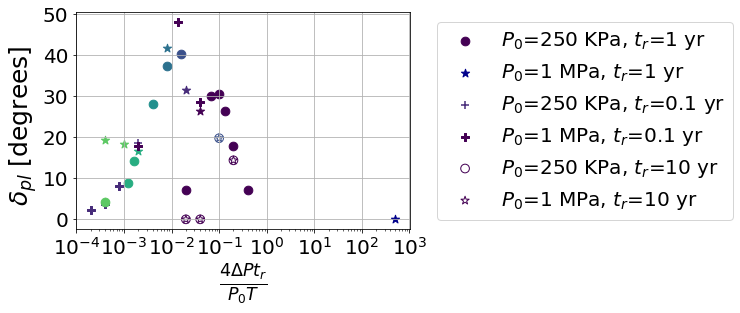

In [172]:
#Plot phase lag of uniform CR runs as a function of pressurization rate, P0 and t_r

#Plot sombrero durations vs. Pressure Rate (new way)
#set up plot
lw = 4
ms = 75
label_fontsize=25
axes_fontsize=25
title_fontsize=20

plt.grid()
plt.ylabel(r"$\delta_{pl}$ [degrees]  ", fontsize=label_fontsize)
plt.xlabel(r"$\frac{4\Delta P t_r}{ P_0 T }$", fontsize=label_fontsize)
plt.xscale('log')
# plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

cmap = plt.cm.viridis  # define the colormap
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

bounds = np.asarray([0, 5, 10, 20, 30, 40, 50, 60, 70])
norm = matplotlib.colors.BoundaryNorm(np.append(bounds, 10000), cmap.N)

run_list_durations = [GPS_Pres4, GPS_Pres5, GPS_Pres6, GPS_Pres7, GPS_Pres8, GPS_Pres11, GPS_Pres11_run4, GPS_Pres11_run5, GPS_Pres11_run6, GPS_Pres12, 
                      GPS_Pres13, GPS_Pres14, GPS_Pres15, GPS_Pres17, GPS_Pres18, GPS_Pres19, GPS_Pres19_run2, GPS_Pres24, GPS_Pres25, GPS_Pres31, GPS_Pres31_run2, GPS_Pres32, GPS_Pres32_run2,
                      GPS_Pres33, GPS_Pres34, GPS_Pres34_run2, GPS_Pres35, GPS_Pres36, GPS_Pres36_run2, GPS_Pres37, GPS_Pres37_run2, GPS_Pres39, GPS_Pres40, GPS_Pres41,
                      GPS_Pres42,GPS_Pres42_run3, GPS_Pres47, GPS_Pres47_run2, GPS_Pres48, GPS_Pres48_run2, GPS_Pres49, GPS_Pres49_run2, GPS_Pres50, GPS_Pres50_run2, GPS_Pres51,
                      GPS_Pres51_run2, GPS_Pres52, GPS_Pres52_run2, GPS_Pres56, GPS_Pres57, GPS_Pres97, GPS_Pres97_run2, GPS_Pres98, GPS_Pres98_run2, GPS_Pres99, GPS_Pres99_run2,
                      GPS_Pres100, GPS_Pres100_run2]
a = True
b = True
c = True
d = True
e = True
f = True

#plt.xlim([0.01, 1000])

for current_run in run_list_durations:
    if current_run.t_som_list != None and len(current_run.t_som_list) >= 2:
        t_som = current_run.t_som_list[1]
    else:
        t_som = current_run.t_som
        
    phase_lag = (360*t_som)/current_run.T

    if current_run.t_r == 1:
        if current_run.P0 == 250e3:
            if a:
                plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), phase_lag, c=t_som, cmap=cmap, norm=norm, s=ms, label=r"$P_0$=250 KPa, $t_r$=1 yr")
                a = False
            else:
                plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), phase_lag, c=t_som, cmap=cmap, norm=norm, s=ms)
        
        elif current_run.P0 == 1e6:
            if b:
                #plt.scatter((current_run.delta_P/(current_run.T*1e3)), current_run.t_som, c=current_run.t_som, cmap=cmap, norm=norm, marker="*", s=ms, label=r"$P_0$=1 MPa, $t_r$=1 yr")
                plt.scatter(500, 0, c='darkblue', cmap=cmap, norm=norm, marker="*", s=ms, label=r"$P_0$=1 MPa, $t_r$=1 yr")     
                b = False
            else: 
                plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), phase_lag, c=t_som, cmap=cmap, norm=norm, marker="*", s=ms)
            
    elif current_run.t_r == 10 and current_run.spinup_time == 1000:
        if current_run.P0 == 250e3:
            #print(str(current_run.t_som), cmap(current_run.t_som))
            if c:
                g = plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), phase_lag, c=t_som, cmap=cmap, norm=norm, s=ms, label=r"$P_0$=250 KPa, $t_r$=10 yr")  
                g.set_edgecolors(g.to_rgba(current_run.t_som))
                g.set_facecolors("none")
                c = False
            else:
                g = plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), phase_lag, c=t_som, cmap=cmap, norm=norm, s=ms)  
                g.set_edgecolors(g.to_rgba(current_run.t_som))
                g.set_facecolors("none")
        elif current_run.P0 == 1e6:
            if d:
                g = plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), phase_lag, c=t_som, cmap=cmap, norm=norm, marker="*", s=ms, label=r"$P_0$=1 MPa, $t_r$=10 yr")
                g.set_edgecolors(g.to_rgba(current_run.t_som))
                g.set_facecolors("none")
                d = False
            else:    
                g = plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), phase_lag, c=t_som/current_run.t_r, cmap=cmap, norm=norm, marker="*", s=ms)
                g.set_edgecolors(g.to_rgba(current_run.t_som))
                g.set_facecolors("none")
                
    elif current_run.t_r == 0.1:
        if current_run.P0 == 250e3:
            if e:
                plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), phase_lag, c=t_som, cmap=cmap, norm=norm, marker="+", s=ms, label=r"$P_0$=250 KPa, $t_r$=0.1 yr")
                e = False
            else:
                plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), phase_lag, c=t_som, cmap=cmap, norm=norm, marker="+", s=ms)                 
        elif current_run.P0 == 1e6:
            if f:
                plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), phase_lag, c=t_som, cmap=cmap, norm=norm, marker="P", s=ms, label=r"$P_0$=1 MPa, $t_r$=0.1 yr")
                f = False
            else:
                plt.scatter(get_nondim(current_run.delta_P, current_run.T, current_run.t_c, current_run.t_r, current_run.P0), phase_lag, c=t_som, cmap=cmap, norm=norm, marker="P", s=ms)
                
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=20)
# leg = ax.get_legend()
# leg.legendHandles[2].set_color('darkblue')
# leg.legendHandles[2].set_edgecolor('darkblue')
# leg.legendHandles[2].set_facecolor('darkblue')


# leg.legendHandles[2].set_edgecolor('darkblue')
# leg.legendHandles[2].set_facecolor('darkblue')

# cbar = plt.colorbar(ticks=bounds)
# cbar.ax.set_title(r'$\Delta t_{som}$', fontsize=20)

file_name = "/home/grantblock/Research/SMBPylith/Figures/SombDurations_dimensional.png"
plt.savefig(file_name, bbox_inches="tight")

plt.show()

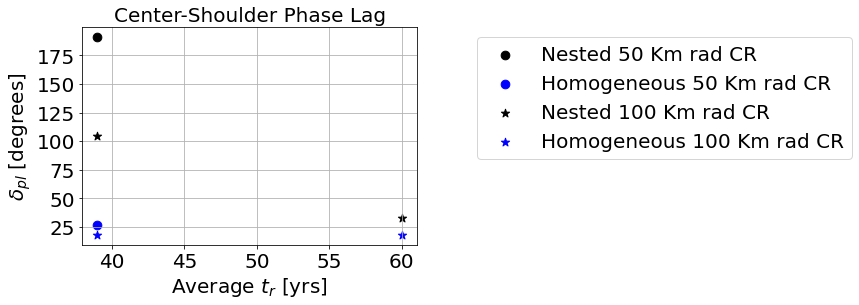

In [137]:
##Make phase lag plots##

CR_50_runs = [GPS_Pres69, GPS_Pres78]
CR_100_runs = [GPS_Pres70, GPS_Pres72, GPS_Pres79, GPS_Pres80]

#set up plot
lw = 4
ms = 75
label_fontsize=20
axes_fontsize=25
title_fontsize=20

plt.grid()
plt.ylabel(r"$\delta_{pl}$ [degrees]", fontsize=label_fontsize)
plt.xlabel(r"Average $t_r$ [yrs]", fontsize=label_fontsize)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

label_nested = False
label_unif = False
for current_run in CR_50_runs:
    if current_run.t_som_list != None and len(current_run.t_som_list) >= 2:
        t_som = current_run.t_som_list[1]
    else:
        t_som = current_run.t_som
    #calculate center-shoulder phase lag from somb duration and period
    phase_lag = 360*(t_som/current_run.T)
    
    if current_run.nested:
        if not label_nested:
            plt.scatter(current_run.t_r, phase_lag, color="black", label=r"Nested 50 Km rad CR", s=ms)
            label_nested = True
        else:
            plt.scatter(current_run.t_r, phase_lag, color="black", s=ms)  
    else:
        if not label_unif:
            plt.scatter(current_run.t_r, phase_lag, color="blue", label=r"Homogeneous 50 Km rad CR", s=ms)
            label_unif = True
        else:
            plt.scatter(current_run.t_r, phase_lag, color="blue", s=ms)
            

label_nested = False
label_unif = False
for current_run in CR_100_runs:
    if current_run.t_som_list != None and len(current_run.t_som_list) >= 2:
        t_som = current_run.t_som_list[1]
    else:
        t_som = current_run.t_som
    #calculate center-shoulder phase lag from somb duration and period
    phase_lag = 360*(t_som/current_run.T)
    
    if current_run.nested:
        if not label_nested:
            plt.scatter(current_run.t_r, phase_lag, color="black", marker="*", label=r"Nested 100 Km rad CR", s=ms)
            label_nested = True
        else:
            plt.scatter(current_run.t_r, phase_lag, color="black", marker="*", s=ms)  
    else:
        if not label_unif:
            plt.scatter(current_run.t_r, phase_lag, color="blue", marker="*", label=r"Homogeneous 100 Km rad CR", s=ms)
            label_unif = True
        else:
            plt.scatter(current_run.t_r, phase_lag, color="blue", s=ms, marker="*")
            
plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left', fontsize=20)
plt.title("Center-Shoulder Phase Lag", fontsize=title_fontsize)
file_name = "/home/grantblock/Research/SMBPylith/Figures/center_shoulder_phaselag_bulkrelax.png"
plt.savefig(file_name, bbox_inches="tight")
plt.show()      


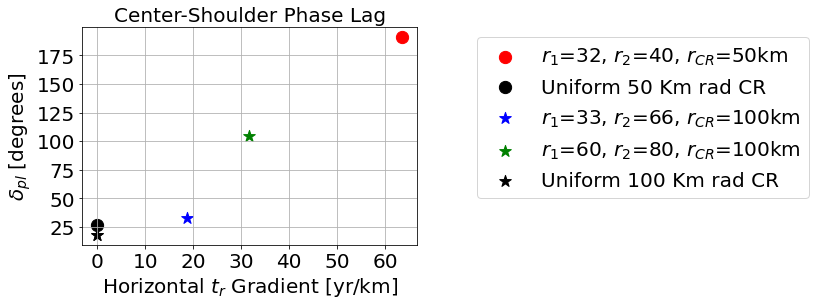

In [8]:
##Make phase lag diagrm as a function of t_r gradient##

#list of runs and their CR boundaries
CR_50_runs = [(GPS_Pres69, [32, 40, 50]), (GPS_Pres78, [50])]
CR_100_runs = [(GPS_Pres70, [33, 66, 100]), (GPS_Pres72, [60, 80, 100]), (GPS_Pres79, [100]), (GPS_Pres80, [100])]
nested_relax = [1, 10, 100] #nested relax times used by all nested runs
outside_relax = 1000
CR_50_colors = ["red"]
CR_100_colors = ["blue", "green"]

#set up plot
lw = 4
ms = 150
label_fontsize=20
axes_fontsize=25
title_fontsize=20

plt.grid()
plt.ylabel(r"$\delta_{pl}$ [degrees]", fontsize=label_fontsize)
#plt.xlabel(r"Horizontal $t_r$ Curvature [yr/km$^2$]", fontsize=label_fontsize)
plt.xlabel(r"Horizontal $t_r$ Gradient [yr/km]", fontsize=label_fontsize)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

label_nested = False
label_unif = False
for i in range(len(CR_50_runs)):
    current_set = CR_50_runs[i]
    current_run = current_set[0]
    CR_bounds = current_set[1]
    
    #mesh_CR_edge = 6.3333
    mesh_CR_edge = 1
    
    
    if current_run.t_som_list != None and len(current_run.t_som_list) >= 2:
        t_som = current_run.t_som_list[1]
    else:
        t_som = current_run.t_som
    #calculate center-shoulder phase lag from somb duration and period
    phase_lag = 360*(t_som/current_run.T)
    
    #calculate gradient from midpoints 
    if len(CR_bounds) == 1:
        relax_grad = 0
        #relax_grad = (outside_relax-nested_relax[0])/mesh_CR_edge
    else:
        #get first midpoint slope
        #denominator is because
        #(bounds[1]-bounds[0])/2+bounds[0]-bounds[0]/2 = bounds[1]/2
        m1 = (nested_relax[1]-nested_relax[0])/(CR_bounds[1]/2)
        m2 = (nested_relax[2]-nested_relax[1])/(CR_bounds[2]/2 - CR_bounds[0]/2) #CR_bounds[1] cancels through similar math
        m3 = (outside_relax - nested_relax[2])/(CR_bounds[2]/2 - CR_bounds[1]/2)
        
        relax_grad = (m1+m2+m3)/3
        #relax_grad = (m2-m1)/(CR_bounds[1]-CR_bounds[0])
        
    if current_run.nested:
        # if not label_nested:
        #     plt.scatter(relax_grad, phase_lag, color="black", label=r"Nested 50 Km rad CR", s=ms)
        #     label_nested = True
        # else:
        #     plt.scatter(relax_grad, phase_lag, color="black", s=ms)  
        plt.scatter(relax_grad, phase_lag, color=CR_50_colors[i], label=r"$r_1$="+str(CR_bounds[0])+", $r_2$="+str(CR_bounds[1])+", $r_{CR}$=50km", s=ms)
    else:
        if not label_unif:
            plt.scatter(relax_grad, phase_lag, color="black", label=r"Uniform 50 Km rad CR", s=ms)
            label_unif = True
        else:
            plt.scatter(relax_grad, phase_lag, color="black", s=ms)
            

label_nested = False
label_unif = False
for i in range(len(CR_100_runs)):
    current_set = CR_100_runs[i]
    current_run = current_set[0]
    CR_bounds = current_set[1]
    #mesh_CR_edge = 12.66
    mesh_CR_edge = 1
    
    
    if current_run.t_som_list != None and len(current_run.t_som_list) >= 2:
        t_som = current_run.t_som_list[1]
    else:
        t_som = current_run.t_som
    #calculate center-shoulder phase lag from somb duration and period
    phase_lag = 360*(t_som/current_run.T)
    
    #calculate gradient from midpoints 
    if len(CR_bounds) == 1:
        relax_grad = 0
        #relax_grad = (outside_relax-nested_relax[0])/mesh_CR_edge

    else:
        #get first midpoint slope
        #denominator is because
        #(bounds[1]-bounds[0])/2+bounds[0]-bounds[0]/2 = bounds[1]/2
        m1 = (nested_relax[1]-nested_relax[0])/(CR_bounds[1]/2)
        m2 = (nested_relax[2]-nested_relax[1])/(CR_bounds[2]/2 - CR_bounds[0]/2) #CR_bounds[1] cancels through similar math
        m3 = (outside_relax - nested_relax[2])/(CR_bounds[2]/2 - CR_bounds[1]/2)
        
        relax_grad = (m1+m2+m3)/3
        #relax_grad = (m2-m1)/(CR_bounds[1]-CR_bounds[0])
        
    
    if current_run.nested:
        # if not label_nested:
        #     plt.scatter(relax_grad, phase_lag, color="black", label=r"Nested 50 Km rad CR", s=ms)
        #     label_nested = True
        # else:
        #     plt.scatter(relax_grad, phase_lag, color="black", s=ms)  
        plt.scatter(relax_grad, phase_lag, color=CR_100_colors[i], label=r"$r_1$="+str(CR_bounds[0])+", $r_2$="+str(CR_bounds[1])+", $r_{CR}$=100km", s=ms, marker="*")
    else:
        if not label_unif:
            plt.scatter(relax_grad, phase_lag, color="black", label=r"Uniform 100 Km rad CR", s=ms, marker="*")
            label_unif = True
        else:
            plt.scatter(relax_grad, phase_lag, color="black", s=ms, marker="*")
            
plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left', fontsize=20)
plt.title("Center-Shoulder Phase Lag", fontsize=title_fontsize)
#plt.xscale('log')
file_name = "/home/grantblock/Research/SMBPylith/Figures/center_shoulder_phaselag_relaxgradient.png"
plt.savefig(file_name, bbox_inches="tight")
plt.show()  

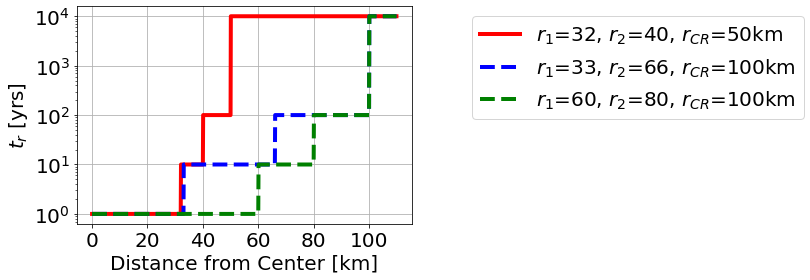

In [4]:
#list of runs and their CR boundaries
CR_50_runs = [(GPS_Pres69, [32, 40, 50])]
CR_50_colors = ["red"]
CR_100_runs = [(GPS_Pres70, [33, 66, 100]), (GPS_Pres72, [60, 80, 100])]
CR_100_colors = ["blue", "green"]
nested_relax = [1, 10, 100] #nested relax times used by all nested runs
outside_relax = 1000

#set up plot
lw = 4
ms = 75
label_fontsize=20
axes_fontsize=25
title_fontsize=20

plt.grid()
plt.ylabel(r"$t_r$ [yrs]", fontsize=label_fontsize)
plt.xlabel(r"Distance from Center [km]", fontsize=label_fontsize)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.yscale('log')

domain = np.arange(0, 110, 0.1)
for i in range(len(CR_50_runs)):
    current_set = CR_50_runs[i]
    bounds = current_set[1]
    
    t_r = np.ones(len(domain))
    t_r[(domain > bounds[0]) & (domain <= bounds[1])] = 10
    t_r[(domain > bounds[1]) & (domain <= 50)] = 100 
    t_r[domain > 50] = 10000
    
    
    plt.plot(domain, t_r, color=CR_50_colors[i], label=r"$r_1$="+str(bounds[0])+", $r_2$="+str(bounds[1])+", $r_{CR}$=50km", lw=lw)


domain = np.arange(0, 110, 0.1)
for i in range(len(CR_100_runs)):
    current_set = CR_100_runs[i]
    bounds = current_set[1]
    
    t_r = np.ones(len(domain))
    t_r[(domain > bounds[0]) & (domain <= bounds[1])] = 10
    t_r[(domain > bounds[1]) & (domain <= 100)] = 100
    t_r[domain > 100] = 10000
    
    plt.plot(domain, t_r, color=CR_100_colors[i], label=r"$r_1$="+str(bounds[0])+", $r_2$="+str(bounds[1])+", $r_{CR}$=100km", lw=lw, linestyle="--")

plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left', fontsize=20)
file_name = "/home/grantblock/Research/SMBPylith/Figures/center_shoulder_phaselag_relaxgradient_steps.png"
plt.savefig(file_name, bbox_inches="tight")
plt.show()

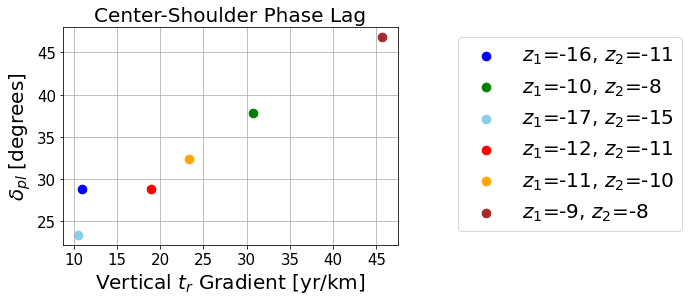

In [101]:
#set up plot
lw = 4
ms = 75
label_fontsize=20
axes_fontsize=20
title_fontsize=20

plt.grid()
plt.ylabel(r"$\delta_{pl}$ [degrees]", fontsize=label_fontsize)
plt.xlabel(r"Vertical $t_r$ Gradient [yr/km]", fontsize=label_fontsize)
#plt.xlabel(r"Vertical $t_r$ Curvature [yr/km$^2$]", fontsize=label_fontsize)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#compare center shoulder phase lags of stacked cylinder runs
runs = [GPS_Pres89, GPS_Pres90, GPS_Pres91, GPS_Pres93, GPS_Pres94, GPS_Pres95]
bounds = [(-16, -11), (-10, -8), (-17, -15), (-12, -11), (-11, -10), (-9, -8)] #stacking bounds in km
color_list = ["blue", "green", "skyblue", "red", "orange", "brown"]

relax_times = [1, 10, 100] #list of relax times in stacks


CR_bottom = -21 #bottom of compliant region in km
CR_top = -7 #top of compliant region in km

for i in range(len(runs)):
    current_run = runs[i]
    current_bounds = bounds[i]
    
    #calculate the gradint
    m1 = (relax_times[1]-relax_times[0])/(((current_bounds[1]+current_bounds[0])/2) - ((current_bounds[0]+CR_bottom)/2))
    m2 = (relax_times[2]-relax_times[1])/(((CR_top+current_bounds[1])/2)-((current_bounds[1]+current_bounds[0])/2))
    
    gradient = (m1+m2)/2
    #gradient = (m2-m1)/(current_bounds[1]-current_bounds[0])
    
    #calculate the phase lag
    if current_run.t_som_list != None and len(current_run.t_som_list) >= 2:
        t_som = current_run.t_som_list[1]
    else:
        t_som = current_run.t_som
    phase_lag = 360*(t_som/current_run.T)
    
    plt.scatter(gradient, phase_lag, color=color_list[i], label=r"$z_1$="+str(current_bounds[0])+", $z_2$="+str(current_bounds[1]), s=ms)


plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left', fontsize=20)
plt.title("Center-Shoulder Phase Lag", fontsize=title_fontsize)
file_name = "/home/grantblock/Research/SMBPylith/Figures/center_shoulder_phaselag_relaxgradient_stacked.png"
plt.savefig(file_name, bbox_inches="tight")
plt.show()  

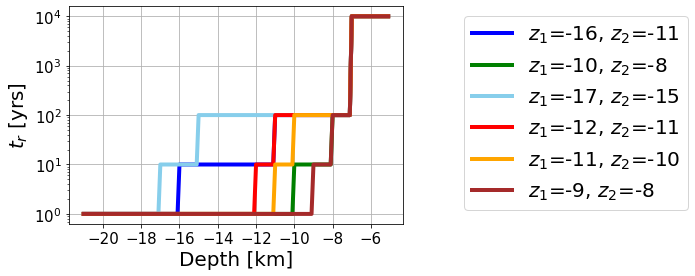

In [102]:
#make a plot showing relax time as a function of z

#set up plot
lw = 4
ms = 75
label_fontsize=20
axes_fontsize=20
title_fontsize=20

plt.grid()
plt.xlabel(r"Depth [km]", fontsize=label_fontsize)
plt.ylabel(r"$t_r$ [yrs]", fontsize=label_fontsize)
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

domain = np.arange(CR_bottom, -5, 0.1) #domain of CR
for i in range(len(runs)):
    current_bounds = bounds[i]
    
    t_r = np.ones(len(domain))

    t_r[(domain > current_bounds[0]) & (domain <= current_bounds[1])] = relax_times[1]
    t_r[(domain > current_bounds[1]) & (domain <= CR_top)] = relax_times[2]
    t_r[domain > CR_top] = 10000
    
    
    plt.plot(domain, t_r, color=color_list[i], label=r"$z_1$="+str(current_bounds[0])+", $z_2$="+str(current_bounds[1]), lw=lw)

plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left', fontsize=20)
file_name = "/home/grantblock/Research/SMBPylith/Figures/center_shoulder_phaselag_relaxgradient_stacked_steps.png"
plt.savefig(file_name, bbox_inches="tight")
plt.show()

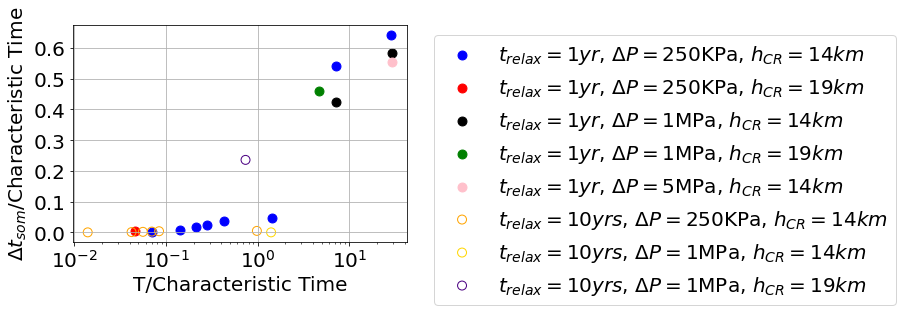

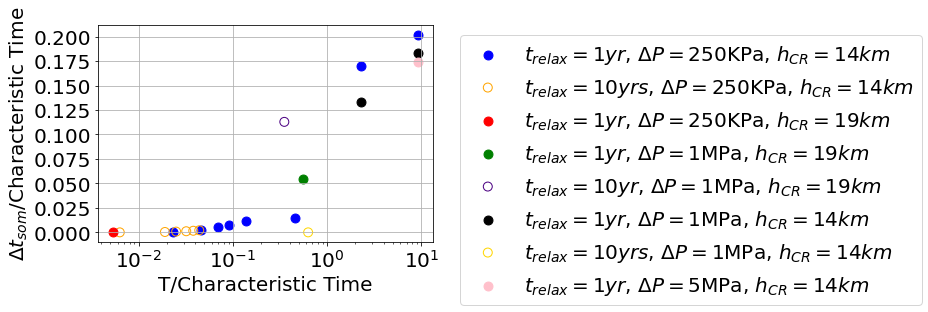

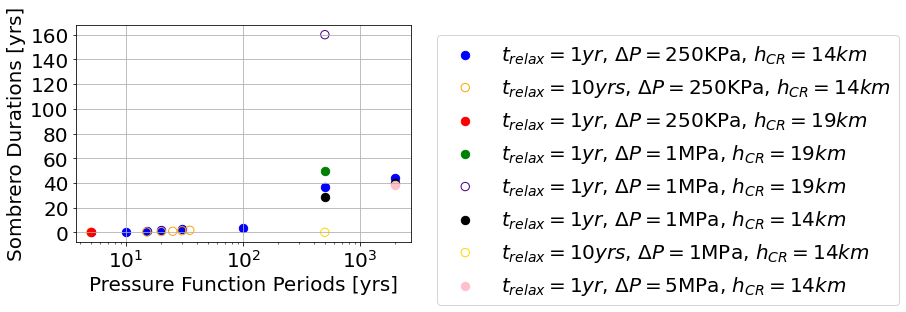

In [53]:
#Plot sombrero durations vs. T/characteristic times

#1 yr relax runs
T_tc1_1 = np.asarray([0.07, 0.142, 0.212, 0.283, 0.425, 1.415, 7.075, 28.3])
T_tc2_1 = np.asarray([0.023, 0.046, 0.069, 0.092, 0.138, 0.461, 2.303, 9.21])
delta_tSom_1 = np.asarray([0.1, 0.5, 1.2, 1.7, 2.5, 3.2, 37, 44])

#1 yr relax with tall cylinder
T_tc1_tall = np.asarray([0.046])
T_tc2_tall = np.asarray([0.0054])
delta_tSom_tall = np.asarray([0.4])

#1yr Relax runs with tall cylinder, P = 1 MPa
T_tc1_tall_1MPa = np.asarray([4.66])
T_tc2_tall_1MPa = np.asarray([0.55])
delta_tSom_tall_1MPa = np.asarray([50])

#10 yr Relax runs with tall cylinder, P = 1MPa
T_tc1_tall_1MPa_10yrRelax = np.asarray([0.737])
T_tc2_tall_1MPa_10yrRelax = np.asarray([0.352])
delta_tSom_tall_1MPa_10yrRelax = np.asarray([160])

#10 yr relax runs
T_tc1_10 = np.asarray([0.014, 0.0421, 0.056, 0.07, 0.084, 0.98])
T_tc2_10 = np.asarray([0.0063, 0.019, 0.025, 0.032, 0.038, 0.044])
delta_tSom_10 = np.asarray([0, 0.3, 0.6, 0.9, 1.3, 1.7])

#1MPa of pressure instead of 250 KPa
T_tc1_1MPa = np.asarray([7.075, 29.24])
T_tc2_1MPa = np.asarray([2.303, 9.18])
delta_tSom_1MPa = np.asarray([29, 40])

#1MPa, 10 yr relax time
T_tc1_1MPa_10yrRelax = np.asarray([1.4])
T_tc2_1MPa_10yrRelax = np.asarray([0.63])

delta_tSom_1MPa_10yrRelax = np.asarray([0])

#5MPa runs
T_tc1_5MPa = np.asarray([29.24])
T_tc2_5MPa = np.asarray([9.18])
delta_tSom_5MPa = np.asarray([38])

#characteristic times for normalization
tc1_1 = 68.39
tc2_1 = 217.86

tc1_10 = 356.34
tc2_10 = 789.82

tc1_tall = 108.66
tc2_tall = 924.37

tc1_tall_10yrRelax = 678.34
tc2_tall_10yrRelax = 1417.31

#plot tc1's

plt.scatter(T_tc1_1, delta_tSom_1/tc1_1, s=80, color="blue", label=r"$t_{relax}=1yr$, $\Delta P=$250KPa, $h_{CR}=14km$")
plt.scatter(T_tc1_tall, delta_tSom_tall/tc1_tall, s=80, color="red", label=r"$t_{relax}=1yr$, $\Delta P=$250KPa, $h_{CR}=19km$")
plt.scatter(T_tc1_1MPa, delta_tSom_1MPa/tc1_1, s=80, color="black", label=r"$t_{relax}=1yr$, $\Delta P=$1MPa, $h_{CR}=14km$")
plt.scatter(T_tc1_tall_1MPa, delta_tSom_tall_1MPa/tc1_tall, s=80, color="green", label=r"$t_{relax}=1yr$, $\Delta P=$1MPa, $h_{CR}=19km$")
plt.scatter(T_tc1_5MPa, delta_tSom_5MPa/tc1_1, s=80,color="pink", label=r"$t_{relax}=1yr$, $\Delta P=$5MPa, $h_{CR}=14km$")
plt.scatter(T_tc1_10, delta_tSom_10/tc1_10, s=80, facecolors='none', edgecolors='orange', label=r"$t_{relax}=10yrs$, $\Delta P=$250KPa, $h_{CR}=14km$")
plt.scatter(T_tc1_1MPa_10yrRelax, delta_tSom_1MPa_10yrRelax/tc1_10, s=80, facecolors='none', edgecolors='gold', label=r"$t_{relax}=10yrs$, $\Delta P=$1MPa, $h_{CR}=14km$")
plt.scatter(T_tc1_tall_1MPa_10yrRelax, delta_tSom_tall_1MPa_10yrRelax/tc1_tall_10yrRelax, s=80, facecolors='none', edgecolors='indigo', label=r"$t_{relax}=10yrs$, $\Delta P=$1MPa, $h_{CR}=19km$")


plt.xlabel(r"T/Characteristic Time", fontsize=20)
plt.ylabel(r"$\Delta t_{som}$/Characteristic Time", fontsize=20)
#plt.title(r"$t_{c1}$", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=20)
#plt.title(r"$\tau_{c1}$", fontsize=20)

file_name = "/home/grantblock/Research/SMBPylith/Figures/SombDurations_tc1.png"
plt.savefig(file_name, bbox_inches="tight")
plt.show()


plt.scatter(T_tc2_1, delta_tSom_1/tc2_1, s=80, color="blue", label=r"$t_{relax}=1yr$, $\Delta P=$250KPa, $h_{CR}=14km$")
plt.scatter(T_tc2_10, delta_tSom_10/tc2_10, s=80, facecolors='none', edgecolors='orange', label=r"$t_{relax}=10yrs$, $\Delta P=$250KPa, $h_{CR}=14km$")
plt.scatter(T_tc2_tall, delta_tSom_tall/tc2_tall, s=80, color="red", label=r"$t_{relax}=1yr$, $\Delta P=$250KPa, $h_{CR}=19km$")
plt.scatter(T_tc2_tall_1MPa, delta_tSom_tall_1MPa/tc2_tall, s=80, color="green", label=r"$t_{relax}=1yr$, $\Delta P=$1MPa, $h_{CR}=19km$")
plt.scatter(T_tc2_tall_1MPa_10yrRelax, delta_tSom_tall_1MPa_10yrRelax/tc2_tall_10yrRelax, s=80, facecolors='none', edgecolors='indigo', label=r"$t_{relax}=10yr$, $\Delta P=$1MPa, $h_{CR}=19km$")
plt.scatter(T_tc2_1MPa, delta_tSom_1MPa/tc2_1, s=80, color="black", label=r"$t_{relax}=1yr$, $\Delta P=$1MPa, $h_{CR}=14km$")
plt.scatter(T_tc2_1MPa_10yrRelax, delta_tSom_1MPa_10yrRelax/tc2_10, s=80, facecolors='none', edgecolors='gold', label=r"$t_{relax}=10yrs$, $\Delta P=$1MPa, $h_{CR}=14km$")
plt.scatter(T_tc2_5MPa, delta_tSom_5MPa/tc2_1, s=80,color="pink", label=r"$t_{relax}=1yr$, $\Delta P=$5MPa, $h_{CR}=14km$")

plt.xlabel(r"T/Characteristic Time", fontsize=20)
plt.ylabel(r"$\Delta t_{som}$/Characteristic Time", fontsize=20)
#plt.title(r"$t_{c2}$", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=20)
#plt.title(r"$\tau_{c1}$", fontsize=20)

file_name = "/home/grantblock/Research/SMBPylith/Figures/SombDurations_tc2.png"
plt.savefig(file_name, bbox_inches="tight")
plt.show()


#Plot sombrero suration just as a function of T
T_1 = np.asarray([5, 10, 15, 20, 30, 100, 500, 2000])
delta_tSom_1 = np.asarray([0.1, 0.5, 1.2, 1.7, 2.5, 3.2, 37, 44])

T_tall = np.asarray([5])
delta_tSom_Tall = np.asarray([0.4])

T_1MPa = np.asarray([500, 2000])
delta_tSom_1MPa = np.asarray([29, 40])

T_tall_1MPa_1yrRelax = np.asarray([500])
delta_tSom_tall_1MPa_1yrRelax = np.asarray([50])

T_tall_1MPa_10yrRelax = np.asarray([500])
delta_tSom_tall_1MPa_10yrRelax = np.asarray([160])

T_5MPa = np.asarray([2000])
delta_tSom_5MPa = np.asarray([38])

T_10 = np.asarray([5, 15, 20, 25, 30, 35])
delta_tSom_10 = np.asarray([0, 0.3, 0.6, 0.9, 1.3, 1.7])

T_1MPa_10 = np.asarray([500])
delta_tSom_1MPa_10 = np.asarray([0])


# m_1, b_1, r_value_1, p_value_1, std_err_1 = stats.linregress(T_1, delta_tSom_1)
# print("slope:", m_1,"intercept:", b_1,"r^2", r_value_1)
plt.scatter(T_1, delta_tSom_1, s=70, color="blue", label=r"$t_{relax}=1yr$, $\Delta P=$250KPa, $h_{CR}=14km$")
plt.scatter(T_10, delta_tSom_10, s=70, facecolors='none', edgecolors='orange', label=r"$t_{relax}=10yrs$, $\Delta P=$250KPa, $h_{CR}=14km$")
plt.scatter(T_tall, delta_tSom_tall, s=70, color="red", label = r"$t_{relax}=1yr$, $\Delta P=$250KPa, $h_{CR}=19km$")
plt.scatter(T_tall_1MPa_1yrRelax, delta_tSom_tall_1MPa_1yrRelax, s=70, color="green", label = r"$t_{relax}=1yr$, $\Delta P=$1MPa, $h_{CR}=19km$")
plt.scatter(T_tall_1MPa_10yrRelax, delta_tSom_tall_1MPa_10yrRelax, s=70, facecolors='none', edgecolors='indigo', label = r"$t_{relax}=1yr$, $\Delta P=$1MPa, $h_{CR}=19km$")
plt.scatter(T_1MPa, delta_tSom_1MPa, s=70, color="black", label=r"$t_{relax}=1yr$, $\Delta P=$1MPa, $h_{CR}=14km$")
plt.scatter(T_1MPa_10, delta_tSom_1MPa_10, s=70, facecolors='none', edgecolors='gold', label=r"$t_{relax}=10yrs$, $\Delta P=$1MPa, $h_{CR}=14km$")
plt.scatter(T_5MPa, delta_tSom_5MPa, s=70, color="pink", label=r"$t_{relax}=1yr$, $\Delta P=$5MPa, $h_{CR}=14km$")

#plt.plot(T_1, m_1*T_1+b_1, color = "black", label=r'Linear Fit for $\tau_r = 1$')
plt.xlabel("Pressure Function Periods [yrs]", fontsize=20)
plt.ylabel("Sombrero Durations [yrs]", fontsize=20)
plt.grid()
#plt.xlim([0, 110])
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=20)

file_name = "/home/grantblock/Research/SMBPylith/Figures/SombDurationsDimensionl.png"
plt.savefig(file_name, bbox_inches="tight")
plt.show()

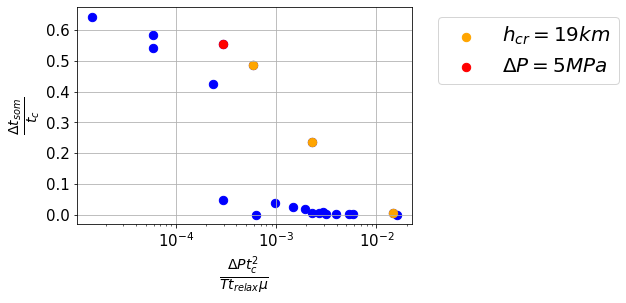

In [9]:
#plot sombrero duration vs. non-dimensional pressure rate

def get_pressure_rate(delta_P, T):
    T *= 3.154e7
    return (delta_P/T)

#sombrero durations from all runs, see 8/11/22 notes
sombrero_durations = [0.1, 0.5, 1.2, 1.7, 2.5, 3.2, 37, 44, 0.4, 53, 160, 0, 0.3, 0.6, 0.9, 1.3, 1.7, 29, 40, 0, 38]

#parameters from all runs, see 8/11/22 notes and Periodic Pylith Runs file
nondim_numbers = [get_nondim(250e3, 5, 68.39, 1), get_nondim(250e3, 10, 68.39, 1), get_nondim(250e3, 15, 68.39, 1), get_nondim(250e3, 20, 68.39, 1), 
                  get_nondim(250e3, 30, 68.39, 1), get_nondim(250e3, 100, 68.39, 1), get_nondim(250e3, 500, 68.39, 1), get_nondim(250e3, 2000, 68.39, 1), 
                  get_nondim(250e3, 5, 108.66, 1), get_nondim(1e6, 500, 108.66, 1), get_nondim(1e6, 500, 678.34, 10), get_nondim(250e3, 5, 356.34, 10), 
                  get_nondim(250e3, 15, 356.34, 10), get_nondim(250e3, 20, 356.34, 10), get_nondim(250e3, 25, 356.34, 10), get_nondim(250e3, 30, 356.34, 10),
                  get_nondim(250e3, 35, 356.34, 10), get_nondim(1e6, 500, 68.39, 1), get_nondim(1e6, 2000, 68.39, 1), get_nondim(1e6, 500, 356.34, 10),
                  get_nondim(5e6, 2000, 68.39, 1)]

outlier_durations = [160, 53, 0.4]
outlier_nondims = [get_nondim(1e6, 500, 678.34, 10), get_nondim(1e6, 500, 108.66, 1), get_nondim(250e3, 5, 108.66, 1)]
outlier_tc = [678.34, 108.66, 108.66]

outlier_durations2 = [38]
outlier_nondims2 = [get_nondim(5e6, 2000, 68.39, 1)]
outlier_tc2 = [68.39]

pressure_rates = [get_pressure_rate(250e3, 5), get_pressure_rate(250e3, 15), get_pressure_rate(250e3, 15), get_pressure_rate(250e3, 20), 
                  get_pressure_rate(250e3, 30), get_pressure_rate(250e3, 100), get_pressure_rate(250e3, 500), get_pressure_rate(250e3, 2000), 
                  get_pressure_rate(250e3, 5), get_pressure_rate(1e6, 500), get_pressure_rate(1e6, 500), get_pressure_rate(250e3, 5), 
                  get_pressure_rate(250e3, 15), get_pressure_rate(250e3, 20), get_pressure_rate(250e3, 25), get_pressure_rate(250e3, 30),
                  get_pressure_rate(250e3, 35), get_pressure_rate(1e6, 500), get_pressure_rate(1e6, 2000), get_pressure_rate(1e6, 500),
                  get_pressure_rate(5e6, 2000)]

characteristic_times = [68.39, 68.39, 68.39, 68.39, 68.39, 68.39, 68.39, 68.39, 108.66, 108.66, 678.34, 356.34, 356.34, 356.34, 356.34, 356.34, 356.34, 68.39, 68.39,  356.34, 68.39]
periods = [5, 10, 15, 20, 30, 100, 500, 2000, 5, 500, 500, 5, 15, 20, 25, 30, 35, 500, 2000, 500, 2000]

plt.scatter(nondim_numbers, np.divide(np.asarray(sombrero_durations), np.asarray(characteristic_times)), s=70, color="blue")
plt.scatter(outlier_nondims, np.divide(np.asarray(outlier_durations), np.asarray(outlier_tc)), s=70, color="orange", label="$h_{cr} = 19km$")
plt.scatter(outlier_nondims2, np.divide(np.asarray(outlier_durations2), np.asarray(outlier_tc2)), s=70, color="red", label="$\Delta P=5MPa$")

#plt.scatter(pressure_rates, np.divide(np.asarray(sombrero_durations), np.asarray(characteristic_times)), s=70, color="blue")

plt.xlabel(r"$\frac{\Delta P t_c^2}{T t_{relax} \mu}$", fontsize=20)
#plt.xlabel(r"$\frac{\Delta P}{T}$", fontsize=20)

plt.ylabel(r"$\frac{\Delta t_{som}}{t_c}$", fontsize=20)
plt.xscale('log')
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=20)

plt.show()


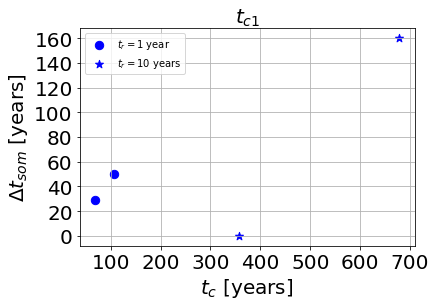

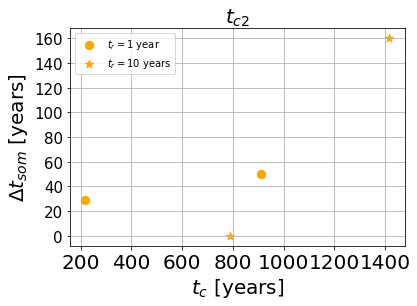

In [25]:
#Plot Characteristic times vs. sombrero durations for a given pressure and sombrero duration



#characteristic times
tc1_1yrRelax = 68.396 #from GPS_Press11 (1 MPa run)
tc2_1yrRelax = 217.86

tc1_10yrRelax = 356.34 #from GPS_Press11 (1MPa run)
tc2_10yrRelax = 789.82

tc1_tall_1yrRelax = 107.12 #from GPS_Pres23 
tc2_tall_1yrRelax = 909.91

tc1_tall_10yrRelax = 678.34 #from GPS_Pres23
tc2_tall_10yrRelax = 1417.31

#sombrero durations
tSom_1yrRelax = 29 #from GPS_Pres11 (1MPa run)
tSom_10yrRelax = 0

tSom_tall_1yrRelax = 50 #from GPS_Pres23
tSom_tall_10yrRelax = 160 

tc1_1yrRelax_list = np.asarray([tc1_1yrRelax, tc1_tall_1yrRelax])
tc1_10yrRelax_list = np.asarray([tc1_10yrRelax, tc1_tall_10yrRelax])

tc2_1yrRelax_list = np.asarray([tc2_1yrRelax, tc2_tall_1yrRelax])
tc2_10yrRelax_list = np.asarray([tc2_10yrRelax, tc2_tall_10yrRelax])

tSom_1yrRelax_list = np.asarray([tSom_1yrRelax, tSom_tall_1yrRelax])
tSom_10yrRelax_list = np.asarray([tSom_10yrRelax, tSom_tall_10yrRelax])

#plot data
plt.xlabel(r"$t_c$ [years]", fontsize=20)
plt.ylabel(r"$\Delta t_{som}$ [years]", fontsize=20)
plt.title(r"$t_{c1}$", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.scatter(tc1_1yrRelax_list, tSom_1yrRelax_list, color="blue", s=70, label=r"$t_r=1$ year")
plt.scatter(tc1_10yrRelax_list, tSom_10yrRelax_list, color="blue", marker="*", s=70, label=r"$t_r=10$ years")

plt.legend()
plt.grid()
plt.show()

plt.xlabel(r"$t_c$ [years]", fontsize=20)
plt.ylabel(r"$\Delta t_{som}$ [years]", fontsize=20)
plt.title(r"$t_{c2}$", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)

plt.scatter(tc2_1yrRelax_list, tSom_1yrRelax_list, color="orange", s=70, label=r"$t_r=1$ year")
plt.scatter(tc2_10yrRelax_list, tSom_10yrRelax_list, color="orange", marker="*", s=70, label=r"$t_r=10$ years")

plt.legend()
plt.grid()
plt.show()

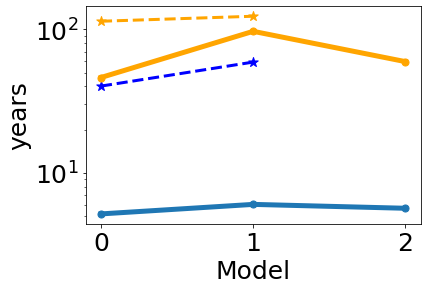

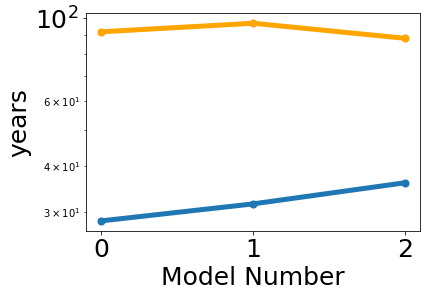

In [44]:
#Make characteristic time plots
#arrays are ordered Visc. Cyl. Slice 35km, 50km, Visc. Sandwich
legend_fs=25
title_fs=20
tick_fs=25
label_fs=25
lw=5
ms=50

model_numbers = [0,1,2]

char1_1yrRelax = np.asarray([-0.19366248456977347, -0.1661690558714919, -0.1768724719857525])
char2_1yrRelax = np.asarray([-0.02164136170543221, -0.010304666214620404, -0.016764497087745835])

char1_10yrRelax = np.asarray([-0.03518101460117117, -0.03165475479321771, -0.027757313620871485])
char2_10yrRelax = np.asarray([-0.010882447678199491, -0.01031756772304395, -0.011330481082008374])

char1_StandardModel = np.asarray([-0.01462])
char2_StandardModel = np.asarray([-0.0045899])

fig, ax = plt.subplots()
ax.set_xlabel("Model", fontsize=label_fs)
ax.set_ylabel(r"years", fontsize=label_fs)
#ax.set_title(r"$\tau = 1$ years", fontsize=title_fs)
ax.set_yscale('log')

#ax.grid()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.scatter(model_numbers, 1/(char1_1yrRelax*-1), label=r"$\tau_{c1}$", s=ms)
ax.plot(model_numbers, 1/(char1_1yrRelax*-1), linewidth=lw)

#Standard model with h_CR = 10, r_CR=35 for consistency with data
tc1_10km_thin = 40.25
tc2_10km_thin = 114.08

ax.scatter(np.asarray([0]), tc1_10km_thin, label=r"$\tau_{c1}$, Layered Model ($h_{CR}=10$km)", s=100, color="blue", marker="*")
ax.scatter(np.asarray([0]), tc2_10km_thin, label=r"$\tau_{c2}$, Layered Model ($h_{CR}=10$km)", s=100, color="orange", marker="*")



#Standard model with h_CR = 10 for consistency with data
tc1_10km = 59.2
tc2_10km = 123.64

ax.scatter(np.asarray([1]), tc1_10km, label=r"$\tau_{c1}$, Layered Model ($h_{CR}=10$km)", s=100, color="blue", marker="*")
ax.scatter(np.asarray([1]), tc2_10km, label=r"$\tau_{c2}$, Layered Model ($h_{CR}=10$km)", s=100, color="orange", marker="*")


ax.plot(np.asarray([0, 1]), np.asarray([tc1_10km_thin, tc1_10km]), linewidth=3, color="blue", linestyle='dashed')
ax.plot(np.asarray([0, 1]), np.asarray([tc2_10km_thin, tc2_10km]), linewidth=3, color="orange", linestyle='dashed')


ax.scatter(model_numbers, 1/(char2_1yrRelax*-1), label=r"$\tau_{c2}$", color="orange", s=ms)
ax.plot(model_numbers, 1/(char2_1yrRelax*-1), color="orange", linewidth=lw)

ax.tick_params(axis='both', which='major', labelsize=tick_fs)


#ax.legend(fontsize=legend_fs)
plt.savefig("../Figures/DecayConstantHoriz_relax1.png", bbox_inches='tight')

plt.show()




fig, ax = plt.subplots()
ax.set_xlabel("Model Number", fontsize=label_fs)
ax.set_ylabel(r"years", fontsize=label_fs)
ax.set_yscale('log')

#ax.set_title(r"$\tau = 10$ years", fontsize=title_fs)
#ax.grid()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.scatter(model_numbers, 1/(char1_10yrRelax*-1), label="Initial decay constant", s=ms)
ax.plot(model_numbers, 1/(char1_10yrRelax*-1), linewidth=lw)

ax.scatter(model_numbers, 1/(char2_10yrRelax*-1), label="Final decay constant", color="orange", s=ms)
ax.plot(model_numbers, 1/(char2_10yrRelax*-1), color="orange", linewidth=lw)

#ax.legend(loc="center right", fontsize=legend_fs)
ax.tick_params(axis='both', which='major', labelsize=tick_fs)

plt.savefig("../Figures/DecayConstantHoriz_relax10.png", bbox_inches='tight')
plt.show()

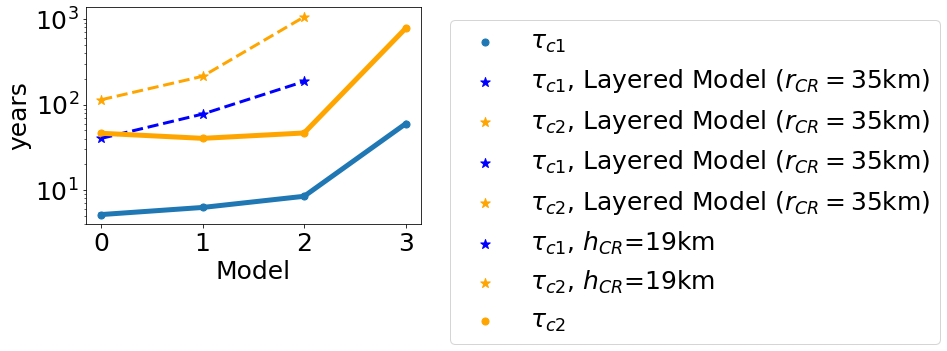

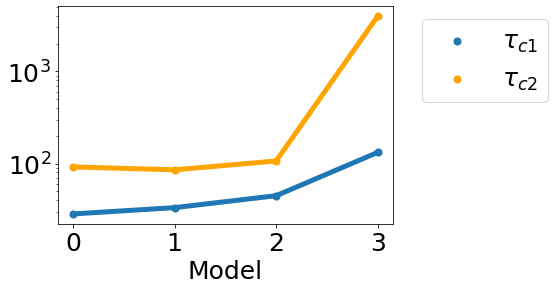

In [45]:
#Make characteristic time plots
#arrays are ordered Visc. Cyl. Slice 10km, 14km, 20km, Visc. cylinder

'''
For Model ViscoelasticCylinderSlice/35km with relax time 1
Fit paramter 1: -0.19366372311568897 Characteristic Time 1: 5.163589669308535
Fit paramter 2: -0.021641044720579115 Characteristic Time 2: 46.20849006652023
For Model ViscoelasticCylinderSliceTall/14km with relax time 1
Fit paramter 1: -0.15987454365889012 Characteristic Time 1: 6.254904483940919
Fit paramter 2: -0.024817271450077324 Characteristic Time 2: 40.29451835636364
For Model ViscoelasticCylinderSliceTall/20km with relax time 1
Fit paramter 1: -0.11831009304758244 Characteristic Time 1: 8.45236424248112
Fit paramter 2: -0.021468405027273284 Characteristic Time 2: 46.5800788987169
For Model ViscoelasticCylinder/35km with relax time 1
Fit paramter 1: -0.01684344411281292 Characteristic Time 1: 59.370280407158134
Fit paramter 2: -0.0012789775263803277 Characteristic Time 2: 781.8745672804195
For Model ViscoelasticCylinderSlice/35km with relax time 10
Fit paramter 1: -0.0351811665017442 Characteristic Time 1: 28.42429911897385
Fit paramter 2: -0.010882540002428035 Characteristic Time 2: 91.89031235142596
For Model ViscoelasticCylinderSliceTall/14km with relax time 10
Fit paramter 1: -0.03007316607551735 Characteristic Time 1: 33.252235480922735
Fit paramter 2: -0.011690575128145921 Characteristic Time 2: 85.53899094257787
For Model ViscoelasticCylinderSliceTall/20km with relax time 10
Fit paramter 1: -0.022319277200292538 Characteristic Time 1: 44.804318304129175
Fit paramter 2: -0.009377340520262345 Characteristic Time 2: 106.64004339388366
For Model ViscoelasticCylinder/35km with relax time 10
Fit paramter 1: -0.007574183255598304 Characteristic Time 1: 132.0274366560738
Fit paramter 2: -0.00024772413875346147 Characteristic Time 2: 4036.748316219656
'''

legend_fs=25
title_fs=25
tick_fs=25
label_fs=25
lw=5
ms=50

model_numbers = [0,1,2,3]

char1_1yrRelax = np.asarray([-0.19366248456977347, -0.15987466776845882,  -0.11831033669719589, -0.016755892197413233])
char2_1yrRelax = np.asarray([-0.02164136170543232, -0.024817562506131326, -0.021468652234870798, -0.0012808425084170991])

char1_10yrRelax = np.asarray([-0.03518101460117117, -0.030073271838420415, -0.022319071424535982, -0.007575065200173033])
char2_10yrRelax = np.asarray([-0.010882447678199536, -0.01169174783288751, -0.009378939929199158, -0.00025226733073523193])

char1_StandardModel = np.asarray([-0.01462])
char2_StandardModel = np.asarray([-0.0045899])

fig, ax = plt.subplots()
ax.set_xlabel("Model", fontsize=label_fs)
ax.set_ylabel(r"years", fontsize=label_fs)
#ax.set_title(r"$\tau = 1$ years", fontsize=title_fs)
#ax.set_xscale('log')
#ax.grid()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.scatter(model_numbers, 1/(char1_1yrRelax*-1), label=r"$\tau_{c1}$", s=ms)
ax.plot(model_numbers, 1/(char1_1yrRelax*-1), linewidth=lw)

#Standard model with h_CR=10, r_CR=35
tc1_10km = 40.25
tc2_10km = 114.08

ax.scatter(np.asarray([0]), tc1_10km, label=r"$\tau_{c1}$, Layered Model ($r_{CR} = 35$km)", s=100, color="blue", marker="*")
ax.scatter(np.asarray([0]), tc2_10km, label=r"$\tau_{c2}$, Layered Model ($r_{CR} = 35$km)", s=100, color="orange", marker="*")

#Standard model with r_CR = 35 (to stay consistent with the rest of the data)
tc1 = 77.55
tc2 = 214.77

ax.scatter(np.asarray([1]), tc1, label=r"$\tau_{c1}$, Layered Model ($r_{CR} = 35$km)", s=100, color="blue", marker="*")
ax.scatter(np.asarray([1]), tc2, label=r"$\tau_{c2}$, Layered Model ($r_{CR} = 35$km)", s=100, color="orange", marker="*")

#layered model with an extra 5 km of CR above source
tc1_tall = 186.70
tc2_tall = 1064.99

ax.scatter(np.asarray([2]), tc1_tall, label=r"$\tau_{c1}$, $h_{CR}$=19km", s=100, color="blue", marker="*")
ax.scatter(np.asarray([2]), tc2_tall, label=r"$\tau_{c2}$, $h_{CR}$=19km", s=100, color="orange", marker="*")


ax.plot(np.asarray([0, 1, 2]), np.asarray([tc1_10km, tc1, tc1_tall]), linewidth=3, color="blue", linestyle='dashed')
ax.plot(np.asarray([0, 1, 2]), np.asarray([tc2_10km, tc2, tc2_tall]), linewidth=3, color="orange", linestyle='dashed')


ax.scatter(model_numbers, 1/(char2_1yrRelax*-1), label=r"$\tau_{c2}$", color="orange",s=ms)
ax.plot(model_numbers, 1/(char2_1yrRelax*-1), color="orange",linewidth=lw)
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=tick_fs)
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=legend_fs)

plt.savefig("../Figures/DecayConstantVert_relax1.png", bbox_inches='tight')

plt.show()




fig, ax = plt.subplots()
ax.set_xlabel("Model", fontsize=label_fs)
#ax.set_ylabel(r"years", fontsize=label_fs)
#ax.set_title(r"$\tau = 10$ years", fontsize=title_fs)
#ax.grid()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.scatter(model_numbers, 1/(char1_10yrRelax*-1), label=r"$\tau_{c1}$",s=ms)
ax.plot(model_numbers, 1/(char1_10yrRelax*-1),linewidth=lw)

ax.scatter(model_numbers, 1/(char2_10yrRelax*-1), label=r"$\tau_{c2}$", color="orange",s=ms)
ax.plot(model_numbers, 1/(char2_10yrRelax*-1), color="orange",linewidth=lw)

ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=legend_fs)
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=tick_fs)

#ax.set_xscale('log')

plt.savefig("../Figures/DecayConstantVert_relax10.png", bbox_inches='tight')
plt.show()

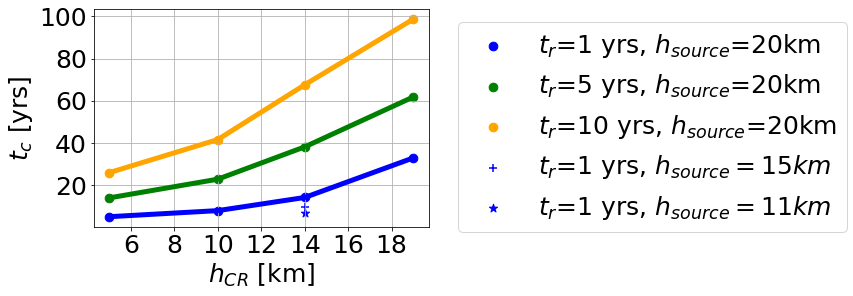

In [109]:
#plot layered model t_c's for different characteristic times and CR dims

tc_list_1yrRelax = [GPS_Pres28.t_c, GPS_Pres27.t_c, GPS_Pres11_run4.t_c, GPS_Pres23.t_c]
tc_list_5yrRelax =  [GPS_Pres28_run3.t_c, GPS_Pres27_run3.t_c, GPS_Pres11_run7.t_c, GPS_Pres23_run4.t_c]
tc_list_10yrRelax = [GPS_Pres28_run2.t_c, GPS_Pres27_run2.t_c, GPS_Pres11_run5.t_c, GPS_Pres23_run3.t_c]

cyl_height_list = [5, 10, 14, 19] #in km
cyl_height_list_5yr = [5, 10, 14, 19] #in km
#set up plot
legend_fs=25
title_fs=25
tick_fs=25
label_fs=25
lw=5
ms=75

plt.xlabel(r"$h_{CR}$ [km]", fontsize=label_fs)
plt.ylabel(r"$t_c$ [yrs]", fontsize=label_fs)
plt.grid()

plt.scatter(cyl_height_list, tc_list_1yrRelax, color="blue", s=ms, label=r"$t_r$=1 yrs, $h_{source}$=20km")
plt.plot(cyl_height_list, tc_list_1yrRelax, color="blue", linewidth=lw)

plt.scatter(cyl_height_list_5yr, tc_list_5yrRelax, color="green", s=ms, label=r"$t_r$=5 yrs, $h_{source}$=20km")
plt.plot(cyl_height_list_5yr, tc_list_5yrRelax, color="green", linewidth=lw)

plt.scatter(cyl_height_list, tc_list_10yrRelax, color="orange", s=ms, label=r"$t_r$=10 yrs, $h_{source}$=20km")
plt.plot(cyl_height_list, tc_list_10yrRelax, color="orange", linewidth=lw)

#source height at 15km
plt.scatter(14, GPS_Pres30.t_c, color="blue", marker="+", s=ms, label=r"$t_r$=1 yrs, $h_{source}=15km$")

#source height at 11km
plt.scatter(14, GPS_Pres29.t_c, color="blue", marker="*", s=ms, label=r"$t_r$=1 yrs, $h_{source}=11km$")

           
                
plt.xticks(fontsize=tick_fs)
plt.yticks(fontsize=tick_fs)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=legend_fs)

plt.savefig("../Figures/CharTimes_All_hCR.png", bbox_inches='tight')

plt.show()



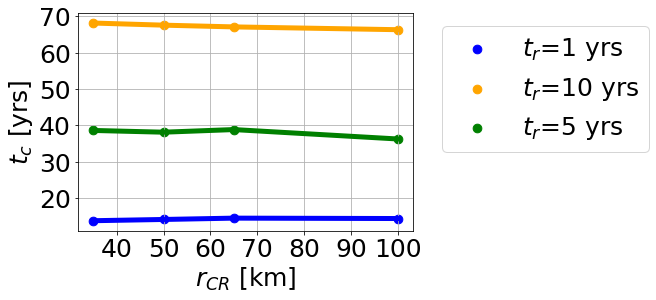

In [110]:
#plot t_c's for different r_CR's

tc_list_1yrRelax = [GPS_Pres44.t_c, GPS_Pres11_run4.t_c, GPS_Pres45.t_c, GPS_Pres46.t_c]
tc_list_10yrRelax = [GPS_Pres44_run2.t_c, GPS_Pres11_run5.t_c, GPS_Pres45_run2.t_c, GPS_Pres46_run2.t_c]
tc_list_5yrRelax = [GPS_Pres44_run3.t_c, GPS_Pres11_run7.t_c, GPS_Pres45_run3.t_c, GPS_Pres46_run3.t_c]
cyl_rad_list = [35, 50, 65, 100]

#set up plot
legend_fs=25
title_fs=25
tick_fs=25
label_fs=25
lw=5
ms=75

plt.xlabel(r"$r_{CR}$ [km]", fontsize=label_fs)
plt.ylabel(r"$t_c$ [yrs]", fontsize=label_fs)
plt.grid()

plt.scatter(cyl_rad_list, tc_list_1yrRelax, color="blue", s=ms, label=r"$t_r$=1 yrs")
plt.plot(cyl_rad_list, tc_list_1yrRelax, color="blue", linewidth=lw)

plt.scatter(cyl_rad_list, tc_list_10yrRelax, color="orange", s=ms, label=r"$t_r$=10 yrs")
plt.plot(cyl_rad_list, tc_list_10yrRelax, color="orange", linewidth=lw)

plt.scatter(cyl_rad_list, tc_list_5yrRelax, color="green", s=ms, label=r"$t_r$=5 yrs")
plt.plot(cyl_rad_list, tc_list_5yrRelax, color="green", linewidth=lw)


plt.xticks(fontsize=tick_fs)
plt.yticks(fontsize=tick_fs)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=legend_fs)

plt.savefig("../Figures/CharTimes_All_rCR.png", bbox_inches='tight')

plt.show()


In [15]:
#read stresses from h5 file
def read_stresses(path, time_step,depth=0.0, theta=None):
    
    with h5py.File(path, "r") as f:
        
        line_width = 20e3
        mesh_width = 150e3 #width of mesh from 0 to edge

        
        group_geometry = f['geometry']
        group_cell_fields = f['cell_fields']
        
        
        #get data from the hdf5 file with the indices
                
        points = group_geometry['vertices'] #shape: point_num, xyz
        stress = group_cell_fields['stress'] #shape: timestep, point_num, xx yy zz xy yz xz
        total_strain = group_cell_fields['total_strain'] #shape: timestep, point_num, xx yy zz xy yz xz
        
        x = points[:][:,0]
        y = points[:][:,1]
        z = points[:][:,2]
        
        
        
        z_i = max(z) - depth
        print(max(z), min(z)/1e3)
        
        z_indices = np.where((z < z_i + 1e3) & (z > z_i - 1e3))
        
        #get depth slices of stress and strain       
        stress_xx_depth = stress[time_step][:][:,0][z_indices]
        stress_yy_depth = stress[time_step][:][:,1][z_indices]
        stress_zz_depth = stress[time_step][:][:,2][z_indices]
        stress_xy_depth = stress[time_step][:][:,3][z_indices]
        stress_yz_depth = stress[time_step][:][:,4][z_indices]
        stress_xz_depth = stress[time_step][:][:,5][z_indices]
        
        total_strain_xx_depth = total_strain[time_step][:][:,0][z_indices]
        total_strain_yy_depth = total_strain[time_step][:][:,1][z_indices]
        total_strain_zz_depth = total_strain[time_step][:][:,2][z_indices]
        total_strain_xy_depth = total_strain[time_step][:][:,3][z_indices]
        total_strain_yz_depth = total_strain[time_step][:][:,4][z_indices]
        total_strain_xz_depth = total_strain[time_step][:][:,5][z_indices]
        
        x_depth = x[z_indices]
        y_depth = y[z_indices]
        
        print(min(z))
        
        
        x_i = np.linspace(-mesh_width, mesh_width, 1000)
        if theta == None:
            y_i = np.zeros(len(x_i))
        else:
            x_i = np.cos(theta)*x_i
            y_i = np.sin(theta)*x_i
            
        
        #interpolate stress and strain along line
        stress_xx_interp = interpolate.griddata(np.asarray([x_depth, y_depth]).T, np.asarray(stress_xx_depth), np.asarray([x_i, y_i]).T, method='cubic')
        stress_yy_interp = interpolate.griddata(np.asarray([x_depth, y_depth]).T, np.asarray(stress_yy_depth), np.asarray([x_i, y_i]).T, method='cubic')
        stress_zz_interp = interpolate.griddata(np.asarray([x_depth, y_depth]).T, np.asarray(stress_zz_depth), np.asarray([x_i, y_i]).T, method='cubic')
        stress_xy_interp = interpolate.griddata(np.asarray([x_depth, y_depth]).T, np.asarray(stress_xy_depth), np.asarray([x_i, y_i]).T, method='cubic')
        stress_yz_interp = interpolate.griddata(np.asarray([x_depth, y_depth]).T, np.asarray(stress_yz_depth), np.asarray([x_i, y_i]).T, method='cubic')
        stress_xz_interp = interpolate.griddata(np.asarray([x_depth, y_depth]).T, np.asarray(stress_xz_depth), np.asarray([x_i, y_i]).T, method='cubic')
        
        total_strain_xx_interp = interpolate.griddata(np.asarray([x_depth, y_depth]).T, np.asarray(total_strain_xx_depth), np.asarray([x_i, y_i]).T, method='cubic')
        total_strain_yy_interp = interpolate.griddata(np.asarray([x_depth, y_depth]).T, np.asarray(total_strain_yy_depth), np.asarray([x_i, y_i]).T, method='cubic')
        total_strain_zz_interp = interpolate.griddata(np.asarray([x_depth, y_depth]).T, np.asarray(total_strain_zz_depth), np.asarray([x_i, y_i]).T, method='cubic')
        total_strain_xy_interp = interpolate.griddata(np.asarray([x_depth, y_depth]).T, np.asarray(total_strain_xy_depth), np.asarray([x_i, y_i]).T, method='cubic')
        total_strain_yz_interp = interpolate.griddata(np.asarray([x_depth, y_depth]).T, np.asarray(total_strain_yz_depth), np.asarray([x_i, y_i]).T, method='cubic')
        total_strain_xz_interp = interpolate.griddata(np.asarray([x_depth, y_depth]).T, np.asarray(total_strain_xz_depth), np.asarray([x_i, y_i]).T, method='cubic')
        
        stresses = (stress_xx_interp, stress_yy_interp, stress_zz_interp, stress_xy_interp, stress_yz_interp, stress_xz_interp)
        strains = (total_strain_xx_interp, total_strain_yy_interp, total_strain_zz_interp, total_strain_xy_interp, total_strain_yz_interp, total_strain_xz_interp)
        
        return (x_i, stresses, strains)
        
        
        
        
#proof of concept, plot one cell over time         
def get_stress_cellId(path, time_step, cell_id):
    
    with h5py.File(path, "r") as f:
    
        cell_id = 368514 #taken from paraview
        group_cell_fields = f['cell_fields']

        stress = group_cell_fields['stress'] #shape: timestep, point_num, xx yy zz xy yz xz
        total_strain = group_cell_fields['total_strain'] #shape: timestep, point_num, xx yy zz xy yz xz
    
        stress_xx = stress[time_step][cell_id][0]
        stress_yy = stress[time_step][cell_id][1]
        stress_zz = stress[time_step][cell_id][2]
        stress_xy = stress[time_step][cell_id][3]
        stress_yz = stress[time_step][cell_id][4]
        stress_xz = stress[time_step][cell_id][5]
        
        return (stress_xx, stress_yy, stress_zz, stress_xy, stress_yz, stress_xz)
        
        

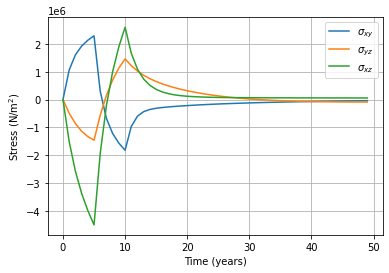

In [28]:
path = "../TimeDependentPressure/10yrSawtooth/SMB/NoCyl/output_noCyl_materials_TD_1yrRelax/SMB_noCyl-100-viscoelasticLayer-1_yr_relax.h5"

# x, stresses, strains = read_stresses("../TimeDependentPressure/10yrSawtooth/SMB/NoCyl/output_noCyl_materials_TD_1yrRelax/SMB_noCyl-100-upperCrust-1_yr_relax.h5", 5, depth=5e3)

# plt.plot(x/1e3, stresses[2])
# plt.show()

cell_id = 368514
time_steps = np.arange(0, 50, 1)
stress_xx = []
stress_yy = []
stress_zz = []

for t in time_steps:
    stress_xx.append(get_stress_cellId(path, t, cell_id)[3])
    stress_yy.append(get_stress_cellId(path, t, cell_id)[4])
    stress_zz.append(get_stress_cellId(path, t, cell_id)[5])
    
plt.xlabel("Time (years)")
plt.ylabel(r"Stress (N/m$^2$)")
plt.grid()

plt.plot(time_steps, stress_xx, label=r"$\sigma_{xy}$")
plt.plot(time_steps, stress_yy, label=r"$\sigma_{yz}$")
plt.plot(time_steps, stress_zz, label=r"$\sigma_{xz}$")

plt.legend()
plt.show()